In [1]:
import numpy as np
import os
from oe_acute import trial_utils as tu
from oe_acute import MNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pickle
import tqdm
import glob

import sys
from oe_acute import pyMNE

In [2]:
os.nice(1)

2

### Load dsets

In [3]:
stim_spec = np.load('/mnt/cube/srrudrar/temporal_model/stim_resp_256/spec_train_256.npy')
stim_resp = np.load('/mnt/cube/srrudrar/temporal_model/stim_resp_256/resp_train_256.npy')

In [4]:
np.shape(stim_spec), np.shape(stim_resp)

((48855, 256), (48855, 214, 16))

In [5]:
def prepare_MNE_dset(stim_spec, stim_resp, nsegbins=16, concat=True):
    '''
    Create the dataset for fitting MNE model
    '''
    stim_mne = []
    resp_mne = []
    for s, r in zip(stim_spec, stim_resp):
        #nfreq, ntime = s.shape
        #s_segs = np.stack([s[:, n:(n+nsegbins)] for n in range(ntime - nsegbins)], axis=0)
        s_segs = s
        r_segs = np.sum(r, axis=1)
        stim_mne.append(s_segs)
        resp_mne.append(r_segs)
    if concat:
        return np.vstack(stim_mne), np.vstack(resp_mne)
    else:
        return stim_mne, resp_mne

In [6]:
nsegbins = 16

In [7]:
stim_mne = []
resp_mne = []
stim_mne, resp_mne = prepare_MNE_dset(stim_spec, stim_resp, nsegbins=nsegbins)

In [8]:
np.shape(stim_mne), np.shape(resp_mne)

((48855, 256), (48855, 214))

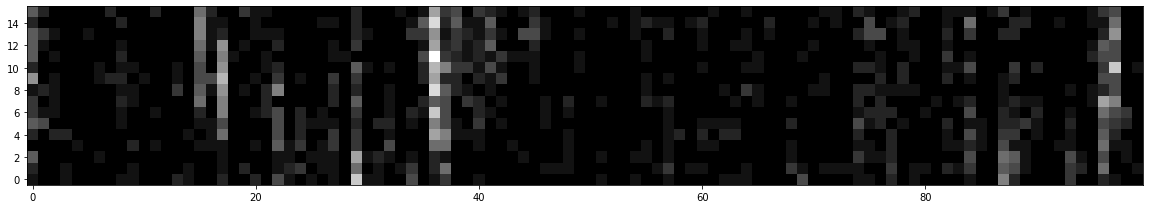

In [9]:
ax = plt.subplots(figsize=(20,8))
plt.imshow(np.transpose(stim_resp[:100, 100, :]), origin='lower', cmap='gray')

### Split into train test sets

In [10]:
len_units = np.shape(resp_mne)[1]

In [11]:
units_to_process = list(np.load('/mnt/cube/srrudrar/temporal_model/units_to_process.npy'))

In [12]:
exp_path = '/mnt/cube/srrudrar/temporal_model/stim_resp_signal/'

In [13]:
# obtain all preprocessed datas

%matplotlib inline
sdim = 256
n_jackknives = 4

test_output_path = os.path.join(exp_path, 'MNE_test_dset')
os.makedirs(test_output_path, exist_ok=True)
n_eigvec_to_display = 6 # Number of most positive and most negative eigenvectors to display

pfinals = {}
for unit in units_to_process:
    i = units_to_process.index(unit)
    stims_train, resps_train, stims_test, resps_test = MNE.prepare_MNE_train_test_set(stim_mne, resp_mne[:,i][:,np.newaxis], train_pct=0.8, zscore=True, kz_norm_resp=True)
    
    # Save test dataset
    test_dict = {'stims_test':stims_test, 'resps_test':resps_test}
    out_fname = 'unit-{}_MNE.pkl'.format(unit)
    out_f = os.path.join(test_output_path, out_fname)
    with open(out_f, 'wb') as f:
        pickle.dump(test_dict, f)

    # Run MNE
    pfinal = MNE.fit_MNE(stims_train, resps_train, order=2)
    #MNE.plot_MNE(pfinal, unit, figure_output_path)
    pfinals[unit] = pfinal

Iters   tally   ll(test) 


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.080220
    2       0    0.077463
    3       0    0.077070
    4       0    0.076541
    5       0    0.076007
    6       0    0.075325
    7       0    0.075067
    8       0    0.074580
    9       0    0.074492
   10       0    0.074116
   11       0    0.073953
   12       0    0.072312
   13       0    0.072103
   14       0    0.071848
   15       0    0.071763
   16       0    0.071478
   17       0    0.071287
   18       0    0.071212
   19       0    0.071094
   20       0    0.071068
   21       0    0.071038
   22       0    0.070755
   23       0    0.070655
   24       0    0.070553
   25       0    0.070591
   26       1    0.070526
   27       0    0.070475
   28       0    0.070370
   29       0    0.070359
   30       0    0.069985
   31       0    0.069962
   32       0    0.069688
   33       0    0.069472
   34       0    0.068814
   35       0    0.068765
   36       0    0.068371
   37       0    0.068296
   38       0    0.067973
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)


    1       0    0.085803
    2       0    0.082769
    3       0    0.082166
    4       0    0.081369
    5       0    0.080996
    6       0    0.080554
    7       0    0.080174
    8       0    0.079903
    9       0    0.079627
   10       0    0.079042
   11       0    0.078691
   12       0    0.078044
   13       0    0.077865
   14       0    0.077122
   15       0    0.076802
   16       0    0.076664
   17       0    0.076646
   18       0    0.076005
   19       0    0.075824
   20       0    0.075558
   21       0    0.075542
   22       0    0.075597
   23       1    0.075614
   24       2    0.075512
   25       0    0.075417
   26       0    0.074803
   27       0    0.074560
   28       0    0.074192
   29       0    0.074130
   30       0    0.073951
   31       0    0.073888
   32       0    0.073712
   33       0    0.073639
   34       0    0.073530
   35       0    0.073469
   36       0    0.073451
   37       0    0.073399
   38       0    0.073436
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.082730
    2       0    0.079086
    3       0    0.079077
    4       0    0.078473
    5       0    0.077777
    6       0    0.077237
    7       0    0.077232
    8       0    0.076446
    9       0    0.076268
   10       0    0.075659
   11       0    0.075429
   12       0    0.075032
   13       0    0.075157
   14       1    0.075104
   15       2    0.074455
   16       0    0.073720
   17       0    0.073456
   18       0    0.073266
   19       0    0.073171
   20       0    0.073214
   21       1    0.073108
   22       0    0.072901
   23       0    0.072842
   24       0    0.072897
   25       1    0.072740
   26       0    0.072414
   27       0    0.072205
   28       0    0.072169
   29       0    0.072098
   30       0    0.072073
   31       0    0.071782
   32       0    0.071588
   33       0    0.071286
   34       0    0.071232
   35       0    0.071021
   36       0    0.070487
   37       0    0.070017
   38       0    0.070015
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)


    1       0    0.079405
    2       0    0.076137
    3       0    0.075792
    4       0    0.074467
    5       0    0.073899
    6       0    0.073182
    7       0    0.072851
    8       0    0.072217
    9       0    0.071685
   10       0    0.071565
   11       0    0.071344
   12       0    0.070983
   13       0    0.070511
   14       0    0.070064
   15       0    0.069645
   16       0    0.069191
   17       0    0.069119
   18       0    0.068884
   19       0    0.068823
   20       0    0.068523
   21       0    0.068470
   22       0    0.067995
   23       0    0.067764
   24       0    0.067394
   25       0    0.067339
   26       0    0.067073
   27       0    0.067020
   28       0    0.066930
   29       0    0.066907
   30       0    0.066809
   31       0    0.066804
   32       0    0.066818
   33       1    0.066752
   34       0    0.066668
   35       0    0.066737
   36       1    0.066550
   37       0    0.066553
   38       1    0.066568
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.109393
    2       0    0.108738
    3       0    0.105943
    4       0    0.104859
    5       0    0.103423
    6       0    0.103370
    7       0    0.102111
    8       0    0.101471
    9       0    0.100459
   10       0    0.099937
   11       0    0.099838
   12       0    0.099636
   13       0    0.099274
   14       0    0.099200
   15       0    0.098822
   16       0    0.098523
   17       0    0.098471
   18       0    0.098140
   19       0    0.098128
   20       0    0.097488
   21       0    0.097325
   22       0    0.095679
   23       0    0.095413
   24       0    0.095329
   25       0    0.094817
   26       0    0.094689
   27       0    0.094008
   28       0    0.093355
   29       0    0.093301
   30       0    0.092722
   31       0    0.092703
   32       0    0.092492
   33       0    0.092487
   34       0    0.092266
   35       0    0.092237
   36       0    0.092175
   37       0    0.091937
   38       0    0.091820
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.111266
    2       0    0.110564
    3       0    0.107565
    4       0    0.106927
    5       0    0.106556
    6       0    0.104796
    7       0    0.104473
    8       0    0.103194
    9       0    0.102931
   10       0    0.102313
   11       0    0.102086
   12       0    0.101811
   13       0    0.101564
   14       0    0.101161
   15       0    0.100468
   16       0    0.100244
   17       0    0.097931
   18       0    0.097921
   19       0    0.096583
   20       0    0.096551
   21       0    0.095334
   22       0    0.095317
   23       0    0.094742
   24       0    0.094416
   25       0    0.094126
   26       0    0.094035
   27       0    0.092831
   28       0    0.092817
   29       0    0.092572
   30       0    0.092701
   31       1    0.092529
   32       0    0.092509
   33       0    0.092418
   34       0    0.091767
   35       0    0.091689
   36       0    0.091326
   37       0    0.091106
   38       0    0.091036
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.105140
    2       0    0.104727
    3       0    0.102466
    4       0    0.102045
    5       0    0.100055
    6       0    0.100081
    7       1    0.099031
    8       0    0.096898
    9       0    0.096543
   10       0    0.096155
   11       0    0.094996
   12       0    0.094834
   13       0    0.094684
   14       0    0.094465
   15       0    0.093696
   16       0    0.093590
   17       0    0.093321
   18       0    0.093215
   19       0    0.092821
   20       0    0.092808
   21       0    0.091825
   22       0    0.091878
   23       1    0.090905
   24       0    0.090867
   25       0    0.090266
   26       0    0.090259
   27       0    0.090202
   28       0    0.089912
   29       0    0.089529
   30       0    0.089250
   31       0    0.089240
   32       0    0.088730
   33       0    0.088567
   34       0    0.088503
   35       0    0.088382
   36       0    0.088223
   37       0    0.088126
   38       0    0.088153
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.105465
    2       0    0.105335
    3       0    0.102465
    4       0    0.102182
    5       0    0.100395
    6       0    0.099640
    7       0    0.097892
    8       0    0.097067
    9       0    0.095860
   10       0    0.095516
   11       0    0.094468
   12       0    0.094456
   13       0    0.092985
   14       0    0.092676
   15       0    0.092182
   16       0    0.091908
   17       0    0.091908
   18       1    0.091557
   19       0    0.091459
   20       0    0.091319
   21       0    0.091041
   22       0    0.090145
   23       0    0.089965
   24       0    0.090006
   25       1    0.089777
   26       0    0.089780
   27       1    0.089515
   28       0    0.089525
   29       1    0.089330
   30       0    0.089275
   31       0    0.089015
   32       0    0.088998
   33       0    0.088521
   34       0    0.088521
   35       0    0.088263
   36       0    0.088050
   37       0    0.087290
   38       0    0.087210
   39       

  126       0    0.063189
  127       1    0.063191
  128       2    0.063208
  129       3    0.063202
  130       4    0.063187
  131       5    0.063168
  132       0    0.063150
  133       0    0.063142
  134       0    0.063151
  135       1    0.063156
  136       2    0.063172
  137       3    0.063190
  138       4    0.063157
  139       5    0.063152
  140       6    0.063137
  141       0    0.063126
  142       0    0.063132
  143       1    0.063135
  144       2    0.063114
  145       0    0.063110
  146       0    0.063116
  147       1    0.063119
  148       2    0.063125
  149       3    0.063130
  150       4    0.063120
  151       5    0.063128
  152       6    0.063197
  153       7    0.063217
  154       8    0.063164
  155       9    0.063175
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.073200
    2       0    0.072480
    3       0    0.071866
    4       0    0.071475
    5       0    0.071107
    6       0    0.070632
    7       

    1       0    0.071728
    2       0    0.071259
    3       0    0.070610
    4       0    0.070439
    5       0    0.070156
    6       0    0.070140
    7       0    0.069733
    8       0    0.069215
    9       0    0.069101
   10       0    0.068873
   11       0    0.068580
   12       0    0.068514
   13       0    0.068004
   14       0    0.067778
   15       0    0.067533
   16       0    0.067472
   17       0    0.067322
   18       0    0.067275
   19       0    0.067151
   20       0    0.067081
   21       0    0.067042
   22       0    0.066738
   23       0    0.066598
   24       0    0.066199
   25       0    0.066095
   26       0    0.065713
   27       0    0.065761
   28       1    0.065682
   29       0    0.065463
   30       0    0.065410
   31       0    0.065275
   32       0    0.065142
   33       0    0.065114
   34       0    0.065060
   35       0    0.065042
   36       0    0.064935
   37       0    0.064839
   38       0    0.064718
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.099476
    2       0    0.098490
    3       0    0.097553
    4       0    0.097490
    5       0    0.095696
    6       0    0.095218
    7       0    0.094180
    8       0    0.093928
    9       0    0.092956
   10       0    0.092572
   11       0    0.092369
   12       0    0.091836
   13       0    0.090614
   14       0    0.090458
   15       0    0.090086
   16       0    0.090030
   17       0    0.089645
   18       0    0.089392
   19       0    0.089184
   20       0    0.088393
   21       0    0.087640
   22       0    0.087538
   23       0    0.087386
   24       0    0.087278
   25       0    0.086950
   26       0    0.086925
   27       0    0.086808
   28       0    0.086564
   29       0    0.086513
   30       0    0.086485
   31       0    0.086449
   32       0    0.086434
   33       0    0.086412
   34       0    0.086250
   35       0    0.086205
   36       0    0.086168
   37       0    0.085766
   38       0    0.085636
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.097570
    2       0    0.096784
    3       0    0.096062
    4       0    0.094754
    5       0    0.094308
    6       0    0.093598
    7       0    0.092864
    8       0    0.092681
    9       0    0.092425
   10       0    0.092002
   11       0    0.091891
   12       0    0.091615
   13       0    0.091451
   14       0    0.091142
   15       0    0.090942
   16       0    0.089072
   17       0    0.088223
   18       0    0.087748
   19       0    0.087657
   20       0    0.087461
   21       0    0.087161
   22       0    0.087103
   23       0    0.086661
   24       0    0.086596
   25       0    0.086397
   26       0    0.086223
   27       0    0.085835
   28       0    0.085634
   29       0    0.085466
   30       0    0.085395
   31       0    0.085369
   32       0    0.085302
   33       0    0.085194
   34       0    0.085172
   35       0    0.085127
   36       0    0.085079
   37       0    0.085071
   38       0    0.085054
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.098683
    2       0    0.098041
    3       0    0.097380
    4       0    0.096243
    5       0    0.095978
    6       0    0.094310
    7       0    0.092825
    8       0    0.092515
    9       0    0.092205
   10       0    0.091587
   11       0    0.091447
   12       0    0.091078
   13       0    0.090719
   14       0    0.089433
   15       0    0.088841
   16       0    0.088474
   17       0    0.087914
   18       0    0.087650
   19       0    0.086974
   20       0    0.086410
   21       0    0.086284
   22       0    0.085886
   23       0    0.085667
   24       0    0.085495
   25       0    0.085231
   26       0    0.085205
   27       0    0.085142
   28       0    0.085091
   29       0    0.085023
   30       0    0.084973
   31       0    0.084770
   32       0    0.084777
   33       1    0.084711
   34       0    0.084661
   35       0    0.084506
   36       0    0.084473
   37       0    0.084389
   38       0    0.084310
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.097789
    2       0    0.097039
    3       0    0.096473
    4       0    0.095142
    5       0    0.095056
    6       0    0.093994
    7       0    0.093160
    8       0    0.092418
    9       0    0.092273
   10       0    0.090406
   11       0    0.090134
   12       0    0.089818
   13       0    0.089403
   14       0    0.089213
   15       0    0.088662
   16       0    0.088069
   17       0    0.087624
   18       0    0.087618
   19       0    0.087506
   20       0    0.087297
   21       0    0.087082
   22       0    0.086995
   23       0    0.086845
   24       0    0.086829
   25       0    0.086776
   26       0    0.086667
   27       0    0.086584
   28       0    0.086559
   29       0    0.086467
   30       0    0.086396
   31       0    0.086139
   32       0    0.086029
   33       0    0.085944
   34       0    0.085748
   35       0    0.085748
   36       1    0.085692
   37       0    0.085611
   38       0    0.085568
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.144554
    2       0    0.143187
    3       0    0.142490
    4       0    0.140601
    5       0    0.139829
    6       0    0.139543
    7       0    0.138727
    8       0    0.137602
    9       0    0.136935
   10       0    0.136813
   11       0    0.136564
   12       0    0.136107
   13       0    0.135662
   14       0    0.135454
   15       0    0.135329
   16       0    0.135056
   17       0    0.134980
   18       0    0.134856
   19       0    0.133850
   20       0    0.133769
   21       0    0.133627
   22       0    0.133447
   23       0    0.133424
   24       0    0.133306
   25       0    0.133184
   26       0    0.133115
   27       0    0.132469
   28       0    0.132000
   29       0    0.131730
   30       0    0.131448
   31       0    0.131128
   32       0    0.131045
   33       0    0.130832
   34       0    0.130775
   35       0    0.130672
   36       0    0.130629
   37       0    0.130597
   38       0    0.130577
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.144477
    2       0    0.142394
    3       0    0.141899
    4       0    0.139879
    5       0    0.138730
    6       0    0.138299
    7       0    0.136957
    8       0    0.136754
    9       0    0.135823
   10       0    0.135710
   11       0    0.135045
   12       0    0.134497
   13       0    0.134384
   14       0    0.133441
   15       0    0.133202
   16       0    0.133100
   17       0    0.132840
   18       0    0.132649
   19       0    0.132443
   20       0    0.132194
   21       0    0.132143
   22       0    0.131885
   23       0    0.131781
   24       0    0.131612
   25       0    0.131546
   26       0    0.131388
   27       0    0.131369
   28       0    0.131137
   29       0    0.130841
   30       0    0.130527
   31       0    0.130428
   32       0    0.130263
   33       0    0.130235
   34       0    0.130170
   35       0    0.130175
   36       1    0.130098
   37       0    0.130083
   38       0    0.130005
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.152442
    2       0    0.150437
    3       0    0.149484
    4       0    0.148306
    5       0    0.147519
    6       0    0.145720
    7       0    0.143871
    8       0    0.143527
    9       0    0.142738
   10       0    0.142614
   11       0    0.142177
   12       0    0.142059
   13       0    0.141568
   14       0    0.141476
   15       0    0.140789
   16       0    0.140118
   17       0    0.139860
   18       0    0.139320
   19       0    0.139185
   20       0    0.138654
   21       0    0.138444
   22       0    0.137977
   23       0    0.137910
   24       0    0.137790
   25       0    0.137721
   26       0    0.137681
   27       0    0.137506
   28       0    0.137425
   29       0    0.137360
   30       0    0.137280
   31       0    0.137286
   32       1    0.136868
   33       0    0.136837
   34       0    0.136595
   35       0    0.136522
   36       0    0.136392
   37       0    0.136012
   38       0    0.136001
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.146633
    2       0    0.144602
    3       0    0.144017
    4       0    0.141661
    5       0    0.140945
    6       0    0.139760
    7       0    0.138528
    8       0    0.138398
    9       0    0.137901
   10       0    0.137099
   11       0    0.136816
   12       0    0.136436
   13       0    0.136207
   14       0    0.136117
   15       0    0.135486
   16       0    0.135442
   17       0    0.135110
   18       0    0.134830
   19       0    0.134332
   20       0    0.134089
   21       0    0.133925
   22       0    0.133792
   23       0    0.133562
   24       0    0.133463
   25       0    0.133328
   26       0    0.133305
   27       0    0.133253
   28       0    0.133075
   29       0    0.133000
   30       0    0.132907
   31       0    0.132886
   32       0    0.132840
   33       0    0.132884
   34       1    0.132665
   35       0    0.132597
   36       0    0.132388
   37       0    0.132249
   38       0    0.131710
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.043345
    2       0    0.042695
    3       0    0.041767
    4       0    0.041255
    5       0    0.041206
    6       0    0.041222
    7       1    0.040498
    8       0    0.039955
    9       0    0.039948
   10       0    0.039555
   11       0    0.039725
   12       1    0.039885
   13       2    0.039049
   14       0    0.038476
   15       0    0.038452
   16       0    0.038231
   17       0    0.038053
   18       0    0.038003
   19       0    0.037968
   20       0    0.037823
   21       0    0.037693
   22       0    0.037535
   23       0    0.037193
   24       0    0.036860
   25       0    0.036779
   26       0    0.036894
   27       1    0.036838
   28       2    0.036695
   29       0    0.036461
   30       0    0.036566
   31       1    0.036608
   32       2    0.036541
   33       3    0.036448
   34       0    0.036388
   35       0    0.036357
   36       0    0.036358
   37       1    0.036392
   38       2    0.036317
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.045168
    2       0    0.044237
    3       0    0.043519
    4       0    0.043446
    5       0    0.043076
    6       0    0.043314
    7       1    0.042948
    8       0    0.042016
    9       0    0.041864
   10       0    0.041529
   11       0    0.041263
   12       0    0.040891
   13       0    0.040795
   14       0    0.040681
   15       0    0.040494
   16       0    0.040154
   17       0    0.040049
   18       0    0.039520
   19       0    0.039384
   20       0    0.039033
   21       0    0.039094
   22       1    0.038916
   23       0    0.038765
   24       0    0.038523
   25       0    0.038517
   26       0    0.038370
   27       0    0.038199
   28       0    0.038141
   29       0    0.038054
   30       0    0.038042
   31       0    0.037969
   32       0    0.037887
   33       0    0.037833
   34       0    0.037679
   35       0    0.037614
   36       0    0.037503
   37       0    0.037544
   38       1    0.037553
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.045663
    2       0    0.045053
    3       0    0.043901
    4       0    0.043183
    5       0    0.043021
    6       0    0.042246
    7       0    0.041666
    8       0    0.041342
    9       0    0.041134
   10       0    0.040648
   11       0    0.040342
   12       0    0.040295
   13       0    0.040142
   14       0    0.040097
   15       0    0.040024
   16       0    0.039930
   17       0    0.039684
   18       0    0.039639
   19       0    0.039373
   20       0    0.039247
   21       0    0.039217
   22       0    0.038798
   23       0    0.038598
   24       0    0.038516
   25       0    0.038477
   26       0    0.038447
   27       0    0.038412
   28       0    0.038378
   29       0    0.038312
   30       0    0.038253
   31       0    0.038199
   32       0    0.038180
   33       0    0.038083
   34       0    0.037956
   35       0    0.038003
   36       1    0.037973
   37       2    0.037649
   38       0    0.037635
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.045520
    2       0    0.044907
    3       0    0.043215
    4       0    0.042719
    5       0    0.042686
    6       0    0.041490
    7       0    0.041331
    8       0    0.041152
    9       0    0.040703
   10       0    0.040598
   11       0    0.040402
   12       0    0.040205
   13       0    0.039713
   14       0    0.039382
   15       0    0.039029
   16       0    0.038978
   17       0    0.038619
   18       0    0.038660
   19       1    0.038655
   20       2    0.038407
   21       0    0.038404
   22       0    0.038309
   23       0    0.038333
   24       1    0.038112
   25       0    0.038122
   26       1    0.037908
   27       0    0.038013
   28       1    0.037627
   29       0    0.037692
   30       1    0.037748
   31       2    0.037534
   32       0    0.037572
   33       1    0.037564
   34       2    0.037358
   35       0    0.037329
   36       0    0.037207
   37       0    0.037131
   38       0    0.037204
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.062880
    2       0    0.061127
    3       0    0.060055
    4       0    0.059844
    5       0    0.059012
    6       0    0.058788
    7       0    0.058273
    8       0    0.058101
    9       0    0.057889
   10       0    0.057703
   11       0    0.057483
   12       0    0.057353
   13       0    0.057193
   14       0    0.056903
   15       0    0.056842
   16       0    0.056709
   17       0    0.056680
   18       0    0.056573
   19       0    0.056177
   20       0    0.056022
   21       0    0.055683
   22       0    0.055641
   23       0    0.055456
   24       0    0.055362
   25       0    0.055228
   26       0    0.055171
   27       0    0.055142
   28       0    0.055063
   29       0    0.055036
   30       0    0.055036
   31       1    0.055048
   32       2    0.055051
   33       3    0.054994
   34       0    0.055021
   35       1    0.054742
   36       0    0.054362
   37       0    0.054234
   38       0    0.054058
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.061241
    2       0    0.059111
    3       0    0.058076
    4       0    0.058304
    5       1    0.058114
    6       2    0.057224
    7       0    0.056777
    8       0    0.056292
    9       0    0.055583
   10       0    0.055568
   11       0    0.055482
   12       0    0.055552
   13       1    0.055486
   14       2    0.055061
   15       0    0.054844
   16       0    0.054834
   17       0    0.054875
   18       1    0.054951
   19       2    0.054950
   20       3    0.054512
   21       0    0.054127
   22       0    0.053884
   23       0    0.053654
   24       0    0.053599
   25       0    0.053625
   26       1    0.053579
   27       0    0.053530
   28       0    0.053400
   29       0    0.053143
   30       0    0.053090
   31       0    0.053027
   32       0    0.052969
   33       0    0.052840
   34       0    0.052752
   35       0    0.052596
   36       0    0.052567
   37       0    0.052587
   38       1    0.052560
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.063701
    2       0    0.061650
    3       0    0.060479
    4       0    0.059883
    5       0    0.059680
    6       0    0.058968
    7       0    0.058855
    8       0    0.058241
    9       0    0.057919
   10       0    0.057921
   11       1    0.057587
   12       0    0.057542
   13       0    0.056905
   14       0    0.056840
   15       0    0.056686
   16       0    0.056665
   17       0    0.056481
   18       0    0.056388
   19       0    0.056027
   20       0    0.055947
   21       0    0.055842
   22       0    0.055776
   23       0    0.055597
   24       0    0.055368
   25       0    0.055331
   26       0    0.055246
   27       0    0.055209
   28       0    0.055143
   29       0    0.055138
   30       0    0.055095
   31       0    0.054988
   32       0    0.054921
   33       0    0.054900
   34       0    0.054876
   35       0    0.054862
   36       0    0.054832
   37       0    0.054660
   38       0    0.054605
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.064272
    2       0    0.063370
    3       0    0.063032
    4       0    0.062634
    5       0    0.061571
    6       0    0.061151
    7       0    0.060776
    8       0    0.060716
    9       0    0.060155
   10       0    0.059844
   11       0    0.059690
   12       0    0.059534
   13       0    0.059464
   14       0    0.059088
   15       0    0.059031
   16       0    0.058834
   17       0    0.058797
   18       0    0.057735
   19       0    0.057451
   20       0    0.057126
   21       0    0.057065
   22       0    0.057094
   23       1    0.056787
   24       0    0.056742
   25       0    0.056643
   26       0    0.056630
   27       0    0.056429
   28       0    0.056424
   29       0    0.056371
   30       0    0.056382
   31       1    0.056281
   32       0    0.056307
   33       1    0.056108
   34       0    0.056095
   35       0    0.056033
   36       0    0.056121
   37       1    0.056096
   38       2    0.055855
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.094158
    2       0    0.092026
    3       0    0.091125
    4       0    0.090363
    5       0    0.088577
    6       0    0.087936
    7       0    0.086646
    8       0    0.086380
    9       0    0.085617
   10       0    0.084524
   11       0    0.084224
   12       0    0.083833
   13       0    0.083672
   14       0    0.083280
   15       0    0.083146
   16       0    0.082694
   17       0    0.082550
   18       0    0.082332
   19       0    0.082266
   20       0    0.082000
   21       0    0.081942
   22       0    0.081766
   23       0    0.081540
   24       0    0.081301
   25       0    0.081024
   26       0    0.080819
   27       0    0.080797
   28       0    0.080736
   29       0    0.080711
   30       0    0.080723
   31       1    0.080616
   32       0    0.080189
   33       0    0.079830
   34       0    0.079520
   35       0    0.079257
   36       0    0.078811
   37       0    0.078314
   38       0    0.078203
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.094744
    2       0    0.092148
    3       0    0.091197
    4       0    0.090313
    5       0    0.089578
    6       0    0.089249
    7       0    0.088650
    8       0    0.088088
    9       0    0.087764
   10       0    0.086267
   11       0    0.085968
   12       0    0.085032
   13       0    0.084452
   14       0    0.084223
   15       0    0.084085
   16       0    0.083621
   17       0    0.083507
   18       0    0.083235
   19       0    0.082490
   20       0    0.082478
   21       0    0.081940
   22       0    0.081745
   23       0    0.081746
   24       1    0.081760
   25       2    0.081585
   26       0    0.081417
   27       0    0.081421
   28       1    0.081338
   29       0    0.081248
   30       0    0.081136
   31       0    0.081021
   32       0    0.081081
   33       1    0.080880
   34       0    0.080680
   35       0    0.080316
   36       0    0.080204
   37       0    0.080161
   38       0    0.080097
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.093435
    2       0    0.091352
    3       0    0.090110
    4       0    0.089941
    5       0    0.088882
    6       0    0.088415
    7       0    0.087477
    8       0    0.087138
    9       0    0.085906
   10       0    0.084965
   11       0    0.084850
   12       0    0.084291
   13       0    0.084066
   14       0    0.083370
   15       0    0.083097
   16       0    0.082539
   17       0    0.082400
   18       0    0.082047
   19       0    0.082061
   20       1    0.081641
   21       0    0.081662
   22       1    0.081584
   23       0    0.081461
   24       0    0.081375
   25       0    0.081251
   26       0    0.081213
   27       0    0.081234
   28       1    0.081167
   29       0    0.081206
   30       1    0.081083
   31       0    0.081138
   32       1    0.081067
   33       0    0.080872
   34       0    0.080722
   35       0    0.080603
   36       0    0.080404
   37       0    0.080288
   38       0    0.080310
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.094627
    2       0    0.092091
    3       0    0.091260
    4       0    0.090779
    5       0    0.090339
    6       0    0.089005
    7       0    0.088359
    8       0    0.087259
    9       0    0.087164
   10       0    0.086838
   11       0    0.086658
   12       0    0.086338
   13       0    0.086306
   14       0    0.085494
   15       0    0.084577
   16       0    0.084101
   17       0    0.083518
   18       0    0.082975
   19       0    0.082425
   20       0    0.082293
   21       0    0.081974
   22       0    0.081903
   23       0    0.081851
   24       0    0.081745
   25       0    0.081543
   26       0    0.081329
   27       0    0.081261
   28       0    0.081171
   29       0    0.081153
   30       0    0.080990
   31       0    0.080959
   32       0    0.080736
   33       0    0.080731
   34       0    0.080698
   35       0    0.080683
   36       0    0.080140
   37       0    0.080076
   38       0    0.079949
   39       

   15       0    0.102518
   16       0    0.102179
   17       0    0.101995
   18       0    0.101937
   19       0    0.101596
   20       0    0.101483
   21       0    0.101453
   22       0    0.101462
   23       1    0.101267
   24       0    0.101091
   25       0    0.100866
   26       0    0.099968
   27       0    0.099426
   28       0    0.099075
   29       0    0.098976
   30       0    0.098833
   31       0    0.098790
   32       0    0.098720
   33       0    0.098722
   34       1    0.098641
   35       0    0.098573
   36       0    0.098500
   37       0    0.098487
   38       0    0.098373
   39       0    0.098190
   40       0    0.098209
   41       1    0.098106
   42       0    0.098042
   43       0    0.097891
   44       0    0.097908
   45       1    0.097866
   46       0    0.097814
   47       0    0.097764
   48       0    0.097602
   49       0    0.097594
   50       0    0.097535
   51       0    0.097478
   52       0    0.097350
   53       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.098551
    2       0    0.097535
    3       0    0.097314
    4       0    0.096901
    5       0    0.096009
    6       0    0.095170
    7       0    0.095147
    8       0    0.094547
    9       0    0.094214
   10       0    0.093503
   11       0    0.093434
   12       0    0.092711
   13       0    0.092214
   14       0    0.091605
   15       0    0.091404
   16       0    0.091240
   17       0    0.090893
   18       0    0.090777
   19       0    0.090675
   20       0    0.090659
   21       0    0.090583
   22       0    0.090324
   23       0    0.090212
   24       0    0.090171
   25       0    0.089905
   26       0    0.089702
   27       0    0.089635
   28       0    0.089604
   29       0    0.089629
   30       1    0.089603
   31       0    0.089515
   32       0    0.089443
   33       0    0.089358
   34       0    0.089093
   35       0    0.089055
   36       0    0.088881
   37       0    0.088870
   38       0    0.088796
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.099380
    2       0    0.098693
    3       0    0.097915
    4       0    0.097058
    5       0    0.096704
    6       0    0.096652
    7       0    0.096001
    8       0    0.095047
    9       0    0.094573
   10       0    0.094282
   11       0    0.094211
   12       0    0.094046
   13       0    0.093867
   14       0    0.093625
   15       0    0.093560
   16       0    0.093317
   17       0    0.092936
   18       0    0.092815
   19       0    0.092257
   20       0    0.090868
   21       0    0.090633
   22       0    0.090603
   23       0    0.090534
   24       0    0.090428
   25       0    0.090321
   26       0    0.090167
   27       0    0.090098
   28       0    0.090008
   29       0    0.089959
   30       0    0.089742
   31       0    0.089632
   32       0    0.089354
   33       0    0.089180
   34       0    0.089055
   35       0    0.088636
   36       0    0.088607
   37       0    0.088535
   38       0    0.088496
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.097420
    2       0    0.096527
    3       0    0.095630
    4       0    0.094874
    5       0    0.093827
    6       0    0.093195
    7       0    0.092667
    8       0    0.092544
    9       0    0.091879
   10       0    0.091885
   11       1    0.091262
   12       0    0.091201
   13       0    0.090473
   14       0    0.090375
   15       0    0.090213
   16       0    0.090009
   17       0    0.089971
   18       0    0.089795
   19       0    0.089770
   20       0    0.089609
   21       0    0.089475
   22       0    0.089321
   23       0    0.089274
   24       0    0.089165
   25       0    0.088991
   26       0    0.088904
   27       0    0.088812
   28       0    0.088800
   29       0    0.088754
   30       0    0.088718
   31       0    0.088660
   32       0    0.088628
   33       0    0.088330
   34       0    0.088344
   35       1    0.088187
   36       0    0.087939
   37       0    0.087891
   38       0    0.087824
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.098641
    2       0    0.097775
    3       0    0.096996
    4       0    0.096261
    5       0    0.095964
    6       0    0.095148
    7       0    0.094173
    8       0    0.093760
    9       0    0.093191
   10       0    0.093103
   11       0    0.092907
   12       0    0.092753
   13       0    0.092239
   14       0    0.092091
   15       0    0.091272
   16       0    0.091013
   17       0    0.090500
   18       0    0.090130
   19       0    0.090112
   20       0    0.090042
   21       0    0.089910
   22       0    0.089884
   23       0    0.089484
   24       0    0.089416
   25       0    0.089195
   26       0    0.089133
   27       0    0.089046
   28       0    0.088960
   29       0    0.088643
   30       0    0.088546
   31       0    0.088349
   32       0    0.088327
   33       0    0.087869
   34       0    0.087845
   35       0    0.087774
   36       0    0.087609
   37       0    0.087554
   38       0    0.087533
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.254049
    2       0    0.253178
    3       0    0.252654
    4       0    0.252618
    5       0    0.251807
    6       0    0.250277
    7       0    0.249641
    8       0    0.248003
    9       0    0.247726
   10       0    0.245585
   11       0    0.244498
   12       0    0.243364
   13       0    0.241180
   14       0    0.240917
   15       0    0.240392
   16       0    0.240026
   17       0    0.239910
   18       0    0.239047
   19       0    0.238686
   20       0    0.237036
   21       0    0.236899
   22       0    0.234953
   23       0    0.234815
   24       0    0.233792
   25       0    0.233193
   26       0    0.232905
   27       0    0.232710
   28       0    0.232511
   29       0    0.232049
   30       0    0.231868
   31       0    0.231287
   32       0    0.231194
   33       0    0.230751
   34       0    0.230395
   35       0    0.229923
   36       0    0.229821
   37       0    0.229597
   38       0    0.229573
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.258751
    2       0    0.257859
    3       0    0.257598
    4       0    0.257443
    5       0    0.256057
    6       0    0.253989
    7       0    0.253625
    8       0    0.252795
    9       0    0.252767
   10       0    0.248102
   11       0    0.247638
   12       0    0.246965
   13       0    0.245233
   14       0    0.244831
   15       0    0.244677
   16       0    0.243809
   17       0    0.243762
   18       0    0.242584
   19       0    0.242864
   20       1    0.242872
   21       2    0.242297
   22       0    0.241493
   23       0    0.241507
   24       1    0.241257
   25       0    0.240410
   26       0    0.239981
   27       0    0.239861
   28       0    0.238823
   29       0    0.238532
   30       0    0.237602
   31       0    0.237502
   32       0    0.236878
   33       0    0.236607
   34       0    0.236295
   35       0    0.236271
   36       0    0.235746
   37       0    0.235562
   38       0    0.235461
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.256344
    2       0    0.255713
    3       0    0.253643
    4       0    0.253506
    5       0    0.253228
    6       0    0.252498
    7       0    0.251622
    8       0    0.250414
    9       0    0.249940
   10       0    0.248010
   11       0    0.245360
   12       0    0.244539
   13       0    0.243472
   14       0    0.243038
   15       0    0.242155
   16       0    0.242070
   17       0    0.240749
   18       0    0.240533
   19       0    0.239968
   20       0    0.239726
   21       0    0.239345
   22       0    0.239183
   23       0    0.237922
   24       0    0.237794
   25       0    0.237574
   26       0    0.237578
   27       1    0.237258
   28       0    0.237268
   29       1    0.236866
   30       0    0.236905
   31       1    0.236664
   32       0    0.236672
   33       1    0.236335
   34       0    0.236220
   35       0    0.235681
   36       0    0.235393
   37       0    0.234980
   38       0    0.234607
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.256533
    2       0    0.255566
    3       0    0.254370
    4       0    0.254201
    5       0    0.253350
    6       0    0.251706
    7       0    0.250517
    8       0    0.248862
    9       0    0.244522
   10       0    0.243299
   11       0    0.241717
   12       0    0.241514
   13       0    0.241252
   14       0    0.241077
   15       0    0.240050
   16       0    0.239807
   17       0    0.238569
   18       0    0.238307
   19       0    0.237356
   20       0    0.237162
   21       0    0.235410
   22       0    0.235224
   23       0    0.234716
   24       0    0.234408
   25       0    0.233792
   26       0    0.233645
   27       0    0.233487
   28       0    0.233091
   29       0    0.233083
   30       0    0.232869
   31       0    0.232863
   32       0    0.232397
   33       0    0.232343
   34       0    0.231825
   35       0    0.231667
   36       0    0.231259
   37       0    0.231240
   38       0    0.230725
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.094046
    2       0    0.092387
    3       0    0.089728
    4       0    0.088779
    5       0    0.088623
    6       0    0.087330
    7       0    0.086853
    8       0    0.086290
    9       0    0.085654
   10       0    0.085192
   11       0    0.084960
   12       0    0.084125
   13       0    0.084194
   14       1    0.084134
   15       2    0.083364
   16       0    0.083136
   17       0    0.082882
   18       0    0.082736
   19       0    0.082489
   20       0    0.082452
   21       0    0.082320
   22       0    0.082161
   23       0    0.082032
   24       0    0.082077
   25       1    0.081888
   26       0    0.081700
   27       0    0.081610
   28       0    0.081516
   29       0    0.081471
   30       0    0.081308
   31       0    0.081282
   32       0    0.081224
   33       0    0.081117
   34       0    0.081129
   35       1    0.081135
   36       2    0.081074
   37       0    0.081081
   38       1    0.081085
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.092695
    2       0    0.090617
    3       0    0.087814
    4       0    0.087032
    5       0    0.086259
    6       0    0.085408
    7       0    0.085010
    8       0    0.084704
    9       0    0.083876
   10       0    0.083242
   11       0    0.082678
   12       0    0.082344
   13       0    0.082044
   14       0    0.082009
   15       0    0.081652
   16       0    0.080884
   17       0    0.080714
   18       0    0.080649
   19       0    0.080566
   20       0    0.080358
   21       0    0.080289
   22       0    0.080239
   23       0    0.080098
   24       0    0.080273
   25       1    0.079839
   26       0    0.079410
   27       0    0.079195
   28       0    0.079128
   29       0    0.078942
   30       0    0.078953
   31       1    0.078892
   32       0    0.078733
   33       0    0.078661
   34       0    0.078550
   35       0    0.078529
   36       0    0.078460
   37       0    0.078455
   38       0    0.078469
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.094858
    2       0    0.092587
    3       0    0.090352
    4       0    0.089413
    5       0    0.088570
    6       0    0.087612
    7       0    0.086944
    8       0    0.086605
    9       0    0.085909
   10       0    0.085854
   11       0    0.085742
   12       0    0.084821
   13       0    0.084614
   14       0    0.084221
   15       0    0.084230
   16       1    0.084064
   17       0    0.084036
   18       0    0.083619
   19       0    0.083379
   20       0    0.083050
   21       0    0.083040
   22       0    0.082984
   23       0    0.082911
   24       0    0.082721
   25       0    0.082607
   26       0    0.082571
   27       0    0.082534
   28       0    0.082564
   29       1    0.082560
   30       2    0.082458
   31       0    0.082370
   32       0    0.082327
   33       0    0.082059
   34       0    0.081646
   35       0    0.081616
   36       0    0.081546
   37       0    0.081380
   38       0    0.081294
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.091929
    2       0    0.089720
    3       0    0.087968
    4       0    0.087472
    5       0    0.086583
    6       0    0.085636
    7       0    0.084776
    8       0    0.084334
    9       0    0.083106
   10       0    0.082595
   11       0    0.082224
   12       0    0.082168
   13       0    0.081844
   14       0    0.081764
   15       0    0.081399
   16       0    0.081314
   17       0    0.080959
   18       0    0.080468
   19       0    0.080268
   20       0    0.080019
   21       0    0.079851
   22       0    0.079575
   23       0    0.079469
   24       0    0.079551
   25       1    0.079410
   26       0    0.079301
   27       0    0.079252
   28       0    0.079127
   29       0    0.079069
   30       0    0.079086
   31       1    0.079042
   32       0    0.079058
   33       1    0.079001
   34       0    0.078959
   35       0    0.078866
   36       0    0.078823
   37       0    0.078810
   38       0    0.078996
   39       

   54       0    0.019200
   55       0    0.019203
   56       1    0.019198
   57       0    0.019189
   58       0    0.019185
   59       0    0.019177
   60       0    0.019220
   61       1    0.019271
   62       2    0.019220
   63       3    0.019188
   64       4    0.019183
   65       5    0.019183
   66       6    0.019173
   67       0    0.019183
   68       1    0.019184
   69       2    0.019189
   70       3    0.019178
   71       4    0.019167
   72       0    0.019171
   73       1    0.019170
   74       2    0.019163
   75       0    0.019164
   76       1    0.019157
   77       0    0.019161
   78       1    0.019165
   79       2    0.019160
   80       3    0.019164
   81       4    0.019164
   82       5    0.019175
   83       6    0.019241
   84       7    0.019313
   85       8    0.019464
   86       9    0.019642
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.116299
    2       0    0.115203
    3       0    0.114480
    4       

  130       2    0.105774
  131       0    0.105788
  132       1    0.105800
  133       2    0.105792
  134       3    0.105798
  135       4    0.105804
  136       5    0.105800
  137       6    0.105794
  138       7    0.105781
  139       8    0.105757
  140       0    0.105742
  141       0    0.105751
  142       1    0.105767
  143       2    0.105752
  144       3    0.105753
  145       4    0.105759
  146       5    0.105727
  147       0    0.105732
  148       1    0.105729
  149       2    0.105725
  150       0    0.105738
  151       1    0.105727
  152       2    0.105738
  153       3    0.105772
  154       4    0.105789
  155       5    0.105817
  156       6    0.105760
  157       7    0.105652
  158       0    0.105675
  159       1    0.105718
  160       2    0.105669
  161       3    0.105719
  162       4    0.105586
  163       0    0.105610
  164       1    0.105615
  165       2    0.105532
  166       0    0.105494
  167       0    0.105507
  168       

  111       0    0.108796
  112       0    0.108798
  113       1    0.108794
  114       0    0.108790
  115       0    0.108797
  116       1    0.108803
  117       2    0.108799
  118       3    0.108791
  119       4    0.108761
  120       0    0.108777
  121       1    0.108776
  122       2    0.108702
  123       0    0.108661
  124       0    0.108674
  125       1    0.108618
  126       0    0.108588
  127       0    0.108581
  128       0    0.108588
  129       1    0.108555
  130       0    0.108555
  131       0    0.108530
  132       0    0.108540
  133       1    0.108532
  134       2    0.108621
  135       3    0.108586
  136       4    0.108579
  137       5    0.108350
  138       0    0.108355
  139       1    0.108333
  140       0    0.108362
  141       1    0.108401
  142       2    0.108441
  143       3    0.108428
  144       4    0.108424
  145       5    0.108359
  146       6    0.108342
  147       7    0.108328
  148       0    0.108272
  149       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.548707
    2       0    0.545659
    3       0    0.544295
    4       0    0.544025
    5       0    0.541883
    6       0    0.541793
    7       0    0.541272
    8       0    0.541155
    9       0    0.540454
   10       0    0.540361
   11       0    0.539730
   12       0    0.539601
   13       0    0.539300
   14       0    0.538650
   15       0    0.538609
   16       0    0.537791
   17       0    0.537712
   18       0    0.537287
   19       0    0.537131
   20       0    0.536214
   21       0    0.536045
   22       0    0.535846
   23       0    0.535629
   24       0    0.535614
   25       0    0.535488
   26       0    0.535252
   27       0    0.535153
   28       0    0.535011
   29       0    0.534898
   30       0    0.534313
   31       0    0.534194
   32       0    0.533952
   33       0    0.533926
   34       0    0.533869
   35       0    0.533844
   36       0    0.533667
   37       0    0.533612
   38       0    0.533445
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.546231
    2       0    0.543850
    3       0    0.542379
    4       0    0.542097
    5       0    0.540169
    6       0    0.540020
    7       0    0.539250
    8       0    0.539023
    9       0    0.538041
   10       0    0.537353
   11       0    0.537214
   12       0    0.536749
   13       0    0.536712
   14       0    0.536474
   15       0    0.536453
   16       0    0.536435
   17       0    0.536316
   18       0    0.536069
   19       0    0.535996
   20       0    0.535395
   21       0    0.535234
   22       0    0.535011
   23       0    0.534992
   24       0    0.534865
   25       0    0.534820
   26       0    0.534592
   27       0    0.534519
   28       0    0.534321
   29       0    0.534290
   30       0    0.534465
   31       1    0.534163
   32       0    0.533312
   33       0    0.533120
   34       0    0.532800
   35       0    0.532363
   36       0    0.532356
   37       0    0.532312
   38       0    0.532315
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.548270
    2       0    0.545032
    3       0    0.543867
    4       0    0.543671
    5       0    0.541267
    6       0    0.541039
    7       0    0.540716
    8       0    0.540497
    9       0    0.540016
   10       0    0.539983
   11       0    0.538843
   12       0    0.538725
   13       0    0.538433
   14       0    0.538328
   15       0    0.537427
   16       0    0.537269
   17       0    0.536973
   18       0    0.536811
   19       0    0.536490
   20       0    0.536173
   21       0    0.535986
   22       0    0.535915
   23       0    0.535663
   24       0    0.535256
   25       0    0.535177
   26       0    0.534896
   27       0    0.534761
   28       0    0.534685
   29       0    0.534487
   30       0    0.534171
   31       0    0.534120
   32       0    0.533905
   33       0    0.533833
   34       0    0.533689
   35       0    0.533601
   36       0    0.533550
   37       0    0.533441
   38       0    0.533382
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.545650
    2       0    0.544139
    3       0    0.543188
    4       0    0.542560
    5       0    0.541026
    6       0    0.540257
    7       0    0.539133
    8       0    0.539029
    9       0    0.538704
   10       0    0.538738
   11       1    0.538508
   12       0    0.537885
   13       0    0.537205
   14       0    0.537081
   15       0    0.536835
   16       0    0.536544
   17       0    0.536274
   18       0    0.535794
   19       0    0.535745
   20       0    0.535119
   21       0    0.535015
   22       0    0.534398
   23       0    0.534016
   24       0    0.533818
   25       0    0.533027
   26       0    0.532979
   27       0    0.532827
   28       0    0.532674
   29       0    0.532597
   30       0    0.532584
   31       0    0.532458
   32       0    0.532182
   33       0    0.531995
   34       0    0.531879
   35       0    0.531770
   36       0    0.531721
   37       0    0.531521
   38       0    0.531283
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.534995
    2       0    0.532150
    3       0    0.531525
    4       0    0.529284
    5       0    0.528595
    6       0    0.525650
    7       0    0.525602
    8       0    0.524988
    9       0    0.524634
   10       0    0.522661
   11       0    0.522282
   12       0    0.520890
   13       0    0.520458
   14       0    0.518954
   15       0    0.518548
   16       0    0.518311
   17       0    0.518215
   18       0    0.517871
   19       0    0.517567
   20       0    0.517441
   21       0    0.517314
   22       0    0.517101
   23       0    0.516782
   24       0    0.516428
   25       0    0.516033
   26       0    0.515982
   27       0    0.515786
   28       0    0.515699
   29       0    0.515303
   30       0    0.515011
   31       0    0.514735
   32       0    0.514549
   33       0    0.514327
   34       0    0.514256
   35       0    0.514101
   36       0    0.513965
   37       0    0.513909
   38       0    0.513826
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.537421
    2       0    0.534558
    3       0    0.533724
    4       0    0.531889
    5       0    0.531570
    6       0    0.527971
    7       0    0.527672
    8       0    0.527338
    9       0    0.527095
   10       0    0.526307
   11       0    0.524303
   12       0    0.523250
   13       0    0.522978
   14       0    0.522638
   15       0    0.522127
   16       0    0.521999
   17       0    0.521764
   18       0    0.521445
   19       0    0.520648
   20       0    0.520571
   21       0    0.520118
   22       0    0.520055
   23       0    0.519954
   24       0    0.519715
   25       0    0.519555
   26       0    0.519015
   27       0    0.518409
   28       0    0.517898
   29       0    0.517310
   30       0    0.517175
   31       0    0.516427
   32       0    0.516427
   33       0    0.516027
   34       0    0.516027
   35       1    0.515957
   36       0    0.515804
   37       0    0.515654
   38       0    0.515487
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.534254
    2       0    0.531303
    3       0    0.530641
    4       0    0.528223
    5       0    0.527712
    6       0    0.524670
    7       0    0.524595
    8       0    0.524224
    9       0    0.524180
   10       0    0.523486
   11       0    0.522352
   12       0    0.521269
   13       0    0.521122
   14       0    0.520233
   15       0    0.519943
   16       0    0.519522
   17       0    0.519442
   18       0    0.518966
   19       0    0.518601
   20       0    0.518425
   21       0    0.518112
   22       0    0.517762
   23       0    0.517612
   24       0    0.517301
   25       0    0.516268
   26       0    0.515385
   27       0    0.515157
   28       0    0.514836
   29       0    0.514619
   30       0    0.514562
   31       0    0.514510
   32       0    0.514525
   33       1    0.514189
   34       0    0.514002
   35       0    0.513704
   36       0    0.513467
   37       0    0.513412
   38       0    0.513268
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.533728
    2       0    0.531596
    3       0    0.530862
    4       0    0.529622
    5       0    0.529246
    6       0    0.525615
    7       0    0.525325
    8       0    0.524984
    9       0    0.524585
   10       0    0.523901
   11       0    0.521700
   12       0    0.521451
   13       0    0.520532
   14       0    0.519907
   15       0    0.519590
   16       0    0.519252
   17       0    0.518655
   18       0    0.518462
   19       0    0.517638
   20       0    0.517102
   21       0    0.516986
   22       0    0.517020
   23       1    0.516774
   24       0    0.516533
   25       0    0.516523
   26       0    0.516373
   27       0    0.516378
   28       1    0.516205
   29       0    0.516199
   30       0    0.516151
   31       0    0.516185
   32       1    0.516113
   33       0    0.515501
   34       0    0.515423
   35       0    0.515155
   36       0    0.515090
   37       0    0.514921
   38       0    0.514896
   39       

   21       0    0.108010
   22       0    0.107684
   23       0    0.107624
   24       0    0.107701
   25       1    0.107760
   26       2    0.107604
   27       0    0.107353
   28       0    0.107309
   29       0    0.107380
   30       1    0.107409
   31       2    0.107271
   32       0    0.107100
   33       0    0.106981
   34       0    0.107014
   35       1    0.107065
   36       2    0.107179
   37       3    0.107108
   38       4    0.106511
   39       0    0.106417
   40       0    0.106284
   41       0    0.106272
   42       0    0.106471
   43       1    0.106000
   44       0    0.106020
   45       1    0.105437
   46       0    0.105026
   47       0    0.104996
   48       0    0.104953
   49       0    0.104957
   50       1    0.104858
   51       0    0.104761
   52       0    0.104695
   53       0    0.104750
   54       1    0.104767
   55       2    0.104671
   56       0    0.104555
   57       0    0.104507
   58       0    0.104558
   59       

   60       1    0.109313
   61       0    0.109278
   62       0    0.109335
   63       1    0.109340
   64       2    0.109253
   65       0    0.109146
   66       0    0.109076
   67       0    0.109107
   68       1    0.109133
   69       2    0.109063
   70       0    0.109034
   71       0    0.109021
   72       0    0.109108
   73       1    0.109141
   74       2    0.109068
   75       3    0.108965
   76       0    0.108931
   77       0    0.108960
   78       1    0.108967
   79       2    0.108934
   80       3    0.109047
   81       4    0.109181
   82       5    0.109075
   83       6    0.108960
   84       7    0.108773
   85       0    0.108616
   86       0    0.108482
   87       0    0.108441
   88       0    0.108503
   89       1    0.108566
   90       2    0.108511
   91       3    0.108388
   92       0    0.108318
   93       0    0.108358
   94       1    0.108449
   95       2    0.108305
   96       0    0.108274
   97       0    0.108306
   98       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.186620
    2       0    0.185181
    3       0    0.185150
    4       0    0.184153
    5       0    0.184106
    6       0    0.183644
    7       0    0.183420
    8       0    0.182827
    9       0    0.182119
   10       0    0.181760
   11       0    0.181559
   12       0    0.181417
   13       0    0.181299
   14       0    0.181230
   15       0    0.181143
   16       0    0.180966
   17       0    0.180930
   18       0    0.180922
   19       0    0.180891
   20       0    0.180813
   21       0    0.180688
   22       0    0.180555
   23       0    0.180157
   24       0    0.179788
   25       0    0.179413
   26       0    0.179292
   27       0    0.179069
   28       0    0.178959
   29       0    0.178856
   30       0    0.178793
   31       0    0.178796
   32       1    0.178652
   33       0    0.178567
   34       0    0.178517
   35       0    0.178348
   36       0    0.178338
   37       0    0.178224
   38       0    0.178157
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.188654
    2       0    0.187813
    3       0    0.187592
    4       0    0.186098
    5       0    0.185890
    6       0    0.185073
    7       0    0.184292
    8       0    0.184008
    9       0    0.183805
   10       0    0.183779
   11       0    0.183430
   12       0    0.183345
   13       0    0.183367
   14       1    0.183339
   15       0    0.182747
   16       0    0.182491
   17       0    0.181961
   18       0    0.181916
   19       0    0.181459
   20       0    0.181350
   21       0    0.181370
   22       1    0.181363
   23       2    0.181227
   24       0    0.181158
   25       0    0.181170
   26       1    0.181217
   27       2    0.180983
   28       0    0.180665
   29       0    0.180215
   30       0    0.180156
   31       0    0.179799
   32       0    0.179761
   33       0    0.179683
   34       0    0.179556
   35       0    0.179563
   36       1    0.179634
   37       2    0.179620
   38       3    0.179632
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.186710
    2       0    0.184995
    3       0    0.184717
    4       0    0.183511
    5       0    0.183394
    6       0    0.182400
    7       0    0.182152
    8       0    0.181794
    9       0    0.181725
   10       0    0.181247
   11       0    0.181140
   12       0    0.180756
   13       0    0.180683
   14       0    0.180248
   15       0    0.180176
   16       0    0.180021
   17       0    0.179815
   18       0    0.179464
   19       0    0.179438
   20       0    0.179283
   21       0    0.179182
   22       0    0.178901
   23       0    0.178923
   24       1    0.178788
   25       0    0.178523
   26       0    0.178254
   27       0    0.178028
   28       0    0.177820
   29       0    0.177749
   30       0    0.177681
   31       0    0.177677
   32       0    0.177502
   33       0    0.177486
   34       0    0.177490
   35       1    0.177490
   36       2    0.177513
   37       3    0.177517
   38       4    0.177565
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.187942
    2       0    0.186286
    3       0    0.185907
    4       0    0.184879
    5       0    0.184640
    6       0    0.183462
    7       0    0.183165
    8       0    0.182536
    9       0    0.182365
   10       0    0.182349
   11       0    0.182367
   12       1    0.181990
   13       0    0.181500
   14       0    0.181472
   15       0    0.181431
   16       0    0.180872
   17       0    0.180673
   18       0    0.180111
   19       0    0.180135
   20       1    0.180123
   21       2    0.179615
   22       0    0.179530
   23       0    0.179335
   24       0    0.179114
   25       0    0.178609
   26       0    0.178303
   27       0    0.178241
   28       0    0.178256
   29       1    0.178157
   30       0    0.178131
   31       0    0.178110
   32       0    0.178046
   33       0    0.177957
   34       0    0.177907
   35       0    0.177864
   36       0    0.177930
   37       1    0.177933
   38       2    0.177665
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.390077
    2       0    0.388671
    3       0    0.387975
    4       0    0.386185
    5       0    0.385353
    6       0    0.383838
    7       0    0.383344
    8       0    0.383017
    9       0    0.382635
   10       0    0.381161
   11       0    0.380480
   12       0    0.379971
   13       0    0.379008
   14       0    0.378867
   15       0    0.378332
   16       0    0.378106
   17       0    0.377826
   18       0    0.377033
   19       0    0.376503
   20       0    0.376403
   21       0    0.376220
   22       0    0.376154
   23       0    0.375616
   24       0    0.375569
   25       0    0.375304
   26       0    0.375206
   27       0    0.374952
   28       0    0.374919
   29       0    0.374768
   30       0    0.374549
   31       0    0.374007
   32       0    0.373870
   33       0    0.373843
   34       0    0.373699
   35       0    0.373739
   36       1    0.373753
   37       2    0.373562
   38       0    0.373258
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.386345
    2       0    0.384267
    3       0    0.383704
    4       0    0.382432
    5       0    0.382025
    6       0    0.380279
    7       0    0.379628
    8       0    0.378622
    9       0    0.378447
   10       0    0.377464
   11       0    0.377166
   12       0    0.376366
   13       0    0.376215
   14       0    0.375288
   15       0    0.375165
   16       0    0.374616
   17       0    0.374511
   18       0    0.373670
   19       0    0.373544
   20       0    0.373096
   21       0    0.373015
   22       0    0.372760
   23       0    0.372754
   24       0    0.372514
   25       0    0.372477
   26       0    0.371956
   27       0    0.371924
   28       0    0.371580
   29       0    0.371593
   30       1    0.371370
   31       0    0.371377
   32       1    0.371155
   33       0    0.370784
   34       0    0.370727
   35       0    0.370724
   36       0    0.370553
   37       0    0.370235
   38       0    0.370062
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.384307
    2       0    0.384040
    3       0    0.383086
    4       0    0.382139
    5       0    0.380810
    6       0    0.380641
    7       0    0.379539
    8       0    0.379339
    9       0    0.379141
   10       0    0.377756
   11       0    0.376723
   12       0    0.375667
   13       0    0.375580
   14       0    0.375038
   15       0    0.374987
   16       0    0.374326
   17       0    0.374100
   18       0    0.373578
   19       0    0.372701
   20       0    0.372434
   21       0    0.371814
   22       0    0.371732
   23       0    0.371451
   24       0    0.371337
   25       0    0.370813
   26       0    0.370640
   27       0    0.370436
   28       0    0.370222
   29       0    0.370019
   30       0    0.370008
   31       0    0.369941
   32       0    0.369898
   33       0    0.369336
   34       0    0.369230
   35       0    0.368978
   36       0    0.368912
   37       0    0.368788
   38       0    0.368742
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.386223
    2       0    0.384373
    3       0    0.383337
    4       0    0.383002
    5       0    0.382713
    6       0    0.380570
    7       0    0.380412
    8       0    0.379726
    9       0    0.379696
   10       0    0.378274
   11       0    0.378144
   12       0    0.377531
   13       0    0.377473
   14       0    0.375489
   15       0    0.375269
   16       0    0.374195
   17       0    0.374058
   18       0    0.373765
   19       0    0.373697
   20       0    0.373174
   21       0    0.373036
   22       0    0.373036
   23       1    0.372354
   24       0    0.372015
   25       0    0.371558
   26       0    0.371361
   27       0    0.370878
   28       0    0.370760
   29       0    0.370476
   30       0    0.370372
   31       0    0.370069
   32       0    0.369899
   33       0    0.369783
   34       0    0.369519
   35       0    0.369311
   36       0    0.369097
   37       0    0.368809
   38       0    0.368729
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.185614
    2       0    0.184328
    3       0    0.182976
    4       0    0.181142
    5       0    0.180937
    6       0    0.179906
    7       0    0.179303
    8       0    0.178645
    9       0    0.178458
   10       0    0.177455
   11       0    0.177280
   12       0    0.176570
   13       0    0.176539
   14       0    0.176105
   15       0    0.175922
   16       0    0.174781
   17       0    0.174291
   18       0    0.173827
   19       0    0.173460
   20       0    0.173363
   21       0    0.173257
   22       0    0.173104
   23       0    0.173005
   24       0    0.172842
   25       0    0.172484
   26       0    0.172352
   27       0    0.172310
   28       0    0.172107
   29       0    0.172008
   30       0    0.172024
   31       1    0.171898
   32       0    0.171887
   33       0    0.171769
   34       0    0.171721
   35       0    0.171624
   36       0    0.171571
   37       0    0.171368
   38       0    0.171314
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.190732
    2       0    0.189436
    3       0    0.187968
    4       0    0.186475
    5       0    0.186194
    6       0    0.184303
    7       0    0.183940
    8       0    0.183355
    9       0    0.182733
   10       0    0.182419
   11       0    0.180835
   12       0    0.179253
   13       0    0.179094
   14       0    0.178998
   15       0    0.178399
   16       0    0.178444
   17       1    0.178400
   18       2    0.178371
   19       0    0.178011
   20       0    0.177726
   21       0    0.177613
   22       0    0.177382
   23       0    0.177321
   24       0    0.177227
   25       0    0.177155
   26       0    0.177103
   27       0    0.176802
   28       0    0.176591
   29       0    0.176455
   30       0    0.176201
   31       0    0.176036
   32       0    0.175976
   33       0    0.175910
   34       0    0.175818
   35       0    0.175661
   36       0    0.175549
   37       0    0.175472
   38       0    0.175477
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.189746
    2       0    0.188121
    3       0    0.186534
    4       0    0.185024
    5       0    0.184463
    6       0    0.183891
    7       0    0.183697
    8       0    0.182054
    9       0    0.181744
   10       0    0.179910
   11       0    0.179825
   12       0    0.179678
   13       0    0.178951
   14       0    0.178773
   15       0    0.178765
   16       0    0.178524
   17       0    0.178213
   18       0    0.178133
   19       0    0.178065
   20       0    0.177419
   21       0    0.177318
   22       0    0.177148
   23       0    0.176788
   24       0    0.176763
   25       0    0.176558
   26       0    0.176514
   27       0    0.176028
   28       0    0.175926
   29       0    0.175545
   30       0    0.175408
   31       0    0.174808
   32       0    0.174542
   33       0    0.174104
   34       0    0.174073
   35       0    0.173915
   36       0    0.173873
   37       0    0.173838
   38       0    0.173795
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.187793
    2       0    0.185924
    3       0    0.184441
    4       0    0.183652
    5       0    0.183298
    6       0    0.181930
    7       0    0.181728
    8       0    0.180570
    9       0    0.180151
   10       0    0.179671
   11       0    0.179255
   12       0    0.178467
   13       0    0.178441
   14       0    0.178287
   15       0    0.178057
   16       0    0.177933
   17       0    0.177682
   18       0    0.177086
   19       0    0.176955
   20       0    0.176667
   21       0    0.176614
   22       0    0.176145
   23       0    0.175981
   24       0    0.175290
   25       0    0.175269
   26       0    0.175021
   27       0    0.174904
   28       0    0.174651
   29       0    0.174283
   30       0    0.174219
   31       0    0.174262
   32       1    0.174205
   33       0    0.173957
   34       0    0.173776
   35       0    0.173500
   36       0    0.173381
   37       0    0.173401
   38       1    0.173425
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.105275
    2       0    0.104378
    3       0    0.104161
    4       0    0.104001
    5       0    0.103842
    6       0    0.103858
    7       1    0.103854
    8       2    0.103858
    9       3    0.103636
   10       0    0.103246
   11       0    0.103079
   12       0    0.102897
   13       0    0.102884
   14       0    0.102810
   15       0    0.102787
   16       0    0.102508
   17       0    0.102222
   18       0    0.102096
   19       0    0.101763
   20       0    0.101749
   21       0    0.101632
   22       0    0.101472
   23       0    0.101430
   24       0    0.101170
   25       0    0.101076
   26       0    0.100952
   27       0    0.100934
   28       0    0.100883
   29       0    0.100865
   30       0    0.100823
   31       0    0.100806
   32       0    0.100752
   33       0    0.100711
   34       0    0.100384
   35       0    0.100266
   36       0    0.100109
   37       0    0.099821
   38       0    0.099750
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.099939
    2       0    0.099580
    3       0    0.099488
    4       0    0.098985
    5       0    0.098928
    6       0    0.098658
    7       0    0.098522
    8       0    0.098314
    9       0    0.098170
   10       0    0.097694
   11       0    0.097661
   12       0    0.097488
   13       0    0.097341
   14       0    0.097290
   15       0    0.097244
   16       0    0.097261
   17       1    0.097235
   18       0    0.097148
   19       0    0.097151
   20       1    0.097082
   21       0    0.096918
   22       0    0.096765
   23       0    0.096658
   24       0    0.096072
   25       0    0.096026
   26       0    0.095810
   27       0    0.095758
   28       0    0.095648
   29       0    0.095611
   30       0    0.095500
   31       0    0.095490
   32       0    0.095486
   33       0    0.095491
   34       1    0.095408
   35       0    0.095412
   36       1    0.095362
   37       0    0.095324
   38       0    0.094804
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.103071
    2       0    0.102649
    3       0    0.102495
    4       0    0.101537
    5       0    0.101394
    6       0    0.100628
    7       0    0.100449
    8       0    0.100217
    9       0    0.099975
   10       0    0.099891
   11       0    0.099848
   12       0    0.099747
   13       0    0.099688
   14       0    0.099684
   15       0    0.099539
   16       0    0.099142
   17       0    0.099088
   18       0    0.098924
   19       0    0.098766
   20       0    0.098695
   21       0    0.098659
   22       0    0.098322
   23       0    0.098313
   24       0    0.098253
   25       0    0.098163
   26       0    0.098065
   27       0    0.098031
   28       0    0.097967
   29       0    0.097976
   30       1    0.097986
   31       2    0.097925
   32       0    0.097905
   33       0    0.097812
   34       0    0.097793
   35       0    0.097779
   36       0    0.097696
   37       0    0.097683
   38       0    0.097689
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.102494
    2       0    0.102168
    3       0    0.101904
    4       0    0.101256
    5       0    0.101126
    6       0    0.100822
    7       0    0.100763
    8       0    0.100283
    9       0    0.100272
   10       0    0.100123
   11       0    0.100113
   12       0    0.099617
   13       0    0.099580
   14       0    0.099304
   15       0    0.099261
   16       0    0.099099
   17       0    0.098973
   18       0    0.098821
   19       0    0.098816
   20       0    0.098541
   21       0    0.098527
   22       0    0.098321
   23       0    0.098283
   24       0    0.098006
   25       0    0.097978
   26       0    0.097978
   27       0    0.097932
   28       0    0.097922
   29       0    0.097748
   30       0    0.097706
   31       0    0.097546
   32       0    0.097243
   33       0    0.097035
   34       0    0.096899
   35       0    0.096884
   36       0    0.096843
   37       0    0.096787
   38       0    0.096795
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.066747
    2       0    0.065179
    3       0    0.064012
    4       0    0.063959
    5       0    0.063894
    6       0    0.062512
    7       0    0.061867
    8       0    0.061664
    9       0    0.061475
   10       0    0.060960
   11       0    0.060311
   12       0    0.060073
   13       0    0.059777
   14       0    0.059477
   15       0    0.059384
   16       0    0.059234
   17       0    0.059006
   18       0    0.059008
   19       1    0.058750
   20       0    0.058663
   21       0    0.058498
   22       0    0.058198
   23       0    0.058059
   24       0    0.057820
   25       0    0.057695
   26       0    0.057544
   27       0    0.057385
   28       0    0.057047
   29       0    0.056906
   30       0    0.056833
   31       0    0.056810
   32       0    0.056803
   33       0    0.056811
   34       1    0.056748
   35       0    0.056739
   36       0    0.056754
   37       1    0.056798
   38       2    0.056844
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.068345
    2       0    0.066242
    3       0    0.065322
    4       0    0.065406
    5       1    0.065298
    6       0    0.063885
    7       0    0.062976
    8       0    0.062943
    9       0    0.062763
   10       0    0.062460
   11       0    0.061727
   12       0    0.061537
   13       0    0.061339
   14       0    0.061327
   15       0    0.061091
   16       0    0.060449
   17       0    0.060257
   18       0    0.060064
   19       0    0.059527
   20       0    0.059330
   21       0    0.059104
   22       0    0.059044
   23       0    0.058964
   24       0    0.058787
   25       0    0.058719
   26       0    0.058685
   27       0    0.058674
   28       0    0.058529
   29       0    0.058436
   30       0    0.058345
   31       0    0.058334
   32       0    0.058309
   33       0    0.058303
   34       0    0.058288
   35       0    0.058109
   36       0    0.058069
   37       0    0.058118
   38       1    0.057805
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.062355
    2       0    0.061406
    3       0    0.060405
    4       0    0.059545
    5       0    0.059034
    6       0    0.058200
    7       0    0.058008
    8       0    0.057595
    9       0    0.057366
   10       0    0.057218
   11       0    0.056736
   12       0    0.056561
   13       0    0.056295
   14       0    0.056161
   15       0    0.056164
   16       1    0.056043
   17       0    0.055547
   18       0    0.055473
   19       0    0.055062
   20       0    0.054932
   21       0    0.054725
   22       0    0.054564
   23       0    0.054299
   24       0    0.054188
   25       0    0.054039
   26       0    0.053872
   27       0    0.053733
   28       0    0.053651
   29       0    0.053554
   30       0    0.053449
   31       0    0.053449
   32       0    0.053454
   33       1    0.053375
   34       0    0.053340
   35       0    0.053280
   36       0    0.053262
   37       0    0.053283
   38       1    0.053272
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.063836
    2       0    0.062585
    3       0    0.061464
    4       0    0.060932
    5       0    0.060400
    6       0    0.059616
    7       0    0.059227
    8       0    0.058877
    9       0    0.058713
   10       0    0.058181
   11       0    0.057719
   12       0    0.057206
   13       0    0.057028
   14       0    0.056933
   15       0    0.056674
   16       0    0.056512
   17       0    0.056485
   18       0    0.056295
   19       0    0.056209
   20       0    0.056168
   21       0    0.056073
   22       0    0.055922
   23       0    0.055856
   24       0    0.055809
   25       0    0.055733
   26       0    0.055706
   27       0    0.055677
   28       0    0.055587
   29       0    0.055467
   30       0    0.055373
   31       0    0.055319
   32       0    0.055303
   33       0    0.055288
   34       0    0.055249
   35       0    0.055233
   36       0    0.055215
   37       0    0.055293
   38       1    0.055113
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.542900
    2       0    0.537119
    3       0    0.536189
    4       0    0.533383
    5       0    0.532955
    6       0    0.528628
    7       0    0.528213
    8       0    0.525959
    9       0    0.525669
   10       0    0.524196
   11       0    0.522303
   12       0    0.521799
   13       0    0.520764
   14       0    0.520473
   15       0    0.519244
   16       0    0.519001
   17       0    0.518440
   18       0    0.518300
   19       0    0.518188
   20       0    0.517424
   21       0    0.517063
   22       0    0.516874
   23       0    0.515260
   24       0    0.514980
   25       0    0.514833
   26       0    0.514392
   27       0    0.514356
   28       0    0.513729
   29       0    0.512334
   30       0    0.512083
   31       0    0.511558
   32       0    0.511333
   33       0    0.510884
   34       0    0.510126
   35       0    0.510143
   36       1    0.509941
   37       0    0.509962
   38       1    0.509864
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.543864
    2       0    0.538320
    3       0    0.537028
    4       0    0.534726
    5       0    0.534264
    6       0    0.530704
    7       0    0.530345
    8       0    0.529119
    9       0    0.527505
   10       0    0.526184
   11       0    0.525981
   12       0    0.523692
   13       0    0.522772
   14       0    0.522568
   15       0    0.521234
   16       0    0.520813
   17       0    0.520075
   18       0    0.519710
   19       0    0.518995
   20       0    0.518818
   21       0    0.518287
   22       0    0.518150
   23       0    0.517630
   24       0    0.517136
   25       0    0.517045
   26       0    0.516784
   27       0    0.516475
   28       0    0.515873
   29       0    0.515765
   30       0    0.515679
   31       0    0.515636
   32       0    0.515457
   33       0    0.515080
   34       0    0.514950
   35       0    0.514594
   36       0    0.514525
   37       0    0.514469
   38       0    0.514388
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.544238
    2       0    0.538341
    3       0    0.536766
    4       0    0.534512
    5       0    0.533903
    6       0    0.530327
    7       0    0.528821
    8       0    0.527955
    9       0    0.525950
   10       0    0.525697
   11       0    0.524074
   12       0    0.523884
   13       0    0.522823
   14       0    0.521740
   15       0    0.520999
   16       0    0.520340
   17       0    0.519902
   18       0    0.519308
   19       0    0.519238
   20       0    0.518615
   21       0    0.518515
   22       0    0.518310
   23       0    0.518178
   24       0    0.517893
   25       0    0.517761
   26       0    0.517714
   27       0    0.517582
   28       0    0.517061
   29       0    0.516990
   30       0    0.516800
   31       0    0.516526
   32       0    0.516361
   33       0    0.516316
   34       0    0.516299
   35       0    0.516057
   36       0    0.516002
   37       0    0.515666
   38       0    0.515023
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.542230
    2       0    0.536807
    3       0    0.535537
    4       0    0.532676
    5       0    0.532220
    6       0    0.529319
    7       0    0.528437
    8       0    0.526439
    9       0    0.525882
   10       0    0.525250
   11       0    0.524712
   12       0    0.523914
   13       0    0.523129
   14       0    0.522935
   15       0    0.522438
   16       0    0.522347
   17       0    0.522166
   18       0    0.521730
   19       0    0.520772
   20       0    0.520706
   21       0    0.520608
   22       0    0.520575
   23       0    0.519141
   24       0    0.518623
   25       0    0.517424
   26       0    0.516930
   27       0    0.515539
   28       0    0.514899
   29       0    0.514139
   30       0    0.514105
   31       0    0.513858
   32       0    0.513827
   33       0    0.513794
   34       0    0.513134
   35       0    0.512920
   36       0    0.512638
   37       0    0.512560
   38       0    0.512260
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.104396
    2       0    0.103007
    3       0    0.102101
    4       0    0.101533
    5       0    0.101373
    6       0    0.099671
    7       0    0.099088
    8       0    0.098547
    9       0    0.098410
   10       0    0.097979
   11       0    0.097706
   12       0    0.097370
   13       0    0.096897
   14       0    0.096785
   15       0    0.096722
   16       0    0.096604
   17       0    0.096344
   18       0    0.095892
   19       0    0.095512
   20       0    0.095406
   21       0    0.095323
   22       0    0.095245
   23       0    0.095180
   24       0    0.094988
   25       0    0.094961
   26       0    0.094871
   27       0    0.094650
   28       0    0.094557
   29       0    0.094445
   30       0    0.094391
   31       0    0.094374
   32       0    0.094345
   33       0    0.094251
   34       0    0.094161
   35       0    0.094109
   36       0    0.094135
   37       1    0.094069
   38       0    0.094070
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.100109
    2       0    0.098585
    3       0    0.097290
    4       0    0.096628
    5       0    0.095099
    6       0    0.095008
    7       0    0.094470
    8       0    0.094158
    9       0    0.093867
   10       0    0.093481
   11       0    0.093034
   12       0    0.092908
   13       0    0.092444
   14       0    0.092766
   15       1    0.092694
   16       2    0.091912
   17       0    0.091770
   18       0    0.091639
   19       0    0.091552
   20       0    0.091407
   21       0    0.091313
   22       0    0.091281
   23       0    0.091252
   24       0    0.091259
   25       1    0.091228
   26       0    0.091163
   27       0    0.090880
   28       0    0.090744
   29       0    0.090626
   30       0    0.090641
   31       1    0.090623
   32       0    0.090570
   33       0    0.090560
   34       0    0.090571
   35       1    0.090559
   36       0    0.090626
   37       1    0.090643
   38       2    0.090663
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.102551
    2       0    0.100937
    3       0    0.099960
    4       0    0.099354
    5       0    0.097995
    6       0    0.097632
    7       0    0.097287
    8       0    0.096944
    9       0    0.096801
   10       0    0.096612
   11       0    0.096433
   12       0    0.096273
   13       0    0.096228
   14       0    0.096200
   15       0    0.095921
   16       0    0.095791
   17       0    0.095685
   18       0    0.095620
   19       0    0.095501
   20       0    0.095210
   21       0    0.093932
   22       0    0.093931
   23       0    0.093779
   24       0    0.093714
   25       0    0.093468
   26       0    0.093391
   27       0    0.093157
   28       0    0.093028
   29       0    0.093029
   30       1    0.093046
   31       2    0.093018
   32       0    0.092899
   33       0    0.092825
   34       0    0.092745
   35       0    0.092510
   36       0    0.092459
   37       0    0.092126
   38       0    0.091950
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.102108
    2       0    0.100839
    3       0    0.099891
    4       0    0.098932
    5       0    0.097719
    6       0    0.097305
    7       0    0.096532
    8       0    0.096329
    9       0    0.096099
   10       0    0.095980
   11       0    0.095728
   12       0    0.095427
   13       0    0.094957
   14       0    0.094571
   15       0    0.094514
   16       0    0.094192
   17       0    0.094113
   18       0    0.093820
   19       0    0.093772
   20       0    0.093628
   21       0    0.093557
   22       0    0.093440
   23       0    0.093312
   24       0    0.093031
   25       0    0.092985
   26       0    0.092904
   27       0    0.092880
   28       0    0.092815
   29       0    0.092743
   30       0    0.092728
   31       0    0.092740
   32       1    0.092693
   33       0    0.092663
   34       0    0.092638
   35       0    0.092599
   36       0    0.092597
   37       0    0.092593
   38       0    0.092496
   39       

   64       0    0.024900
   65       1    0.024907
   66       2    0.024901
   67       3    0.024876
   68       0    0.024877
   69       1    0.024878
   70       2    0.024893
   71       3    0.024890
   72       4    0.024894
   73       5    0.024952
   74       6    0.024976
   75       7    0.024971
   76       8    0.025004
   77       9    0.024984
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.029166
    2       0    0.028185
    3       0    0.027600
    4       0    0.027145
    5       0    0.026994
    6       0    0.026600
    7       0    0.026444
    8       0    0.026432
    9       0    0.026257
   10       0    0.025977
   11       0    0.025930
   12       0    0.025765
   13       0    0.025719
   14       0    0.025731
   15       1    0.025628
   16       0    0.025378
   17       0    0.025280
   18       0    0.025239
   19       0    0.025204
   20       0    0.025218
   21       1    0.025204
   22       2    0.025243
   23       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.230722
    2       0    0.227272
    3       0    0.225880
    4       0    0.224615
    5       0    0.224149
    6       0    0.221974
    7       0    0.220216
    8       0    0.219236
    9       0    0.218383
   10       0    0.217863
   11       0    0.217121
   12       0    0.217034
   13       0    0.216658
   14       0    0.215991
   15       0    0.215748
   16       0    0.215132
   17       0    0.214897
   18       0    0.214520
   19       0    0.214112
   20       0    0.213956
   21       0    0.213941
   22       0    0.213908
   23       0    0.213540
   24       0    0.213347
   25       0    0.213092
   26       0    0.212893
   27       0    0.212883
   28       0    0.212401
   29       0    0.211870
   30       0    0.211335
   31       0    0.211028
   32       0    0.210890
   33       0    0.210927
   34       1    0.210853
   35       0    0.210873
   36       1    0.210601
   37       0    0.210305
   38       0    0.210242
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.231256
    2       0    0.227659
    3       0    0.226611
    4       0    0.225275
    5       0    0.224472
    6       0    0.221502
    7       0    0.221103
    8       0    0.220059
    9       0    0.219326
   10       0    0.219156
   11       0    0.218816
   12       0    0.218607
   13       0    0.218293
   14       0    0.218037
   15       0    0.217763
   16       0    0.216983
   17       0    0.215568
   18       0    0.215501
   19       0    0.215081
   20       0    0.214658
   21       0    0.214483
   22       0    0.214203
   23       0    0.214092
   24       0    0.213866
   25       0    0.213290
   26       0    0.213118
   27       0    0.212414
   28       0    0.212368
   29       0    0.211884
   30       0    0.211762
   31       0    0.211403
   32       0    0.211267
   33       0    0.211238
   34       0    0.210995
   35       0    0.210888
   36       0    0.210706
   37       0    0.210333
   38       0    0.210306
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.232280
    2       0    0.228701
    3       0    0.227328
    4       0    0.225995
    5       0    0.224811
    6       0    0.222097
    7       0    0.221815
    8       0    0.220113
    9       0    0.219915
   10       0    0.219332
   11       0    0.218746
   12       0    0.218534
   13       0    0.218275
   14       0    0.217813
   15       0    0.217806
   16       0    0.217235
   17       0    0.217185
   18       0    0.216683
   19       0    0.215557
   20       0    0.215265
   21       0    0.214779
   22       0    0.214705
   23       0    0.214449
   24       0    0.214258
   25       0    0.214298
   26       1    0.214253
   27       0    0.214004
   28       0    0.213619
   29       0    0.213630
   30       1    0.212988
   31       0    0.212891
   32       0    0.212531
   33       0    0.211945
   34       0    0.211890
   35       0    0.211280
   36       0    0.211048
   37       0    0.211083
   38       1    0.210606
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.228845
    2       0    0.225317
    3       0    0.224808
    4       0    0.222760
    5       0    0.221396
    6       0    0.219632
    7       0    0.218571
    8       0    0.217596
    9       0    0.217138
   10       0    0.216606
   11       0    0.216594
   12       0    0.216198
   13       0    0.215708
   14       0    0.214516
   15       0    0.214355
   16       0    0.213058
   17       0    0.212476
   18       0    0.212218
   19       0    0.212155
   20       0    0.211503
   21       0    0.211248
   22       0    0.210794
   23       0    0.210808
   24       1    0.210659
   25       0    0.210398
   26       0    0.209798
   27       0    0.209574
   28       0    0.209559
   29       0    0.209399
   30       0    0.209396
   31       0    0.209101
   32       0    0.208628
   33       0    0.208555
   34       0    0.208318
   35       0    0.207911
   36       0    0.207733
   37       0    0.207576
   38       0    0.207479
   39       

   45       0    0.039520
   46       0    0.039453
   47       0    0.039449
   48       0    0.039442
   49       0    0.039449
   50       1    0.039456
   51       2    0.039486
   52       3    0.039523
   53       4    0.039500
   54       5    0.039476
   55       6    0.039427
   56       0    0.039413
   57       0    0.039435
   58       1    0.039323
   59       0    0.039281
   60       0    0.039248
   61       0    0.039152
   62       0    0.039135
   63       0    0.039038
   64       0    0.039019
   65       0    0.038990
   66       0    0.038962
   67       0    0.038945
   68       0    0.038945
   69       1    0.038955
   70       2    0.038941
   71       0    0.038935
   72       0    0.039039
   73       1    0.039034
   74       2    0.039062
   75       3    0.039099
   76       4    0.039275
   77       5    0.039253
   78       6    0.039292
   79       7    0.039012
   80       8    0.039086
   81       9    0.038759
   82       0    0.038769
   83       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.198275
    2       0    0.196001
    3       0    0.195533
    4       0    0.194695
    5       0    0.194268
    6       0    0.192277
    7       0    0.191806
    8       0    0.191358
    9       0    0.191186
   10       0    0.190769
   11       0    0.190172
   12       0    0.189954
   13       0    0.188997
   14       0    0.188700
   15       0    0.188307
   16       0    0.187487
   17       0    0.187010
   18       0    0.186061
   19       0    0.185805
   20       0    0.185480
   21       0    0.185408
   22       0    0.185363
   23       0    0.185389
   24       1    0.185416
   25       2    0.185376
   26       3    0.185217
   27       0    0.184824
   28       0    0.184824
   29       0    0.184843
   30       1    0.184861
   31       2    0.184815
   32       0    0.184709
   33       0    0.184130
   34       0    0.183660
   35       0    0.183606
   36       0    0.183512
   37       0    0.183370
   38       0    0.183185
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.195061
    2       0    0.192930
    3       0    0.192360
    4       0    0.191429
    5       0    0.190559
    6       0    0.189457
    7       0    0.189033
    8       0    0.188614
    9       0    0.188332
   10       0    0.187836
   11       0    0.187668
   12       0    0.187575
   13       0    0.187521
   14       0    0.187348
   15       0    0.186954
   16       0    0.186820
   17       0    0.185596
   18       0    0.185046
   19       0    0.183576
   20       0    0.183409
   21       0    0.182515
   22       0    0.182448
   23       0    0.182270
   24       0    0.182099
   25       0    0.181895
   26       0    0.181887
   27       0    0.181856
   28       0    0.181662
   29       0    0.181471
   30       0    0.181433
   31       0    0.181174
   32       0    0.181038
   33       0    0.180888
   34       0    0.180823
   35       0    0.180693
   36       0    0.180539
   37       0    0.180348
   38       0    0.180221
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.197303
    2       0    0.194614
    3       0    0.194435
    4       0    0.193535
    5       0    0.193213
    6       0    0.192561
    7       0    0.191989
    8       0    0.191154
    9       0    0.190623
   10       0    0.190189
   11       0    0.189863
   12       0    0.189416
   13       0    0.189104
   14       0    0.188878
   15       0    0.188505
   16       0    0.188368
   17       0    0.188283
   18       0    0.188157
   19       0    0.188162
   20       1    0.187650
   21       0    0.187320
   22       0    0.185881
   23       0    0.185409
   24       0    0.184766
   25       0    0.184557
   26       0    0.184416
   27       0    0.184389
   28       0    0.183764
   29       0    0.183638
   30       0    0.183550
   31       0    0.183491
   32       0    0.183502
   33       1    0.183203
   34       0    0.182953
   35       0    0.182767
   36       0    0.182451
   37       0    0.182389
   38       0    0.182289
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.195638
    2       0    0.193766
    3       0    0.193826
    4       1    0.192379
    5       0    0.191534
    6       0    0.189795
    7       0    0.189439
    8       0    0.188623
    9       0    0.188269
   10       0    0.187537
   11       0    0.187055
   12       0    0.186711
   13       0    0.186283
   14       0    0.185818
   15       0    0.185996
   16       1    0.186024
   17       2    0.185299
   18       0    0.184555
   19       0    0.184395
   20       0    0.184241
   21       0    0.183808
   22       0    0.183742
   23       0    0.183771
   24       1    0.183669
   25       0    0.183541
   26       0    0.183527
   27       0    0.183460
   28       0    0.183067
   29       0    0.182837
   30       0    0.182874
   31       1    0.182903
   32       2    0.182569
   33       0    0.182497
   34       0    0.182108
   35       0    0.181976
   36       0    0.181767
   37       0    0.181210
   38       0    0.181053
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.332479
    2       0    0.329333
    3       0    0.328631
    4       0    0.326306
    5       0    0.325127
    6       0    0.324366
    7       0    0.322767
    8       0    0.321468
    9       0    0.319993
   10       0    0.317701
   11       0    0.317148
   12       0    0.316000
   13       0    0.315713
   14       0    0.314947
   15       0    0.314793
   16       0    0.314540
   17       0    0.314443
   18       0    0.313336
   19       0    0.312821
   20       0    0.311051
   21       0    0.310749
   22       0    0.310246
   23       0    0.309674
   24       0    0.309375
   25       0    0.309040
   26       0    0.308431
   27       0    0.308343
   28       0    0.308128
   29       0    0.307958
   30       0    0.307909
   31       0    0.307850
   32       0    0.307830
   33       0    0.307678
   34       0    0.307532
   35       0    0.307346
   36       0    0.307284
   37       0    0.307210
   38       0    0.307212
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.326649
    2       0    0.324268
    3       0    0.323499
    4       0    0.321936
    5       0    0.320779
    6       0    0.319346
    7       0    0.317877
    8       0    0.316834
    9       0    0.316701
   10       0    0.316517
   11       0    0.315628
   12       0    0.315387
   13       0    0.314724
   14       0    0.312488
   15       0    0.311835
   16       0    0.309796
   17       0    0.309625
   18       0    0.308959
   19       0    0.308365
   20       0    0.308221
   21       0    0.308111
   22       0    0.307936
   23       0    0.307726
   24       0    0.307244
   25       0    0.306931
   26       0    0.306753
   27       0    0.306487
   28       0    0.306251
   29       0    0.306230
   30       0    0.306036
   31       0    0.305971
   32       0    0.305860
   33       0    0.305687
   34       0    0.305613
   35       0    0.305551
   36       0    0.305454
   37       0    0.305069
   38       0    0.304548
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.324033
    2       0    0.321593
    3       0    0.320653
    4       0    0.319405
    5       0    0.318486
    6       0    0.316732
    7       0    0.315414
    8       0    0.314286
    9       0    0.313900
   10       0    0.313297
   11       0    0.312891
   12       0    0.312276
   13       0    0.311213
   14       0    0.310287
   15       0    0.309525
   16       0    0.309510
   17       0    0.308978
   18       0    0.308913
   19       0    0.308249
   20       0    0.308011
   21       0    0.305059
   22       0    0.304496
   23       0    0.303632
   24       0    0.302522
   25       0    0.302360
   26       0    0.302056
   27       0    0.301960
   28       0    0.301904
   29       0    0.301896
   30       0    0.301782
   31       0    0.301646
   32       0    0.301531
   33       0    0.301204
   34       0    0.300983
   35       0    0.300587
   36       0    0.300538
   37       0    0.300198
   38       0    0.300195
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.328464
    2       0    0.325259
    3       0    0.324672
    4       0    0.322634
    5       0    0.321766
    6       0    0.320943
    7       0    0.319536
    8       0    0.319080
    9       0    0.318361
   10       0    0.317901
   11       0    0.316779
   12       0    0.316070
   13       0    0.314825
   14       0    0.314591
   15       0    0.314121
   16       0    0.313833
   17       0    0.313184
   18       0    0.312666
   19       0    0.311764
   20       0    0.310865
   21       0    0.310319
   22       0    0.310409
   23       1    0.309561
   24       0    0.307110
   25       0    0.306896
   26       0    0.306373
   27       0    0.306146
   28       0    0.306122
   29       0    0.305946
   30       0    0.305693
   31       0    0.305617
   32       0    0.305430
   33       0    0.305089
   34       0    0.304981
   35       0    0.304689
   36       0    0.304640
   37       0    0.304317
   38       0    0.304302
   39       

  151       0    0.041793
  152       0    0.041788
  153       0    0.041785
  154       0    0.041791
  155       1    0.041790
  156       2    0.041779
  157       0    0.041784
  158       1    0.041785
  159       2    0.041768
  160       0    0.041758
  161       0    0.041733
  162       0    0.041747
  163       1    0.041749
  164       2    0.041754
  165       3    0.041729
  166       0    0.041707
  167       0    0.041704
  168       0    0.041706
  169       1    0.041720
  170       2    0.041734
  171       3    0.041751
  172       4    0.041742
  173       5    0.041727
  174       6    0.041721
  175       7    0.041706
  176       8    0.041680
  177       0    0.041678
  178       0    0.041659
  179       0    0.041658
  180       0    0.041658
  181       1    0.041670
  182       2    0.041671
  183       3    0.041675
  184       4    0.041657
  185       0    0.041653
  186       0    0.041642
  187       0    0.041642
  188       1    0.041636
  189       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))


    1       0    0.056498
    2       0    0.053064
    3       0    0.052076
    4       0    0.051681
    5       0    0.051723
    6       1    0.051064
    7       0    0.050294
    8       0    0.049681
    9       0    0.049716
   10       1    0.048884
   11       0    0.048504
   12       0    0.048267
   13       0    0.047881
   14       0    0.047610
   15       0    0.047480
   16       0    0.046762
   17       0    0.046678
   18       0    0.046579
   19       0    0.046574
   20       0    0.046388
   21       0    0.046357
   22       0    0.046105
   23       0    0.045924
   24       0    0.045850
   25       0    0.045754
   26       0    0.045711
   27       0    0.045720
   28       1    0.045597
   29       0    0.045506
   30       0    0.045515
   31       1    0.045452
   32       0    0.045304
   33       0    0.045352
   34       1    0.045333
   35       2    0.045213
   36       0    0.045170
   37       0    0.045108
   38       0    0.045041
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.090882
    2       0    0.090403
    3       0    0.089975
    4       0    0.089159
    5       0    0.088617
    6       0    0.088005
    7       0    0.087752
    8       0    0.087692
    9       0    0.087455
   10       0    0.087581
   11       1    0.087622
   12       2    0.087390
   13       0    0.086926
   14       0    0.086856
   15       0    0.086600
   16       0    0.086440
   17       0    0.086409
   18       0    0.086288
   19       0    0.085965
   20       0    0.085840
   21       0    0.085703
   22       0    0.085538
   23       0    0.085345
   24       0    0.085206
   25       0    0.085175
   26       0    0.084965
   27       0    0.084863
   28       0    0.084752
   29       0    0.084729
   30       0    0.084703
   31       0    0.084687
   32       0    0.084682
   33       0    0.084670
   34       0    0.084655
   35       0    0.084551
   36       0    0.084539
   37       0    0.084311
   38       0    0.084263
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.099284
    2       0    0.097309
    3       0    0.096814
    4       0    0.096240
    5       0    0.096052
    6       0    0.095865
    7       0    0.095752
    8       0    0.095247
    9       0    0.094744
   10       0    0.094726
   11       0    0.094434
   12       0    0.094313
   13       0    0.094062
   14       0    0.093789
   15       0    0.093472
   16       0    0.092952
   17       0    0.092514
   18       0    0.092003
   19       0    0.091662
   20       0    0.091458
   21       0    0.091250
   22       0    0.091218
   23       0    0.091116
   24       0    0.090908
   25       0    0.090793
   26       0    0.090542
   27       0    0.090351
   28       0    0.090352
   29       1    0.090296
   30       0    0.090295
   31       0    0.090045
   32       0    0.089932
   33       0    0.089774
   34       0    0.089777
   35       1    0.089840
   36       2    0.089903
   37       3    0.089869
   38       4    0.089898
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.095472
    2       0    0.094345
    3       0    0.093571
    4       0    0.092689
    5       0    0.092273
    6       0    0.091899
    7       0    0.091512
    8       0    0.091353
    9       0    0.091291
   10       0    0.090652
   11       0    0.090121
   12       0    0.089842
   13       0    0.089812
   14       0    0.089691
   15       0    0.089620
   16       0    0.089573
   17       0    0.089383
   18       0    0.089238
   19       0    0.089124
   20       0    0.088957
   21       0    0.088924
   22       0    0.088877
   23       0    0.088836
   24       0    0.088757
   25       0    0.088587
   26       0    0.088381
   27       0    0.088290
   28       0    0.088225
   29       0    0.088224
   30       0    0.088192
   31       0    0.088292
   32       1    0.088196
   33       2    0.087819
   34       0    0.087690
   35       0    0.087664
   36       0    0.087609
   37       0    0.087626
   38       1    0.087583
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.094794
    2       0    0.092829
    3       0    0.092302
    4       0    0.091677
    5       0    0.091257
    6       0    0.091021
    7       0    0.090870
    8       0    0.089864
    9       0    0.089356
   10       0    0.089275
   11       0    0.088938
   12       0    0.088817
   13       0    0.088732
   14       0    0.088596
   15       0    0.088482
   16       0    0.088350
   17       0    0.088106
   18       0    0.087964
   19       0    0.087184
   20       0    0.086960
   21       0    0.086667
   22       0    0.086614
   23       0    0.086471
   24       0    0.086156
   25       0    0.086146
   26       0    0.086127
   27       0    0.086049
   28       0    0.086006
   29       0    0.085990
   30       0    0.085916
   31       0    0.085960
   32       1    0.085977
   33       2    0.085797
   34       0    0.085742
   35       0    0.085663
   36       0    0.085537
   37       0    0.085401
   38       0    0.085254
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))


    1       0    0.083399
    2       0    0.082556
    3       0    0.081196
    4       0    0.080777
    5       0    0.080342
    6       0    0.078975
    7       0    0.078047
    8       0    0.078055
    9       1    0.077963
   10       0    0.077347
   11       0    0.077374
   12       1    0.076899
   13       0    0.076210
   14       0    0.075710
   15       0    0.075673
   16       0    0.075606
   17       0    0.075248
   18       0    0.075231
   19       0    0.075003
   20       0    0.074885
   21       0    0.074932
   22       1    0.074796
   23       0    0.074654
   24       0    0.074448
   25       0    0.074218
   26       0    0.074329
   27       1    0.074045
   28       0    0.073841
   29       0    0.073742
   30       0    0.073752
   31       1    0.073599
   32       0    0.073491
   33       0    0.073411
   34       0    0.073326
   35       0    0.073344
   36       1    0.073261
   37       0    0.073019
   38       0    0.072982
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.091601
    2       0    0.090501
    3       0    0.088317
    4       0    0.087945
    5       0    0.086771
    6       0    0.086224
    7       0    0.085313
    8       0    0.085349
    9       1    0.084859
   10       0    0.084503
   11       0    0.084105
   12       0    0.083806
   13       0    0.083486
   14       0    0.083433
   15       0    0.083465
   16       1    0.083498
   17       2    0.083357
   18       0    0.083202
   19       0    0.082537
   20       0    0.082226
   21       0    0.082087
   22       0    0.081735
   23       0    0.081782
   24       1    0.081766
   25       2    0.081598
   26       0    0.081509
   27       0    0.081428
   28       0    0.081477
   29       1    0.081386
   30       0    0.081541
   31       1    0.081468
   32       2    0.081156
   33       0    0.081069
   34       0    0.081073
   35       1    0.081001
   36       0    0.080905
   37       0    0.080870
   38       0    0.080897
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.089403
    2       0    0.088145
    3       0    0.085580
    4       0    0.085487
    5       0    0.084010
    6       0    0.083171
    7       0    0.082516
    8       0    0.081939
    9       0    0.081707
   10       0    0.081403
   11       0    0.081583
   12       1    0.081535
   13       2    0.081435
   14       3    0.080994
   15       0    0.080701
   16       0    0.080343
   17       0    0.080402
   18       1    0.080255
   19       0    0.079473
   20       0    0.079495
   21       1    0.078843
   22       0    0.078983
   23       1    0.078631
   24       0    0.078708
   25       1    0.078479
   26       0    0.078563
   27       1    0.078461
   28       0    0.078509
   29       1    0.078503
   30       2    0.078381
   31       0    0.078421
   32       1    0.078479
   33       2    0.078222
   34       0    0.078178
   35       0    0.078200
   36       1    0.077974
   37       0    0.077937
   38       0    0.078123
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))


    1       0    0.086800
    2       0    0.086442
    3       0    0.084118
    4       0    0.083196
    5       0    0.082390
    6       0    0.082155
    7       0    0.081597
    8       0    0.081382
    9       0    0.080891
   10       0    0.080682
   11       0    0.080521
   12       0    0.080117
   13       0    0.079756
   14       0    0.079547
   15       0    0.079523
   16       0    0.079625
   17       1    0.079592
   18       2    0.079495
   19       0    0.079205
   20       0    0.079067
   21       0    0.078737
   22       0    0.078852
   23       1    0.078480
   24       0    0.078321
   25       0    0.077908
   26       0    0.077904
   27       0    0.077841
   28       0    0.077823
   29       0    0.077847
   30       1    0.077811
   31       0    0.077735
   32       0    0.077697
   33       0    0.077620
   34       0    0.077591
   35       0    0.077575
   36       0    0.077570
   37       0    0.077547
   38       0    0.077545
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.106186
    2       0    0.103409
    3       0    0.102333
    4       0    0.101394
    5       0    0.100032
    6       0    0.098820
    7       0    0.098296
    8       0    0.098042
    9       0    0.097356
   10       0    0.097212
   11       0    0.096688
   12       0    0.096357
   13       0    0.096086
   14       0    0.095624
   15       0    0.095453
   16       0    0.095338
   17       0    0.095031
   18       0    0.094620
   19       0    0.094398
   20       0    0.094243
   21       0    0.094438
   22       1    0.094342
   23       2    0.094032
   24       0    0.093990
   25       0    0.093935
   26       0    0.094313
   27       1    0.093572
   28       0    0.093016
   29       0    0.092853
   30       0    0.092431
   31       0    0.092306
   32       0    0.091966
   33       0    0.091722
   34       0    0.091729
   35       1    0.091795
   36       2    0.091511
   37       0    0.091336
   38       0    0.091520
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.111374
    2       0    0.107422
    3       0    0.105798
    4       0    0.104066
    5       0    0.103066
    6       0    0.102277
    7       0    0.101392
    8       0    0.101209
    9       0    0.100731
   10       0    0.100391
   11       0    0.099723
   12       0    0.099291
   13       0    0.098783
   14       0    0.098574
   15       0    0.098403
   16       0    0.098313
   17       0    0.098248
   18       0    0.097691
   19       0    0.097361
   20       0    0.097073
   21       0    0.096481
   22       0    0.096166
   23       0    0.095987
   24       0    0.095815
   25       0    0.095581
   26       0    0.095222
   27       0    0.094833
   28       0    0.094819
   29       0    0.094696
   30       0    0.094507
   31       0    0.094443
   32       0    0.094473
   33       1    0.094437
   34       0    0.094327
   35       0    0.094332
   36       1    0.094185
   37       0    0.094003
   38       0    0.093936
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.107464
    2       0    0.103914
    3       0    0.102399
    4       0    0.100949
    5       0    0.099945
    6       0    0.098902
    7       0    0.097611
    8       0    0.097174
    9       0    0.096353
   10       0    0.096292
   11       0    0.096154
   12       0    0.095338
   13       0    0.095262
   14       0    0.095005
   15       0    0.095152
   16       1    0.094715
   17       0    0.094175
   18       0    0.093830
   19       0    0.093712
   20       0    0.093786
   21       1    0.093597
   22       0    0.093411
   23       0    0.093284
   24       0    0.092730
   25       0    0.092535
   26       0    0.092395
   27       0    0.092393
   28       0    0.092117
   29       0    0.091944
   30       0    0.091880
   31       0    0.091842
   32       0    0.091938
   33       1    0.091835
   34       0    0.091708
   35       0    0.091604
   36       0    0.091599
   37       0    0.091980
   38       1    0.091695
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.106650
    2       0    0.102742
    3       0    0.101875
    4       0    0.100187
    5       0    0.098388
    6       0    0.097329
    7       0    0.096534
    8       0    0.096108
    9       0    0.095542
   10       0    0.095058
   11       0    0.094978
   12       0    0.094770
   13       0    0.093955
   14       0    0.093899
   15       0    0.093365
   16       0    0.093360
   17       0    0.093106
   18       0    0.092620
   19       0    0.092335
   20       0    0.091897
   21       0    0.091834
   22       0    0.091693
   23       0    0.091576
   24       0    0.091449
   25       0    0.091273
   26       0    0.091164
   27       0    0.091113
   28       0    0.090778
   29       0    0.090847
   30       1    0.090810
   31       2    0.090863
   32       3    0.090986
   33       4    0.091051
   34       5    0.091116
   35       6    0.091070
   36       7    0.091191
   37       8    0.091417
   38       9    0.091491
minimum of t

   11       0    0.163559
   12       0    0.163102
   13       0    0.162828
   14       0    0.162067
   15       0    0.161767
   16       0    0.161099
   17       0    0.160637
   18       0    0.160306
   19       0    0.160318
   20       1    0.158751
   21       0    0.158277
   22       0    0.157870
   23       0    0.157698
   24       0    0.157610
   25       0    0.157228
   26       0    0.156825
   27       0    0.156539
   28       0    0.156228
   29       0    0.155875
   30       0    0.155456
   31       0    0.154877
   32       0    0.154861
   33       0    0.154440
   34       0    0.154258
   35       0    0.153894
   36       0    0.153775
   37       0    0.153508
   38       0    0.153453
   39       0    0.153261
   40       0    0.153259
   41       0    0.153162
   42       0    0.153063
   43       0    0.153025
   44       0    0.152995
   45       0    0.153011
   46       1    0.152889
   47       0    0.152678
   48       0    0.152644
   49       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.514722
    2       0    0.510103
    3       0    0.508768
    4       0    0.506573
    5       0    0.506154
    6       0    0.501922
    7       0    0.501232
    8       0    0.500262
    9       0    0.500151
   10       0    0.499560
   11       0    0.499370
   12       0    0.497844
   13       0    0.497477
   14       0    0.497072
   15       0    0.496001
   16       0    0.494355
   17       0    0.494026
   18       0    0.493009
   19       0    0.492796
   20       0    0.492518
   21       0    0.492358
   22       0    0.492079
   23       0    0.491908
   24       0    0.491629
   25       0    0.491308
   26       0    0.490869
   27       0    0.490060
   28       0    0.489874
   29       0    0.489518
   30       0    0.489115
   31       0    0.489099
   32       0    0.488763
   33       0    0.488667
   34       0    0.488503
   35       0    0.488488
   36       0    0.488388
   37       0    0.488102
   38       0    0.487710
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.521365
    2       0    0.516078
    3       0    0.512541
    4       0    0.509822
    5       0    0.509235
    6       0    0.507002
    7       0    0.506129
    8       0    0.504240
    9       0    0.503443
   10       0    0.502331
   11       0    0.501873
   12       0    0.501382
   13       0    0.500779
   14       0    0.500390
   15       0    0.499236
   16       0    0.499085
   17       0    0.498087
   18       0    0.498027
   19       0    0.496026
   20       0    0.494952
   21       0    0.494953
   22       1    0.494553
   23       0    0.493842
   24       0    0.493801
   25       0    0.493131
   26       0    0.492609
   27       0    0.492347
   28       0    0.491906
   29       0    0.491761
   30       0    0.490557
   31       0    0.490430
   32       0    0.490245
   33       0    0.490154
   34       0    0.490126
   35       0    0.489877
   36       0    0.489733
   37       0    0.489211
   38       0    0.489160
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.519774
    2       0    0.514994
    3       0    0.512118
    4       0    0.509252
    5       0    0.507057
    6       0    0.505895
    7       0    0.502430
    8       0    0.502029
    9       0    0.500677
   10       0    0.500198
   11       0    0.499450
   12       0    0.497511
   13       0    0.497165
   14       0    0.496318
   15       0    0.496260
   16       0    0.495964
   17       0    0.495924
   18       0    0.495697
   19       0    0.495156
   20       0    0.494648
   21       0    0.493484
   22       0    0.493239
   23       0    0.492457
   24       0    0.492160
   25       0    0.491866
   26       0    0.491265
   27       0    0.491030
   28       0    0.490805
   29       0    0.490699
   30       0    0.490456
   31       0    0.490301
   32       0    0.490195
   33       0    0.489979
   34       0    0.489767
   35       0    0.489370
   36       0    0.489282
   37       0    0.489102
   38       0    0.489000
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.518956
    2       0    0.513930
    3       0    0.512608
    4       0    0.511024
    5       0    0.510071
    6       0    0.506768
    7       0    0.504871
    8       0    0.504644
    9       0    0.503160
   10       0    0.502723
   11       0    0.501193
   12       0    0.500777
   13       0    0.499564
   14       0    0.499201
   15       0    0.498190
   16       0    0.497851
   17       0    0.496855
   18       0    0.496696
   19       0    0.496385
   20       0    0.496070
   21       0    0.495412
   22       0    0.495082
   23       0    0.494707
   24       0    0.493950
   25       0    0.493524
   26       0    0.493361
   27       0    0.492675
   28       0    0.492508
   29       0    0.492400
   30       0    0.491740
   31       0    0.491272
   32       0    0.491068
   33       0    0.490955
   34       0    0.490895
   35       0    0.490860
   36       0    0.490574
   37       0    0.490488
   38       0    0.490221
   39       

  144       0    0.113458
  145       0    0.113466
  146       1    0.113456
  147       0    0.113448
  148       0    0.113462
  149       1    0.113462
  150       2    0.113445
  151       0    0.113472
  152       1    0.113482
  153       2    0.113445
  154       0    0.113425
  155       0    0.113425
  156       0    0.113430
  157       1    0.113414
  158       0    0.113431
  159       1    0.113426
  160       2    0.113417
  161       3    0.113408
  162       0    0.113393
  163       0    0.113390
  164       0    0.113397
  165       1    0.113400
  166       2    0.113392
  167       3    0.113375
  168       0    0.113400
  169       1    0.113401
  170       2    0.113375
  171       3    0.113362
  172       0    0.113370
  173       1    0.113379
  174       2    0.113383
  175       3    0.113384
  176       4    0.113376
  177       5    0.113361
  178       0    0.113369
  179       1    0.113377
  180       2    0.113368
  181       3    0.113366
  182       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.122103
    2       0    0.120980
    3       0    0.120718
    4       0    0.120592
    5       0    0.120061
    6       0    0.119748
    7       0    0.119541
    8       0    0.119344
    9       0    0.119317
   10       0    0.119016
   11       0    0.118922
   12       0    0.118835
   13       0    0.118832
   14       0    0.118302
   15       0    0.118300
   16       0    0.117851
   17       0    0.117908
   18       1    0.117677
   19       0    0.117489
   20       0    0.117088
   21       0    0.117089
   22       1    0.116915
   23       0    0.116886
   24       0    0.116777
   25       0    0.116711
   26       0    0.116699
   27       0    0.116544
   28       0    0.116434
   29       0    0.116218
   30       0    0.116177
   31       0    0.116132
   32       0    0.116105
   33       0    0.116138
   34       1    0.116130
   35       2    0.116152
   36       3    0.116131
   37       4    0.116107
   38       5    0.116069
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))


    1       0    0.123024
    2       0    0.121797
    3       0    0.121456
    4       0    0.121318
    5       0    0.120944
    6       0    0.120583
    7       0    0.120303
    8       0    0.119983
    9       0    0.119860
   10       0    0.119588
   11       0    0.119286
   12       0    0.119188
   13       0    0.118598
   14       0    0.118463
   15       0    0.118331
   16       0    0.118161
   17       0    0.118071
   18       0    0.118021
   19       0    0.117986
   20       0    0.117892
   21       0    0.117870
   22       0    0.117782
   23       0    0.117768
   24       0    0.117711
   25       0    0.117578
   26       0    0.117363
   27       0    0.117337
   28       0    0.117298
   29       0    0.117287
   30       0    0.117207
   31       0    0.117192
   32       0    0.117155
   33       0    0.117121
   34       0    0.117001
   35       0    0.116985
   36       0    0.116920
   37       0    0.116897
   38       0    0.116777
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.086195
    2       0    0.085138
    3       0    0.084153
    4       0    0.083230
    5       0    0.082896
    6       0    0.082478
    7       0    0.082121
    8       0    0.081718
    9       0    0.081555
   10       0    0.081077
   11       0    0.081026
   12       0    0.081027
   13       1    0.080630
   14       0    0.080373
   15       0    0.080169
   16       0    0.080147
   17       0    0.080021
   18       0    0.079823
   19       0    0.079491
   20       0    0.079287
   21       0    0.079043
   22       0    0.078733
   23       0    0.078425
   24       0    0.078235
   25       0    0.078114
   26       0    0.078056
   27       0    0.077902
   28       0    0.077884
   29       0    0.077765
   30       0    0.077763
   31       0    0.077582
   32       0    0.077530
   33       0    0.077326
   34       0    0.077241
   35       0    0.077236
   36       0    0.077188
   37       0    0.077064
   38       0    0.077017
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.090296
    2       0    0.089040
    3       0    0.088379
    4       0    0.087792
    5       0    0.087292
    6       0    0.086839
    7       0    0.086405
    8       0    0.085857
    9       0    0.085691
   10       0    0.084968
   11       0    0.084627
   12       0    0.084573
   13       0    0.084485
   14       0    0.084049
   15       0    0.084012
   16       0    0.083592
   17       0    0.083519
   18       0    0.083442
   19       0    0.083381
   20       0    0.083307
   21       0    0.083158
   22       0    0.082885
   23       0    0.082658
   24       0    0.082168
   25       0    0.082066
   26       0    0.081805
   27       0    0.081754
   28       0    0.081524
   29       0    0.081510
   30       0    0.081331
   31       0    0.081317
   32       0    0.081046
   33       0    0.080997
   34       0    0.080894
   35       0    0.080838
   36       0    0.080811
   37       0    0.080656
   38       0    0.080619
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.089888
    2       0    0.088083
    3       0    0.087202
    4       0    0.086349
    5       0    0.086090
    6       0    0.085356
    7       0    0.084530
    8       0    0.084502
    9       0    0.083826
   10       0    0.083434
   11       0    0.083131
   12       0    0.083125
   13       0    0.082956
   14       0    0.082659
   15       0    0.082681
   16       1    0.082501
   17       0    0.081850
   18       0    0.081859
   19       1    0.081574
   20       0    0.080994
   21       0    0.080769
   22       0    0.080475
   23       0    0.080491
   24       1    0.080239
   25       0    0.080157
   26       0    0.079925
   27       0    0.079839
   28       0    0.079745
   29       0    0.079695
   30       0    0.079730
   31       1    0.079675
   32       0    0.079662
   33       0    0.079541
   34       0    0.079533
   35       0    0.079521
   36       0    0.079421
   37       0    0.079453
   38       1    0.079476
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.087565
    2       0    0.086324
    3       0    0.085008
    4       0    0.083957
    5       0    0.083378
    6       0    0.083057
    7       0    0.082812
    8       0    0.082762
    9       0    0.082646
   10       0    0.081544
   11       0    0.081219
   12       0    0.081114
   13       0    0.080989
   14       0    0.080852
   15       0    0.080637
   16       0    0.080541
   17       0    0.079884
   18       0    0.079498
   19       0    0.079088
   20       0    0.078955
   21       0    0.078577
   22       0    0.078602
   23       1    0.078279
   24       0    0.078257
   25       0    0.077953
   26       0    0.077921
   27       0    0.077731
   28       0    0.077695
   29       0    0.077663
   30       0    0.077546
   31       0    0.077403
   32       0    0.077401
   33       0    0.077396
   34       0    0.077406
   35       1    0.077362
   36       0    0.077328
   37       0    0.077291
   38       0    0.077262
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.633239
    2       0    0.630207
    3       0    0.629990
    4       0    0.628210
    5       0    0.627608
    6       0    0.626422
    7       0    0.626083
    8       0    0.625852
    9       0    0.625463
   10       0    0.625064
   11       0    0.624218
   12       0    0.623818
   13       0    0.622912
   14       0    0.622352
   15       0    0.622212
   16       0    0.621385
   17       0    0.621335
   18       0    0.621100
   19       0    0.620983
   20       0    0.620882
   21       0    0.620773
   22       0    0.620779
   23       1    0.620518
   24       0    0.620481
   25       0    0.620367
   26       0    0.620291
   27       0    0.620190
   28       0    0.619976
   29       0    0.619951
   30       0    0.619719
   31       0    0.619678
   32       0    0.619647
   33       0    0.619538
   34       0    0.619504
   35       0    0.619395
   36       0    0.619349
   37       0    0.619190
   38       0    0.619091
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.632261
    2       0    0.629703
    3       0    0.627539
    4       0    0.627225
    5       0    0.626903
    6       0    0.625982
    7       0    0.625451
    8       0    0.624920
    9       0    0.624753
   10       0    0.623677
   11       0    0.623378
   12       0    0.623045
   13       0    0.622983
   14       0    0.622386
   15       0    0.622304
   16       0    0.622253
   17       0    0.622138
   18       0    0.621670
   19       0    0.621555
   20       0    0.621276
   21       0    0.620260
   22       0    0.619562
   23       0    0.619315
   24       0    0.619295
   25       0    0.619075
   26       0    0.619052
   27       0    0.618929
   28       0    0.618785
   29       0    0.618730
   30       0    0.618092
   31       0    0.617871
   32       0    0.617790
   33       0    0.617608
   34       0    0.617501
   35       0    0.617477
   36       0    0.617384
   37       0    0.617363
   38       0    0.617178
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.632760
    2       0    0.630024
    3       0    0.628025
    4       0    0.627623
    5       0    0.627070
    6       0    0.626580
    7       0    0.626150
    8       0    0.625941
    9       0    0.625574
   10       0    0.624672
   11       0    0.624447
   12       0    0.623296
   13       0    0.623069
   14       0    0.622054
   15       0    0.621984
   16       0    0.621812
   17       0    0.621592
   18       0    0.621279
   19       0    0.620575
   20       0    0.620415
   21       0    0.619742
   22       0    0.619608
   23       0    0.619327
   24       0    0.618936
   25       0    0.618729
   26       0    0.618553
   27       0    0.618352
   28       0    0.618257
   29       0    0.618221
   30       0    0.618025
   31       0    0.617685
   32       0    0.617654
   33       0    0.617635
   34       0    0.617659
   35       1    0.617505
   36       0    0.617437
   37       0    0.617312
   38       0    0.617310
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.633024
    2       0    0.630389
    3       0    0.628054
    4       0    0.627688
    5       0    0.627376
    6       0    0.626417
    7       0    0.626313
    8       0    0.625670
    9       0    0.625576
   10       0    0.624328
   11       0    0.623908
   12       0    0.622421
   13       0    0.622200
   14       0    0.621767
   15       0    0.621306
   16       0    0.621238
   17       0    0.620882
   18       0    0.620781
   19       0    0.620537
   20       0    0.620196
   21       0    0.620069
   22       0    0.620040
   23       0    0.619816
   24       0    0.619827
   25       1    0.619795
   26       0    0.619602
   27       0    0.619467
   28       0    0.619218
   29       0    0.619055
   30       0    0.618599
   31       0    0.618486
   32       0    0.617959
   33       0    0.617895
   34       0    0.617710
   35       0    0.617642
   36       0    0.617545
   37       0    0.617371
   38       0    0.617315
   39       

  140       3    0.059658
  141       4    0.059652
  142       5    0.059638
  143       6    0.059633
  144       7    0.059599
  145       0    0.059564
  146       0    0.059506
  147       0    0.059508
  148       1    0.059482
  149       0    0.059488
  150       1    0.059539
  151       2    0.059597
  152       3    0.059641
  153       4    0.059629
  154       5    0.059580
  155       6    0.059536
  156       7    0.059526
  157       8    0.059470
  158       0    0.059433
  159       0    0.059382
  160       0    0.059369
  161       0    0.059363
  162       0    0.059356
  163       0    0.059356
  164       1    0.059342
  165       0    0.059339
  166       0    0.059329
  167       0    0.059320
  168       0    0.059319
  169       0    0.059301
  170       0    0.059303
  171       1    0.059301
  172       2    0.059308
  173       3    0.059314
  174       4    0.059337
  175       5    0.059338
  176       6    0.059348
  177       7    0.059347
  178       

  125       1    0.059163
  126       2    0.059115
  127       0    0.059136
  128       1    0.059117
  129       2    0.059122
  130       3    0.059094
  131       0    0.059079
  132       0    0.059033
  133       0    0.059039
  134       1    0.059034
  135       2    0.059033
  136       3    0.059047
  137       4    0.059048
  138       5    0.059028
  139       0    0.059029
  140       1    0.059021
  141       0    0.059015
  142       0    0.059020
  143       1    0.059020
  144       2    0.059010
  145       0    0.058988
  146       0    0.058996
  147       1    0.059007
  148       2    0.058996
  149       3    0.058972
  150       0    0.058978
  151       1    0.058976
  152       2    0.058962
  153       0    0.058965
  154       1    0.058975
  155       2    0.059016
  156       3    0.058994
  157       4    0.058964
  158       5    0.058925
  159       0    0.058877
  160       0    0.058843
  161       0    0.058837
  162       0    0.058833
  163       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.533797
    2       0    0.528222
    3       0    0.526692
    4       0    0.524803
    5       0    0.524291
    6       0    0.521847
    7       0    0.521683
    8       0    0.520229
    9       0    0.519475
   10       0    0.518346
   11       0    0.517902
   12       0    0.516878
   13       0    0.516050
   14       0    0.515979
   15       0    0.514990
   16       0    0.514694
   17       0    0.513738
   18       0    0.513345
   19       0    0.512315
   20       0    0.511653
   21       0    0.511206
   22       0    0.511185
   23       0    0.510874
   24       0    0.510058
   25       0    0.509821
   26       0    0.509520
   27       0    0.509481
   28       0    0.508932
   29       0    0.508658
   30       0    0.508463
   31       0    0.508383
   32       0    0.508325
   33       0    0.508302
   34       0    0.508230
   35       0    0.508071
   36       0    0.508004
   37       0    0.507797
   38       0    0.507605
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.534954
    2       0    0.527994
    3       0    0.526779
    4       0    0.525194
    5       0    0.524719
    6       0    0.522427
    7       0    0.522229
    8       0    0.521047
    9       0    0.520274
   10       0    0.518486
   11       0    0.518038
   12       0    0.516796
   13       0    0.516194
   14       0    0.516003
   15       0    0.515312
   16       0    0.514759
   17       0    0.513693
   18       0    0.513327
   19       0    0.512939
   20       0    0.512443
   21       0    0.512332
   22       0    0.512235
   23       0    0.512118
   24       0    0.511391
   25       0    0.511125
   26       0    0.510729
   27       0    0.510267
   28       0    0.510165
   29       0    0.509884
   30       0    0.509769
   31       0    0.508563
   32       0    0.508343
   33       0    0.507935
   34       0    0.507792
   35       0    0.507357
   36       0    0.507256
   37       0    0.507044
   38       0    0.506725
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.535728
    2       0    0.529780
    3       0    0.528605
    4       0    0.526802
    5       0    0.526170
    6       0    0.523951
    7       0    0.523650
    8       0    0.522669
    9       0    0.522020
   10       0    0.519479
   11       0    0.518992
   12       0    0.517061
   13       0    0.516744
   14       0    0.516120
   15       0    0.515780
   16       0    0.514407
   17       0    0.513941
   18       0    0.513549
   19       0    0.513163
   20       0    0.513105
   21       0    0.513038
   22       0    0.512438
   23       0    0.512063
   24       0    0.510456
   25       0    0.509956
   26       0    0.509966
   27       1    0.509407
   28       0    0.509182
   29       0    0.509054
   30       0    0.508938
   31       0    0.508841
   32       0    0.508447
   33       0    0.508451
   34       1    0.508327
   35       0    0.508108
   36       0    0.508053
   37       0    0.507936
   38       0    0.507940
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.535946
    2       0    0.529433
    3       0    0.528150
    4       0    0.526048
    5       0    0.525398
    6       0    0.523471
    7       0    0.523223
    8       0    0.522226
    9       0    0.521326
   10       0    0.519742
   11       0    0.519270
   12       0    0.517837
   13       0    0.516866
   14       0    0.516581
   15       0    0.515860
   16       0    0.515413
   17       0    0.514715
   18       0    0.514405
   19       0    0.513491
   20       0    0.513198
   21       0    0.512908
   22       0    0.512612
   23       0    0.512465
   24       0    0.511882
   25       0    0.511426
   26       0    0.510628
   27       0    0.510478
   28       0    0.510398
   29       0    0.509807
   30       0    0.509576
   31       0    0.509222
   32       0    0.509115
   33       0    0.509094
   34       0    0.508858
   35       0    0.508699
   36       0    0.508613
   37       0    0.508418
   38       0    0.508288
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.153374
    2       0    0.152548
    3       0    0.150753
    4       0    0.149965
    5       0    0.149524
    6       0    0.148562
    7       0    0.146050
    8       0    0.145555
    9       0    0.144661
   10       0    0.144695
   11       1    0.143930
   12       0    0.143613
   13       0    0.142885
   14       0    0.142995
   15       1    0.142500
   16       0    0.142191
   17       0    0.142281
   18       1    0.142042
   19       0    0.141558
   20       0    0.140410
   21       0    0.140450
   22       1    0.140086
   23       0    0.140203
   24       1    0.139789
   25       0    0.139898
   26       1    0.139439
   27       0    0.139021
   28       0    0.138522
   29       0    0.138645
   30       1    0.137883
   31       0    0.137934
   32       1    0.136850
   33       0    0.136871
   34       1    0.136312
   35       0    0.136635
   36       1    0.136295
   37       0    0.135482
   38       0    0.135153
   39       

  125       0    0.130804
  126       0    0.130813
  127       1    0.130774
  128       0    0.130785
  129       1    0.130752
  130       0    0.130794
  131       1    0.130729
  132       0    0.130582
  133       0    0.130417
  134       0    0.130426
  135       1    0.130425
  136       2    0.130362
  137       0    0.130295
  138       0    0.130269
  139       0    0.130218
  140       0    0.130192
  141       0    0.130194
  142       1    0.130168
  143       0    0.130176
  144       1    0.130148
  145       0    0.130125
  146       0    0.130065
  147       0    0.130072
  148       1    0.130069
  149       2    0.130046
  150       0    0.130035
  151       0    0.130007
  152       0    0.129988
  153       0    0.129944
  154       0    0.129949
  155       1    0.129942
  156       0    0.129915
  157       0    0.129912
  158       0    0.129923
  159       1    0.129841
  160       0    0.129817
  161       0    0.129846
  162       1    0.129845
  163       

  141       2    0.124701
  142       3    0.124697
  143       4    0.124622
  144       0    0.124648
  145       1    0.124653
  146       2    0.124600
  147       0    0.124590
  148       0    0.124638
  149       1    0.124617
  150       2    0.124506
  151       0    0.124491
  152       0    0.124539
  153       1    0.124528
  154       2    0.124545
  155       3    0.124499
  156       4    0.124475
  157       0    0.124494
  158       1    0.124481
  159       2    0.124493
  160       3    0.124480
  161       4    0.124543
  162       5    0.124549
  163       6    0.124540
  164       7    0.124481
  165       8    0.124431
  166       0    0.124471
  167       1    0.124510
  168       2    0.124442
  169       3    0.124514
  170       4    0.124557
  171       5    0.124451
  172       6    0.124465
  173       7    0.124383
  174       0    0.124434
  175       1    0.124416
  176       2    0.124377
  177       0    0.124394
  178       1    0.124361
  179       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.104413
    2       0    0.102243
    3       0    0.101804
    4       0    0.101270
    5       0    0.100382
    6       0    0.099791
    7       0    0.099569
    8       0    0.099366
    9       0    0.099172
   10       0    0.097683
   11       0    0.097481
   12       0    0.096737
   13       0    0.096663
   14       0    0.096652
   15       0    0.096386
   16       0    0.095852
   17       0    0.095537
   18       0    0.095403
   19       0    0.095118
   20       0    0.094925
   21       0    0.094190
   22       0    0.094037
   23       0    0.093724
   24       0    0.093641
   25       0    0.093255
   26       0    0.093052
   27       0    0.092776
   28       0    0.092656
   29       0    0.092603
   30       0    0.092413
   31       0    0.092401
   32       0    0.092524
   33       1    0.092364
   34       0    0.091941
   35       0    0.091842
   36       0    0.091775
   37       0    0.091667
   38       0    0.091539
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.110899
    2       0    0.108180
    3       0    0.107993
    4       0    0.106962
    5       0    0.105435
    6       0    0.104953
    7       0    0.104572
    8       0    0.104148
    9       0    0.103138
   10       0    0.102789
   11       0    0.100830
   12       0    0.100373
   13       0    0.099701
   14       0    0.099672
   15       0    0.099199
   16       0    0.099034
   17       0    0.098980
   18       0    0.098746
   19       0    0.098680
   20       0    0.098492
   21       0    0.098410
   22       0    0.098230
   23       0    0.097830
   24       0    0.097871
   25       1    0.097343
   26       0    0.097358
   27       1    0.096915
   28       0    0.096900
   29       0    0.096655
   30       0    0.096299
   31       0    0.096322
   32       1    0.096311
   33       2    0.095940
   34       0    0.095868
   35       0    0.095722
   36       0    0.095300
   37       0    0.095333
   38       1    0.095236
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.107760
    2       0    0.105218
    3       0    0.104655
    4       0    0.103195
    5       0    0.102838
    6       0    0.102237
    7       0    0.102150
    8       0    0.101437
    9       0    0.101222
   10       0    0.100955
   11       0    0.099807
   12       0    0.099396
   13       0    0.098845
   14       0    0.098769
   15       0    0.098445
   16       0    0.097899
   17       0    0.097711
   18       0    0.097072
   19       0    0.096942
   20       0    0.096574
   21       0    0.096008
   22       0    0.095859
   23       0    0.095500
   24       0    0.095140
   25       0    0.094788
   26       0    0.094488
   27       0    0.094333
   28       0    0.094006
   29       0    0.093770
   30       0    0.093647
   31       0    0.093408
   32       0    0.093306
   33       0    0.093318
   34       1    0.093300
   35       0    0.093108
   36       0    0.093065
   37       0    0.092616
   38       0    0.092575
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.101357
    2       0    0.099336
    3       0    0.099061
    4       0    0.097639
    5       0    0.097030
    6       0    0.096899
    7       0    0.096529
    8       0    0.095955
    9       0    0.095578
   10       0    0.095029
   11       0    0.094742
   12       0    0.094612
   13       0    0.094397
   14       0    0.094192
   15       0    0.094116
   16       0    0.094017
   17       0    0.093900
   18       0    0.093530
   19       0    0.092919
   20       0    0.092539
   21       0    0.092403
   22       0    0.092020
   23       0    0.091990
   24       0    0.091866
   25       0    0.091818
   26       0    0.091114
   27       0    0.090448
   28       0    0.089695
   29       0    0.089112
   30       0    0.089027
   31       0    0.088542
   32       0    0.088293
   33       0    0.088130
   34       0    0.088070
   35       0    0.087895
   36       0    0.087564
   37       0    0.087346
   38       0    0.087229
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.111756
    2       0    0.111388
    3       0    0.111254
    4       0    0.110697
    5       0    0.110211
    6       0    0.109830
    7       0    0.109448
    8       0    0.109018
    9       0    0.108599
   10       0    0.108414
   11       0    0.108067
   12       0    0.107894
   13       0    0.107666
   14       0    0.107395
   15       0    0.107273
   16       0    0.107137
   17       0    0.107002
   18       0    0.106658
   19       0    0.105731
   20       0    0.105244
   21       0    0.104961
   22       0    0.104621
   23       0    0.104492
   24       0    0.104477
   25       0    0.104335
   26       0    0.104177
   27       0    0.104048
   28       0    0.103903
   29       0    0.103576
   30       0    0.103531
   31       0    0.103472
   32       0    0.103350
   33       0    0.103340
   34       0    0.103234
   35       0    0.103196
   36       0    0.103197
   37       1    0.102991
   38       0    0.102975
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.110280
    2       0    0.109431
    3       0    0.109056
    4       0    0.108651
    5       0    0.108442
    6       0    0.106391
    7       0    0.106129
    8       0    0.105753
    9       0    0.105604
   10       0    0.105222
   11       0    0.105166
   12       0    0.104944
   13       0    0.104707
   14       0    0.104610
   15       0    0.104587
   16       0    0.104620
   17       1    0.104396
   18       0    0.104264
   19       0    0.104132
   20       0    0.103965
   21       0    0.103944
   22       0    0.103720
   23       0    0.103669
   24       0    0.103621
   25       0    0.103439
   26       0    0.103289
   27       0    0.103279
   28       0    0.103210
   29       0    0.103196
   30       0    0.103151
   31       0    0.103126
   32       0    0.103077
   33       0    0.102877
   34       0    0.102823
   35       0    0.102740
   36       0    0.102725
   37       0    0.102594
   38       0    0.102464
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.117061
    2       0    0.116286
    3       0    0.115999
    4       0    0.115497
    5       0    0.114994
    6       0    0.113765
    7       0    0.113489
    8       0    0.112974
    9       0    0.112818
   10       0    0.112551
   11       0    0.112210
   12       0    0.112032
   13       0    0.111944
   14       0    0.111425
   15       0    0.111281
   16       0    0.110993
   17       0    0.110732
   18       0    0.110642
   19       0    0.110475
   20       0    0.110302
   21       0    0.110060
   22       0    0.110036
   23       0    0.109927
   24       0    0.109879
   25       0    0.109779
   26       0    0.109682
   27       0    0.109142
   28       0    0.108960
   29       0    0.108517
   30       0    0.108404
   31       0    0.107911
   32       0    0.107851
   33       0    0.107767
   34       0    0.107594
   35       0    0.107538
   36       0    0.107435
   37       0    0.107348
   38       0    0.107401
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.110054
    2       0    0.109476
    3       0    0.109308
    4       0    0.108688
    5       0    0.108508
    6       0    0.107111
    7       0    0.106831
    8       0    0.106342
    9       0    0.106249
   10       0    0.105504
   11       0    0.105228
   12       0    0.105016
   13       0    0.104564
   14       0    0.104397
   15       0    0.104277
   16       0    0.104109
   17       0    0.103327
   18       0    0.103242
   19       0    0.103155
   20       0    0.103090
   21       0    0.102881
   22       0    0.102857
   23       0    0.102814
   24       0    0.102815
   25       1    0.102686
   26       0    0.102549
   27       0    0.102502
   28       0    0.102327
   29       0    0.102304
   30       0    0.102222
   31       0    0.102197
   32       0    0.102125
   33       0    0.102097
   34       0    0.102073
   35       0    0.102003
   36       0    0.101957
   37       0    0.101938
   38       0    0.101905
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.098961
    2       0    0.097270
    3       0    0.097231
    4       0    0.096335
    5       0    0.096223
    6       0    0.095586
    7       0    0.094901
    8       0    0.094661
    9       0    0.094606
   10       0    0.093742
   11       0    0.093710
   12       0    0.093604
   13       0    0.092551
   14       0    0.092636
   15       1    0.092591
   16       2    0.092332
   17       0    0.092213
   18       0    0.092060
   19       0    0.091901
   20       0    0.091651
   21       0    0.091290
   22       0    0.090790
   23       0    0.090618
   24       0    0.090683
   25       1    0.090348
   26       0    0.090229
   27       0    0.090055
   28       0    0.090136
   29       1    0.090119
   30       2    0.089909
   31       0    0.089538
   32       0    0.089239
   33       0    0.089135
   34       0    0.088897
   35       0    0.089026
   36       1    0.088926
   37       2    0.088956
   38       3    0.088753
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.097593
    2       0    0.095992
    3       0    0.095569
    4       0    0.095080
    5       0    0.094508
    6       0    0.094420
    7       0    0.094384
    8       0    0.093706
    9       0    0.093521
   10       0    0.093165
   11       0    0.092750
   12       0    0.092382
   13       0    0.092301
   14       0    0.091180
   15       0    0.090938
   16       0    0.090335
   17       0    0.090294
   18       0    0.090201
   19       0    0.090265
   20       1    0.090169
   21       0    0.090179
   22       1    0.089671
   23       0    0.089394
   24       0    0.089260
   25       0    0.089269
   26       1    0.089217
   27       0    0.089144
   28       0    0.088778
   29       0    0.088764
   30       0    0.088688
   31       0    0.087291
   32       0    0.087114
   33       0    0.086754
   34       0    0.086577
   35       0    0.086711
   36       1    0.086702
   37       2    0.086212
   38       0    0.086240
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.093216
    2       0    0.092846
    3       0    0.092534
    4       0    0.091091
    5       0    0.090838
    6       0    0.090202
    7       0    0.090095
    8       0    0.090091
    9       0    0.089701
   10       0    0.089179
   11       0    0.088780
   12       0    0.088722
   13       0    0.088752
   14       1    0.088644
   15       0    0.088419
   16       0    0.088290
   17       0    0.087948
   18       0    0.087377
   19       0    0.087385
   20       1    0.087379
   21       2    0.087368
   22       0    0.087018
   23       0    0.086690
   24       0    0.086528
   25       0    0.085293
   26       0    0.085076
   27       0    0.084331
   28       0    0.084224
   29       0    0.084050
   30       0    0.083986
   31       0    0.083752
   32       0    0.083721
   33       0    0.083588
   34       0    0.083585
   35       0    0.083565
   36       0    0.083458
   37       0    0.083286
   38       0    0.083236
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.093813
    2       0    0.092852
    3       0    0.092519
    4       0    0.091606
    5       0    0.091353
    6       0    0.091033
    7       0    0.090729
    8       0    0.090359
    9       0    0.090003
   10       0    0.089921
   11       0    0.089735
   12       0    0.089527
   13       0    0.089434
   14       0    0.089197
   15       0    0.089041
   16       0    0.088743
   17       0    0.088396
   18       0    0.088289
   19       0    0.088125
   20       0    0.087960
   21       0    0.087851
   22       0    0.087798
   23       0    0.087819
   24       1    0.087876
   25       2    0.087780
   26       0    0.087505
   27       0    0.087454
   28       0    0.086935
   29       0    0.086748
   30       0    0.086217
   31       0    0.085684
   32       0    0.085192
   33       0    0.085143
   34       0    0.084948
   35       0    0.084882
   36       0    0.084802
   37       0    0.084764
   38       0    0.084661
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.376751
    2       0    0.374147
    3       0    0.373433
    4       0    0.371012
    5       0    0.368984
    6       0    0.367944
    7       0    0.364971
    8       0    0.364632
    9       0    0.363535
   10       0    0.363346
   11       0    0.362656
   12       0    0.362666
   13       1    0.362002
   14       0    0.361736
   15       0    0.361363
   16       0    0.361001
   17       0    0.359890
   18       0    0.359826
   19       0    0.359057
   20       0    0.358930
   21       0    0.358715
   22       0    0.358634
   23       0    0.358653
   24       1    0.358579
   25       0    0.358394
   26       0    0.358289
   27       0    0.358030
   28       0    0.357788
   29       0    0.357736
   30       0    0.356981
   31       0    0.356909
   32       0    0.355666
   33       0    0.355571
   34       0    0.355344
   35       0    0.355318
   36       0    0.355264
   37       0    0.355136
   38       0    0.354998
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.380410
    2       0    0.377115
    3       0    0.376336
    4       0    0.373751
    5       0    0.372788
    6       0    0.370920
    7       0    0.370219
    8       0    0.369157
    9       0    0.368285
   10       0    0.367547
   11       0    0.366294
   12       0    0.366127
   13       0    0.365411
   14       0    0.365148
   15       0    0.364377
   16       0    0.364010
   17       0    0.363675
   18       0    0.363007
   19       0    0.362609
   20       0    0.361255
   21       0    0.361108
   22       0    0.360568
   23       0    0.360043
   24       0    0.359958
   25       0    0.359589
   26       0    0.359524
   27       0    0.359327
   28       0    0.359262
   29       0    0.359107
   30       0    0.358917
   31       0    0.358738
   32       0    0.358559
   33       0    0.358489
   34       0    0.358353
   35       0    0.358197
   36       0    0.358052
   37       0    0.358023
   38       0    0.357949
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.375213
    2       0    0.371549
    3       0    0.370986
    4       0    0.368674
    5       0    0.368281
    6       0    0.365463
    7       0    0.364698
    8       0    0.362660
    9       0    0.362473
   10       0    0.361361
   11       0    0.361119
   12       0    0.359937
   13       0    0.359809
   14       0    0.359223
   15       0    0.359104
   16       0    0.358746
   17       0    0.358453
   18       0    0.358126
   19       0    0.357796
   20       0    0.357368
   21       0    0.356799
   22       0    0.356406
   23       0    0.356022
   24       0    0.355698
   25       0    0.355278
   26       0    0.355161
   27       0    0.354894
   28       0    0.354674
   29       0    0.354592
   30       0    0.354505
   31       0    0.354460
   32       0    0.354439
   33       0    0.354386
   34       0    0.354308
   35       0    0.354252
   36       0    0.354226
   37       0    0.354041
   38       0    0.354004
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.377080
    2       0    0.374378
    3       0    0.373727
    4       0    0.371044
    5       0    0.368114
    6       0    0.367449
    7       0    0.365036
    8       0    0.364573
    9       0    0.363960
   10       0    0.363614
   11       0    0.362568
   12       0    0.362284
   13       0    0.361455
   14       0    0.361202
   15       0    0.360677
   16       0    0.360515
   17       0    0.359890
   18       0    0.359756
   19       0    0.359447
   20       0    0.359228
   21       0    0.358710
   22       0    0.358384
   23       0    0.357652
   24       0    0.357218
   25       0    0.356252
   26       0    0.356091
   27       0    0.355709
   28       0    0.355579
   29       0    0.355405
   30       0    0.355325
   31       0    0.355034
   32       0    0.354936
   33       0    0.354723
   34       0    0.354643
   35       0    0.354412
   36       0    0.354267
   37       0    0.354035
   38       0    0.353939
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.383764
    2       0    0.382224
    3       0    0.378719
    4       0    0.378071
    5       0    0.376422
    6       0    0.375886
    7       0    0.372917
    8       0    0.372312
    9       0    0.371748
   10       0    0.370951
   11       0    0.370521
   12       0    0.370212
   13       0    0.369987
   14       0    0.369985
   15       0    0.368038
   16       0    0.367344
   17       0    0.366813
   18       0    0.365996
   19       0    0.365849
   20       0    0.365283
   21       0    0.365302
   22       1    0.365189
   23       0    0.364330
   24       0    0.363809
   25       0    0.363815
   26       1    0.363517
   27       0    0.363247
   28       0    0.363114
   29       0    0.362852
   30       0    0.362774
   31       0    0.362312
   32       0    0.362318
   33       1    0.362078
   34       0    0.361905
   35       0    0.361824
   36       0    0.361553
   37       0    0.361558
   38       1    0.361438
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.387036
    2       0    0.385088
    3       0    0.381249
    4       0    0.379718
    5       0    0.379330
    6       0    0.376352
    7       0    0.374633
    8       0    0.373492
    9       0    0.372323
   10       0    0.371886
   11       0    0.371282
   12       0    0.371110
   13       0    0.370519
   14       0    0.370045
   15       0    0.369951
   16       0    0.369693
   17       0    0.369127
   18       0    0.368329
   19       0    0.367435
   20       0    0.367422
   21       0    0.366966
   22       0    0.366605
   23       0    0.365644
   24       0    0.364999
   25       0    0.364895
   26       0    0.364686
   27       0    0.364575
   28       0    0.364542
   29       0    0.364448
   30       0    0.364395
   31       0    0.364362
   32       0    0.364335
   33       0    0.364252
   34       0    0.364228
   35       0    0.363965
   36       0    0.363732
   37       0    0.363256
   38       0    0.362514
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.387176
    2       0    0.384128
    3       0    0.381524
    4       0    0.381047
    5       0    0.379432
    6       0    0.378668
    7       0    0.376895
    8       0    0.376164
    9       0    0.374087
   10       0    0.373910
   11       0    0.373496
   12       0    0.372717
   13       0    0.370240
   14       0    0.369769
   15       0    0.368885
   16       0    0.368813
   17       0    0.368471
   18       0    0.368363
   19       0    0.368008
   20       0    0.368005
   21       0    0.367815
   22       0    0.367544
   23       0    0.367012
   24       0    0.366995
   25       0    0.366449
   26       0    0.365825
   27       0    0.365136
   28       0    0.364556
   29       0    0.364140
   30       0    0.363721
   31       0    0.363531
   32       0    0.363443
   33       0    0.363227
   34       0    0.362857
   35       0    0.362568
   36       0    0.362272
   37       0    0.362142
   38       0    0.362042
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.385562
    2       0    0.383506
    3       0    0.380634
    4       0    0.380358
    5       0    0.379146
    6       0    0.377562
    7       0    0.374328
    8       0    0.373268
    9       0    0.371899
   10       0    0.371662
   11       0    0.370968
   12       0    0.370608
   13       0    0.369607
   14       0    0.369356
   15       0    0.368466
   16       0    0.368281
   17       0    0.367987
   18       0    0.367832
   19       0    0.367703
   20       0    0.367535
   21       0    0.367469
   22       0    0.367041
   23       0    0.366947
   24       0    0.366596
   25       0    0.366430
   26       0    0.366078
   27       0    0.365981
   28       0    0.365421
   29       0    0.364931
   30       0    0.364760
   31       0    0.364343
   32       0    0.364171
   33       0    0.363591
   34       0    0.363525
   35       0    0.363174
   36       0    0.363041
   37       0    0.362915
   38       0    0.362824
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.587404
    2       0    0.583603
    3       0    0.581347
    4       0    0.580151
    5       0    0.579537
    6       0    0.577228
    7       0    0.576125
    8       0    0.575626
    9       0    0.574044
   10       0    0.573822
   11       0    0.573200
   12       0    0.572600
   13       0    0.571909
   14       0    0.571501
   15       0    0.570994
   16       0    0.570508
   17       0    0.570420
   18       0    0.570306
   19       0    0.570269
   20       0    0.570067
   21       0    0.570002
   22       0    0.569935
   23       0    0.569478
   24       0    0.569262
   25       0    0.568307
   26       0    0.567890
   27       0    0.567602
   28       0    0.567443
   29       0    0.567280
   30       0    0.567168
   31       0    0.566981
   32       0    0.566893
   33       0    0.566878
   34       0    0.566873
   35       0    0.566561
   36       0    0.566559
   37       0    0.566456
   38       0    0.566222
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.583661
    2       0    0.579908
    3       0    0.577141
    4       0    0.576623
    5       0    0.575449
    6       0    0.574651
    7       0    0.573551
    8       0    0.573036
    9       0    0.572189
   10       0    0.569806
   11       0    0.569243
   12       0    0.568334
   13       0    0.567266
   14       0    0.567133
   15       0    0.566500
   16       0    0.566071
   17       0    0.565886
   18       0    0.565708
   19       0    0.565378
   20       0    0.565055
   21       0    0.564988
   22       0    0.564684
   23       0    0.564498
   24       0    0.564478
   25       0    0.564106
   26       0    0.564045
   27       0    0.563661
   28       0    0.563583
   29       0    0.563321
   30       0    0.562829
   31       0    0.562725
   32       0    0.562521
   33       0    0.562469
   34       0    0.562414
   35       0    0.562341
   36       0    0.562264
   37       0    0.562269
   38       1    0.562115
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.587718
    2       0    0.584189
    3       0    0.581144
    4       0    0.580785
    5       0    0.579356
    6       0    0.578121
    7       0    0.577959
    8       0    0.575623
    9       0    0.574788
   10       0    0.573707
   11       0    0.573494
   12       0    0.572791
   13       0    0.572680
   14       0    0.572276
   15       0    0.571801
   16       0    0.571650
   17       0    0.571406
   18       0    0.571289
   19       0    0.570581
   20       0    0.570532
   21       0    0.570289
   22       0    0.570227
   23       0    0.570036
   24       0    0.569968
   25       0    0.569651
   26       0    0.569219
   27       0    0.569038
   28       0    0.568651
   29       0    0.568457
   30       0    0.568017
   31       0    0.567685
   32       0    0.567535
   33       0    0.567339
   34       0    0.567223
   35       0    0.566665
   36       0    0.566613
   37       0    0.566526
   38       0    0.566441
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.588445
    2       0    0.584320
    3       0    0.581293
    4       0    0.580901
    5       0    0.579460
    6       0    0.578886
    7       0    0.577733
    8       0    0.575767
    9       0    0.575123
   10       0    0.573806
   11       0    0.573312
   12       0    0.572629
   13       0    0.572162
   14       0    0.572133
   15       0    0.571097
   16       0    0.570851
   17       0    0.570357
   18       0    0.570146
   19       0    0.569964
   20       0    0.569742
   21       0    0.569557
   22       0    0.569541
   23       0    0.569393
   24       0    0.569173
   25       0    0.569095
   26       0    0.568907
   27       0    0.568727
   28       0    0.568613
   29       0    0.568374
   30       0    0.568153
   31       0    0.568068
   32       0    0.567991
   33       0    0.567949
   34       0    0.567951
   35       1    0.567793
   36       0    0.567677
   37       0    0.567617
   38       0    0.567504
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.106194
    2       0    0.103144
    3       0    0.101971
    4       0    0.101099
    5       0    0.100927
    6       0    0.100242
    7       0    0.100125
    8       0    0.099159
    9       0    0.097864
   10       0    0.097655
   11       0    0.097574
   12       0    0.097466
   13       0    0.096946
   14       0    0.096875
   15       0    0.096140
   16       0    0.095914
   17       0    0.095567
   18       0    0.095169
   19       0    0.095185
   20       1    0.094739
   21       0    0.094597
   22       0    0.094501
   23       0    0.094183
   24       0    0.094058
   25       0    0.093818
   26       0    0.093834
   27       1    0.093376
   28       0    0.093396
   29       1    0.093242
   30       0    0.093123
   31       0    0.093096
   32       0    0.093094
   33       0    0.093030
   34       0    0.092833
   35       0    0.092851
   36       1    0.092848
   37       2    0.092740
   38       0    0.092638
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.108680
    2       0    0.105310
    3       0    0.103737
    4       0    0.103232
    5       0    0.102277
    6       0    0.101337
    7       0    0.100602
    8       0    0.100135
    9       0    0.099747
   10       0    0.099311
   11       0    0.099197
   12       0    0.098996
   13       0    0.098647
   14       0    0.098190
   15       0    0.098026
   16       0    0.097796
   17       0    0.097266
   18       0    0.097164
   19       0    0.096832
   20       0    0.096785
   21       0    0.096485
   22       0    0.096423
   23       0    0.096042
   24       0    0.095984
   25       0    0.095722
   26       0    0.095705
   27       0    0.095606
   28       0    0.095474
   29       0    0.095404
   30       0    0.095426
   31       1    0.095351
   32       0    0.095241
   33       0    0.095202
   34       0    0.094996
   35       0    0.094972
   36       0    0.094877
   37       0    0.094866
   38       0    0.094835
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.110302
    2       0    0.107616
    3       0    0.105767
    4       0    0.105083
    5       0    0.104278
    6       0    0.103848
    7       0    0.103114
    8       0    0.103010
    9       0    0.102836
   10       0    0.102654
   11       0    0.101946
   12       0    0.101508
   13       0    0.101151
   14       0    0.100861
   15       0    0.100492
   16       0    0.100459
   17       0    0.100146
   18       0    0.100075
   19       0    0.099935
   20       0    0.099846
   21       0    0.099868
   22       1    0.099789
   23       0    0.099065
   24       0    0.098880
   25       0    0.098510
   26       0    0.098491
   27       0    0.098455
   28       0    0.098445
   29       0    0.098241
   30       0    0.098219
   31       0    0.097842
   32       0    0.097710
   33       0    0.097429
   34       0    0.097216
   35       0    0.097160
   36       0    0.097154
   37       0    0.097143
   38       0    0.097044
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.110304
    2       0    0.106911
    3       0    0.106041
    4       0    0.105257
    5       0    0.105086
    6       0    0.104115
    7       0    0.103938
    8       0    0.102294
    9       0    0.102172
   10       0    0.102177
   11       1    0.101666
   12       0    0.101094
   13       0    0.100973
   14       0    0.100623
   15       0    0.100515
   16       0    0.100307
   17       0    0.099879
   18       0    0.099772
   19       0    0.099730
   20       0    0.099342
   21       0    0.099298
   22       0    0.099230
   23       0    0.099168
   24       0    0.098785
   25       0    0.098629
   26       0    0.098558
   27       0    0.098239
   28       0    0.098108
   29       0    0.097583
   30       0    0.097491
   31       0    0.096963
   32       0    0.096950
   33       0    0.096675
   34       0    0.096666
   35       0    0.096412
   36       0    0.096416
   37       1    0.096329
   38       0    0.096379
   39       

  173       0    0.448843
  174       0    0.448863
  175       1    0.448847
  176       2    0.448825
  177       0    0.448963
  178       1    0.449037
  179       2    0.448971
  180       3    0.448998
  181       4    0.448906
  182       5    0.448989
  183       6    0.448994
  184       7    0.448655
  185       0    0.448539
  186       0    0.448292
  187       0    0.447884
  188       0    0.447704
  189       0    0.447726
  190       1    0.447703
  191       0    0.447415
  192       0    0.447423
  193       1    0.447377
  194       0    0.447306
  195       0    0.447268
  196       0    0.447164
  197       0    0.447121
  198       0    0.447086
  199       0    0.447106
  200       1    0.447047
         Current function value: 0.429390
         Iterations: 200
         Function evaluations: 370
         Gradient evaluations: 370
Iters   tally   ll(test) 
    1       0    0.489706
    2       0    0.483051
    3       0    0.482575
    4       0    0.481215
    5

   98       0    0.447685
   99       1    0.447591
  100       0    0.447649
  101       1    0.447598
  102       2    0.447602
  103       3    0.447512
  104       0    0.447303
  105       0    0.447265
  106       0    0.447238
  107       0    0.447112
  108       0    0.447094
  109       0    0.447093
  110       0    0.446955
  111       0    0.446985
  112       1    0.446969
  113       2    0.446997
  114       3    0.446848
  115       0    0.446857
  116       1    0.446811
  117       0    0.446736
  118       0    0.446761
  119       1    0.446779
  120       2    0.446581
  121       0    0.446533
  122       0    0.446496
  123       0    0.446388
  124       0    0.446303
  125       0    0.446055
  126       0    0.446061
  127       1    0.446188
  128       2    0.446177
  129       3    0.446136
  130       4    0.446138
  131       5    0.446260
  132       6    0.446294
  133       7    0.446414
  134       8    0.446376
  135       9    0.446320
minimum of t

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.330367
    2       0    0.323319
    3       0    0.322593
    4       0    0.320617
    5       0    0.319632
    6       0    0.317765
    7       0    0.317512
    8       0    0.316530
    9       0    0.315499
   10       0    0.315255
   11       0    0.314800
   12       0    0.314215
   13       0    0.313506
   14       0    0.312981
   15       0    0.312844
   16       0    0.312194
   17       0    0.311969
   18       0    0.311374
   19       0    0.310945
   20       0    0.310168
   21       0    0.309476
   22       0    0.308177
   23       0    0.307964
   24       0    0.307575
   25       0    0.307483
   26       0    0.306902
   27       0    0.306798
   28       0    0.306603
   29       0    0.306456
   30       0    0.306379
   31       0    0.306310
   32       0    0.306313
   33       1    0.306336
   34       2    0.306189
   35       0    0.306006
   36       0    0.305792
   37       0    0.305782
   38       0    0.305702
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.333523
    2       0    0.329943
    3       0    0.329060
    4       0    0.326353
    5       0    0.324598
    6       0    0.324503
    7       0    0.323595
    8       0    0.322809
    9       0    0.322418
   10       0    0.321927
   11       0    0.319577
   12       0    0.318744
   13       0    0.317834
   14       0    0.317093
   15       0    0.316825
   16       0    0.316501
   17       0    0.316287
   18       0    0.315720
   19       0    0.315342
   20       0    0.314999
   21       0    0.314589
   22       0    0.314219
   23       0    0.314136
   24       0    0.313885
   25       0    0.313840
   26       0    0.313456
   27       0    0.313423
   28       0    0.313133
   29       0    0.313092
   30       0    0.313006
   31       0    0.312804
   32       0    0.312506
   33       0    0.312401
   34       0    0.311727
   35       0    0.311471
   36       0    0.311390
   37       0    0.311103
   38       0    0.311055
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.327203
    2       0    0.321251
    3       0    0.320384
    4       0    0.319147
    5       0    0.318049
    6       0    0.317347
    7       0    0.316526
    8       0    0.314986
    9       0    0.314737
   10       0    0.313458
   11       0    0.313127
   12       0    0.312655
   13       0    0.312430
   14       0    0.311354
   15       0    0.311154
   16       0    0.310210
   17       0    0.309902
   18       0    0.309529
   19       0    0.309501
   20       0    0.308395
   21       0    0.307800
   22       0    0.306309
   23       0    0.306109
   24       0    0.305208
   25       0    0.304976
   26       0    0.304572
   27       0    0.304478
   28       0    0.304423
   29       0    0.304220
   30       0    0.304076
   31       0    0.303638
   32       0    0.303389
   33       0    0.303324
   34       0    0.303237
   35       0    0.302951
   36       0    0.302938
   37       0    0.302865
   38       0    0.302824
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.329029
    2       0    0.322967
    3       0    0.321840
    4       0    0.320178
    5       0    0.318747
    6       0    0.317324
    7       0    0.316339
    8       0    0.315341
    9       0    0.315148
   10       0    0.314538
   11       0    0.314486
   12       0    0.313828
   13       0    0.313581
   14       0    0.313375
   15       0    0.312590
   16       0    0.312391
   17       0    0.312097
   18       0    0.311931
   19       0    0.311753
   20       0    0.311631
   21       0    0.311317
   22       0    0.310300
   23       0    0.309500
   24       0    0.307062
   25       0    0.306838
   26       0    0.305403
   27       0    0.305351
   28       0    0.305246
   29       0    0.305237
   30       0    0.304895
   31       0    0.304793
   32       0    0.304552
   33       0    0.304285
   34       0    0.303994
   35       0    0.303674
   36       0    0.303635
   37       0    0.303400
   38       0    0.303377
   39       

   22       0    0.081241
   23       0    0.081141
   24       0    0.080926
   25       0    0.080903
   26       0    0.080806
   27       0    0.080837
   28       1    0.080610
   29       0    0.080451
   30       0    0.080314
   31       0    0.080295
   32       0    0.080206
   33       0    0.080119
   34       0    0.080110
   35       0    0.080118
   36       1    0.080085
   37       0    0.079977
   38       0    0.079988
   39       1    0.079967
   40       0    0.079986
   41       1    0.079954
   42       0    0.079869
   43       0    0.079792
   44       0    0.079754
   45       0    0.079701
   46       0    0.079635
   47       0    0.079608
   48       0    0.079584
   49       0    0.079589
   50       1    0.079612
   51       2    0.079608
   52       3    0.079634
   53       4    0.079637
   54       5    0.079600
   55       6    0.079525
   56       0    0.079493
   57       0    0.079436
   58       0    0.079439
   59       1    0.079475
   60       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.030692
    2       0    0.027341
    3       0    0.025577
    4       0    0.024644
    5       0    0.024201
    6       0    0.023787
    7       0    0.023651
    8       0    0.023460
    9       0    0.023218
   10       0    0.022994
   11       0    0.022829
   12       0    0.022719
   13       0    0.022687
   14       0    0.022396
   15       0    0.022288
   16       0    0.022325
   17       1    0.022266
   18       0    0.022182
   19       0    0.022052
   20       0    0.022017
   21       0    0.022051
   22       1    0.021961
   23       0    0.021862
   24       0    0.021898
   25       1    0.021891
   26       2    0.021844
   27       0    0.021863
   28       1    0.021893
   29       2    0.021860
   30       3    0.021810
   31       0    0.021863
   32       1    0.021865
   33       2    0.021745
   34       0    0.021753
   35       1    0.021782
   36       2    0.021705
   37       0    0.021714
   38       1    0.021597
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.029989
    2       0    0.026948
    3       0    0.025544
    4       0    0.024269
    5       0    0.023860
    6       0    0.023670
    7       0    0.023475
    8       0    0.023122
    9       0    0.022957
   10       0    0.022760
   11       0    0.022606
   12       0    0.022543
   13       0    0.022460
   14       0    0.022180
   15       0    0.022050
   16       0    0.021997
   17       0    0.021963
   18       0    0.021835
   19       0    0.021801
   20       0    0.021762
   21       0    0.021692
   22       0    0.021686
   23       0    0.021689
   24       1    0.021683
   25       0    0.021655
   26       0    0.021603
   27       0    0.021582
   28       0    0.021583
   29       1    0.021584
   30       2    0.021552
   31       0    0.021543
   32       0    0.021527
   33       0    0.021502
   34       0    0.021487
   35       0    0.021480
   36       0    0.021478
   37       0    0.021470
   38       0    0.021441
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.029189
    2       0    0.026213
    3       0    0.024905
    4       0    0.024176
    5       0    0.023907
    6       0    0.023470
    7       0    0.023178
    8       0    0.022837
    9       0    0.022540
   10       0    0.022481
   11       0    0.022321
   12       0    0.022280
   13       0    0.022207
   14       0    0.022098
   15       0    0.022079
   16       0    0.022082
   17       1    0.022054
   18       0    0.021941
   19       0    0.021886
   20       0    0.021819
   21       0    0.021791
   22       0    0.021778
   23       0    0.021736
   24       0    0.021593
   25       0    0.021564
   26       0    0.021681
   27       1    0.021710
   28       2    0.021622
   29       3    0.021592
   30       4    0.021554
   31       0    0.021598
   32       1    0.021640
   33       2    0.021566
   34       3    0.021530
   35       0    0.021471
   36       0    0.021467
   37       0    0.021452
   38       0    0.021419
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.031765
    2       0    0.028273
    3       0    0.026704
    4       0    0.025492
    5       0    0.025222
    6       0    0.024962
    7       0    0.024519
    8       0    0.024500
    9       0    0.024211
   10       0    0.024034
   11       0    0.023597
   12       0    0.023595
   13       0    0.023531
   14       0    0.023562
   15       1    0.023525
   16       0    0.023411
   17       0    0.023461
   18       1    0.023459
   19       2    0.023270
   20       0    0.023206
   21       0    0.023251
   22       1    0.023282
   23       2    0.023317
   24       3    0.023228
   25       4    0.023150
   26       0    0.023140
   27       0    0.023230
   28       1    0.023179
   29       2    0.023213
   30       3    0.023214
   31       4    0.023172
   32       5    0.023120
   33       0    0.023126
   34       1    0.023147
   35       2    0.023120
   36       0    0.023135
   37       1    0.023134
   38       2    0.023095
   39       

  105       4    0.121717
  106       5    0.121635
  107       0    0.121612
  108       0    0.121585
  109       0    0.121573
  110       0    0.121585
  111       1    0.121624
  112       2    0.121674
  113       3    0.121696
  114       4    0.121726
  115       5    0.121731
  116       6    0.121791
  117       7    0.121805
  118       8    0.121861
  119       9    0.121881
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.136501
    2       0    0.135364
    3       0    0.135049
    4       0    0.134190
    5       0    0.133016
    6       0    0.131972
    7       0    0.131322
    8       0    0.130848
    9       0    0.130290
   10       0    0.130207
   11       0    0.129624
   12       0    0.129366
   13       0    0.128734
   14       0    0.128482
   15       0    0.128013
   16       0    0.127619
   17       0    0.127321
   18       0    0.126862
   19       0    0.126692
   20       0    0.126270
   21       0    0.126195
   22       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.461986
    2       0    0.454479
    3       0    0.452778
    4       0    0.447934
    5       0    0.446603
    6       0    0.444781
    7       0    0.441264
    8       0    0.439178
    9       0    0.438319
   10       0    0.437604
   11       0    0.436962
   12       0    0.436607
   13       0    0.434197
   14       0    0.433930
   15       0    0.432683
   16       0    0.432274
   17       0    0.431876
   18       0    0.431586
   19       0    0.431270
   20       0    0.430225
   21       0    0.428083
   22       0    0.427148
   23       0    0.424365
   24       0    0.423729
   25       0    0.421944
   26       0    0.421769
   27       0    0.420910
   28       0    0.420419
   29       0    0.419675
   30       0    0.419324
   31       0    0.419131
   32       0    0.419102
   33       0    0.418607
   34       0    0.418400
   35       0    0.418027
   36       0    0.417846
   37       0    0.417503
   38       0    0.417214
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.462753
    2       0    0.456069
    3       0    0.454431
    4       0    0.449491
    5       0    0.448258
    6       0    0.446769
    7       0    0.444785
    8       0    0.443389
    9       0    0.440794
   10       0    0.440581
   11       0    0.438823
   12       0    0.438491
   13       0    0.437703
   14       0    0.437492
   15       0    0.433246
   16       0    0.432705
   17       0    0.430889
   18       0    0.430422
   19       0    0.429935
   20       0    0.429271
   21       0    0.426145
   22       0    0.424499
   23       0    0.423408
   24       0    0.423306
   25       0    0.422946
   26       0    0.422311
   27       0    0.422173
   28       0    0.421510
   29       0    0.420857
   30       0    0.420773
   31       0    0.420685
   32       0    0.420577
   33       0    0.419779
   34       0    0.419550
   35       0    0.419230
   36       0    0.419135
   37       0    0.419079
   38       0    0.419030
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.457314
    2       0    0.450862
    3       0    0.448867
    4       0    0.445595
    5       0    0.444077
    6       0    0.442716
    7       0    0.438670
    8       0    0.436759
    9       0    0.434807
   10       0    0.434462
   11       0    0.433495
   12       0    0.433123
   13       0    0.431364
   14       0    0.431045
   15       0    0.428529
   16       0    0.427804
   17       0    0.426222
   18       0    0.425725
   19       0    0.424975
   20       0    0.423728
   21       0    0.423424
   22       0    0.422832
   23       0    0.421717
   24       0    0.420708
   25       0    0.419023
   26       0    0.418750
   27       0    0.417616
   28       0    0.417421
   29       0    0.416701
   30       0    0.416514
   31       0    0.415535
   32       0    0.415359
   33       0    0.414571
   34       0    0.414264
   35       0    0.413566
   36       0    0.413442
   37       0    0.412991
   38       0    0.412892
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.467504
    2       0    0.460324
    3       0    0.458791
    4       0    0.453872
    5       0    0.453023
    6       0    0.451477
    7       0    0.448955
    8       0    0.447244
    9       0    0.444869
   10       0    0.444352
   11       0    0.443025
   12       0    0.442401
   13       0    0.440891
   14       0    0.439836
   15       0    0.439084
   16       0    0.438594
   17       0    0.437366
   18       0    0.436911
   19       0    0.436470
   20       0    0.436187
   21       0    0.435947
   22       0    0.435764
   23       0    0.435690
   24       0    0.435452
   25       0    0.434349
   26       0    0.433679
   27       0    0.433040
   28       0    0.432526
   29       0    0.432404
   30       0    0.432101
   31       0    0.431116
   32       0    0.430910
   33       0    0.430196
   34       0    0.429779
   35       0    0.429544
   36       0    0.429386
   37       0    0.429102
   38       0    0.429095
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.264799
    2       0    0.260603
    3       0    0.259403
    4       0    0.258046
    5       0    0.257590
    6       0    0.255199
    7       0    0.254883
    8       0    0.254147
    9       0    0.253501
   10       0    0.253102
   11       0    0.252868
   12       0    0.252375
   13       0    0.252169
   14       0    0.251956
   15       0    0.251133
   16       0    0.249551
   17       0    0.249400
   18       0    0.247769
   19       0    0.247283
   20       0    0.246938
   21       0    0.246451
   22       0    0.246351
   23       0    0.246139
   24       0    0.246093
   25       0    0.245853
   26       0    0.245661
   27       0    0.245516
   28       0    0.245244
   29       0    0.245140
   30       0    0.245013
   31       0    0.244878
   32       0    0.244836
   33       0    0.244724
   34       0    0.244593
   35       0    0.244457
   36       0    0.244180
   37       0    0.243857
   38       0    0.243649
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.261849
    2       0    0.258357
    3       0    0.257066
    4       0    0.256975
    5       0    0.255303
    6       0    0.255143
    7       0    0.254861
    8       0    0.254007
    9       0    0.253415
   10       0    0.252830
   11       0    0.251905
   12       0    0.250138
   13       0    0.249027
   14       0    0.248454
   15       0    0.248345
   16       0    0.248122
   17       0    0.247849
   18       0    0.247778
   19       0    0.246607
   20       0    0.246441
   21       0    0.246127
   22       0    0.245888
   23       0    0.245831
   24       0    0.245345
   25       0    0.245289
   26       0    0.244636
   27       0    0.244300
   28       0    0.243450
   29       0    0.243239
   30       0    0.242730
   31       0    0.242335
   32       0    0.242026
   33       0    0.241105
   34       0    0.240918
   35       0    0.240699
   36       0    0.240613
   37       0    0.240535
   38       0    0.240391
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.262434
    2       0    0.258648
    3       0    0.257851
    4       0    0.257048
    5       0    0.256462
    6       0    0.255244
    7       0    0.254459
    8       0    0.253636
    9       0    0.253051
   10       0    0.252437
   11       0    0.251664
   12       0    0.250433
   13       0    0.249871
   14       0    0.249166
   15       0    0.248866
   16       0    0.248497
   17       0    0.247988
   18       0    0.247389
   19       0    0.247070
   20       0    0.246827
   21       0    0.246609
   22       0    0.246230
   23       0    0.246101
   24       0    0.245490
   25       0    0.245385
   26       0    0.244316
   27       0    0.244210
   28       0    0.243782
   29       0    0.243563
   30       0    0.243471
   31       0    0.243354
   32       0    0.242687
   33       0    0.242548
   34       0    0.242122
   35       0    0.241812
   36       0    0.241472
   37       0    0.241364
   38       0    0.241274
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.259549
    2       0    0.256401
    3       0    0.254475
    4       0    0.254434
    5       0    0.254142
    6       0    0.252788
    7       0    0.252240
    8       0    0.250927
    9       0    0.249735
   10       0    0.248688
   11       0    0.248231
   12       0    0.247387
   13       0    0.247176
   14       0    0.247046
   15       0    0.245671
   16       0    0.245425
   17       0    0.243760
   18       0    0.243449
   19       0    0.242618
   20       0    0.242405
   21       0    0.241692
   22       0    0.241155
   23       0    0.240522
   24       0    0.240120
   25       0    0.239709
   26       0    0.239647
   27       0    0.239140
   28       0    0.238305
   29       0    0.238103
   30       0    0.237648
   31       0    0.237559
   32       0    0.237002
   33       0    0.236960
   34       0    0.236737
   35       0    0.236705
   36       0    0.236652
   37       0    0.236615
   38       0    0.236486
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.066404
    2       0    0.065509
    3       0    0.065244
    4       0    0.065063
    5       0    0.063910
    6       0    0.063809
    7       0    0.064034
    8       1    0.064044
    9       2    0.063445
   10       0    0.062964
   11       0    0.062948
   12       0    0.062784
   13       0    0.062776
   14       0    0.062324
   15       0    0.062233
   16       0    0.061773
   17       0    0.061687
   18       0    0.061706
   19       1    0.061708
   20       2    0.061308
   21       0    0.061142
   22       0    0.061222
   23       1    0.061283
   24       2    0.061020
   25       0    0.060723
   26       0    0.060624
   27       0    0.060589
   28       0    0.060521
   29       0    0.060280
   30       0    0.060329
   31       1    0.060355
   32       2    0.059915
   33       0    0.059841
   34       0    0.059784
   35       0    0.059565
   36       0    0.059683
   37       1    0.059612
   38       2    0.059424
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.064583
    2       0    0.063572
    3       0    0.063309
    4       0    0.062992
    5       0    0.062662
    6       0    0.062379
    7       0    0.062502
    8       1    0.062563
    9       2    0.062210
   10       0    0.061848
   11       0    0.061525
   12       0    0.061258
   13       0    0.060615
   14       0    0.060675
   15       1    0.059903
   16       0    0.060009
   17       1    0.058772
   18       0    0.058819
   19       1    0.058515
   20       0    0.058576
   21       1    0.058562
   22       2    0.058405
   23       0    0.058039
   24       0    0.058087
   25       1    0.058019
   26       0    0.057966
   27       0    0.057859
   28       0    0.057715
   29       0    0.057264
   30       0    0.057059
   31       0    0.057081
   32       1    0.056942
   33       0    0.056807
   34       0    0.056840
   35       1    0.056664
   36       0    0.056728
   37       1    0.056517
   38       0    0.056565
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.063888
    2       0    0.063255
    3       0    0.062753
    4       0    0.062596
    5       0    0.062133
    6       0    0.062063
    7       0    0.061606
    8       0    0.060960
    9       0    0.060256
   10       0    0.060094
   11       0    0.059896
   12       0    0.059920
   13       1    0.059641
   14       0    0.059478
   15       0    0.058925
   16       0    0.058644
   17       0    0.058625
   18       0    0.058254
   19       0    0.058244
   20       0    0.057367
   21       0    0.057259
   22       0    0.057010
   23       0    0.056984
   24       0    0.056709
   25       0    0.056528
   26       0    0.056542
   27       1    0.056592
   28       2    0.056546
   29       3    0.056551
   30       4    0.056464
   31       0    0.056339
   32       0    0.056328
   33       0    0.056260
   34       0    0.056188
   35       0    0.056203
   36       1    0.056171
   37       0    0.056120
   38       0    0.055997
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.064049
    2       0    0.063102
    3       0    0.063012
    4       0    0.063186
    5       1    0.062946
    6       0    0.062379
    7       0    0.062287
    8       0    0.061961
    9       0    0.061913
   10       0    0.061834
   11       0    0.061517
   12       0    0.061058
   13       0    0.060866
   14       0    0.060716
   15       0    0.060581
   16       0    0.060199
   17       0    0.060099
   18       0    0.059615
   19       0    0.059543
   20       0    0.059473
   21       0    0.059437
   22       0    0.059222
   23       0    0.059215
   24       0    0.059159
   25       0    0.059106
   26       0    0.059074
   27       0    0.058951
   28       0    0.058957
   29       1    0.058932
   30       0    0.059033
   31       1    0.058822
   32       0    0.058844
   33       1    0.058283
   34       0    0.058208
   35       0    0.057877
   36       0    0.057665
   37       0    0.057612
   38       0    0.057556
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.263135
    2       0    0.261951
    3       0    0.261537
    4       0    0.259101
    5       0    0.258861
    6       0    0.257922
    7       0    0.257407
    8       0    0.256643
    9       0    0.256522
   10       0    0.255787
   11       0    0.255537
   12       0    0.255280
   13       0    0.255238
   14       0    0.255027
   15       0    0.254526
   16       0    0.254392
   17       0    0.253855
   18       0    0.253716
   19       0    0.253054
   20       0    0.252928
   21       0    0.252166
   22       0    0.251972
   23       0    0.251796
   24       0    0.251786
   25       0    0.251644
   26       0    0.251593
   27       0    0.251416
   28       0    0.251403
   29       0    0.251312
   30       0    0.251322
   31       1    0.251240
   32       0    0.251283
   33       1    0.251181
   34       0    0.251073
   35       0    0.250932
   36       0    0.250737
   37       0    0.250418
   38       0    0.250349
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.262081
    2       0    0.260040
    3       0    0.259619
    4       0    0.258035
    5       0    0.257807
    6       0    0.257452
    7       0    0.257006
    8       0    0.256319
    9       0    0.256003
   10       0    0.254606
   11       0    0.254486
   12       0    0.253862
   13       0    0.253817
   14       0    0.253657
   15       0    0.253597
   16       0    0.253259
   17       0    0.253112
   18       0    0.252759
   19       0    0.252632
   20       0    0.252453
   21       0    0.252162
   22       0    0.251888
   23       0    0.251826
   24       0    0.251420
   25       0    0.251081
   26       0    0.250734
   27       0    0.250732
   28       0    0.250706
   29       0    0.250726
   30       1    0.250611
   31       0    0.250572
   32       0    0.250241
   33       0    0.250195
   34       0    0.249882
   35       0    0.249692
   36       0    0.249282
   37       0    0.249228
   38       0    0.249170
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.264711
    2       0    0.262905
    3       0    0.262532
    4       0    0.259991
    5       0    0.259358
    6       0    0.257978
    7       0    0.257619
    8       0    0.256858
    9       0    0.256726
   10       0    0.256392
   11       0    0.256223
   12       0    0.255920
   13       0    0.255149
   14       0    0.254580
   15       0    0.254215
   16       0    0.253978
   17       0    0.253815
   18       0    0.253732
   19       0    0.253396
   20       0    0.253325
   21       0    0.253230
   22       0    0.253224
   23       0    0.253079
   24       0    0.253043
   25       0    0.252786
   26       0    0.252693
   27       0    0.252407
   28       0    0.252314
   29       0    0.252022
   30       0    0.251906
   31       0    0.251437
   32       0    0.251338
   33       0    0.250969
   34       0    0.250917
   35       0    0.250651
   36       0    0.250545
   37       0    0.250463
   38       0    0.250381
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.266375
    2       0    0.264441
    3       0    0.264072
    4       0    0.261771
    5       0    0.261631
    6       0    0.260931
    7       0    0.259988
    8       0    0.259947
    9       0    0.259821
   10       0    0.258393
   11       0    0.258286
   12       0    0.257605
   13       0    0.257592
   14       0    0.257356
   15       0    0.257329
   16       0    0.256827
   17       0    0.256594
   18       0    0.256092
   19       0    0.255469
   20       0    0.255255
   21       0    0.255246
   22       0    0.255187
   23       0    0.255097
   24       0    0.254953
   25       0    0.254709
   26       0    0.254628
   27       0    0.254476
   28       0    0.254421
   29       0    0.254366
   30       0    0.254361
   31       0    0.254110
   32       0    0.254093
   33       0    0.253998
   34       0    0.253913
   35       0    0.253851
   36       0    0.253789
   37       0    0.253771
   38       0    0.253758
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.628516
    2       0    0.625413
    3       0    0.625255
    4       0    0.623757
    5       0    0.623366
    6       0    0.622326
    7       0    0.622072
    8       0    0.620691
    9       0    0.620482
   10       0    0.619728
   11       0    0.619355
   12       0    0.618275
   13       0    0.617920
   14       0    0.617671
   15       0    0.617690
   16       1    0.617471
   17       0    0.617122
   18       0    0.616509
   19       0    0.615980
   20       0    0.615992
   21       1    0.615750
   22       0    0.615814
   23       1    0.615648
   24       0    0.615556
   25       0    0.614556
   26       0    0.614349
   27       0    0.614349
   28       1    0.614171
   29       0    0.613703
   30       0    0.613712
   31       1    0.613571
   32       0    0.613498
   33       0    0.613316
   34       0    0.613238
   35       0    0.612961
   36       0    0.612734
   37       0    0.612704
   38       0    0.612593
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.624517
    2       0    0.620815
    3       0    0.620649
    4       0    0.618497
    5       0    0.617930
    6       0    0.616747
    7       0    0.616483
    8       0    0.615809
    9       0    0.614785
   10       0    0.614469
   11       0    0.613356
   12       0    0.613190
   13       0    0.613012
   14       0    0.612987
   15       0    0.612463
   16       0    0.612228
   17       0    0.612144
   18       0    0.611535
   19       0    0.611424
   20       0    0.611025
   21       0    0.610879
   22       0    0.610551
   23       0    0.610523
   24       0    0.610468
   25       0    0.610480
   26       1    0.610103
   27       0    0.609535
   28       0    0.609065
   29       0    0.608931
   30       0    0.608682
   31       0    0.608564
   32       0    0.608351
   33       0    0.608061
   34       0    0.608015
   35       0    0.607811
   36       0    0.607755
   37       0    0.607501
   38       0    0.607418
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.626519
    2       0    0.622716
    3       0    0.622133
    4       0    0.620659
    5       0    0.619956
    6       0    0.619168
    7       0    0.619126
    8       0    0.617670
    9       0    0.617444
   10       0    0.617093
   11       0    0.616428
   12       0    0.616233
   13       0    0.615834
   14       0    0.615334
   15       0    0.615137
   16       0    0.614986
   17       0    0.614389
   18       0    0.614299
   19       0    0.613580
   20       0    0.612982
   21       0    0.612835
   22       0    0.612156
   23       0    0.611989
   24       0    0.611354
   25       0    0.611023
   26       0    0.610750
   27       0    0.610388
   28       0    0.610254
   29       0    0.610235
   30       0    0.610082
   31       0    0.609971
   32       0    0.609840
   33       0    0.609551
   34       0    0.609536
   35       0    0.609408
   36       0    0.609342
   37       0    0.609235
   38       0    0.609155
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.625398
    2       0    0.621861
    3       0    0.621468
    4       0    0.619811
    5       0    0.619479
    6       0    0.617918
    7       0    0.617631
    8       0    0.616727
    9       0    0.615721
   10       0    0.615031
   11       0    0.614703
   12       0    0.614395
   13       0    0.614026
   14       0    0.613838
   15       0    0.613646
   16       0    0.613619
   17       0    0.612978
   18       0    0.612174
   19       0    0.612071
   20       0    0.611859
   21       0    0.611825
   22       0    0.611557
   23       0    0.611438
   24       0    0.611051
   25       0    0.610716
   26       0    0.610374
   27       0    0.610161
   28       0    0.610090
   29       0    0.609724
   30       0    0.609698
   31       0    0.609624
   32       0    0.609512
   33       0    0.609514
   34       1    0.609330
   35       0    0.609216
   36       0    0.608995
   37       0    0.608916
   38       0    0.608734
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.101042
    2       0    0.100794
    3       0    0.100464
    4       0    0.099767
    5       0    0.099568
    6       0    0.099042
    7       0    0.098821
    8       0    0.098665
    9       0    0.098395
   10       0    0.098293
   11       0    0.098040
   12       0    0.098008
   13       0    0.097886
   14       0    0.097860
   15       0    0.097484
   16       0    0.097406
   17       0    0.097195
   18       0    0.097060
   19       0    0.096909
   20       0    0.096763
   21       0    0.096475
   22       0    0.096422
   23       0    0.096315
   24       0    0.096298
   25       0    0.096255
   26       0    0.096246
   27       0    0.096235
   28       0    0.096225
   29       0    0.096159
   30       0    0.096145
   31       0    0.096082
   32       0    0.096077
   33       0    0.096058
   34       0    0.096057
   35       0    0.095986
   36       0    0.095973
   37       0    0.095892
   38       0    0.095838
   39       

   59       3    0.092846
   60       4    0.092773
   61       0    0.092714
   62       0    0.092769
   63       1    0.092779
   64       2    0.092763
   65       3    0.092791
   66       4    0.092614
   67       0    0.092758
   68       1    0.092727
   69       2    0.092466
   70       0    0.092535
   71       1    0.092569
   72       2    0.092294
   73       0    0.092323
   74       1    0.092377
   75       2    0.092337
   76       3    0.092327
   77       4    0.092485
   78       5    0.092481
   79       6    0.092545
   80       7    0.092507
   81       8    0.092445
   82       9    0.092443
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.097551
    2       0    0.097350
    3       0    0.097070
    4       0    0.096376
    5       0    0.096229
    6       0    0.095922
    7       0    0.095875
    8       0    0.095740
    9       0    0.095603
   10       0    0.095490
   11       0    0.095415
   12       0    0.095245
   13       0    0.095048
   14       0    0.094811
   15       0    0.094710
   16       0    0.094439
   17       0    0.094370
   18       0    0.094357
   19       0    0.094171
   20       0    0.094144
   21       0    0.094128
   22       0    0.094073
   23       0    0.094020
   24       0    0.093907
   25       0    0.093875
   26       0    0.093732
   27       0    0.093671
   28       0    0.093551
   29       0    0.093556
   30       1    0.093488
   31       0    0.093440
   32       0    0.093455
   33       1    0.093423
   34       0    0.093389
   35       0    0.093360
   36       0    0.093356
   37       0    0.093125
   38       0    0.092998
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.358821
    2       0    0.358551
    3       0    0.358428
    4       0    0.356879
    5       0    0.356112
    6       0    0.355970
    7       0    0.355504
    8       0    0.354735
    9       0    0.354655
   10       0    0.354045
   11       0    0.353656
   12       0    0.353268
   13       0    0.353236
   14       0    0.352886
   15       0    0.352820
   16       0    0.352644
   17       0    0.352406
   18       0    0.352384
   19       0    0.352063
   20       0    0.352067
   21       1    0.351589
   22       0    0.351569
   23       0    0.350979
   24       0    0.350889
   25       0    0.350539
   26       0    0.350487
   27       0    0.350299
   28       0    0.350294
   29       0    0.350157
   30       0    0.350133
   31       0    0.350040
   32       0    0.349790
   33       0    0.349369
   34       0    0.349349
   35       0    0.349123
   36       0    0.349098
   37       0    0.349040
   38       0    0.349036
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.361664
    2       0    0.361199
    3       0    0.360910
    4       0    0.359938
    5       0    0.358499
    6       0    0.357727
    7       0    0.357560
    8       0    0.357148
    9       0    0.356975
   10       0    0.356294
   11       0    0.356251
   12       0    0.355799
   13       0    0.355475
   14       0    0.354702
   15       0    0.354618
   16       0    0.354480
   17       0    0.354098
   18       0    0.353990
   19       0    0.353870
   20       0    0.353878
   21       1    0.353855
   22       0    0.353754
   23       0    0.353748
   24       0    0.353731
   25       0    0.353577
   26       0    0.353531
   27       0    0.353348
   28       0    0.353368
   29       1    0.353289
   30       0    0.353028
   31       0    0.352691
   32       0    0.352433
   33       0    0.352288
   34       0    0.352226
   35       0    0.351993
   36       0    0.352060
   37       1    0.352044
   38       2    0.351785
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.355588
    2       0    0.355206
    3       0    0.354987
    4       0    0.353959
    5       0    0.352664
    6       0    0.352514
    7       0    0.352031
    8       0    0.351911
    9       0    0.351032
   10       0    0.350980
   11       0    0.350678
   12       0    0.350583
   13       0    0.350230
   14       0    0.350164
   15       0    0.349904
   16       0    0.349838
   17       0    0.349705
   18       0    0.349681
   19       0    0.349413
   20       0    0.349318
   21       0    0.348770
   22       0    0.348714
   23       0    0.348525
   24       0    0.348468
   25       0    0.348290
   26       0    0.348212
   27       0    0.348182
   28       0    0.348161
   29       0    0.348208
   30       1    0.348200
   31       2    0.348017
   32       0    0.347955
   33       0    0.347957
   34       1    0.347794
   35       0    0.347716
   36       0    0.347581
   37       0    0.347544
   38       0    0.347475
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.360949
    2       0    0.360569
    3       0    0.360359
    4       0    0.358930
    5       0    0.357942
    6       0    0.357381
    7       0    0.357270
    8       0    0.356346
    9       0    0.356215
   10       0    0.355524
   11       0    0.355398
   12       0    0.355297
   13       0    0.355209
   14       0    0.355153
   15       0    0.354642
   16       0    0.354349
   17       0    0.353935
   18       0    0.353819
   19       0    0.353301
   20       0    0.353183
   21       0    0.353124
   22       0    0.352982
   23       0    0.352950
   24       0    0.352705
   25       0    0.352676
   26       0    0.352355
   27       0    0.352285
   28       0    0.352190
   29       0    0.351912
   30       0    0.351473
   31       0    0.351382
   32       0    0.351161
   33       0    0.351124
   34       0    0.351031
   35       0    0.351007
   36       0    0.350985
   37       0    0.350994
   38       1    0.350881
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.148055
    2       0    0.145876
    3       0    0.145131
    4       0    0.144083
    5       0    0.143942
    6       0    0.143282
    7       0    0.142459
    8       0    0.142174
    9       0    0.141615
   10       0    0.141384
   11       0    0.140563
   12       0    0.140241
   13       0    0.140042
   14       0    0.140039
   15       0    0.139809
   16       0    0.139712
   17       0    0.139559
   18       0    0.139511
   19       0    0.139465
   20       0    0.139386
   21       0    0.139123
   22       0    0.139042
   23       0    0.138384
   24       0    0.137966
   25       0    0.137773
   26       0    0.137790
   27       1    0.137787
   28       2    0.137649
   29       0    0.137639
   30       0    0.137559
   31       0    0.137553
   32       0    0.137526
   33       0    0.137514
   34       0    0.137528
   35       1    0.137361
   36       0    0.137372
   37       1    0.137150
   38       0    0.137198
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.143783
    2       0    0.141591
    3       0    0.140575
    4       0    0.139568
    5       0    0.139488
    6       0    0.138971
    7       0    0.138831
    8       0    0.138630
    9       0    0.138511
   10       0    0.137830
   11       0    0.137362
   12       0    0.137232
   13       0    0.136041
   14       0    0.135985
   15       0    0.135855
   16       0    0.135640
   17       0    0.135565
   18       0    0.135442
   19       0    0.135251
   20       0    0.135236
   21       0    0.135231
   22       0    0.135196
   23       0    0.135053
   24       0    0.135060
   25       1    0.134873
   26       0    0.134837
   27       0    0.134813
   28       0    0.134608
   29       0    0.134506
   30       0    0.134494
   31       0    0.134425
   32       0    0.134189
   33       0    0.134139
   34       0    0.134014
   35       0    0.134025
   36       1    0.133997
   37       0    0.133983
   38       0    0.133935
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.148268
    2       0    0.146864
    3       0    0.146718
    4       0    0.146479
    5       0    0.145690
    6       0    0.145176
    7       0    0.144290
    8       0    0.144164
    9       0    0.143142
   10       0    0.143099
   11       0    0.142877
   12       0    0.142701
   13       0    0.142609
   14       0    0.142623
   15       1    0.142311
   16       0    0.142029
   17       0    0.141804
   18       0    0.141503
   19       0    0.141382
   20       0    0.141256
   21       0    0.141139
   22       0    0.141150
   23       1    0.141050
   24       0    0.140796
   25       0    0.140806
   26       1    0.140704
   27       0    0.140619
   28       0    0.140363
   29       0    0.140398
   30       1    0.140377
   31       2    0.140025
   32       0    0.139718
   33       0    0.139602
   34       0    0.139556
   35       0    0.139509
   36       0    0.139515
   37       1    0.139493
   38       0    0.139431
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.146828
    2       0    0.145321
    3       0    0.144685
    4       0    0.143734
    5       0    0.143238
    6       0    0.143316
    7       1    0.142677
    8       0    0.142345
    9       0    0.141485
   10       0    0.141019
   11       0    0.141032
   12       1    0.140165
   13       0    0.139993
   14       0    0.139848
   15       0    0.139822
   16       0    0.139451
   17       0    0.139324
   18       0    0.139138
   19       0    0.139187
   20       1    0.139080
   21       0    0.138902
   22       0    0.138898
   23       0    0.138883
   24       0    0.138787
   25       0    0.138731
   26       0    0.138762
   27       1    0.138647
   28       0    0.138546
   29       0    0.138379
   30       0    0.138267
   31       0    0.138000
   32       0    0.137696
   33       0    0.137594
   34       0    0.137517
   35       0    0.137545
   36       1    0.137482
   37       0    0.137445
   38       0    0.137369
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.140689
    2       0    0.139145
    3       0    0.139072
    4       0    0.136950
    5       0    0.136294
    6       0    0.134856
    7       0    0.134014
    8       0    0.132815
    9       0    0.132660
   10       0    0.132383
   11       0    0.131940
   12       0    0.131886
   13       0    0.131867
   14       0    0.131561
   15       0    0.131564
   16       1    0.130705
   17       0    0.129950
   18       0    0.129133
   19       0    0.129055
   20       0    0.128844
   21       0    0.128703
   22       0    0.128728
   23       1    0.128553
   24       0    0.128621
   25       1    0.128277
   26       0    0.127624
   27       0    0.127153
   28       0    0.127113
   29       0    0.126112
   30       0    0.126012
   31       0    0.125783
   32       0    0.125683
   33       0    0.125483
   34       0    0.125453
   35       0    0.124774
   36       0    0.124784
   37       1    0.124450
   38       0    0.124250
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.139023
    2       0    0.137587
    3       0    0.137431
    4       0    0.135376
    5       0    0.134798
    6       0    0.133075
    7       0    0.132497
    8       0    0.131565
    9       0    0.131358
   10       0    0.130904
   11       0    0.130773
   12       0    0.130084
   13       0    0.130021
   14       0    0.129318
   15       0    0.128547
   16       0    0.127897
   17       0    0.127719
   18       0    0.126672
   19       0    0.126493
   20       0    0.125732
   21       0    0.125251
   22       0    0.124414
   23       0    0.124334
   24       0    0.124054
   25       0    0.124006
   26       0    0.123894
   27       0    0.123890
   28       0    0.123815
   29       0    0.123796
   30       0    0.123653
   31       0    0.123548
   32       0    0.123116
   33       0    0.122925
   34       0    0.122631
   35       0    0.122547
   36       0    0.122526
   37       0    0.122299
   38       0    0.122207
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.139484
    2       0    0.137840
    3       0    0.137635
    4       0    0.135590
    5       0    0.135169
    6       0    0.133032
    7       0    0.132484
    8       0    0.131805
    9       0    0.131558
   10       0    0.131598
   11       1    0.131470
   12       0    0.131038
   13       0    0.130457
   14       0    0.130228
   15       0    0.129907
   16       0    0.129795
   17       0    0.129114
   18       0    0.128998
   19       0    0.128128
   20       0    0.127550
   21       0    0.126413
   22       0    0.125928
   23       0    0.124895
   24       0    0.124726
   25       0    0.124392
   26       0    0.124294
   27       0    0.124086
   28       0    0.124057
   29       0    0.123517
   30       0    0.123472
   31       0    0.123105
   32       0    0.122993
   33       0    0.122518
   34       0    0.122421
   35       0    0.122137
   36       0    0.121979
   37       0    0.121664
   38       0    0.121586
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.139913
    2       0    0.138608
    3       0    0.138250
    4       0    0.136632
    5       0    0.136509
    6       0    0.134837
    7       0    0.134482
    8       0    0.133525
    9       0    0.133141
   10       0    0.132873
   11       0    0.132843
   12       0    0.132618
   13       0    0.132348
   14       0    0.130577
   15       0    0.130424
   16       0    0.129652
   17       0    0.129504
   18       0    0.128935
   19       0    0.128775
   20       0    0.128522
   21       0    0.128102
   22       0    0.127895
   23       0    0.126827
   24       0    0.126625
   25       0    0.125689
   26       0    0.125646
   27       0    0.123823
   28       0    0.123826
   29       1    0.123089
   30       0    0.123017
   31       0    0.123010
   32       0    0.122871
   33       0    0.122798
   34       0    0.122672
   35       0    0.122356
   36       0    0.122321
   37       0    0.121826
   38       0    0.121802
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.433247
    2       0    0.429989
    3       0    0.428228
    4       0    0.425876
    5       0    0.424585
    6       0    0.424067
    7       0    0.421844
    8       0    0.421045
    9       0    0.419501
   10       0    0.418946
   11       0    0.417785
   12       0    0.417706
   13       0    0.417086
   14       0    0.416763
   15       0    0.416576
   16       0    0.416058
   17       0    0.415155
   18       0    0.414894
   19       0    0.414482
   20       0    0.414324
   21       0    0.413947
   22       0    0.413709
   23       0    0.413154
   24       0    0.412928
   25       0    0.412087
   26       0    0.411499
   27       0    0.411399
   28       0    0.409035
   29       0    0.408466
   30       0    0.408181
   31       0    0.408189
   32       1    0.408084
   33       0    0.407834
   34       0    0.407720
   35       0    0.407635
   36       0    0.407626
   37       0    0.407520
   38       0    0.407441
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.435105
    2       0    0.431661
    3       0    0.429814
    4       0    0.427037
    5       0    0.425753
    6       0    0.425165
    7       0    0.424886
    8       0    0.424035
    9       0    0.422446
   10       0    0.422345
   11       0    0.421480
   12       0    0.420551
   13       0    0.419765
   14       0    0.418074
   15       0    0.416673
   16       0    0.415546
   17       0    0.414542
   18       0    0.414047
   19       0    0.413520
   20       0    0.413056
   21       0    0.412920
   22       0    0.412198
   23       0    0.412177
   24       0    0.411851
   25       0    0.411821
   26       0    0.411771
   27       0    0.411527
   28       0    0.411316
   29       0    0.411276
   30       0    0.410688
   31       0    0.410621
   32       0    0.410513
   33       0    0.410511
   34       0    0.410238
   35       0    0.410178
   36       0    0.410089
   37       0    0.410086
   38       0    0.409862
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.433714
    2       0    0.429505
    3       0    0.428040
    4       0    0.425950
    5       0    0.425278
    6       0    0.423826
    7       0    0.422476
    8       0    0.421465
    9       0    0.420452
   10       0    0.419151
   11       0    0.419029
   12       0    0.418606
   13       0    0.418149
   14       0    0.416995
   15       0    0.416866
   16       0    0.415871
   17       0    0.415635
   18       0    0.415033
   19       0    0.414807
   20       0    0.414206
   21       0    0.412401
   22       0    0.411092
   23       0    0.410667
   24       0    0.409718
   25       0    0.409552
   26       0    0.409131
   27       0    0.409127
   28       0    0.408865
   29       0    0.408809
   30       0    0.408638
   31       0    0.408093
   32       0    0.408080
   33       0    0.407864
   34       0    0.407869
   35       1    0.407575
   36       0    0.407546
   37       0    0.407263
   38       0    0.407079
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.437019
    2       0    0.432922
    3       0    0.431859
    4       0    0.429205
    5       0    0.428757
    6       0    0.427669
    7       0    0.425750
    8       0    0.425153
    9       0    0.423809
   10       0    0.423304
   11       0    0.422310
   12       0    0.422099
   13       0    0.421105
   14       0    0.420789
   15       0    0.419763
   16       0    0.419693
   17       0    0.418808
   18       0    0.418468
   19       0    0.418167
   20       0    0.418053
   21       0    0.417882
   22       0    0.416625
   23       0    0.416361
   24       0    0.415246
   25       0    0.414834
   26       0    0.414488
   27       0    0.414467
   28       0    0.413790
   29       0    0.413651
   30       0    0.413554
   31       0    0.413425
   32       0    0.413270
   33       0    0.413038
   34       0    0.412967
   35       0    0.412750
   36       0    0.412671
   37       0    0.412348
   38       0    0.412086
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.048105
    2       0    0.047411
    3       0    0.046991
    4       0    0.046781
    5       0    0.046414
    6       0    0.045850
    7       0    0.045369
    8       0    0.045323
    9       0    0.045069
   10       0    0.044600
   11       0    0.044595
   12       0    0.044375
   13       0    0.044302
   14       0    0.044028
   15       0    0.043957
   16       0    0.043872
   17       0    0.043814
   18       0    0.043616
   19       0    0.043501
   20       0    0.043439
   21       0    0.043339
   22       0    0.043211
   23       0    0.043137
   24       0    0.043133
   25       0    0.043095
   26       0    0.043067
   27       0    0.042966
   28       0    0.042957
   29       0    0.042982
   30       1    0.042927
   31       0    0.042904
   32       0    0.042733
   33       0    0.042695
   34       0    0.042515
   35       0    0.042497
   36       0    0.042500
   37       1    0.042444
   38       0    0.042307
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.050958
    2       0    0.050350
    3       0    0.049744
    4       0    0.049606
    5       0    0.049365
    6       0    0.049225
    7       0    0.048213
    8       0    0.047949
    9       0    0.047696
   10       0    0.047665
   11       0    0.047475
   12       0    0.047005
   13       0    0.046920
   14       0    0.046454
   15       0    0.046311
   16       0    0.046246
   17       0    0.046156
   18       0    0.045814
   19       0    0.045721
   20       0    0.045606
   21       0    0.045547
   22       0    0.045461
   23       0    0.045435
   24       0    0.045374
   25       0    0.045341
   26       0    0.045322
   27       0    0.045290
   28       0    0.045266
   29       0    0.045197
   30       0    0.045170
   31       0    0.045097
   32       0    0.045016
   33       0    0.044971
   34       0    0.044960
   35       0    0.044944
   36       0    0.044918
   37       0    0.044868
   38       0    0.044856
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.047134
    2       0    0.047055
    3       0    0.046361
    4       0    0.045741
    5       0    0.045598
    6       0    0.044625
    7       0    0.044537
    8       0    0.044155
    9       0    0.043388
   10       0    0.043308
   11       0    0.043324
   12       1    0.043319
   13       2    0.043144
   14       0    0.042933
   15       0    0.042907
   16       0    0.042730
   17       0    0.042630
   18       0    0.042581
   19       0    0.042506
   20       0    0.042397
   21       0    0.042345
   22       0    0.042293
   23       0    0.042191
   24       0    0.042137
   25       0    0.042136
   26       0    0.042107
   27       0    0.042189
   28       1    0.042119
   29       2    0.041622
   30       0    0.041553
   31       0    0.041495
   32       0    0.041489
   33       0    0.041448
   34       0    0.041452
   35       1    0.041404
   36       0    0.041402
   37       0    0.041328
   38       0    0.041324
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.054215
    2       0    0.053763
    3       0    0.052948
    4       0    0.052423
    5       0    0.052347
    6       0    0.051423
    7       0    0.051136
    8       0    0.050707
    9       0    0.050691
   10       0    0.050246
   11       0    0.050183
   12       0    0.049778
   13       0    0.049568
   14       0    0.049353
   15       0    0.049051
   16       0    0.048876
   17       0    0.048413
   18       0    0.048340
   19       0    0.048350
   20       1    0.048200
   21       0    0.048235
   22       1    0.048082
   23       0    0.048102
   24       1    0.047872
   25       0    0.047753
   26       0    0.047781
   27       1    0.047572
   28       0    0.047595
   29       1    0.047425
   30       0    0.047447
   31       1    0.047381
   32       0    0.047315
   33       0    0.047273
   34       0    0.047250
   35       0    0.047287
   36       1    0.047061
   37       0    0.046682
   38       0    0.046632
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.495493
    2       0    0.492081
    3       0    0.489688
    4       0    0.489032
    5       0    0.486110
    6       0    0.485112
    7       0    0.484836
    8       0    0.484219
    9       0    0.483611
   10       0    0.483005
   11       0    0.482688
   12       0    0.482114
   13       0    0.480777
   14       0    0.480652
   15       0    0.480313
   16       0    0.480116
   17       0    0.479592
   18       0    0.479572
   19       0    0.479161
   20       0    0.478911
   21       0    0.478864
   22       0    0.478354
   23       0    0.478321
   24       0    0.478180
   25       0    0.477807
   26       0    0.477698
   27       0    0.477633
   28       0    0.477547
   29       0    0.477338
   30       0    0.477302
   31       0    0.476667
   32       0    0.476520
   33       0    0.476520
   34       0    0.476176
   35       0    0.476140
   36       0    0.476070
   37       0    0.476050
   38       0    0.476020
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.493858
    2       0    0.490333
    3       0    0.488598
    4       0    0.487146
    5       0    0.486795
    6       0    0.486177
    7       0    0.485264
    8       0    0.484845
    9       0    0.484565
   10       0    0.484144
   11       0    0.483967
   12       0    0.483402
   13       0    0.483068
   14       0    0.482509
   15       0    0.481928
   16       0    0.481308
   17       0    0.480421
   18       0    0.479787
   19       0    0.479727
   20       0    0.479385
   21       0    0.479325
   22       0    0.479057
   23       0    0.478958
   24       0    0.478296
   25       0    0.478262
   26       0    0.478087
   27       0    0.478025
   28       0    0.477770
   29       0    0.477730
   30       0    0.477597
   31       0    0.477503
   32       0    0.477266
   33       0    0.476439
   34       0    0.476075
   35       0    0.475744
   36       0    0.475384
   37       0    0.475252
   38       0    0.475047
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.495895
    2       0    0.492592
    3       0    0.490678
    4       0    0.489908
    5       0    0.487485
    6       0    0.486337
    7       0    0.486166
    8       0    0.485253
    9       0    0.485156
   10       0    0.484186
   11       0    0.483919
   12       0    0.483609
   13       0    0.483223
   14       0    0.482608
   15       0    0.482148
   16       0    0.481813
   17       0    0.481820
   18       1    0.481760
   19       0    0.481212
   20       0    0.481136
   21       0    0.480970
   22       0    0.480837
   23       0    0.480538
   24       0    0.480363
   25       0    0.480121
   26       0    0.479987
   27       0    0.479981
   28       0    0.479892
   29       0    0.479818
   30       0    0.479805
   31       0    0.479802
   32       0    0.479626
   33       0    0.479435
   34       0    0.479213
   35       0    0.479157
   36       0    0.479018
   37       0    0.478942
   38       0    0.478919
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.493801
    2       0    0.491087
    3       0    0.488867
    4       0    0.488582
    5       0    0.487738
    6       0    0.486710
    7       0    0.486577
    8       0    0.485277
    9       0    0.485157
   10       0    0.484589
   11       0    0.483321
   12       0    0.482446
   13       0    0.481913
   14       0    0.481788
   15       0    0.481074
   16       0    0.480742
   17       0    0.480624
   18       0    0.480087
   19       0    0.479762
   20       0    0.479595
   21       0    0.479463
   22       0    0.479064
   23       0    0.478945
   24       0    0.478687
   25       0    0.478624
   26       0    0.478549
   27       0    0.478507
   28       0    0.478420
   29       0    0.478353
   30       0    0.478319
   31       0    0.478214
   32       0    0.477892
   33       0    0.477859
   34       0    0.477736
   35       0    0.477750
   36       1    0.477709
   37       0    0.477739
   38       1    0.477642
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.640862
    2       0    0.639705
    3       0    0.635648
    4       0    0.633490
    5       0    0.632900
    6       0    0.631021
    7       0    0.630125
    8       0    0.628225
    9       0    0.627697
   10       0    0.627113
   11       0    0.625676
   12       0    0.624198
   13       0    0.624077
   14       0    0.622925
   15       0    0.622835
   16       0    0.622450
   17       0    0.622264
   18       0    0.621501
   19       0    0.620904
   20       0    0.620691
   21       0    0.619721
   22       0    0.618335
   23       0    0.617913
   24       0    0.617239
   25       0    0.616919
   26       0    0.616040
   27       0    0.615794
   28       0    0.614748
   29       0    0.614221
   30       0    0.614127
   31       0    0.613473
   32       0    0.613418
   33       0    0.613210
   34       0    0.613119
   35       0    0.613082
   36       0    0.612873
   37       0    0.612843
   38       0    0.612743
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.642471
    2       0    0.640129
    3       0    0.637280
    4       0    0.637070
    5       0    0.634821
    6       0    0.630755
    7       0    0.630338
    8       0    0.629052
    9       0    0.628533
   10       0    0.626293
   11       0    0.625820
   12       0    0.625609
   13       0    0.624407
   14       0    0.623881
   15       0    0.622942
   16       0    0.622213
   17       0    0.621564
   18       0    0.621268
   19       0    0.620945
   20       0    0.620770
   21       0    0.620778
   22       1    0.620588
   23       0    0.619923
   24       0    0.619596
   25       0    0.619199
   26       0    0.618659
   27       0    0.618290
   28       0    0.617874
   29       0    0.616803
   30       0    0.616152
   31       0    0.615072
   32       0    0.614095
   33       0    0.614052
   34       0    0.613748
   35       0    0.613632
   36       0    0.613414
   37       0    0.613270
   38       0    0.613195
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.641968
    2       0    0.640490
    3       0    0.636743
    4       0    0.634619
    5       0    0.634376
    6       0    0.633151
    7       0    0.631483
    8       0    0.631253
    9       0    0.630966
   10       0    0.630425
   11       0    0.629847
   12       0    0.628539
   13       0    0.627982
   14       0    0.627796
   15       0    0.626694
   16       0    0.626187
   17       0    0.626079
   18       0    0.624067
   19       0    0.623339
   20       0    0.621150
   21       0    0.619436
   22       0    0.619223
   23       0    0.618743
   24       0    0.618055
   25       0    0.617855
   26       0    0.616817
   27       0    0.616755
   28       0    0.616709
   29       0    0.616311
   30       0    0.616055
   31       0    0.615874
   32       0    0.615828
   33       0    0.615730
   34       0    0.615608
   35       0    0.615237
   36       0    0.614701
   37       0    0.614595
   38       0    0.614525
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.644508
    2       0    0.642384
    3       0    0.637506
    4       0    0.635305
    5       0    0.634746
    6       0    0.631940
    7       0    0.631713
    8       0    0.629987
    9       0    0.629504
   10       0    0.628438
   11       0    0.627932
   12       0    0.627079
   13       0    0.626449
   14       0    0.625966
   15       0    0.625482
   16       0    0.625269
   17       0    0.625235
   18       0    0.625108
   19       0    0.624737
   20       0    0.624525
   21       0    0.624270
   22       0    0.623922
   23       0    0.623804
   24       0    0.623079
   25       0    0.622730
   26       0    0.621607
   27       0    0.620887
   28       0    0.620806
   29       0    0.620070
   30       0    0.618469
   31       0    0.618358
   32       0    0.618063
   33       0    0.618028
   34       0    0.617906
   35       0    0.617862
   36       0    0.617643
   37       0    0.617551
   38       0    0.617304
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.255292
    2       0    0.253426
    3       0    0.250743
    4       0    0.249590
    5       0    0.249390
    6       0    0.247585
    7       0    0.245573
    8       0    0.244853
    9       0    0.244630
   10       0    0.244359
   11       0    0.243107
   12       0    0.242492
   13       0    0.242089
   14       0    0.241985
   15       0    0.242037
   16       1    0.241001
   17       0    0.240799
   18       0    0.240427
   19       0    0.239948
   20       0    0.239590
   21       0    0.239000
   22       0    0.238755
   23       0    0.238479
   24       0    0.238481
   25       1    0.238427
   26       0    0.238345
   27       0    0.238103
   28       0    0.238040
   29       0    0.237362
   30       0    0.235803
   31       0    0.235500
   32       0    0.235021
   33       0    0.234547
   34       0    0.234493
   35       0    0.234233
   36       0    0.234047
   37       0    0.233948
   38       0    0.233857
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.257961
    2       0    0.253576
    3       0    0.251952
    4       0    0.249815
    5       0    0.249187
    6       0    0.248584
    7       0    0.248231
    8       0    0.247012
    9       0    0.246571
   10       0    0.246186
   11       0    0.245907
   12       0    0.245821
   13       0    0.244337
   14       0    0.242986
   15       0    0.242413
   16       0    0.241290
   17       0    0.240892
   18       0    0.240669
   19       0    0.240346
   20       0    0.239869
   21       0    0.239575
   22       0    0.239439
   23       0    0.239367
   24       0    0.239354
   25       0    0.239337
   26       0    0.238940
   27       0    0.238882
   28       0    0.238803
   29       0    0.238796
   30       0    0.238638
   31       0    0.238476
   32       0    0.237983
   33       0    0.237740
   34       0    0.237330
   35       0    0.237222
   36       0    0.237174
   37       0    0.237194
   38       1    0.237129
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.250151
    2       0    0.248280
    3       0    0.247179
    4       0    0.246901
    5       0    0.245060
    6       0    0.243726
    7       0    0.242585
    8       0    0.241396
    9       0    0.240456
   10       0    0.240427
   11       0    0.239650
   12       0    0.239185
   13       0    0.237494
   14       0    0.236882
   15       0    0.236221
   16       0    0.235609
   17       0    0.235303
   18       0    0.234871
   19       0    0.234496
   20       0    0.234354
   21       0    0.234011
   22       0    0.233683
   23       0    0.233626
   24       0    0.233135
   25       0    0.233081
   26       0    0.232958
   27       0    0.232853
   28       0    0.232532
   29       0    0.232368
   30       0    0.232335
   31       0    0.232372
   32       1    0.232119
   33       0    0.231683
   34       0    0.231548
   35       0    0.231525
   36       0    0.231296
   37       0    0.231046
   38       0    0.231016
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.250709
    2       0    0.249371
    3       0    0.246812
    4       0    0.245143
    5       0    0.244512
    6       0    0.241804
    7       0    0.240588
    8       0    0.239872
    9       0    0.239766
   10       0    0.239485
   11       0    0.238850
   12       0    0.238010
   13       0    0.237832
   14       0    0.237383
   15       0    0.237297
   16       0    0.236833
   17       0    0.236713
   18       0    0.235900
   19       0    0.235765
   20       0    0.235252
   21       0    0.234937
   22       0    0.234229
   23       0    0.234006
   24       0    0.233000
   25       0    0.232869
   26       0    0.232564
   27       0    0.232504
   28       0    0.232151
   29       0    0.231972
   30       0    0.231810
   31       0    0.231759
   32       0    0.231578
   33       0    0.231510
   34       0    0.231394
   35       0    0.231404
   36       1    0.231298
   37       0    0.231078
   38       0    0.230911
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.603038
    2       0    0.597149
    3       0    0.596201
    4       0    0.591725
    5       0    0.591575
    6       0    0.587681
    7       0    0.587473
    8       0    0.585959
    9       0    0.585410
   10       0    0.584683
   11       0    0.584429
   12       0    0.582984
   13       0    0.582721
   14       0    0.581275
   15       0    0.579673
   16       0    0.579515
   17       0    0.577924
   18       0    0.577709
   19       0    0.577488
   20       0    0.577084
   21       0    0.576830
   22       0    0.576356
   23       0    0.575896
   24       0    0.575784
   25       0    0.575357
   26       0    0.575050
   27       0    0.574320
   28       0    0.573744
   29       0    0.573713
   30       0    0.573658
   31       0    0.573489
   32       0    0.572765
   33       0    0.572728
   34       0    0.572551
   35       0    0.572486
   36       0    0.572333
   37       0    0.572320
   38       0    0.572195
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.600736
    2       0    0.595535
    3       0    0.594895
    4       0    0.589592
    5       0    0.589152
    6       0    0.587061
    7       0    0.586377
    8       0    0.585179
    9       0    0.584496
   10       0    0.583598
   11       0    0.583278
   12       0    0.581768
   13       0    0.580686
   14       0    0.579886
   15       0    0.579873
   16       0    0.579342
   17       0    0.578881
   18       0    0.578141
   19       0    0.578043
   20       0    0.577313
   21       0    0.577232
   22       0    0.576643
   23       0    0.576379
   24       0    0.576041
   25       0    0.576064
   26       1    0.575868
   27       0    0.575630
   28       0    0.574469
   29       0    0.574105
   30       0    0.574031
   31       0    0.573678
   32       0    0.573441
   33       0    0.573090
   34       0    0.572858
   35       0    0.572782
   36       0    0.572709
   37       0    0.572708
   38       0    0.572443
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.599393
    2       0    0.595773
    3       0    0.594568
    4       0    0.589211
    5       0    0.587872
    6       0    0.585584
    7       0    0.584848
    8       0    0.584176
    9       0    0.584124
   10       0    0.582728
   11       0    0.582360
   12       0    0.581889
   13       0    0.581788
   14       0    0.581023
   15       0    0.580496
   16       0    0.578468
   17       0    0.578244
   18       0    0.576957
   19       0    0.576532
   20       0    0.576145
   21       0    0.576136
   22       0    0.575849
   23       0    0.575832
   24       0    0.575548
   25       0    0.575398
   26       0    0.574563
   27       0    0.574078
   28       0    0.573851
   29       0    0.572838
   30       0    0.572508
   31       0    0.572084
   32       0    0.571954
   33       0    0.571495
   34       0    0.571407
   35       0    0.571158
   36       0    0.571096
   37       0    0.571006
   38       0    0.570802
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.600676
    2       0    0.595773
    3       0    0.594770
    4       0    0.589661
    5       0    0.588647
    6       0    0.586514
    7       0    0.585934
    8       0    0.584615
    9       0    0.584339
   10       0    0.582436
   11       0    0.582045
   12       0    0.580804
   13       0    0.580490
   14       0    0.579784
   15       0    0.579033
   16       0    0.578329
   17       0    0.577631
   18       0    0.577280
   19       0    0.575301
   20       0    0.575026
   21       0    0.574345
   22       0    0.574248
   23       0    0.573687
   24       0    0.573479
   25       0    0.573323
   26       0    0.573125
   27       0    0.572751
   28       0    0.572748
   29       0    0.572677
   30       0    0.572686
   31       1    0.572367
   32       0    0.572314
   33       0    0.572026
   34       0    0.571898
   35       0    0.571676
   36       0    0.571314
   37       0    0.571285
   38       0    0.570982
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.508344
    2       0    0.501410
    3       0    0.498723
    4       0    0.495979
    5       0    0.494088
    6       0    0.492628
    7       0    0.489539
    8       0    0.489193
    9       0    0.486886
   10       0    0.486433
   11       0    0.485894
   12       0    0.485470
   13       0    0.483310
   14       0    0.481686
   15       0    0.480459
   16       0    0.478653
   17       0    0.478124
   18       0    0.476805
   19       0    0.476382
   20       0    0.475056
   21       0    0.474784
   22       0    0.474132
   23       0    0.473934
   24       0    0.473026
   25       0    0.472801
   26       0    0.471490
   27       0    0.470923
   28       0    0.470024
   29       0    0.469547
   30       0    0.469317
   31       0    0.469059
   32       0    0.468757
   33       0    0.468711
   34       0    0.468477
   35       0    0.468290
   36       0    0.468131
   37       0    0.467914
   38       0    0.467806
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.511497
    2       0    0.504216
    3       0    0.501942
    4       0    0.499384
    5       0    0.496081
    6       0    0.495297
    7       0    0.493502
    8       0    0.488317
    9       0    0.486883
   10       0    0.485121
   11       0    0.484671
   12       0    0.483681
   13       0    0.482294
   14       0    0.480664
   15       0    0.479469
   16       0    0.479339
   17       0    0.478137
   18       0    0.478074
   19       0    0.477606
   20       0    0.477552
   21       0    0.476914
   22       0    0.476717
   23       0    0.476065
   24       0    0.475998
   25       0    0.475421
   26       0    0.475392
   27       0    0.474966
   28       0    0.474973
   29       1    0.474564
   30       0    0.474495
   31       0    0.474089
   32       0    0.473570
   33       0    0.473299
   34       0    0.472687
   35       0    0.472335
   36       0    0.472174
   37       0    0.472156
   38       0    0.471910
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.514903
    2       0    0.505526
    3       0    0.502515
    4       0    0.500461
    5       0    0.499753
    6       0    0.498610
    7       0    0.494224
    8       0    0.493662
    9       0    0.492954
   10       0    0.492368
   11       0    0.491966
   12       0    0.491568
   13       0    0.490317
   14       0    0.490076
   15       0    0.489319
   16       0    0.488854
   17       0    0.487896
   18       0    0.486133
   19       0    0.483788
   20       0    0.482358
   21       0    0.481967
   22       0    0.481504
   23       0    0.480070
   24       0    0.479873
   25       0    0.479152
   26       0    0.478879
   27       0    0.478155
   28       0    0.477937
   29       0    0.477275
   30       0    0.476869
   31       0    0.476501
   32       0    0.476336
   33       0    0.476176
   34       0    0.475804
   35       0    0.475426
   36       0    0.475411
   37       0    0.475357
   38       0    0.475092
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.519841
    2       0    0.510817
    3       0    0.507934
    4       0    0.504737
    5       0    0.500730
    6       0    0.500317
    7       0    0.497368
    8       0    0.493746
    9       0    0.491845
   10       0    0.489958
   11       0    0.488005
   12       0    0.488006
   13       1    0.486250
   14       0    0.484879
   15       0    0.484489
   16       0    0.483190
   17       0    0.482870
   18       0    0.481615
   19       0    0.481346
   20       0    0.480609
   21       0    0.480246
   22       0    0.479923
   23       0    0.479375
   24       0    0.479025
   25       0    0.478083
   26       0    0.477711
   27       0    0.477155
   28       0    0.476928
   29       0    0.476801
   30       0    0.476558
   31       0    0.476256
   32       0    0.475998
   33       0    0.475748
   34       0    0.475531
   35       0    0.475378
   36       0    0.475155
   37       0    0.475020
   38       0    0.474695
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.175478
    2       0    0.173258
    3       0    0.172416
    4       0    0.171893
    5       0    0.171469
    6       0    0.169678
    7       0    0.168356
    8       0    0.167981
    9       0    0.167262
   10       0    0.167012
   11       0    0.166808
   12       0    0.166344
   13       0    0.165751
   14       0    0.165733
   15       0    0.165596
   16       0    0.165306
   17       0    0.165093
   18       0    0.165027
   19       0    0.164892
   20       0    0.164890
   21       0    0.164629
   22       0    0.164202
   23       0    0.163146
   24       0    0.163027
   25       0    0.162748
   26       0    0.162711
   27       0    0.162390
   28       0    0.162401
   29       1    0.162308
   30       0    0.162087
   31       0    0.162037
   32       0    0.161980
   33       0    0.161848
   34       0    0.161676
   35       0    0.161510
   36       0    0.161417
   37       0    0.161404
   38       0    0.161082
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.181495
    2       0    0.179386
    3       0    0.178347
    4       0    0.177339
    5       0    0.176075
    6       0    0.175101
    7       0    0.174438
    8       0    0.173403
    9       0    0.172981
   10       0    0.172702
   11       0    0.172183
   12       0    0.172102
   13       0    0.171846
   14       0    0.170430
   15       0    0.169837
   16       0    0.169495
   17       0    0.169186
   18       0    0.169028
   19       0    0.169034
   20       1    0.168921
   21       0    0.168817
   22       0    0.168586
   23       0    0.168463
   24       0    0.168356
   25       0    0.167158
   26       0    0.167183
   27       1    0.166920
   28       0    0.166787
   29       0    0.166421
   30       0    0.166261
   31       0    0.166138
   32       0    0.166159
   33       1    0.166145
   34       2    0.166065
   35       0    0.165933
   36       0    0.165938
   37       1    0.165750
   38       0    0.165982
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.176627
    2       0    0.174902
    3       0    0.174226
    4       0    0.173211
    5       0    0.172775
    6       0    0.172359
    7       0    0.171694
    8       0    0.170969
    9       0    0.170732
   10       0    0.170219
   11       0    0.170176
   12       0    0.169373
   13       0    0.168669
   14       0    0.168330
   15       0    0.168005
   16       0    0.167472
   17       0    0.167446
   18       0    0.167153
   19       0    0.166714
   20       0    0.166523
   21       0    0.166178
   22       0    0.165981
   23       0    0.166029
   24       1    0.165893
   25       0    0.165646
   26       0    0.165455
   27       0    0.165446
   28       0    0.165359
   29       0    0.165264
   30       0    0.165148
   31       0    0.165139
   32       0    0.165016
   33       0    0.164815
   34       0    0.164736
   35       0    0.164496
   36       0    0.164323
   37       0    0.164303
   38       0    0.164302
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.183508
    2       0    0.181481
    3       0    0.180502
    4       0    0.179617
    5       0    0.178803
    6       0    0.178618
    7       0    0.177922
    8       0    0.177232
    9       0    0.176121
   10       0    0.175766
   11       0    0.175043
   12       0    0.174619
   13       0    0.173981
   14       0    0.173283
   15       0    0.173177
   16       0    0.172913
   17       0    0.172711
   18       0    0.172702
   19       0    0.172248
   20       0    0.171827
   21       0    0.171688
   22       0    0.171481
   23       0    0.171251
   24       0    0.171003
   25       0    0.170998
   26       0    0.170881
   27       0    0.170812
   28       0    0.170774
   29       0    0.170639
   30       0    0.170474
   31       0    0.170390
   32       0    0.170599
   33       1    0.170307
   34       0    0.169661
   35       0    0.169623
   36       0    0.169261
   37       0    0.168890
   38       0    0.168733
   39       

   85       0    0.112255
   86       0    0.112237
   87       0    0.112240
   88       1    0.112237
   89       2    0.112215
   90       0    0.112164
   91       0    0.112112
   92       0    0.112111
   93       0    0.112059
   94       0    0.112061
   95       1    0.112025
   96       0    0.112004
   97       0    0.111999
   98       0    0.112001
   99       1    0.111988
  100       0    0.111999
  101       1    0.112007
  102       2    0.112024
  103       3    0.112026
  104       4    0.112014
  105       5    0.111993
  106       6    0.111951
  107       0    0.111955
  108       1    0.111925
  109       0    0.111929
  110       1    0.111904
  111       0    0.111838
  112       0    0.111840
  113       1    0.111852
  114       2    0.111863
  115       3    0.111870
  116       4    0.111879
  117       5    0.111868
  118       6    0.111876
  119       7    0.111862
  120       8    0.111884
  121       9    0.111892
minimum of test set found
Iters   tall

  121       6    0.112571
  122       7    0.112493
  123       0    0.112444
  124       0    0.112317
  125       0    0.112289
  126       0    0.112284
  127       0    0.112299
  128       1    0.112326
  129       2    0.112284
  130       0    0.112269
  131       0    0.112267
  132       0    0.112281
  133       1    0.112320
  134       2    0.112320
  135       3    0.112321
  136       4    0.112321
  137       5    0.112311
  138       6    0.112330
  139       7    0.112331
  140       8    0.112301
  141       9    0.112298
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.190180
    2       0    0.188285
    3       0    0.188000
    4       0    0.186160
    5       0    0.185614
    6       0    0.184705
    7       0    0.183634
    8       0    0.183333
    9       0    0.182634
   10       0    0.182268
   11       0    0.181912
   12       0    0.181409
   13       0    0.180789
   14       0    0.180661
   15       0    0.179747
   16       0    0.179400
   17       0    0.178537
   18       0    0.178286
   19       0    0.177405
   20       0    0.177332
   21       0    0.176930
   22       0    0.176591
   23       0    0.176404
   24       0    0.176336
   25       0    0.175968
   26       0    0.175800
   27       0    0.175478
   28       0    0.175347
   29       0    0.174895
   30       0    0.174827
   31       0    0.174420
   32       0    0.174303
   33       0    0.174007
   34       0    0.173850
   35       0    0.173748
   36       0    0.173742
   37       0    0.173582
   38       0    0.173514
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.190691
    2       0    0.188452
    3       0    0.187923
    4       0    0.185852
    5       0    0.185173
    6       0    0.184453
    7       0    0.183489
    8       0    0.183301
    9       0    0.182111
   10       0    0.181735
   11       0    0.181294
   12       0    0.181136
   13       0    0.180722
   14       0    0.180400
   15       0    0.179428
   16       0    0.179222
   17       0    0.178657
   18       0    0.177976
   19       0    0.177810
   20       0    0.177435
   21       0    0.177200
   22       0    0.176795
   23       0    0.176514
   24       0    0.176440
   25       0    0.176343
   26       0    0.176152
   27       0    0.176056
   28       0    0.175861
   29       0    0.175791
   30       0    0.175458
   31       0    0.175371
   32       0    0.175204
   33       0    0.175189
   34       0    0.175121
   35       0    0.174947
   36       0    0.174918
   37       0    0.174390
   38       0    0.174432
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.192903
    2       0    0.190412
    3       0    0.189770
    4       0    0.188336
    5       0    0.187220
    6       0    0.186685
    7       0    0.185758
    8       0    0.185316
    9       0    0.183865
   10       0    0.183463
   11       0    0.182946
   12       0    0.182749
   13       0    0.182504
   14       0    0.182507
   15       1    0.182356
   16       0    0.182042
   17       0    0.181810
   18       0    0.181547
   19       0    0.181162
   20       0    0.180855
   21       0    0.180738
   22       0    0.180778
   23       1    0.180603
   24       0    0.180400
   25       0    0.179609
   26       0    0.178577
   27       0    0.178513
   28       0    0.178352
   29       0    0.178418
   30       1    0.178207
   31       0    0.178108
   32       0    0.177809
   33       0    0.177710
   34       0    0.177634
   35       0    0.177533
   36       0    0.177263
   37       0    0.177206
   38       0    0.177177
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.185065
    2       0    0.183521
    3       0    0.183008
    4       0    0.181001
    5       0    0.180417
    6       0    0.179561
    7       0    0.179237
    8       0    0.178569
    9       0    0.178078
   10       0    0.177896
   11       0    0.177354
   12       0    0.176562
   13       0    0.176321
   14       0    0.175800
   15       0    0.175375
   16       0    0.173275
   17       0    0.172743
   18       0    0.172691
   19       0    0.172501
   20       0    0.172559
   21       1    0.172470
   22       0    0.172596
   23       1    0.172511
   24       2    0.172765
   25       3    0.172862
   26       4    0.172900
   27       5    0.172482
   28       6    0.172196
   29       0    0.172178
   30       0    0.171956
   31       0    0.171339
   32       0    0.171034
   33       0    0.170804
   34       0    0.170552
   35       0    0.170385
   36       0    0.170016
   37       0    0.169799
   38       0    0.169579
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.251755
    2       0    0.250806
    3       0    0.250641
    4       0    0.249408
    5       0    0.249055
    6       0    0.248366
    7       0    0.248097
    8       0    0.247068
    9       0    0.246943
   10       0    0.246328
   11       0    0.246289
   12       0    0.246116
   13       0    0.245910
   14       0    0.245527
   15       0    0.245447
   16       0    0.244745
   17       0    0.244466
   18       0    0.244195
   19       0    0.244109
   20       0    0.243940
   21       0    0.243888
   22       0    0.243591
   23       0    0.243323
   24       0    0.243143
   25       0    0.242244
   26       0    0.241900
   27       0    0.241300
   28       0    0.241039
   29       0    0.240989
   30       0    0.240768
   31       0    0.240613
   32       0    0.240619
   33       1    0.240553
   34       0    0.240567
   35       1    0.240478
   36       0    0.240467
   37       0    0.240386
   38       0    0.240313
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.255646
    2       0    0.254387
    3       0    0.254028
    4       0    0.252352
    5       0    0.252190
    6       0    0.251766
    7       0    0.250977
    8       0    0.250560
    9       0    0.250589
   10       1    0.250329
   11       0    0.248843
   12       0    0.248681
   13       0    0.248418
   14       0    0.248317
   15       0    0.248203
   16       0    0.248130
   17       0    0.248082
   18       0    0.247900
   19       0    0.247774
   20       0    0.247230
   21       0    0.247094
   22       0    0.246401
   23       0    0.246300
   24       0    0.245789
   25       0    0.245699
   26       0    0.245114
   27       0    0.245043
   28       0    0.244903
   29       0    0.244880
   30       0    0.244683
   31       0    0.244669
   32       0    0.244496
   33       0    0.244444
   34       0    0.244394
   35       0    0.244371
   36       0    0.244294
   37       0    0.244247
   38       0    0.244189
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.250520
    2       0    0.249506
    3       0    0.249478
    4       0    0.248231
    5       0    0.247859
    6       0    0.247135
    7       0    0.246825
    8       0    0.245958
    9       0    0.245831
   10       0    0.245234
   11       0    0.245110
   12       0    0.244947
   13       0    0.244569
   14       0    0.244409
   15       0    0.244293
   16       0    0.244074
   17       0    0.243809
   18       0    0.243744
   19       0    0.243718
   20       0    0.243659
   21       0    0.243626
   22       0    0.243331
   23       0    0.242843
   24       0    0.241488
   25       0    0.241344
   26       0    0.241239
   27       0    0.241218
   28       0    0.241010
   29       0    0.240998
   30       0    0.240845
   31       0    0.240769
   32       0    0.240786
   33       1    0.240707
   34       0    0.240639
   35       0    0.240598
   36       0    0.240614
   37       1    0.240594
   38       0    0.240511
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.249507
    2       0    0.248700
    3       0    0.248541
    4       0    0.247521
    5       0    0.247230
    6       0    0.246599
    7       0    0.246383
    8       0    0.245436
    9       0    0.245334
   10       0    0.244821
   11       0    0.244761
   12       0    0.244562
   13       0    0.244112
   14       0    0.243137
   15       0    0.242923
   16       0    0.242494
   17       0    0.242393
   18       0    0.242164
   19       0    0.242113
   20       0    0.241956
   21       0    0.241884
   22       0    0.241849
   23       0    0.241730
   24       0    0.241706
   25       0    0.241581
   26       0    0.241525
   27       0    0.241296
   28       0    0.241184
   29       0    0.240779
   30       0    0.240517
   31       0    0.240117
   32       0    0.239849
   33       0    0.239784
   34       0    0.239776
   35       0    0.239769
   36       0    0.239665
   37       0    0.239657
   38       0    0.239595
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.504225
    2       0    0.499693
    3       0    0.498248
    4       0    0.496264
    5       0    0.495823
    6       0    0.493701
    7       0    0.491177
    8       0    0.490925
    9       0    0.490022
   10       0    0.489369
   11       0    0.489311
   12       0    0.488569
   13       0    0.487335
   14       0    0.486747
   15       0    0.486068
   16       0    0.485901
   17       0    0.485331
   18       0    0.485263
   19       0    0.484699
   20       0    0.484472
   21       0    0.483594
   22       0    0.483548
   23       0    0.482911
   24       0    0.482622
   25       0    0.481966
   26       0    0.481961
   27       0    0.481532
   28       0    0.481443
   29       0    0.481310
   30       0    0.481253
   31       0    0.480247
   32       0    0.480107
   33       0    0.479979
   34       0    0.479932
   35       0    0.479943
   36       1    0.479902
   37       0    0.479864
   38       0    0.479660
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.500835
    2       0    0.496811
    3       0    0.494826
    4       0    0.493683
    5       0    0.493280
    6       0    0.492850
    7       0    0.491614
    8       0    0.489633
    9       0    0.488158
   10       0    0.486590
   11       0    0.486340
   12       0    0.483695
   13       0    0.483168
   14       0    0.482394
   15       0    0.482297
   16       0    0.481301
   17       0    0.481182
   18       0    0.480741
   19       0    0.480659
   20       0    0.480021
   21       0    0.479663
   22       0    0.478539
   23       0    0.478380
   24       0    0.477710
   25       0    0.477545
   26       0    0.477510
   27       0    0.477231
   28       0    0.477147
   29       0    0.476972
   30       0    0.476932
   31       0    0.476803
   32       0    0.476484
   33       0    0.476316
   34       0    0.475798
   35       0    0.474605
   36       0    0.474509
   37       0    0.474360
   38       0    0.473894
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.502447
    2       0    0.498479
    3       0    0.496942
    4       0    0.494899
    5       0    0.494378
    6       0    0.492141
    7       0    0.491033
    8       0    0.490372
    9       0    0.488996
   10       0    0.488661
   11       0    0.487470
   12       0    0.487170
   13       0    0.485774
   14       0    0.485468
   15       0    0.484474
   16       0    0.484151
   17       0    0.483458
   18       0    0.483116
   19       0    0.482236
   20       0    0.481857
   21       0    0.481462
   22       0    0.480968
   23       0    0.480832
   24       0    0.480116
   25       0    0.480069
   26       0    0.479915
   27       0    0.479811
   28       0    0.479526
   29       0    0.479314
   30       0    0.479081
   31       0    0.478996
   32       0    0.478734
   33       0    0.478449
   34       0    0.478326
   35       0    0.478247
   36       0    0.477991
   37       0    0.477972
   38       0    0.477595
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.504545
    2       0    0.500684
    3       0    0.498909
    4       0    0.496764
    5       0    0.496534
    6       0    0.495019
    7       0    0.493383
    8       0    0.492216
    9       0    0.491667
   10       0    0.489651
   11       0    0.488250
   12       0    0.487709
   13       0    0.486806
   14       0    0.486312
   15       0    0.485200
   16       0    0.484975
   17       0    0.484391
   18       0    0.484030
   19       0    0.483993
   20       0    0.483216
   21       0    0.483136
   22       0    0.482732
   23       0    0.482477
   24       0    0.482161
   25       0    0.481721
   26       0    0.481501
   27       0    0.481115
   28       0    0.481079
   29       0    0.480610
   30       0    0.480256
   31       0    0.480091
   32       0    0.479875
   33       0    0.479395
   34       0    0.479043
   35       0    0.478910
   36       0    0.478726
   37       0    0.478572
   38       0    0.478477
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.242548
    2       0    0.238934
    3       0    0.237284
    4       0    0.235714
    5       0    0.233591
    6       0    0.232869
    7       0    0.232170
    8       0    0.231578
    9       0    0.231012
   10       0    0.230273
   11       0    0.230055
   12       0    0.229834
   13       0    0.229086
   14       0    0.228801
   15       0    0.227883
   16       0    0.227460
   17       0    0.227154
   18       0    0.226985
   19       0    0.226830
   20       0    0.226497
   21       0    0.226189
   22       0    0.226192
   23       1    0.226046
   24       0    0.225916
   25       0    0.225731
   26       0    0.225556
   27       0    0.225569
   28       1    0.225456
   29       0    0.225348
   30       0    0.225247
   31       0    0.225015
   32       0    0.224858
   33       0    0.224398
   34       0    0.224130
   35       0    0.223917
   36       0    0.223822
   37       0    0.223813
   38       0    0.223634
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.236874
    2       0    0.236040
    3       0    0.231966
    4       0    0.229528
    5       0    0.229183
    6       0    0.227888
    7       0    0.227564
    8       0    0.226500
    9       0    0.226359
   10       0    0.225326
   11       0    0.224989
   12       0    0.223985
   13       0    0.223718
   14       0    0.223402
   15       0    0.222699
   16       0    0.222344
   17       0    0.221853
   18       0    0.221737
   19       0    0.221231
   20       0    0.220674
   21       0    0.220564
   22       0    0.220188
   23       0    0.220071
   24       0    0.219565
   25       0    0.219263
   26       0    0.218922
   27       0    0.218918
   28       0    0.218866
   29       0    0.218752
   30       0    0.218722
   31       0    0.218639
   32       0    0.218551
   33       0    0.218486
   34       0    0.218416
   35       0    0.218405
   36       0    0.218323
   37       0    0.218210
   38       0    0.218191
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.236975
    2       0    0.234912
    3       0    0.233065
    4       0    0.232085
    5       0    0.231501
    6       0    0.229295
    7       0    0.227785
    8       0    0.227284
    9       0    0.225918
   10       0    0.225497
   11       0    0.225118
   12       0    0.224929
   13       0    0.224231
   14       0    0.224100
   15       0    0.223846
   16       0    0.223712
   17       0    0.223365
   18       0    0.223332
   19       0    0.223054
   20       0    0.222682
   21       0    0.222640
   22       0    0.222409
   23       0    0.222157
   24       0    0.221648
   25       0    0.221515
   26       0    0.221010
   27       0    0.220719
   28       0    0.220560
   29       0    0.220240
   30       0    0.220026
   31       0    0.220014
   32       0    0.219939
   33       0    0.219889
   34       0    0.219853
   35       0    0.219700
   36       0    0.219650
   37       0    0.219477
   38       0    0.219318
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.234765
    2       0    0.233528
    3       0    0.229971
    4       0    0.228141
    5       0    0.227730
    6       0    0.226008
    7       0    0.224648
    8       0    0.224264
    9       0    0.223331
   10       0    0.222743
   11       0    0.222547
   12       0    0.221638
   13       0    0.221448
   14       0    0.221182
   15       0    0.220977
   16       0    0.220187
   17       0    0.220025
   18       0    0.219705
   19       0    0.219584
   20       0    0.219369
   21       0    0.219300
   22       0    0.219021
   23       0    0.218912
   24       0    0.218901
   25       0    0.218625
   26       0    0.218547
   27       0    0.218452
   28       0    0.218432
   29       0    0.218210
   30       0    0.218185
   31       0    0.218185
   32       0    0.217892
   33       0    0.217588
   34       0    0.217457
   35       0    0.217261
   36       0    0.217168
   37       0    0.217027
   38       0    0.217014
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.422387
    2       0    0.418369
    3       0    0.417489
    4       0    0.415586
    5       0    0.414952
    6       0    0.412981
    7       0    0.412866
    8       0    0.412160
    9       0    0.411418
   10       0    0.411276
   11       0    0.410591
   12       0    0.409029
   13       0    0.408437
   14       0    0.407575
   15       0    0.407262
   16       0    0.406877
   17       0    0.406823
   18       0    0.406335
   19       0    0.405761
   20       0    0.405618
   21       0    0.405485
   22       0    0.405255
   23       0    0.405212
   24       0    0.405150
   25       0    0.404900
   26       0    0.404358
   27       0    0.404258
   28       0    0.403920
   29       0    0.403115
   30       0    0.402960
   31       0    0.400467
   32       0    0.399649
   33       0    0.399572
   34       0    0.398634
   35       0    0.398380
   36       0    0.398284
   37       0    0.397499
   38       0    0.397304
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.420822
    2       0    0.417535
    3       0    0.416088
    4       0    0.414306
    5       0    0.413104
    6       0    0.412532
    7       0    0.411592
    8       0    0.411401
    9       0    0.410610
   10       0    0.410204
   11       0    0.408198
   12       0    0.407853
   13       0    0.407827
   14       0    0.406898
   15       0    0.405859
   16       0    0.405717
   17       0    0.405564
   18       0    0.405087
   19       0    0.404930
   20       0    0.403990
   21       0    0.403816
   22       0    0.403683
   23       0    0.403475
   24       0    0.402780
   25       0    0.402661
   26       0    0.402478
   27       0    0.402189
   28       0    0.402093
   29       0    0.401832
   30       0    0.401453
   31       0    0.401042
   32       0    0.400765
   33       0    0.400398
   34       0    0.400179
   35       0    0.400106
   36       0    0.400072
   37       0    0.400028
   38       0    0.399829
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.424062
    2       0    0.420711
    3       0    0.419966
    4       0    0.418497
    5       0    0.418010
    6       0    0.415972
    7       0    0.415772
    8       0    0.414074
    9       0    0.413815
   10       0    0.412197
   11       0    0.411809
   12       0    0.411167
   13       0    0.410886
   14       0    0.409813
   15       0    0.409644
   16       0    0.407964
   17       0    0.407926
   18       0    0.406951
   19       0    0.406832
   20       0    0.406502
   21       0    0.406415
   22       0    0.406028
   23       0    0.405414
   24       0    0.404963
   25       0    0.404744
   26       0    0.404541
   27       0    0.404457
   28       0    0.404092
   29       0    0.403996
   30       0    0.403723
   31       0    0.403504
   32       0    0.403512
   33       1    0.403339
   34       0    0.403161
   35       0    0.403102
   36       0    0.402930
   37       0    0.402859
   38       0    0.402561
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.422092
    2       0    0.417483
    3       0    0.416326
    4       0    0.415507
    5       0    0.415131
    6       0    0.413708
    7       0    0.413605
    8       0    0.412924
    9       0    0.412874
   10       0    0.412687
   11       0    0.411676
   12       0    0.409719
   13       0    0.409610
   14       0    0.408852
   15       0    0.408217
   16       0    0.407856
   17       0    0.407671
   18       0    0.407567
   19       0    0.407307
   20       0    0.407209
   21       0    0.406880
   22       0    0.406719
   23       0    0.405906
   24       0    0.402953
   25       0    0.401891
   26       0    0.401644
   27       0    0.401245
   28       0    0.400922
   29       0    0.400639
   30       0    0.400423
   31       0    0.400353
   32       0    0.400330
   33       0    0.400274
   34       0    0.399716
   35       0    0.399608
   36       0    0.399295
   37       0    0.399309
   38       1    0.399307
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.124322
    2       0    0.123718
    3       0    0.123284
    4       0    0.121671
    5       0    0.121167
    6       0    0.120847
    7       0    0.120654
    8       0    0.120190
    9       0    0.119826
   10       0    0.119113
   11       0    0.118999
   12       0    0.118738
   13       0    0.118608
   14       0    0.118520
   15       0    0.118485
   16       0    0.118489
   17       1    0.118362
   18       0    0.118146
   19       0    0.117907
   20       0    0.117893
   21       0    0.117725
   22       0    0.117723
   23       0    0.117433
   24       0    0.116943
   25       0    0.116856
   26       0    0.116593
   27       0    0.116494
   28       0    0.116425
   29       0    0.116436
   30       1    0.116417
   31       0    0.116325
   32       0    0.116228
   33       0    0.116224
   34       0    0.116126
   35       0    0.115950
   36       0    0.115885
   37       0    0.115854
   38       0    0.115688
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.125984
    2       0    0.124795
    3       0    0.124673
    4       0    0.123415
    5       0    0.123306
    6       0    0.122584
    7       0    0.121768
    8       0    0.121685
    9       0    0.121614
   10       0    0.121252
   11       0    0.121264
   12       1    0.120695
   13       0    0.120270
   14       0    0.119885
   15       0    0.119904
   16       1    0.119431
   17       0    0.119068
   18       0    0.119074
   19       1    0.119044
   20       0    0.118964
   21       0    0.118530
   22       0    0.118520
   23       0    0.118313
   24       0    0.118177
   25       0    0.117929
   26       0    0.117874
   27       0    0.117824
   28       0    0.117740
   29       0    0.117774
   30       1    0.117696
   31       0    0.117470
   32       0    0.117430
   33       0    0.117390
   34       0    0.117329
   35       0    0.117302
   36       0    0.117244
   37       0    0.117206
   38       0    0.117166
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.127900
    2       0    0.126890
    3       0    0.126577
    4       0    0.125004
    5       0    0.124855
    6       0    0.123662
    7       0    0.123454
    8       0    0.123105
    9       0    0.123075
   10       0    0.121891
   11       0    0.121762
   12       0    0.121655
   13       0    0.120952
   14       0    0.120920
   15       0    0.120604
   16       0    0.120607
   17       1    0.120482
   18       0    0.120401
   19       0    0.120077
   20       0    0.119937
   21       0    0.119886
   22       0    0.119819
   23       0    0.119801
   24       0    0.119693
   25       0    0.119583
   26       0    0.119356
   27       0    0.119158
   28       0    0.118942
   29       0    0.118530
   30       0    0.118544
   31       1    0.118457
   32       0    0.118030
   33       0    0.118026
   34       0    0.117917
   35       0    0.117994
   36       1    0.117987
   37       2    0.117816
   38       0    0.117834
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.128204
    2       0    0.127275
    3       0    0.126839
    4       0    0.125383
    5       0    0.124990
    6       0    0.124288
    7       0    0.124149
    8       0    0.123999
    9       0    0.123774
   10       0    0.123662
   11       0    0.123535
   12       0    0.123495
   13       0    0.123195
   14       0    0.121992
   15       0    0.121952
   16       0    0.120995
   17       0    0.120845
   18       0    0.120616
   19       0    0.120539
   20       0    0.120165
   21       0    0.119678
   22       0    0.119564
   23       0    0.119112
   24       0    0.119055
   25       0    0.118729
   26       0    0.118605
   27       0    0.118298
   28       0    0.118150
   29       0    0.118051
   30       0    0.118020
   31       0    0.117961
   32       0    0.117851
   33       0    0.117826
   34       0    0.117788
   35       0    0.117779
   36       0    0.117743
   37       0    0.117722
   38       0    0.117611
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.256515
    2       0    0.255097
    3       0    0.253481
    4       0    0.251629
    5       0    0.249591
    6       0    0.247065
    7       0    0.246471
    8       0    0.245266
    9       0    0.244576
   10       0    0.243185
   11       0    0.242939
   12       0    0.241629
   13       0    0.241529
   14       0    0.241273
   15       0    0.240748
   16       0    0.240135
   17       0    0.240080
   18       0    0.239963
   19       0    0.238993
   20       0    0.238804
   21       0    0.237574
   22       0    0.237168
   23       0    0.235423
   24       0    0.235112
   25       0    0.234069
   26       0    0.233890
   27       0    0.233791
   28       0    0.233724
   29       0    0.233747
   30       1    0.233610
   31       0    0.233579
   32       0    0.233239
   33       0    0.233166
   34       0    0.232935
   35       0    0.232872
   36       0    0.232673
   37       0    0.232581
   38       0    0.232528
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.262464
    2       0    0.260871
    3       0    0.259154
    4       0    0.256673
    5       0    0.256090
    6       0    0.254477
    7       0    0.253112
    8       0    0.250914
    9       0    0.248785
   10       0    0.247776
   11       0    0.247594
   12       0    0.247148
   13       0    0.246974
   14       0    0.246691
   15       0    0.246725
   16       1    0.246542
   17       0    0.245670
   18       0    0.245463
   19       0    0.244909
   20       0    0.244728
   21       0    0.243757
   22       0    0.243383
   23       0    0.243268
   24       0    0.243101
   25       0    0.243120
   26       1    0.242464
   27       0    0.241812
   28       0    0.241784
   29       0    0.241618
   30       0    0.241416
   31       0    0.241365
   32       0    0.241191
   33       0    0.240301
   34       0    0.240020
   35       0    0.240045
   36       1    0.239932
   37       0    0.239982
   38       1    0.239562
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.261242
    2       0    0.260161
    3       0    0.258687
    4       0    0.255729
    5       0    0.253525
    6       0    0.252422
    7       0    0.250719
    8       0    0.248480
    9       0    0.247733
   10       0    0.246848
   11       0    0.246529
   12       0    0.245932
   13       0    0.245665
   14       0    0.245440
   15       0    0.244999
   16       0    0.244405
   17       0    0.243911
   18       0    0.243487
   19       0    0.242750
   20       0    0.242638
   21       0    0.242295
   22       0    0.242038
   23       0    0.241766
   24       0    0.241429
   25       0    0.241078
   26       0    0.241017
   27       0    0.240753
   28       0    0.240529
   29       0    0.240401
   30       0    0.240217
   31       0    0.240147
   32       0    0.239163
   33       0    0.238124
   34       0    0.237753
   35       0    0.235710
   36       0    0.235569
   37       0    0.235214
   38       0    0.235103
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.260595
    2       0    0.257654
    3       0    0.255039
    4       0    0.255003
    5       0    0.252400
    6       0    0.251263
    7       0    0.249628
    8       0    0.248407
    9       0    0.246129
   10       0    0.244782
   11       0    0.244796
   12       1    0.244850
   13       2    0.243832
   14       0    0.243623
   15       0    0.242593
   16       0    0.242129
   17       0    0.242065
   18       0    0.241912
   19       0    0.241921
   20       1    0.241349
   21       0    0.241403
   22       1    0.241211
   23       0    0.240862
   24       0    0.240593
   25       0    0.240294
   26       0    0.239674
   27       0    0.240188
   28       1    0.239519
   29       0    0.237940
   30       0    0.237116
   31       0    0.236337
   32       0    0.234864
   33       0    0.234887
   34       1    0.234568
   35       0    0.234651
   36       1    0.234282
   37       0    0.234165
   38       0    0.234095
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.125073
    2       0    0.121905
    3       0    0.119778
    4       0    0.118434
    5       0    0.118276
    6       0    0.116339
    7       0    0.115509
    8       0    0.115105
    9       0    0.114385
   10       0    0.113518
   11       0    0.113110
   12       0    0.112328
   13       0    0.112181
   14       0    0.111226
   15       0    0.111244
   16       1    0.111099
   17       0    0.110674
   18       0    0.110636
   19       0    0.110589
   20       0    0.110266
   21       0    0.109954
   22       0    0.109616
   23       0    0.109482
   24       0    0.109407
   25       0    0.109502
   26       1    0.109588
   27       2    0.109294
   28       0    0.109158
   29       0    0.109130
   30       0    0.108886
   31       0    0.108811
   32       0    0.108731
   33       0    0.108648
   34       0    0.108560
   35       0    0.108506
   36       0    0.108537
   37       1    0.108462
   38       0    0.108386
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.120994
    2       0    0.117985
    3       0    0.115882
    4       0    0.114875
    5       0    0.114643
    6       0    0.114014
    7       0    0.113307
    8       0    0.112026
    9       0    0.111317
   10       0    0.111170
   11       0    0.110383
   12       0    0.109906
   13       0    0.109448
   14       0    0.109368
   15       0    0.109270
   16       0    0.108811
   17       0    0.108875
   18       1    0.108358
   19       0    0.108257
   20       0    0.107656
   21       0    0.107531
   22       0    0.107346
   23       0    0.107337
   24       0    0.107161
   25       0    0.107202
   26       1    0.106292
   27       0    0.105875
   28       0    0.105417
   29       0    0.105198
   30       0    0.104911
   31       0    0.104809
   32       0    0.104789
   33       0    0.104331
   34       0    0.104229
   35       0    0.104301
   36       1    0.104324
   37       2    0.104143
   38       0    0.104002
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.124063
    2       0    0.120366
    3       0    0.118111
    4       0    0.117255
    5       0    0.117063
    6       0    0.115702
    7       0    0.114632
    8       0    0.114115
    9       0    0.114136
   10       1    0.113622
   11       0    0.113583
   12       0    0.113294
   13       0    0.113161
   14       0    0.112918
   15       0    0.112769
   16       0    0.111647
   17       0    0.111550
   18       0    0.111380
   19       0    0.110685
   20       0    0.110724
   21       1    0.110435
   22       0    0.110205
   23       0    0.109814
   24       0    0.109788
   25       0    0.109159
   26       0    0.109178
   27       1    0.108899
   28       0    0.108922
   29       1    0.108827
   30       0    0.108636
   31       0    0.108479
   32       0    0.108502
   33       1    0.108299
   34       0    0.108318
   35       1    0.108242
   36       0    0.108174
   37       0    0.108107
   38       0    0.107947
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.121225
    2       0    0.118828
    3       0    0.117191
    4       0    0.115920
    5       0    0.115380
    6       0    0.113581
    7       0    0.112088
    8       0    0.111901
    9       0    0.111794
   10       0    0.111270
   11       0    0.110976
   12       0    0.110755
   13       0    0.110600
   14       0    0.110486
   15       0    0.110102
   16       0    0.109663
   17       0    0.108618
   18       0    0.108329
   19       0    0.108151
   20       0    0.108077
   21       0    0.108015
   22       0    0.107529
   23       0    0.107271
   24       0    0.107163
   25       0    0.107192
   26       1    0.106690
   27       0    0.106670
   28       0    0.106514
   29       0    0.106305
   30       0    0.105623
   31       0    0.105331
   32       0    0.105180
   33       0    0.104833
   34       0    0.104968
   35       1    0.105071
   36       2    0.104450
   37       0    0.104272
   38       0    0.104131
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.150950
    2       0    0.147827
    3       0    0.146203
    4       0    0.145911
    5       0    0.145140
    6       0    0.145006
    7       0    0.144295
    8       0    0.144149
    9       0    0.143650
   10       0    0.143569
   11       0    0.143202
   12       0    0.142941
   13       0    0.142543
   14       0    0.142320
   15       0    0.141859
   16       0    0.141843
   17       0    0.141538
   18       0    0.141484
   19       0    0.141419
   20       0    0.141226
   21       0    0.141231
   22       1    0.141064
   23       0    0.141037
   24       0    0.140926
   25       0    0.140845
   26       0    0.140816
   27       0    0.140790
   28       0    0.140730
   29       0    0.140485
   30       0    0.140291
   31       0    0.140114
   32       0    0.139944
   33       0    0.139929
   34       0    0.139971
   35       1    0.139937
   36       2    0.139832
   37       0    0.139796
   38       0    0.139799
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.150592
    2       0    0.148510
    3       0    0.147565
    4       0    0.146209
    5       0    0.146136
    6       0    0.146025
    7       0    0.145888
    8       0    0.144858
    9       0    0.144780
   10       0    0.144028
   11       0    0.143882
   12       0    0.143856
   13       0    0.143854
   14       0    0.143214
   15       0    0.143179
   16       0    0.142892
   17       0    0.142888
   18       0    0.142731
   19       0    0.142902
   20       1    0.142872
   21       2    0.142267
   22       0    0.141773
   23       0    0.141769
   24       0    0.141636
   25       0    0.141511
   26       0    0.141124
   27       0    0.141057
   28       0    0.141032
   29       0    0.140715
   30       0    0.140693
   31       0    0.140637
   32       0    0.140653
   33       1    0.140647
   34       2    0.140506
   35       0    0.140529
   36       1    0.140511
   37       2    0.140539
   38       3    0.140515
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.151733
    2       0    0.149372
    3       0    0.148372
    4       0    0.147835
    5       0    0.147401
    6       0    0.147066
    7       0    0.146723
    8       0    0.146197
    9       0    0.145874
   10       0    0.145866
   11       0    0.145680
   12       0    0.145580
   13       0    0.145410
   14       0    0.145186
   15       0    0.145110
   16       0    0.144817
   17       0    0.144629
   18       0    0.144070
   19       0    0.144013
   20       0    0.143582
   21       0    0.143421
   22       0    0.143382
   23       0    0.143025
   24       0    0.142913
   25       0    0.142720
   26       0    0.142602
   27       0    0.142505
   28       0    0.142426
   29       0    0.142369
   30       0    0.142270
   31       0    0.142151
   32       0    0.142088
   33       0    0.141915
   34       0    0.141802
   35       0    0.141726
   36       0    0.141702
   37       0    0.141712
   38       1    0.141669
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.151693
    2       0    0.148640
    3       0    0.148449
    4       0    0.148019
    5       0    0.147179
    6       0    0.146767
    7       0    0.146513
    8       0    0.146347
    9       0    0.145600
   10       0    0.145531
   11       0    0.145082
   12       0    0.145030
   13       0    0.144395
   14       0    0.144327
   15       0    0.144069
   16       0    0.143862
   17       0    0.143806
   18       0    0.143754
   19       0    0.143558
   20       0    0.143106
   21       0    0.143101
   22       0    0.142750
   23       0    0.142289
   24       0    0.142291
   25       1    0.142244
   26       0    0.142082
   27       0    0.141934
   28       0    0.141949
   29       1    0.141849
   30       0    0.141801
   31       0    0.141734
   32       0    0.141751
   33       1    0.141658
   34       0    0.141590
   35       0    0.141535
   36       0    0.141550
   37       1    0.141468
   38       0    0.141310
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.247622
    2       0    0.243698
    3       0    0.242606
    4       0    0.240153
    5       0    0.238883
    6       0    0.237663
    7       0    0.235310
    8       0    0.234313
    9       0    0.233313
   10       0    0.232546
   11       0    0.231396
   12       0    0.230575
   13       0    0.230510
   14       0    0.230025
   15       0    0.229876
   16       0    0.229761
   17       0    0.229209
   18       0    0.228043
   19       0    0.227438
   20       0    0.225792
   21       0    0.225113
   22       0    0.224375
   23       0    0.224495
   24       1    0.223487
   25       0    0.223503
   26       1    0.223086
   27       0    0.222762
   28       0    0.222470
   29       0    0.222527
   30       1    0.222242
   31       0    0.221904
   32       0    0.221540
   33       0    0.221616
   34       1    0.220900
   35       0    0.220656
   36       0    0.220741
   37       1    0.220764
   38       2    0.220558
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.245605
    2       0    0.241902
    3       0    0.240328
    4       0    0.239297
    5       0    0.238176
    6       0    0.235746
    7       0    0.235138
    8       0    0.234191
    9       0    0.233961
   10       0    0.232494
   11       0    0.231954
   12       0    0.231272
   13       0    0.230190
   14       0    0.229820
   15       0    0.229484
   16       0    0.229219
   17       0    0.228718
   18       0    0.228584
   19       0    0.227985
   20       0    0.227866
   21       0    0.226299
   22       0    0.225979
   23       0    0.224211
   24       0    0.223918
   25       0    0.222630
   26       0    0.222035
   27       0    0.221769
   28       0    0.221483
   29       0    0.221108
   30       0    0.220979
   31       0    0.220686
   32       0    0.220617
   33       0    0.219839
   34       0    0.219693
   35       0    0.219223
   36       0    0.219185
   37       0    0.218969
   38       0    0.218921
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.244549
    2       0    0.239220
    3       0    0.238582
    4       0    0.237389
    5       0    0.235725
    6       0    0.231908
    7       0    0.231507
    8       0    0.230946
    9       0    0.230689
   10       0    0.229176
   11       0    0.228695
   12       0    0.228398
   13       0    0.228231
   14       0    0.227953
   15       0    0.225471
   16       0    0.223982
   17       0    0.223898
   18       0    0.223753
   19       0    0.223614
   20       0    0.223155
   21       0    0.223039
   22       0    0.222377
   23       0    0.221912
   24       0    0.220793
   25       0    0.220322
   26       0    0.219784
   27       0    0.219633
   28       0    0.219080
   29       0    0.218992
   30       0    0.218296
   31       0    0.218232
   32       0    0.218151
   33       0    0.217834
   34       0    0.217785
   35       0    0.217371
   36       0    0.217158
   37       0    0.216875
   38       0    0.216617
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.241243
    2       0    0.238043
    3       0    0.235246
    4       0    0.234326
    5       0    0.233600
    6       0    0.230661
    7       0    0.230560
    8       0    0.229587
    9       0    0.229230
   10       0    0.227486
   11       0    0.226010
   12       0    0.226000
   13       0    0.223425
   14       0    0.223387
   15       0    0.222963
   16       0    0.222651
   17       0    0.221825
   18       0    0.221378
   19       0    0.221100
   20       0    0.220266
   21       0    0.220164
   22       0    0.220129
   23       0    0.218997
   24       0    0.218906
   25       0    0.218488
   26       0    0.218457
   27       0    0.217611
   28       0    0.217582
   29       0    0.216823
   30       0    0.216803
   31       0    0.216459
   32       0    0.216260
   33       0    0.215842
   34       0    0.215660
   35       0    0.215635
   36       0    0.215277
   37       0    0.215272
   38       0    0.214896
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.223268
    2       0    0.221602
    3       0    0.219067
    4       0    0.217691
    5       0    0.216814
    6       0    0.215892
    7       0    0.213748
    8       0    0.213043
    9       0    0.211189
   10       0    0.210974
   11       0    0.209414
   12       0    0.209315
   13       0    0.208340
   14       0    0.208080
   15       0    0.207622
   16       0    0.207442
   17       0    0.206924
   18       0    0.206779
   19       0    0.206151
   20       0    0.205712
   21       0    0.205342
   22       0    0.205292
   23       0    0.205270
   24       0    0.204899
   25       0    0.204338
   26       0    0.203916
   27       0    0.203045
   28       0    0.202980
   29       0    0.202243
   30       0    0.202301
   31       1    0.202091
   32       0    0.202038
   33       0    0.201427
   34       0    0.201423
   35       0    0.201141
   36       0    0.201092
   37       0    0.200774
   38       0    0.200441
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.220002
    2       0    0.218879
    3       0    0.216943
    4       0    0.215569
    5       0    0.215252
    6       0    0.213894
    7       0    0.213440
    8       0    0.212714
    9       0    0.212378
   10       0    0.211743
   11       0    0.211088
   12       0    0.209914
   13       0    0.209528
   14       0    0.209418
   15       0    0.209135
   16       0    0.207267
   17       0    0.206786
   18       0    0.204906
   19       0    0.204757
   20       0    0.204613
   21       0    0.204319
   22       0    0.204136
   23       0    0.203239
   24       0    0.201877
   25       0    0.201209
   26       0    0.201169
   27       0    0.200934
   28       0    0.200761
   29       0    0.200462
   30       0    0.200358
   31       0    0.200078
   32       0    0.199880
   33       0    0.199405
   34       0    0.199370
   35       0    0.199290
   36       0    0.199257
   37       0    0.198866
   38       0    0.198808
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.222744
    2       0    0.221573
    3       0    0.220822
    4       0    0.219187
    5       0    0.218135
    6       0    0.217014
    7       0    0.215844
    8       0    0.215204
    9       0    0.213748
   10       0    0.212127
   11       0    0.210675
   12       0    0.210205
   13       0    0.208902
   14       0    0.208626
   15       0    0.207509
   16       0    0.207236
   17       0    0.206056
   18       0    0.205699
   19       0    0.204930
   20       0    0.204461
   21       0    0.203949
   22       0    0.203647
   23       0    0.203666
   24       1    0.203283
   25       0    0.202873
   26       0    0.202703
   27       0    0.202433
   28       0    0.202373
   29       0    0.202298
   30       0    0.201874
   31       0    0.201835
   32       0    0.201171
   33       0    0.200990
   34       0    0.200935
   35       0    0.200662
   36       0    0.200579
   37       0    0.200412
   38       0    0.200379
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.222819
    2       0    0.221034
    3       0    0.219001
    4       0    0.218169
    5       0    0.216804
    6       0    0.215007
    7       0    0.214645
    8       0    0.213099
    9       0    0.211762
   10       0    0.210983
   11       0    0.209766
   12       0    0.209538
   13       0    0.208879
   14       0    0.208593
   15       0    0.208076
   16       0    0.207522
   17       0    0.207496
   18       0    0.207165
   19       0    0.207034
   20       0    0.206405
   21       0    0.206255
   22       0    0.205629
   23       0    0.204124
   24       0    0.203892
   25       0    0.203351
   26       0    0.203339
   27       0    0.202906
   28       0    0.202754
   29       0    0.202369
   30       0    0.202198
   31       0    0.201905
   32       0    0.201599
   33       0    0.201578
   34       0    0.201446
   35       0    0.201372
   36       0    0.201333
   37       0    0.201180
   38       0    0.200963
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.149290
    2       0    0.148066
    3       0    0.147647
    4       0    0.147335
    5       0    0.146975
    6       0    0.146795
    7       0    0.146732
    8       0    0.146561
    9       0    0.146505
   10       0    0.146376
   11       0    0.146232
   12       0    0.146173
   13       0    0.146131
   14       0    0.145992
   15       0    0.145861
   16       0    0.145693
   17       0    0.145627
   18       0    0.145528
   19       0    0.145509
   20       0    0.145508
   21       0    0.145447
   22       0    0.145426
   23       0    0.145338
   24       0    0.145314
   25       0    0.145235
   26       0    0.145034
   27       0    0.144922
   28       0    0.144877
   29       0    0.144828
   30       0    0.144841
   31       1    0.144742
   32       0    0.144690
   33       0    0.144689
   34       0    0.144690
   35       1    0.144653
   36       0    0.144650
   37       0    0.144688
   38       1    0.144688
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.148080
    2       0    0.146687
    3       0    0.146328
    4       0    0.145867
    5       0    0.145605
    6       0    0.145408
    7       0    0.145396
    8       0    0.145325
    9       0    0.145251
   10       0    0.145216
   11       0    0.145228
   12       1    0.145156
   13       0    0.144926
   14       0    0.144843
   15       0    0.144541
   16       0    0.144443
   17       0    0.144223
   18       0    0.144138
   19       0    0.143962
   20       0    0.143946
   21       0    0.143746
   22       0    0.143406
   23       0    0.143366
   24       0    0.143341
   25       0    0.143344
   26       1    0.143274
   27       0    0.143229
   28       0    0.143009
   29       0    0.142992
   30       0    0.142934
   31       0    0.142917
   32       0    0.142839
   33       0    0.142826
   34       0    0.142797
   35       0    0.142772
   36       0    0.142674
   37       0    0.142614
   38       0    0.142604
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.146923
    2       0    0.145373
    3       0    0.144760
    4       0    0.144630
    5       0    0.144250
    6       0    0.144141
    7       0    0.143709
    8       0    0.143656
    9       0    0.143421
   10       0    0.143306
   11       0    0.143281
   12       0    0.143155
   13       0    0.143099
   14       0    0.142787
   15       0    0.142710
   16       0    0.142501
   17       0    0.142439
   18       0    0.142307
   19       0    0.142290
   20       0    0.142258
   21       0    0.142211
   22       0    0.142190
   23       0    0.142097
   24       0    0.142078
   25       0    0.142034
   26       0    0.141916
   27       0    0.141925
   28       1    0.141920
   29       2    0.141963
   30       3    0.141971
   31       4    0.142000
   32       5    0.142000
   33       6    0.142053
   34       7    0.142060
   35       8    0.142131
   36       9    0.142135
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.147479
    2       0    0.146183
    3       0    0.146052
    4       0    0.145715
    5       0    0.145158
    6       0    0.145125
    7       0    0.144870
    8       0    0.144823
    9       0    0.144620
   10       0    0.144592
   11       0    0.144559
   12       0    0.144543
   13       0    0.144341
   14       0    0.144242
   15       0    0.143813
   16       0    0.143778
   17       0    0.143709
   18       0    0.143695
   19       0    0.143608
   20       0    0.143586
   21       0    0.143542
   22       0    0.143513
   23       0    0.143387
   24       0    0.143372
   25       0    0.143303
   26       0    0.143174
   27       0    0.143158
   28       0    0.143133
   29       0    0.143124
   30       0    0.143121
   31       0    0.143118
   32       0    0.143098
   33       0    0.143089
   34       0    0.143066
   35       0    0.143062
   36       0    0.143075
   37       1    0.143091
   38       2    0.143188
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.124357
    2       0    0.123588
    3       0    0.123229
    4       0    0.121270
    5       0    0.120821
    6       0    0.120501
    7       0    0.120124
    8       0    0.119275
    9       0    0.119087
   10       0    0.118707
   11       0    0.118090
   12       0    0.116427
   13       0    0.116005
   14       0    0.114187
   15       0    0.113870
   16       0    0.113844
   17       0    0.113617
   18       0    0.113482
   19       0    0.113272
   20       0    0.113250
   21       0    0.113238
   22       0    0.113008
   23       0    0.112933
   24       0    0.112746
   25       0    0.111657
   26       0    0.111136
   27       0    0.110808
   28       0    0.110677
   29       0    0.110753
   30       1    0.110627
   31       0    0.110295
   32       0    0.110191
   33       0    0.109949
   34       0    0.109905
   35       0    0.109946
   36       1    0.109957
   37       2    0.109727
   38       0    0.109649
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.122022
    2       0    0.120950
    3       0    0.120584
    4       0    0.119853
    5       0    0.119478
    6       0    0.119317
    7       0    0.116448
    8       0    0.115778
    9       0    0.113912
   10       0    0.113823
   11       0    0.113564
   12       0    0.113200
   13       0    0.112537
   14       0    0.112136
   15       0    0.111802
   16       0    0.110042
   17       0    0.109624
   18       0    0.108351
   19       0    0.108212
   20       0    0.107247
   21       0    0.107194
   22       0    0.107126
   23       0    0.106876
   24       0    0.106809
   25       0    0.106763
   26       0    0.106548
   27       0    0.106466
   28       0    0.106466
   29       1    0.106355
   30       0    0.106006
   31       0    0.105863
   32       0    0.105765
   33       0    0.105748
   34       0    0.105731
   35       0    0.105711
   36       0    0.105610
   37       0    0.105545
   38       0    0.105549
   39       

  149       4    0.102662
  150       5    0.102641
  151       6    0.102689
  152       7    0.102747
  153       8    0.102666
  154       9    0.102553
  155       0    0.102560
  156       1    0.102594
  157       2    0.102577
  158       3    0.102597
  159       4    0.102535
  160       0    0.102546
  161       1    0.102502
  162       0    0.102522
  163       1    0.102499
  164       0    0.102665
  165       1    0.102846
  166       2    0.102693
  167       3    0.102368
  168       0    0.102249
  169       0    0.102290
  170       1    0.102357
  171       2    0.102401
  172       3    0.102444
  173       4    0.102416
  174       5    0.102430
  175       6    0.102375
  176       7    0.102381
  177       8    0.102333
  178       9    0.102307
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.125969
    2       0    0.125100
    3       0    0.124370
    4       0    0.123112
    5       0    0.122849
    6       0    0.121502
    7       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.298960
    2       0    0.294810
    3       0    0.292282
    4       0    0.290667
    5       0    0.289079
    6       0    0.288063
    7       0    0.287907
    8       0    0.287394
    9       0    0.286806
   10       0    0.286548
   11       0    0.284806
   12       0    0.282556
   13       0    0.282207
   14       0    0.281568
   15       0    0.281414
   16       0    0.281093
   17       0    0.280976
   18       0    0.280671
   19       0    0.280480
   20       0    0.280033
   21       0    0.279909
   22       0    0.279482
   23       0    0.279130
   24       0    0.278286
   25       0    0.278148
   26       0    0.277592
   27       0    0.277477
   28       0    0.276916
   29       0    0.276582
   30       0    0.276493
   31       0    0.276160
   32       0    0.276111
   33       0    0.275918
   34       0    0.275874
   35       0    0.275808
   36       0    0.275773
   37       0    0.275702
   38       0    0.275632
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.298068
    2       0    0.294528
    3       0    0.292257
    4       0    0.290267
    5       0    0.288796
    6       0    0.287491
    7       0    0.285940
    8       0    0.284676
    9       0    0.284352
   10       0    0.283549
   11       0    0.283252
   12       0    0.282660
   13       0    0.282519
   14       0    0.281930
   15       0    0.281303
   16       0    0.281034
   17       0    0.280659
   18       0    0.280400
   19       0    0.279655
   20       0    0.279577
   21       0    0.278322
   22       0    0.278165
   23       0    0.277001
   24       0    0.276869
   25       0    0.276728
   26       0    0.276693
   27       0    0.276578
   28       0    0.276486
   29       0    0.276413
   30       0    0.276287
   31       0    0.276261
   32       0    0.276130
   33       0    0.276012
   34       0    0.275822
   35       0    0.275639
   36       0    0.275550
   37       0    0.275409
   38       0    0.275361
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.299612
    2       0    0.295362
    3       0    0.293472
    4       0    0.291726
    5       0    0.289913
    6       0    0.289358
    7       0    0.288369
    8       0    0.287992
    9       0    0.286488
   10       0    0.285764
   11       0    0.284902
   12       0    0.284427
   13       0    0.283938
   14       0    0.283797
   15       0    0.283569
   16       0    0.283152
   17       0    0.282716
   18       0    0.281467
   19       0    0.281430
   20       0    0.280301
   21       0    0.279697
   22       0    0.279449
   23       0    0.279286
   24       0    0.279216
   25       0    0.278756
   26       0    0.278588
   27       0    0.278527
   28       0    0.278174
   29       0    0.277949
   30       0    0.277216
   31       0    0.277151
   32       0    0.276888
   33       0    0.276836
   34       0    0.276833
   35       0    0.276719
   36       0    0.276612
   37       0    0.276228
   38       0    0.276198
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.300640
    2       0    0.296359
    3       0    0.294361
    4       0    0.292672
    5       0    0.291604
    6       0    0.289623
    7       0    0.289340
    8       0    0.286908
    9       0    0.286368
   10       0    0.285794
   11       0    0.285096
   12       0    0.284776
   13       0    0.284556
   14       0    0.284533
   15       0    0.284239
   16       0    0.283997
   17       0    0.283567
   18       0    0.281734
   19       0    0.281597
   20       0    0.281355
   21       0    0.280762
   22       0    0.280696
   23       0    0.279843
   24       0    0.279569
   25       0    0.279208
   26       0    0.279050
   27       0    0.278992
   28       0    0.278726
   29       0    0.278189
   30       0    0.277967
   31       0    0.277242
   32       0    0.277055
   33       0    0.276626
   34       0    0.276585
   35       0    0.276499
   36       0    0.276443
   37       0    0.276378
   38       0    0.276380
   39       

  100       3    0.045831
  101       4    0.045826
  102       5    0.045785
  103       0    0.045772
  104       0    0.045753
  105       0    0.045744
  106       0    0.045744
  107       1    0.045732
  108       0    0.045682
  109       0    0.045699
  110       1    0.045708
  111       2    0.045711
  112       3    0.045685
  113       4    0.045669
  114       0    0.045647
  115       0    0.045651
  116       1    0.045626
  117       0    0.045636
  118       1    0.045635
  119       2    0.045627
  120       3    0.045573
  121       0    0.045579
  122       1    0.045657
  123       2    0.045707
  124       3    0.045567
  125       0    0.045584
  126       1    0.045576
  127       2    0.045539
  128       0    0.045523
  129       0    0.045523
  130       1    0.045517
  131       0    0.045501
  132       0    0.045498
  133       0    0.045480
  134       0    0.045466
  135       0    0.045469
  136       1    0.045474
  137       2    0.045480
  138       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.612488
    2       0    0.608528
    3       0    0.608120
    4       0    0.604738
    5       0    0.603985
    6       0    0.602761
    7       0    0.601775
    8       0    0.601506
    9       0    0.601000
   10       0    0.600861
   11       0    0.600521
   12       0    0.600093
   13       0    0.598600
   14       0    0.597251
   15       0    0.596849
   16       0    0.596504
   17       0    0.595760
   18       0    0.595645
   19       0    0.595380
   20       0    0.595205
   21       0    0.594487
   22       0    0.594247
   23       0    0.593914
   24       0    0.593742
   25       0    0.593618
   26       0    0.593022
   27       0    0.592897
   28       0    0.591000
   29       0    0.590796
   30       0    0.589979
   31       0    0.589596
   32       0    0.588479
   33       0    0.588075
   34       0    0.587834
   35       0    0.587795
   36       0    0.587537
   37       0    0.587481
   38       0    0.587426
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.610055
    2       0    0.606355
    3       0    0.605957
    4       0    0.602880
    5       0    0.602246
    6       0    0.601054
    7       0    0.600720
    8       0    0.600162
    9       0    0.599355
   10       0    0.598920
   11       0    0.598227
   12       0    0.597725
   13       0    0.596541
   14       0    0.595804
   15       0    0.594955
   16       0    0.594838
   17       0    0.594372
   18       0    0.594324
   19       0    0.594122
   20       0    0.593927
   21       0    0.593493
   22       0    0.592671
   23       0    0.592283
   24       0    0.591970
   25       0    0.591002
   26       0    0.590744
   27       0    0.590550
   28       0    0.590212
   29       0    0.590199
   30       0    0.590068
   31       0    0.589992
   32       0    0.589276
   33       0    0.588914
   34       0    0.588592
   35       0    0.588671
   36       1    0.588108
   37       0    0.587515
   38       0    0.586734
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.614045
    2       0    0.609863
    3       0    0.609743
    4       0    0.606947
    5       0    0.606244
    6       0    0.604513
    7       0    0.603695
    8       0    0.602609
    9       0    0.601717
   10       0    0.601354
   11       0    0.600404
   12       0    0.599079
   13       0    0.598749
   14       0    0.598708
   15       0    0.598445
   16       0    0.597815
   17       0    0.597651
   18       0    0.596997
   19       0    0.596211
   20       0    0.595995
   21       0    0.595811
   22       0    0.595454
   23       0    0.595348
   24       0    0.595422
   25       1    0.595447
   26       2    0.595235
   27       0    0.594875
   28       0    0.594883
   29       1    0.594706
   30       0    0.594030
   31       0    0.593624
   32       0    0.592850
   33       0    0.591900
   34       0    0.591319
   35       0    0.590028
   36       0    0.590007
   37       0    0.589635
   38       0    0.589327
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.611798
    2       0    0.608259
    3       0    0.607800
    4       0    0.603967
    5       0    0.602516
    6       0    0.602106
    7       0    0.599724
    8       0    0.598596
    9       0    0.597838
   10       0    0.596312
   11       0    0.596245
   12       0    0.595067
   13       0    0.594992
   14       0    0.593954
   15       0    0.593652
   16       0    0.593128
   17       0    0.593007
   18       0    0.592775
   19       0    0.592472
   20       0    0.592214
   21       0    0.592203
   22       0    0.592002
   23       0    0.591771
   24       0    0.591637
   25       0    0.591230
   26       0    0.590737
   27       0    0.590348
   28       0    0.588690
   29       0    0.588416
   30       0    0.588015
   31       0    0.587929
   32       0    0.587618
   33       0    0.587626
   34       1    0.587338
   35       0    0.587201
   36       0    0.587091
   37       0    0.587034
   38       0    0.586708
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.167871
    2       0    0.166492
    3       0    0.166353
    4       0    0.165556
    5       0    0.165402
    6       0    0.165294
    7       0    0.163754
    8       0    0.163241
    9       0    0.163212
   10       0    0.162634
   11       0    0.161606
   12       0    0.161525
   13       0    0.159523
   14       0    0.159195
   15       0    0.159052
   16       0    0.158805
   17       0    0.158748
   18       0    0.158476
   19       0    0.158462
   20       0    0.157814
   21       0    0.157726
   22       0    0.157482
   23       0    0.157294
   24       0    0.156951
   25       0    0.156901
   26       0    0.156920
   27       1    0.156927
   28       2    0.156964
   29       3    0.156959
   30       4    0.156972
   31       5    0.156312
   32       0    0.156069
   33       0    0.156005
   34       0    0.155915
   35       0    0.155855
   36       0    0.155761
   37       0    0.155675
   38       0    0.155640
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.163296
    2       0    0.162571
    3       0    0.162156
    4       0    0.161852
    5       0    0.161602
    6       0    0.159968
    7       0    0.159428
    8       0    0.159111
    9       0    0.158953
   10       0    0.158204
   11       0    0.157993
   12       0    0.157475
   13       0    0.157341
   14       0    0.157240
   15       0    0.157001
   16       0    0.155794
   17       0    0.155691
   18       0    0.155246
   19       0    0.154957
   20       0    0.154549
   21       0    0.154398
   22       0    0.154187
   23       0    0.154096
   24       0    0.153926
   25       0    0.153821
   26       0    0.153645
   27       0    0.153605
   28       0    0.153529
   29       0    0.153485
   30       0    0.152973
   31       0    0.152920
   32       0    0.152666
   33       0    0.152625
   34       0    0.152414
   35       0    0.152311
   36       0    0.152076
   37       0    0.151867
   38       0    0.151600
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.171490
    2       0    0.170139
    3       0    0.170132
    4       0    0.169720
    5       0    0.170220
    6       1    0.168423
    7       0    0.167374
    8       0    0.166720
    9       0    0.166721
   10       1    0.166066
   11       0    0.165806
   12       0    0.165451
   13       0    0.165519
   14       1    0.164927
   15       0    0.165017
   16       1    0.164788
   17       0    0.164282
   18       0    0.162921
   19       0    0.162172
   20       0    0.162154
   21       0    0.162014
   22       0    0.161948
   23       0    0.161977
   24       1    0.161937
   25       0    0.162106
   26       1    0.162088
   27       2    0.161370
   28       0    0.161378
   29       1    0.161392
   30       2    0.161151
   31       0    0.161137
   32       0    0.161031
   33       0    0.160701
   34       0    0.160648
   35       0    0.160606
   36       0    0.160480
   37       0    0.160155
   38       0    0.160051
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.160504
    2       0    0.159848
    3       0    0.159329
    4       0    0.158792
    5       0    0.158255
    6       0    0.157896
    7       0    0.157060
    8       0    0.157042
    9       0    0.156825
   10       0    0.156703
   11       0    0.156416
   12       0    0.156304
   13       0    0.154883
   14       0    0.154860
   15       0    0.154624
   16       0    0.154407
   17       0    0.153905
   18       0    0.153743
   19       0    0.153161
   20       0    0.153019
   21       0    0.153113
   22       1    0.152721
   23       0    0.152110
   24       0    0.152020
   25       0    0.151997
   26       0    0.151940
   27       0    0.151651
   28       0    0.151600
   29       0    0.151614
   30       1    0.151312
   31       0    0.151287
   32       0    0.150930
   33       0    0.150595
   34       0    0.150441
   35       0    0.150181
   36       0    0.149961
   37       0    0.149910
   38       0    0.149843
   39       

   23       0    0.103605
   24       0    0.103446
   25       0    0.103477
   26       1    0.103324
   27       0    0.103344
   28       1    0.103179
   29       0    0.102652
   30       0    0.102598
   31       0    0.102558
   32       0    0.102532
   33       0    0.102409
   34       0    0.102417
   35       1    0.102360
   36       0    0.102305
   37       0    0.102075
   38       0    0.101998
   39       0    0.101869
   40       0    0.101873
   41       1    0.101748
   42       0    0.101678
   43       0    0.101570
   44       0    0.101543
   45       0    0.101358
   46       0    0.101295
   47       0    0.101143
   48       0    0.101003
   49       0    0.100958
   50       0    0.100899
   51       0    0.100860
   52       0    0.100843
   53       0    0.100823
   54       0    0.100807
   55       0    0.100794
   56       0    0.100785
   57       0    0.100773
   58       0    0.100627
   59       0    0.100598
   60       0    0.100597
   61       

   56       0    0.098031
   57       0    0.097988
   58       0    0.098025
   59       1    0.098055
   60       2    0.097898
   61       0    0.097614
   62       0    0.097617
   63       1    0.097504
   64       0    0.097509
   65       1    0.097402
   66       0    0.097356
   67       0    0.097305
   68       0    0.097273
   69       0    0.097277
   70       1    0.097277
   71       2    0.097267
   72       0    0.097266
   73       0    0.097263
   74       0    0.097276
   75       1    0.097265
   76       2    0.097269
   77       3    0.097274
   78       4    0.097182
   79       0    0.097138
   80       0    0.097113
   81       0    0.097100
   82       0    0.097076
   83       0    0.097080
   84       1    0.097082
   85       2    0.097072
   86       0    0.097038
   87       0    0.097031
   88       0    0.096934
   89       0    0.096930
   90       0    0.096917
   91       0    0.096916
   92       0    0.096901
   93       0    0.096894
   94       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.170435
    2       0    0.168257
    3       0    0.166589
    4       0    0.165869
    5       0    0.164888
    6       0    0.164017
    7       0    0.163514
    8       0    0.163211
    9       0    0.163051
   10       0    0.162294
   11       0    0.161944
   12       0    0.161649
   13       0    0.161555
   14       0    0.160931
   15       0    0.160738
   16       0    0.160256
   17       0    0.159406
   18       0    0.159105
   19       0    0.158377
   20       0    0.158281
   21       0    0.157847
   22       0    0.157769
   23       0    0.157551
   24       0    0.157505
   25       0    0.157304
   26       0    0.157260
   27       0    0.156996
   28       0    0.156988
   29       0    0.156927
   30       0    0.156912
   31       0    0.156842
   32       0    0.156795
   33       0    0.156651
   34       0    0.156473
   35       0    0.156354
   36       0    0.156348
   37       0    0.156306
   38       0    0.156284
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.168032
    2       0    0.166237
    3       0    0.164797
    4       0    0.164240
    5       0    0.163513
    6       0    0.163297
    7       0    0.162986
    8       0    0.162669
    9       0    0.161498
   10       0    0.161140
   11       0    0.161052
   12       0    0.160482
   13       0    0.159955
   14       0    0.159698
   15       0    0.159558
   16       0    0.159311
   17       0    0.159250
   18       0    0.159008
   19       0    0.158811
   20       0    0.158684
   21       0    0.158424
   22       0    0.158312
   23       0    0.158166
   24       0    0.158081
   25       0    0.157854
   26       0    0.157647
   27       0    0.157273
   28       0    0.157168
   29       0    0.156763
   30       0    0.156625
   31       0    0.156140
   32       0    0.156116
   33       0    0.155639
   34       0    0.155636
   35       0    0.155638
   36       1    0.155555
   37       0    0.155475
   38       0    0.155480
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.161773
    2       0    0.160854
    3       0    0.160063
    4       0    0.158834
    5       0    0.158537
    6       0    0.157790
    7       0    0.157570
    8       0    0.157202
    9       0    0.155812
   10       0    0.155764
   11       0    0.154962
   12       0    0.154709
   13       0    0.154545
   14       0    0.154364
   15       0    0.154258
   16       0    0.153960
   17       0    0.153738
   18       0    0.153294
   19       0    0.153063
   20       0    0.153023
   21       0    0.152904
   22       0    0.152941
   23       1    0.152885
   24       0    0.152724
   25       0    0.152467
   26       0    0.152326
   27       0    0.152194
   28       0    0.152046
   29       0    0.151294
   30       0    0.151244
   31       0    0.151100
   32       0    0.151107
   33       1    0.150913
   34       0    0.150864
   35       0    0.150807
   36       0    0.150835
   37       1    0.150807
   38       0    0.150763
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.165698
    2       0    0.163368
    3       0    0.161962
    4       0    0.161603
    5       0    0.161001
    6       0    0.160626
    7       0    0.160229
    8       0    0.160131
    9       0    0.159075
   10       0    0.158726
   11       0    0.158323
   12       0    0.158335
   13       1    0.158100
   14       0    0.156900
   15       0    0.156700
   16       0    0.156461
   17       0    0.156329
   18       0    0.156170
   19       0    0.155980
   20       0    0.155979
   21       0    0.155464
   22       0    0.155218
   23       0    0.155201
   24       0    0.154887
   25       0    0.154736
   26       0    0.154562
   27       0    0.154543
   28       0    0.154225
   29       0    0.154119
   30       0    0.154141
   31       1    0.154077
   32       0    0.153937
   33       0    0.153896
   34       0    0.153820
   35       0    0.153762
   36       0    0.153762
   37       1    0.153643
   38       0    0.153622
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.228057
    2       0    0.225963
    3       0    0.224926
    4       0    0.223916
    5       0    0.222227
    6       0    0.221628
    7       0    0.220930
    8       0    0.219932
    9       0    0.219723
   10       0    0.219305
   11       0    0.218745
   12       0    0.217578
   13       0    0.216751
   14       0    0.216247
   15       0    0.215065
   16       0    0.214321
   17       0    0.214303
   18       0    0.214141
   19       0    0.214034
   20       0    0.213936
   21       0    0.213687
   22       0    0.213488
   23       0    0.213190
   24       0    0.213224
   25       1    0.212690
   26       0    0.212036
   27       0    0.211880
   28       0    0.211545
   29       0    0.211403
   30       0    0.211240
   31       0    0.211171
   32       0    0.211078
   33       0    0.210999
   34       0    0.210749
   35       0    0.210723
   36       0    0.210464
   37       0    0.210134
   38       0    0.210070
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.225678
    2       0    0.223439
    3       0    0.222568
    4       0    0.221521
    5       0    0.220302
    6       0    0.219599
    7       0    0.218628
    8       0    0.217859
    9       0    0.217428
   10       0    0.216747
   11       0    0.216520
   12       0    0.216256
   13       0    0.215958
   14       0    0.215451
   15       0    0.215417
   16       0    0.215136
   17       0    0.214217
   18       0    0.213893
   19       0    0.213578
   20       0    0.213463
   21       0    0.213181
   22       0    0.213058
   23       0    0.211784
   24       0    0.211405
   25       0    0.210602
   26       0    0.209622
   27       0    0.209504
   28       0    0.208641
   29       0    0.208599
   30       0    0.208157
   31       0    0.208163
   32       1    0.207804
   33       0    0.207818
   34       1    0.207819
   35       2    0.207739
   36       0    0.207400
   37       0    0.207409
   38       1    0.207255
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.223057
    2       0    0.221100
    3       0    0.220640
    4       0    0.219565
    5       0    0.219350
    6       0    0.218884
    7       0    0.218684
    8       0    0.217568
    9       0    0.217461
   10       0    0.217145
   11       0    0.216648
   12       0    0.216545
   13       0    0.216124
   14       0    0.215808
   15       0    0.214323
   16       0    0.213611
   17       0    0.211752
   18       0    0.211374
   19       0    0.210834
   20       0    0.210402
   21       0    0.210266
   22       0    0.209694
   23       0    0.209441
   24       0    0.209172
   25       0    0.209141
   26       0    0.209085
   27       0    0.208715
   28       0    0.208601
   29       0    0.208567
   30       0    0.208226
   31       0    0.207967
   32       0    0.207443
   33       0    0.206892
   34       0    0.206732
   35       0    0.206543
   36       0    0.206273
   37       0    0.206070
   38       0    0.205931
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.223549
    2       0    0.221472
    3       0    0.220902
    4       0    0.219628
    5       0    0.218675
    6       0    0.218293
    7       0    0.217515
    8       0    0.217159
    9       0    0.216909
   10       0    0.216466
   11       0    0.216348
   12       0    0.215281
   13       0    0.214871
   14       0    0.213923
   15       0    0.213808
   16       0    0.213420
   17       0    0.213272
   18       0    0.212215
   19       0    0.212004
   20       0    0.211328
   21       0    0.211021
   22       0    0.209686
   23       0    0.209172
   24       0    0.208682
   25       0    0.207571
   26       0    0.207422
   27       0    0.206761
   28       0    0.206456
   29       0    0.206424
   30       0    0.206011
   31       0    0.205915
   32       0    0.205736
   33       0    0.205657
   34       0    0.205560
   35       0    0.205498
   36       0    0.205425
   37       0    0.205125
   38       0    0.205065
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.117594
    2       0    0.116134
    3       0    0.114560
    4       0    0.114508
    5       0    0.114016
    6       0    0.113180
    7       0    0.113167
    8       0    0.113076
    9       0    0.112981
   10       0    0.112739
   11       0    0.112725
   12       0    0.112554
   13       0    0.112446
   14       0    0.112289
   15       0    0.112259
   16       0    0.112101
   17       0    0.112006
   18       0    0.111529
   19       0    0.111443
   20       0    0.111374
   21       0    0.111179
   22       0    0.111049
   23       0    0.110898
   24       0    0.110857
   25       0    0.110847
   26       0    0.110808
   27       0    0.110747
   28       0    0.110724
   29       0    0.110675
   30       0    0.110651
   31       0    0.110523
   32       0    0.110509
   33       0    0.110345
   34       0    0.110250
   35       0    0.110222
   36       0    0.110233
   37       1    0.110121
   38       0    0.110099
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.112939
    2       0    0.112118
    3       0    0.111597
    4       0    0.111177
    5       0    0.111153
    6       0    0.110870
    7       0    0.110831
    8       0    0.110372
    9       0    0.110227
   10       0    0.109841
   11       0    0.109727
   12       0    0.109489
   13       0    0.109478
   14       0    0.109348
   15       0    0.109299
   16       0    0.109089
   17       0    0.108919
   18       0    0.108739
   19       0    0.108589
   20       0    0.108447
   21       0    0.108235
   22       0    0.108198
   23       0    0.108087
   24       0    0.108035
   25       0    0.107961
   26       0    0.107922
   27       0    0.107886
   28       0    0.107849
   29       0    0.107756
   30       0    0.107605
   31       0    0.107617
   32       1    0.107555
   33       0    0.107422
   34       0    0.107322
   35       0    0.107203
   36       0    0.107194
   37       0    0.107047
   38       0    0.107060
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.113429
    2       0    0.112881
    3       0    0.112300
    4       0    0.111650
    5       0    0.111601
    6       0    0.111514
    7       0    0.111093
    8       0    0.110642
    9       0    0.110638
   10       0    0.110457
   11       0    0.110430
   12       0    0.110372
   13       0    0.110097
   14       0    0.110028
   15       0    0.110008
   16       0    0.109938
   17       0    0.109898
   18       0    0.109876
   19       0    0.109462
   20       0    0.109380
   21       0    0.108905
   22       0    0.108901
   23       0    0.108847
   24       0    0.108859
   25       1    0.108782
   26       0    0.108696
   27       0    0.108639
   28       0    0.108422
   29       0    0.108413
   30       0    0.108356
   31       0    0.108352
   32       0    0.108293
   33       0    0.108209
   34       0    0.108134
   35       0    0.108105
   36       0    0.108091
   37       0    0.108088
   38       0    0.108031
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.120005
    2       0    0.118342
    3       0    0.117035
    4       0    0.116747
    5       0    0.116352
    6       0    0.116186
    7       0    0.115936
    8       0    0.115835
    9       0    0.115373
   10       0    0.115071
   11       0    0.114512
   12       0    0.114434
   13       0    0.113940
   14       0    0.113891
   15       0    0.113553
   16       0    0.113491
   17       0    0.113336
   18       0    0.113341
   19       1    0.113337
   20       2    0.113108
   21       0    0.113049
   22       0    0.112985
   23       0    0.112980
   24       0    0.112688
   25       0    0.112679
   26       0    0.112634
   27       0    0.112613
   28       0    0.112413
   29       0    0.112358
   30       0    0.112275
   31       0    0.112223
   32       0    0.112200
   33       0    0.112144
   34       0    0.112104
   35       0    0.112112
   36       1    0.112008
   37       0    0.112027
   38       1    0.111940
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.106482
    2       0    0.102990
    3       0    0.101511
    4       0    0.101089
    5       0    0.100655
    6       0    0.099706
    7       0    0.099111
    8       0    0.098107
    9       0    0.097894
   10       0    0.097821
   11       0    0.097104
   12       0    0.096698
   13       0    0.095606
   14       0    0.095080
   15       0    0.094930
   16       0    0.094508
   17       0    0.094495
   18       0    0.094184
   19       0    0.094129
   20       0    0.093852
   21       0    0.093384
   22       0    0.093306
   23       0    0.092973
   24       0    0.092859
   25       0    0.092740
   26       0    0.092642
   27       0    0.092534
   28       0    0.092578
   29       1    0.092512
   30       0    0.092364
   31       0    0.092303
   32       0    0.092218
   33       0    0.092071
   34       0    0.092053
   35       0    0.091890
   36       0    0.091861
   37       0    0.091832
   38       0    0.091826
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.110617
    2       0    0.107692
    3       0    0.105886
    4       0    0.105052
    5       0    0.104890
    6       0    0.104247
    7       0    0.103289
    8       0    0.102347
    9       0    0.102139
   10       0    0.101576
   11       0    0.101267
   12       0    0.100035
   13       0    0.099620
   14       0    0.099128
   15       0    0.098605
   16       0    0.098332
   17       0    0.098003
   18       0    0.097909
   19       0    0.097696
   20       0    0.097498
   21       0    0.097389
   22       0    0.097377
   23       0    0.097026
   24       0    0.096857
   25       0    0.096607
   26       0    0.096376
   27       0    0.096342
   28       0    0.096305
   29       0    0.096180
   30       0    0.096177
   31       0    0.096177
   32       0    0.095994
   33       0    0.096005
   34       1    0.095956
   35       0    0.095866
   36       0    0.095719
   37       0    0.095804
   38       1    0.095539
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.110408
    2       0    0.107095
    3       0    0.105444
    4       0    0.104701
    5       0    0.104203
    6       0    0.103436
    7       0    0.102838
    8       0    0.102167
    9       0    0.102021
   10       0    0.101380
   11       0    0.100393
   12       0    0.100036
   13       0    0.099669
   14       0    0.098997
   15       0    0.098893
   16       0    0.098484
   17       0    0.097879
   18       0    0.097733
   19       0    0.097575
   20       0    0.097542
   21       0    0.097495
   22       0    0.097343
   23       0    0.097259
   24       0    0.097083
   25       0    0.096968
   26       0    0.096224
   27       0    0.096113
   28       0    0.096101
   29       0    0.095969
   30       0    0.095821
   31       0    0.095314
   32       0    0.095167
   33       0    0.095139
   34       0    0.095016
   35       0    0.094993
   36       0    0.094885
   37       0    0.094774
   38       0    0.094747
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.109497
    2       0    0.106152
    3       0    0.104493
    4       0    0.103812
    5       0    0.103371
    6       0    0.101778
    7       0    0.101585
    8       0    0.100739
    9       0    0.100532
   10       0    0.099988
   11       0    0.099898
   12       0    0.099122
   13       0    0.098881
   14       0    0.098701
   15       0    0.098683
   16       0    0.098493
   17       0    0.098347
   18       0    0.097931
   19       0    0.097872
   20       0    0.097426
   21       0    0.096894
   22       0    0.096797
   23       0    0.096707
   24       0    0.096374
   25       0    0.096336
   26       0    0.096268
   27       0    0.096231
   28       0    0.096110
   29       0    0.096084
   30       0    0.096085
   31       1    0.096137
   32       2    0.096120
   33       3    0.096137
   34       4    0.096037
   35       0    0.096008
   36       0    0.095767
   37       0    0.095574
   38       0    0.095392
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.065560
    2       0    0.063637
    3       0    0.062885
    4       0    0.062218
    5       0    0.061806
    6       0    0.061450
    7       0    0.061207
    8       0    0.061075
    9       0    0.060853
   10       0    0.060829
   11       0    0.060033
   12       0    0.059902
   13       0    0.059385
   14       0    0.059350
   15       0    0.058536
   16       0    0.058397
   17       0    0.058207
   18       0    0.058155
   19       0    0.058141
   20       0    0.057916
   21       0    0.057879
   22       0    0.057487
   23       0    0.057347
   24       0    0.057065
   25       0    0.057029
   26       0    0.056931
   27       0    0.056756
   28       0    0.056701
   29       0    0.056668
   30       0    0.056639
   31       0    0.056571
   32       0    0.056656
   33       1    0.056596
   34       2    0.056480
   35       0    0.056403
   36       0    0.056053
   37       0    0.055981
   38       0    0.055834
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.065343
    2       0    0.063023
    3       0    0.062491
    4       0    0.062407
    5       0    0.061898
    6       0    0.061844
    7       0    0.060491
    8       0    0.060489
    9       0    0.060217
   10       0    0.059292
   11       0    0.059161
   12       0    0.059074
   13       0    0.058904
   14       0    0.058808
   15       0    0.058544
   16       0    0.058459
   17       0    0.058387
   18       0    0.058224
   19       0    0.058021
   20       0    0.057964
   21       0    0.057906
   22       0    0.057835
   23       0    0.057691
   24       0    0.057387
   25       0    0.057270
   26       0    0.057042
   27       0    0.057006
   28       0    0.056767
   29       0    0.056634
   30       0    0.056494
   31       0    0.056126
   32       0    0.056102
   33       0    0.056042
   34       0    0.056002
   35       0    0.055874
   36       0    0.055870
   37       0    0.055827
   38       0    0.055807
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.067842
    2       0    0.065657
    3       0    0.064615
    4       0    0.063900
    5       0    0.063664
    6       0    0.063066
    7       0    0.062817
    8       0    0.062587
    9       0    0.062575
   10       0    0.061315
   11       0    0.061158
   12       0    0.060677
   13       0    0.060508
   14       0    0.060273
   15       0    0.059960
   16       0    0.059753
   17       0    0.059708
   18       0    0.059565
   19       0    0.059514
   20       0    0.059372
   21       0    0.059319
   22       0    0.059206
   23       0    0.059041
   24       0    0.058501
   25       0    0.058247
   26       0    0.057746
   27       0    0.057526
   28       0    0.057455
   29       0    0.057249
   30       0    0.057204
   31       0    0.057054
   32       0    0.057015
   33       0    0.056938
   34       0    0.056892
   35       0    0.056869
   36       0    0.056676
   37       0    0.056618
   38       0    0.056543
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.065937
    2       0    0.063604
    3       0    0.062819
    4       0    0.062551
    5       0    0.062062
    6       0    0.061919
    7       0    0.060481
    8       0    0.060376
    9       0    0.060039
   10       0    0.059636
   11       0    0.058952
   12       0    0.058857
   13       0    0.058333
   14       0    0.058350
   15       1    0.058267
   16       0    0.058193
   17       0    0.057971
   18       0    0.057923
   19       0    0.057743
   20       0    0.057689
   21       0    0.057540
   22       0    0.057506
   23       0    0.057294
   24       0    0.057215
   25       0    0.057117
   26       0    0.057080
   27       0    0.056838
   28       0    0.056746
   29       0    0.056668
   30       0    0.056656
   31       0    0.056604
   32       0    0.056542
   33       0    0.056318
   34       0    0.056276
   35       0    0.056348
   36       1    0.056334
   37       2    0.056283
   38       3    0.056141
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.517793
    2       0    0.513682
    3       0    0.511600
    4       0    0.508922
    5       0    0.508713
    6       0    0.507452
    7       0    0.507309
    8       0    0.506321
    9       0    0.505147
   10       0    0.504912
   11       0    0.504594
   12       0    0.502782
   13       0    0.502380
   14       0    0.501049
   15       0    0.499977
   16       0    0.499370
   17       0    0.499112
   18       0    0.496956
   19       0    0.496680
   20       0    0.495501
   21       0    0.495202
   22       0    0.494353
   23       0    0.493943
   24       0    0.492798
   25       0    0.492386
   26       0    0.492285
   27       0    0.492039
   28       0    0.491970
   29       0    0.491942
   30       0    0.491594
   31       0    0.491606
   32       1    0.490995
   33       0    0.490997
   34       1    0.490866
   35       0    0.490288
   36       0    0.490012
   37       0    0.489710
   38       0    0.489750
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.514995
    2       0    0.511169
    3       0    0.509538
    4       0    0.506131
    5       0    0.505328
    6       0    0.504717
    7       0    0.503714
    8       0    0.503304
    9       0    0.501851
   10       0    0.501409
   11       0    0.500234
   12       0    0.499980
   13       0    0.499317
   14       0    0.499027
   15       0    0.498205
   16       0    0.497589
   17       0    0.496651
   18       0    0.496026
   19       0    0.495257
   20       0    0.494422
   21       0    0.493884
   22       0    0.493319
   23       0    0.493183
   24       0    0.493068
   25       0    0.491978
   26       0    0.491799
   27       0    0.491602
   28       0    0.491124
   29       0    0.491064
   30       0    0.491037
   31       0    0.490749
   32       0    0.490166
   33       0    0.490090
   34       0    0.489917
   35       0    0.489878
   36       0    0.489698
   37       0    0.489379
   38       0    0.489310
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.518777
    2       0    0.514360
    3       0    0.512576
    4       0    0.509364
    5       0    0.508319
    6       0    0.507609
    7       0    0.506181
    8       0    0.505717
    9       0    0.504306
   10       0    0.503977
   11       0    0.503103
   12       0    0.502901
   13       0    0.502040
   14       0    0.501799
   15       0    0.500436
   16       0    0.500157
   17       0    0.497921
   18       0    0.497793
   19       0    0.497213
   20       0    0.497097
   21       0    0.496570
   22       0    0.496388
   23       0    0.495868
   24       0    0.495720
   25       0    0.494968
   26       0    0.494862
   27       0    0.494678
   28       0    0.494513
   29       0    0.494419
   30       0    0.494272
   31       0    0.494027
   32       0    0.493924
   33       0    0.493581
   34       0    0.493559
   35       0    0.493379
   36       0    0.493323
   37       0    0.493172
   38       0    0.493132
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.517460
    2       0    0.513278
    3       0    0.511676
    4       0    0.508981
    5       0    0.508666
    6       0    0.507130
    7       0    0.506861
    8       0    0.505049
    9       0    0.504417
   10       0    0.503989
   11       0    0.503198
   12       0    0.503066
   13       0    0.502551
   14       0    0.501209
   15       0    0.498748
   16       0    0.498126
   17       0    0.496435
   18       0    0.496327
   19       0    0.495682
   20       0    0.495434
   21       0    0.495090
   22       0    0.494924
   23       0    0.494548
   24       0    0.493933
   25       0    0.493528
   26       0    0.492669
   27       0    0.492462
   28       0    0.491753
   29       0    0.491618
   30       0    0.491047
   31       0    0.490465
   32       0    0.490205
   33       0    0.490105
   34       0    0.489568
   35       0    0.489296
   36       0    0.489288
   37       0    0.489267
   38       0    0.489233
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.078755
    2       0    0.077968
    3       0    0.077628
    4       0    0.076521
    5       0    0.075828
    6       0    0.075043
    7       0    0.074527
    8       0    0.073044
    9       0    0.072466
   10       0    0.072092
   11       0    0.071972
   12       0    0.071507
   13       0    0.071308
   14       0    0.070785
   15       0    0.070752
   16       0    0.070628
   17       0    0.070641
   18       1    0.070366
   19       0    0.070336
   20       0    0.069534
   21       0    0.069458
   22       0    0.069398
   23       0    0.069315
   24       0    0.069316
   25       1    0.069213
   26       0    0.069059
   27       0    0.068963
   28       0    0.068978
   29       1    0.068982
   30       2    0.069018
   31       3    0.068961
   32       0    0.069010
   33       1    0.069185
   34       2    0.068374
   35       0    0.066513
   36       0    0.066399
   37       0    0.066293
   38       0    0.066226
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.078362
    2       0    0.077554
    3       0    0.077359
    4       0    0.075657
    5       0    0.075123
    6       0    0.073670
    7       0    0.073329
    8       0    0.073136
    9       0    0.073075
   10       0    0.072516
   11       0    0.072169
   12       0    0.072085
   13       0    0.071838
   14       0    0.071493
   15       0    0.071360
   16       0    0.071253
   17       0    0.070640
   18       0    0.070575
   19       0    0.070587
   20       1    0.070503
   21       0    0.070387
   22       0    0.070302
   23       0    0.070320
   24       1    0.069382
   25       0    0.068923
   26       0    0.068338
   27       0    0.068263
   28       0    0.068081
   29       0    0.068073
   30       0    0.068086
   31       1    0.067977
   32       0    0.068001
   33       1    0.067804
   34       0    0.067873
   35       1    0.067724
   36       0    0.067754
   37       1    0.067553
   38       0    0.067423
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.078971
    2       0    0.077719
    3       0    0.076203
    4       0    0.076056
    5       0    0.074644
    6       0    0.074394
    7       0    0.073438
    8       0    0.073849
    9       1    0.073812
   10       2    0.073557
   11       3    0.073068
   12       0    0.072096
   13       0    0.071462
   14       0    0.071249
   15       0    0.071022
   16       0    0.070972
   17       0    0.070874
   18       0    0.070356
   19       0    0.070352
   20       0    0.070226
   21       0    0.070234
   22       1    0.069901
   23       0    0.069769
   24       0    0.069360
   25       0    0.069267
   26       0    0.069154
   27       0    0.068826
   28       0    0.068529
   29       0    0.068296
   30       0    0.068160
   31       0    0.068092
   32       0    0.067872
   33       0    0.067786
   34       0    0.067756
   35       0    0.067756
   36       0    0.067515
   37       0    0.067441
   38       0    0.067394
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.079467
    2       0    0.078434
    3       0    0.078123
    4       0    0.076276
    5       0    0.075624
    6       0    0.075141
    7       0    0.074736
    8       0    0.073367
    9       0    0.073305
   10       0    0.073080
   11       0    0.072897
   12       0    0.072769
   13       0    0.072080
   14       0    0.071905
   15       0    0.071612
   16       0    0.071228
   17       0    0.070867
   18       0    0.069630
   19       0    0.069545
   20       0    0.069302
   21       0    0.069306
   22       1    0.069062
   23       0    0.069044
   24       0    0.069085
   25       1    0.068962
   26       0    0.068851
   27       0    0.068839
   28       0    0.068790
   29       0    0.068520
   30       0    0.068419
   31       0    0.068316
   32       0    0.068262
   33       0    0.068079
   34       0    0.067975
   35       0    0.067955
   36       0    0.067930
   37       0    0.068013
   38       1    0.068058
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.252306
    2       0    0.251384
    3       0    0.249752
    4       0    0.249447
    5       0    0.247026
    6       0    0.245056
    7       0    0.244469
    8       0    0.243175
    9       0    0.242938
   10       0    0.242035
   11       0    0.241943
   12       0    0.241123
   13       0    0.240819
   14       0    0.240047
   15       0    0.239902
   16       0    0.238487
   17       0    0.238274
   18       0    0.238193
   19       0    0.237877
   20       0    0.237854
   21       0    0.237549
   22       0    0.237546
   23       0    0.237356
   24       0    0.237138
   25       0    0.236393
   26       0    0.236189
   27       0    0.236073
   28       0    0.235810
   29       0    0.235599
   30       0    0.235152
   31       0    0.235072
   32       0    0.234977
   33       0    0.234857
   34       0    0.234746
   35       0    0.234452
   36       0    0.234360
   37       0    0.233626
   38       0    0.233543
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.252962
    2       0    0.251647
    3       0    0.249334
    4       0    0.247262
    5       0    0.246747
    6       0    0.245099
    7       0    0.244952
    8       0    0.243381
    9       0    0.243189
   10       0    0.242427
   11       0    0.242265
   12       0    0.241741
   13       0    0.241562
   14       0    0.240857
   15       0    0.240673
   16       0    0.240058
   17       0    0.239713
   18       0    0.238942
   19       0    0.238735
   20       0    0.237833
   21       0    0.237729
   22       0    0.237530
   23       0    0.237346
   24       0    0.237171
   25       0    0.237173
   26       1    0.237070
   27       0    0.237049
   28       0    0.236805
   29       0    0.236760
   30       0    0.236609
   31       0    0.236373
   32       0    0.236354
   33       0    0.236180
   34       0    0.236061
   35       0    0.235729
   36       0    0.235531
   37       0    0.235243
   38       0    0.235237
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.255674
    2       0    0.254491
    3       0    0.252549
    4       0    0.250141
    5       0    0.249705
    6       0    0.247272
    7       0    0.247167
    8       0    0.246162
    9       0    0.245452
   10       0    0.243695
   11       0    0.243587
   12       0    0.242734
   13       0    0.241769
   14       0    0.241321
   15       0    0.240500
   16       0    0.240363
   17       0    0.239002
   18       0    0.238920
   19       0    0.238413
   20       0    0.238346
   21       0    0.238032
   22       0    0.237944
   23       0    0.237616
   24       0    0.237489
   25       0    0.237127
   26       0    0.237050
   27       0    0.236682
   28       0    0.236642
   29       0    0.236275
   30       0    0.236199
   31       0    0.236038
   32       0    0.235926
   33       0    0.235696
   34       0    0.235589
   35       0    0.235389
   36       0    0.235128
   37       0    0.235067
   38       0    0.234421
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.251689
    2       0    0.250537
    3       0    0.248476
    4       0    0.246533
    5       0    0.245535
    6       0    0.243207
    7       0    0.242903
    8       0    0.241255
    9       0    0.241180
   10       0    0.240599
   11       0    0.240539
   12       0    0.240001
   13       0    0.239777
   14       0    0.239059
   15       0    0.238957
   16       0    0.238108
   17       0    0.237678
   18       0    0.237455
   19       0    0.237286
   20       0    0.237100
   21       0    0.237072
   22       0    0.236628
   23       0    0.236566
   24       0    0.235971
   25       0    0.235900
   26       0    0.235597
   27       0    0.235352
   28       0    0.235317
   29       0    0.235068
   30       0    0.234676
   31       0    0.234508
   32       0    0.234391
   33       0    0.234348
   34       0    0.234274
   35       0    0.234021
   36       0    0.233986
   37       0    0.233774
   38       0    0.233727
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.319681
    2       0    0.318197
    3       0    0.316466
    4       0    0.315128
    5       0    0.313666
    6       0    0.312829
    7       0    0.312441
    8       0    0.310815
    9       0    0.309397
   10       0    0.307404
   11       0    0.307393
   12       0    0.305609
   13       0    0.304865
   14       0    0.304327
   15       0    0.304230
   16       0    0.304098
   17       0    0.304013
   18       0    0.303039
   19       0    0.302886
   20       0    0.302018
   21       0    0.301921
   22       0    0.301316
   23       0    0.301280
   24       0    0.300537
   25       0    0.300291
   26       0    0.299879
   27       0    0.299672
   28       0    0.299558
   29       0    0.299376
   30       0    0.299318
   31       0    0.299113
   32       0    0.299063
   33       0    0.298770
   34       0    0.298674
   35       0    0.298704
   36       1    0.298644
   37       0    0.298645
   38       1    0.298289
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.323413
    2       0    0.321272
    3       0    0.318934
    4       0    0.318046
    5       0    0.316860
    6       0    0.315976
    7       0    0.312373
    8       0    0.310581
    9       0    0.310186
   10       0    0.308303
   11       0    0.307838
   12       0    0.306704
   13       0    0.306561
   14       0    0.305253
   15       0    0.304904
   16       0    0.303883
   17       0    0.303556
   18       0    0.303135
   19       0    0.303080
   20       0    0.302564
   21       0    0.302027
   22       0    0.301807
   23       0    0.301284
   24       0    0.300954
   25       0    0.300626
   26       0    0.300454
   27       0    0.300469
   28       1    0.300372
   29       0    0.300153
   30       0    0.300118
   31       0    0.299984
   32       0    0.299909
   33       0    0.299857
   34       0    0.299633
   35       0    0.299539
   36       0    0.299501
   37       0    0.299225
   38       0    0.298939
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.321222
    2       0    0.316813
    3       0    0.315779
    4       0    0.312783
    5       0    0.312359
    6       0    0.311762
    7       0    0.310327
    8       0    0.308985
    9       0    0.308663
   10       0    0.308225
   11       0    0.307362
   12       0    0.307043
   13       0    0.306291
   14       0    0.305299
   15       0    0.304789
   16       0    0.303995
   17       0    0.301736
   18       0    0.301734
   19       0    0.301544
   20       0    0.301258
   21       0    0.301024
   22       0    0.300906
   23       0    0.300739
   24       0    0.300404
   25       0    0.300054
   26       0    0.299811
   27       0    0.299604
   28       0    0.299183
   29       0    0.299108
   30       0    0.298329
   31       0    0.298359
   32       1    0.298348
   33       2    0.298242
   34       0    0.298022
   35       0    0.297797
   36       0    0.297564
   37       0    0.297135
   38       0    0.297087
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.320464
    2       0    0.319204
    3       0    0.316295
    4       0    0.314478
    5       0    0.314204
    6       0    0.311931
    7       0    0.311241
    8       0    0.310304
    9       0    0.309337
   10       0    0.308147
   11       0    0.307318
   12       0    0.306928
   13       0    0.305471
   14       0    0.304924
   15       0    0.304292
   16       0    0.304211
   17       0    0.303983
   18       0    0.303462
   19       0    0.303250
   20       0    0.303166
   21       0    0.302882
   22       0    0.302753
   23       0    0.302435
   24       0    0.302145
   25       0    0.300786
   26       0    0.300686
   27       0    0.300557
   28       0    0.300524
   29       0    0.300205
   30       0    0.300160
   31       0    0.300114
   32       0    0.300066
   33       0    0.299796
   34       0    0.299953
   35       1    0.299893
   36       2    0.299803
   37       3    0.299739
   38       0    0.299537
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.496737
    2       0    0.494178
    3       0    0.493715
    4       0    0.492847
    5       0    0.492117
    6       0    0.490832
    7       0    0.490452
    8       0    0.489057
    9       0    0.488815
   10       0    0.488750
   11       0    0.488004
   12       0    0.487331
   13       0    0.487113
   14       0    0.486877
   15       0    0.486737
   16       0    0.486708
   17       0    0.486310
   18       0    0.486264
   19       0    0.485828
   20       0    0.485738
   21       0    0.485570
   22       0    0.485485
   23       0    0.485328
   24       0    0.485177
   25       0    0.485132
   26       0    0.485075
   27       0    0.484627
   28       0    0.484552
   29       0    0.484329
   30       0    0.484268
   31       0    0.484080
   32       0    0.484019
   33       0    0.483959
   34       0    0.483852
   35       0    0.483615
   36       0    0.483537
   37       0    0.483520
   38       0    0.483423
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.494076
    2       0    0.491298
    3       0    0.490786
    4       0    0.490139
    5       0    0.489370
    6       0    0.488226
    7       0    0.487688
    8       0    0.486062
    9       0    0.486045
   10       0    0.485281
   11       0    0.484875
   12       0    0.484170
   13       0    0.484084
   14       0    0.483654
   15       0    0.482925
   16       0    0.482759
   17       0    0.482452
   18       0    0.482278
   19       0    0.482048
   20       0    0.481911
   21       0    0.481753
   22       0    0.481508
   23       0    0.481287
   24       0    0.481176
   25       0    0.481197
   26       1    0.481068
   27       0    0.480594
   28       0    0.480574
   29       0    0.480413
   30       0    0.480220
   31       0    0.480094
   32       0    0.480124
   33       1    0.480107
   34       2    0.479938
   35       0    0.479858
   36       0    0.479656
   37       0    0.479667
   38       1    0.479593
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.494288
    2       0    0.492152
    3       0    0.491715
    4       0    0.490452
    5       0    0.489102
    6       0    0.488639
    7       0    0.488081
    8       0    0.487751
    9       0    0.486152
   10       0    0.485956
   11       0    0.485198
   12       0    0.484956
   13       0    0.484249
   14       0    0.483990
   15       0    0.483835
   16       0    0.483774
   17       0    0.483602
   18       0    0.483492
   19       0    0.482545
   20       0    0.482450
   21       0    0.482008
   22       0    0.481601
   23       0    0.481228
   24       0    0.481165
   25       0    0.481141
   26       0    0.481047
   27       0    0.480987
   28       0    0.480951
   29       0    0.480647
   30       0    0.480519
   31       0    0.480317
   32       0    0.480309
   33       0    0.480243
   34       0    0.480179
   35       0    0.480168
   36       0    0.480091
   37       0    0.480028
   38       0    0.479944
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.495211
    2       0    0.492498
    3       0    0.492189
    4       0    0.490942
    5       0    0.488599
    6       0    0.488415
    7       0    0.487221
    8       0    0.487089
    9       0    0.486265
   10       0    0.486217
   11       0    0.485678
   12       0    0.485509
   13       0    0.484728
   14       0    0.484674
   15       0    0.484274
   16       0    0.484212
   17       0    0.483261
   18       0    0.483130
   19       0    0.482636
   20       0    0.482468
   21       0    0.482274
   22       0    0.482113
   23       0    0.481933
   24       0    0.481589
   25       0    0.481331
   26       0    0.481156
   27       0    0.480960
   28       0    0.480972
   29       1    0.480849
   30       0    0.480426
   31       0    0.480365
   32       0    0.480014
   33       0    0.479840
   34       0    0.479666
   35       0    0.479468
   36       0    0.479380
   37       0    0.479349
   38       0    0.479356
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.250693
    2       0    0.249217
    3       0    0.248820
    4       0    0.247999
    5       0    0.247165
    6       0    0.246494
    7       0    0.245416
    8       0    0.245132
    9       0    0.244593
   10       0    0.244410
   11       0    0.244033
   12       0    0.244034
   13       1    0.243215
   14       0    0.242782
   15       0    0.242666
   16       0    0.242025
   17       0    0.241910
   18       0    0.241671
   19       0    0.241671
   20       0    0.241520
   21       0    0.241437
   22       0    0.240179
   23       0    0.239646
   24       0    0.239115
   25       0    0.238620
   26       0    0.237944
   27       0    0.237071
   28       0    0.236848
   29       0    0.236778
   30       0    0.236673
   31       0    0.236372
   32       0    0.236177
   33       0    0.235780
   34       0    0.235632
   35       0    0.235331
   36       0    0.235255
   37       0    0.235118
   38       0    0.234923
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.253764
    2       0    0.252763
    3       0    0.252281
    4       0    0.251026
    5       0    0.250442
    6       0    0.248901
    7       0    0.248698
    8       0    0.247997
    9       0    0.247779
   10       0    0.246716
   11       0    0.246442
   12       0    0.246229
   13       0    0.246119
   14       0    0.246107
   15       0    0.245706
   16       0    0.244872
   17       0    0.244813
   18       0    0.243990
   19       0    0.243797
   20       0    0.243403
   21       0    0.243405
   22       1    0.243049
   23       0    0.243006
   24       0    0.242376
   25       0    0.241931
   26       0    0.241694
   27       0    0.241460
   28       0    0.241512
   29       1    0.241317
   30       0    0.240623
   31       0    0.240502
   32       0    0.240288
   33       0    0.240193
   34       0    0.240138
   35       0    0.240178
   36       1    0.240156
   37       2    0.239985
   38       0    0.239956
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.255391
    2       0    0.254210
    3       0    0.253552
    4       0    0.252043
    5       0    0.251084
    6       0    0.250477
    7       0    0.249986
    8       0    0.249432
    9       0    0.248819
   10       0    0.247270
   11       0    0.246757
   12       0    0.245864
   13       0    0.245657
   14       0    0.244860
   15       0    0.244637
   16       0    0.244090
   17       0    0.243890
   18       0    0.243012
   19       0    0.242896
   20       0    0.242709
   21       0    0.242423
   22       0    0.242175
   23       0    0.241883
   24       0    0.241690
   25       0    0.241667
   26       0    0.241417
   27       0    0.241369
   28       0    0.241212
   29       0    0.241101
   30       0    0.240817
   31       0    0.240596
   32       0    0.240297
   33       0    0.240197
   34       0    0.239709
   35       0    0.239499
   36       0    0.239334
   37       0    0.239118
   38       0    0.239102
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.253299
    2       0    0.251884
    3       0    0.251652
    4       0    0.251070
    5       0    0.250651
    6       0    0.248573
    7       0    0.248347
    8       0    0.248087
    9       0    0.247831
   10       0    0.247448
   11       0    0.246860
   12       0    0.246481
   13       0    0.246046
   14       0    0.245850
   15       0    0.245560
   16       0    0.245359
   17       0    0.245203
   18       0    0.244960
   19       0    0.244816
   20       0    0.244436
   21       0    0.244100
   22       0    0.244045
   23       0    0.243848
   24       0    0.243837
   25       0    0.242901
   26       0    0.242352
   27       0    0.242170
   28       0    0.242031
   29       0    0.241850
   30       0    0.241271
   31       0    0.240970
   32       0    0.240703
   33       0    0.240669
   34       0    0.240005
   35       0    0.240037
   36       1    0.239923
   37       0    0.239737
   38       0    0.239257
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.059829
    2       0    0.058685
    3       0    0.058447
    4       0    0.058311
    5       0    0.058344
    6       1    0.058136
    7       0    0.057485
    8       0    0.057268
    9       0    0.056737
   10       0    0.056584
   11       0    0.056365
   12       0    0.056307
   13       0    0.056208
   14       0    0.055856
   15       0    0.055810
   16       0    0.055607
   17       0    0.055548
   18       0    0.055381
   19       0    0.055282
   20       0    0.054533
   21       0    0.054500
   22       0    0.054360
   23       0    0.054323
   24       0    0.054048
   25       0    0.053975
   26       0    0.053887
   27       0    0.053857
   28       0    0.053701
   29       0    0.053617
   30       0    0.053600
   31       0    0.053332
   32       0    0.053063
   33       0    0.052993
   34       0    0.052973
   35       0    0.052913
   36       0    0.052892
   37       0    0.052825
   38       0    0.052703
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.062308
    2       0    0.060730
    3       0    0.060582
    4       0    0.060413
    5       0    0.060339
    6       0    0.060062
    7       0    0.059789
    8       0    0.059660
    9       0    0.059405
   10       0    0.058378
   11       0    0.058224
   12       0    0.057868
   13       0    0.057739
   14       0    0.057187
   15       0    0.057093
   16       0    0.056786
   17       0    0.056677
   18       0    0.056632
   19       0    0.056409
   20       0    0.056336
   21       0    0.056180
   22       0    0.056027
   23       0    0.055488
   24       0    0.055430
   25       0    0.055139
   26       0    0.055075
   27       0    0.054848
   28       0    0.054770
   29       0    0.054549
   30       0    0.054465
   31       0    0.054378
   32       0    0.054389
   33       1    0.054397
   34       2    0.054340
   35       0    0.054224
   36       0    0.054197
   37       0    0.054125
   38       0    0.054113
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.063018
    2       0    0.061852
    3       0    0.060981
    4       0    0.060762
    5       0    0.059699
    6       0    0.059544
    7       0    0.059304
    8       0    0.059277
    9       0    0.059147
   10       0    0.059113
   11       0    0.058259
   12       0    0.058013
   13       0    0.057622
   14       0    0.057427
   15       0    0.057161
   16       0    0.056742
   17       0    0.056169
   18       0    0.056103
   19       0    0.055864
   20       0    0.055777
   21       0    0.055749
   22       0    0.055751
   23       1    0.055692
   24       0    0.055638
   25       0    0.055421
   26       0    0.055364
   27       0    0.055269
   28       0    0.055222
   29       0    0.055155
   30       0    0.055108
   31       0    0.055054
   32       0    0.054938
   33       0    0.054903
   34       0    0.054865
   35       0    0.054639
   36       0    0.054631
   37       0    0.054443
   38       0    0.054361
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.059929
    2       0    0.059055
    3       0    0.058896
    4       0    0.058650
    5       0    0.058622
    6       0    0.058273
    7       0    0.058368
    8       1    0.057477
    9       0    0.057411
   10       0    0.056825
   11       0    0.056804
   12       0    0.056338
   13       0    0.056318
   14       0    0.055740
   15       0    0.055514
   16       0    0.055292
   17       0    0.055061
   18       0    0.054992
   19       0    0.054859
   20       0    0.054801
   21       0    0.054428
   22       0    0.054433
   23       1    0.054326
   24       0    0.054269
   25       0    0.054183
   26       0    0.054155
   27       0    0.054095
   28       0    0.054047
   29       0    0.053971
   30       0    0.053934
   31       0    0.053890
   32       0    0.053862
   33       0    0.053669
   34       0    0.053589
   35       0    0.053341
   36       0    0.053296
   37       0    0.053265
   38       0    0.053219
   39       

   37       0    0.124303
   38       0    0.124071
   39       0    0.124076
   40       1    0.123983
   41       0    0.124010
   42       1    0.123977
   43       0    0.123869
   44       0    0.123783
   45       0    0.123810
   46       1    0.123719
   47       0    0.123796
   48       1    0.123813
   49       2    0.123693
   50       0    0.123621
   51       0    0.123596
   52       0    0.123605
   53       1    0.123454
   54       0    0.123468
   55       1    0.123376
   56       0    0.123388
   57       1    0.123325
   58       0    0.123347
   59       1    0.123261
   60       0    0.123289
   61       1    0.123185
   62       0    0.123115
   63       0    0.123098
   64       0    0.123046
   65       0    0.123085
   66       1    0.123107
   67       2    0.123015
   68       0    0.123032
   69       1    0.123001
   70       0    0.123027
   71       1    0.122998
   72       0    0.123022
   73       1    0.122898
   74       0    0.122876
   75       

Iters   tally   ll(test) 
    1       0    0.130637
    2       0    0.129733
    3       0    0.129528
    4       0    0.129473
    5       0    0.129349
    6       0    0.128299
    7       0    0.128230
    8       0    0.128149
    9       0    0.127884
   10       0    0.127678
   11       0    0.127655
   12       0    0.127610
   13       0    0.127274
   14       0    0.127007
   15       0    0.126933
   16       0    0.126688
   17       0    0.126716
   18       1    0.126634
   19       0    0.126658
   20       1    0.126487
   21       0    0.126477
   22       0    0.126371
   23       0    0.126141
   24       0    0.126112
   25       0    0.126029
   26       0    0.125832
   27       0    0.125856
   28       1    0.125815
   29       0    0.125536
   30       0    0.125289
   31       0    0.124939
   32       0    0.124932
   33       0    0.124773
   34       0    0.124551
   35       0    0.124577
   36       1    0.124556
   37       2    0.124574
   38       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.331151
    2       0    0.327179
    3       0    0.326760
    4       0    0.325682
    5       0    0.325316
    6       0    0.324379
    7       0    0.324180
    8       0    0.323907
    9       0    0.323626
   10       0    0.321928
   11       0    0.321864
   12       0    0.321564
   13       0    0.320755
   14       0    0.320359
   15       0    0.320267
   16       0    0.319642
   17       0    0.319564
   18       0    0.318920
   19       0    0.318885
   20       0    0.318367
   21       0    0.318303
   22       0    0.318003
   23       0    0.317884
   24       0    0.317700
   25       0    0.317684
   26       0    0.317483
   27       0    0.317468
   28       0    0.317447
   29       0    0.317424
   30       0    0.317274
   31       0    0.317032
   32       0    0.316977
   33       0    0.316878
   34       0    0.316763
   35       0    0.316582
   36       0    0.316529
   37       0    0.316498
   38       0    0.316481
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.327227
    2       0    0.324015
    3       0    0.323619
    4       0    0.322440
    5       0    0.322131
    6       0    0.320896
    7       0    0.320715
    8       0    0.320046
    9       0    0.319885
   10       0    0.318693
   11       0    0.317822
   12       0    0.317485
   13       0    0.316924
   14       0    0.316724
   15       0    0.316445
   16       0    0.316361
   17       0    0.316085
   18       0    0.315871
   19       0    0.315704
   20       0    0.315681
   21       0    0.315561
   22       0    0.315003
   23       0    0.314960
   24       0    0.314880
   25       0    0.314861
   26       0    0.314686
   27       0    0.313977
   28       0    0.313928
   29       0    0.313527
   30       0    0.313493
   31       0    0.313464
   32       0    0.313376
   33       0    0.313065
   34       0    0.312635
   35       0    0.312516
   36       0    0.312284
   37       0    0.312154
   38       0    0.311660
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.330467
    2       0    0.326918
    3       0    0.326496
    4       0    0.325520
    5       0    0.324907
    6       0    0.323846
    7       0    0.323695
    8       0    0.322867
    9       0    0.322489
   10       0    0.321870
   11       0    0.321810
   12       0    0.321525
   13       0    0.320913
   14       0    0.320769
   15       0    0.320283
   16       0    0.320052
   17       0    0.319574
   18       0    0.319425
   19       0    0.318700
   20       0    0.318489
   21       0    0.317810
   22       0    0.317641
   23       0    0.317194
   24       0    0.317201
   25       1    0.316821
   26       0    0.316773
   27       0    0.316631
   28       0    0.316525
   29       0    0.316298
   30       0    0.316013
   31       0    0.316012
   32       0    0.316021
   33       1    0.315904
   34       0    0.315903
   35       0    0.315855
   36       0    0.315808
   37       0    0.315748
   38       0    0.315674
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.329679
    2       0    0.325626
    3       0    0.325229
    4       0    0.324706
    5       0    0.323522
    6       0    0.322495
    7       0    0.322319
    8       0    0.321647
    9       0    0.321467
   10       0    0.320216
   11       0    0.320091
   12       0    0.319385
   13       0    0.319239
   14       0    0.319073
   15       0    0.318478
   16       0    0.318113
   17       0    0.317795
   18       0    0.317673
   19       0    0.317592
   20       0    0.317463
   21       0    0.317255
   22       0    0.317190
   23       0    0.317008
   24       0    0.316899
   25       0    0.316879
   26       0    0.316575
   27       0    0.316449
   28       0    0.316041
   29       0    0.315999
   30       0    0.315962
   31       0    0.315901
   32       0    0.315635
   33       0    0.315537
   34       0    0.315455
   35       0    0.315060
   36       0    0.314888
   37       0    0.314405
   38       0    0.314316
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.534375
    2       0    0.532677
    3       0    0.532246
    4       0    0.528727
    5       0    0.528358
    6       0    0.527223
    7       0    0.526420
    8       0    0.525797
    9       0    0.525175
   10       0    0.524994
   11       0    0.523232
   12       0    0.522103
   13       0    0.521653
   14       0    0.521194
   15       0    0.520772
   16       0    0.520732
   17       0    0.520553
   18       0    0.519983
   19       0    0.519633
   20       0    0.519028
   21       0    0.518314
   22       0    0.518294
   23       0    0.517900
   24       0    0.517734
   25       0    0.517587
   26       0    0.517336
   27       0    0.517209
   28       0    0.517124
   29       0    0.516956
   30       0    0.516918
   31       0    0.516841
   32       0    0.516621
   33       0    0.516693
   34       1    0.516714
   35       2    0.516620
   36       0    0.516504
   37       0    0.516427
   38       0    0.516274
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.529842
    2       0    0.528103
    3       0    0.527485
    4       0    0.526425
    5       0    0.526021
    6       0    0.525271
    7       0    0.524900
    8       0    0.524172
    9       0    0.522540
   10       0    0.520804
   11       0    0.520317
   12       0    0.520063
   13       0    0.519818
   14       0    0.519673
   15       0    0.518779
   16       0    0.518490
   17       0    0.517572
   18       0    0.517156
   19       0    0.516292
   20       0    0.516247
   21       0    0.515979
   22       0    0.515860
   23       0    0.515602
   24       0    0.515363
   25       0    0.515082
   26       0    0.514932
   27       0    0.514781
   28       0    0.514688
   29       0    0.514684
   30       0    0.514488
   31       0    0.514444
   32       0    0.514050
   33       0    0.513977
   34       0    0.513816
   35       0    0.513788
   36       0    0.513621
   37       0    0.513466
   38       0    0.513441
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.531614
    2       0    0.529471
    3       0    0.529180
    4       0    0.527457
    5       0    0.526903
    6       0    0.525646
    7       0    0.525228
    8       0    0.524102
    9       0    0.523812
   10       0    0.522856
   11       0    0.522309
   12       0    0.521517
   13       0    0.519411
   14       0    0.519334
   15       0    0.518894
   16       0    0.518883
   17       0    0.518112
   18       0    0.517941
   19       0    0.517590
   20       0    0.517428
   21       0    0.517187
   22       0    0.516790
   23       0    0.516776
   24       0    0.516415
   25       0    0.516418
   26       1    0.516248
   27       0    0.516209
   28       0    0.515648
   29       0    0.515322
   30       0    0.514959
   31       0    0.514739
   32       0    0.514551
   33       0    0.514384
   34       0    0.514288
   35       0    0.513994
   36       0    0.513860
   37       0    0.513691
   38       0    0.513568
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.534426
    2       0    0.533038
    3       0    0.532749
    4       0    0.530376
    5       0    0.530239
    6       0    0.529492
    7       0    0.528973
    8       0    0.526818
    9       0    0.526445
   10       0    0.523931
   11       0    0.523106
   12       0    0.522878
   13       0    0.522480
   14       0    0.522346
   15       0    0.521408
   16       0    0.520895
   17       0    0.520782
   18       0    0.520601
   19       0    0.520204
   20       0    0.520127
   21       0    0.519702
   22       0    0.519643
   23       0    0.519313
   24       0    0.519255
   25       0    0.519134
   26       0    0.519092
   27       0    0.518977
   28       0    0.518713
   29       0    0.518519
   30       0    0.518525
   31       1    0.518390
   32       0    0.517969
   33       0    0.517665
   34       0    0.517604
   35       0    0.517397
   36       0    0.517333
   37       0    0.517184
   38       0    0.517141
   39       

   58       1    0.097378
   59       0    0.097405
   60       1    0.097349
   61       0    0.097314
   62       0    0.097304
   63       0    0.097242
   64       0    0.097249
   65       1    0.097224
   66       0    0.097145
   67       0    0.097142
   68       0    0.097125
   69       0    0.097138
   70       1    0.097142
   71       2    0.097099
   72       0    0.097108
   73       1    0.097104
   74       2    0.097068
   75       0    0.097058
   76       0    0.097079
   77       1    0.097002
   78       0    0.097008
   79       1    0.096911
   80       0    0.096776
   81       0    0.096627
   82       0    0.096716
   83       1    0.096668
   84       2    0.096616
   85       0    0.096356
   86       0    0.096268
   87       0    0.096247
   88       0    0.096156
   89       0    0.096109
   90       0    0.096119
   91       1    0.096091
   92       0    0.096063
   93       0    0.096012
   94       0    0.095964
   95       0    0.095882
   96       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.057032
    2       0    0.052691
    3       0    0.049454
    4       0    0.048712
    5       0    0.048159
    6       0    0.047405
    7       0    0.046969
    8       0    0.046714
    9       0    0.046344
   10       0    0.045832
   11       0    0.045237
   12       0    0.044946
   13       0    0.044835
   14       0    0.044624
   15       0    0.044570
   16       0    0.044548
   17       0    0.044431
   18       0    0.044328
   19       0    0.044303
   20       0    0.044278
   21       0    0.044297
   22       1    0.044220
   23       0    0.044142
   24       0    0.044053
   25       0    0.044081
   26       1    0.044144
   27       2    0.043834
   28       0    0.043495
   29       0    0.043485
   30       0    0.043546
   31       1    0.043585
   32       2    0.043646
   33       3    0.043939
   34       4    0.044069
   35       5    0.043674
   36       6    0.042856
   37       0    0.042623
   38       0    0.042538
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.060058
    2       0    0.056429
    3       0    0.052833
    4       0    0.052566
    5       0    0.052318
    6       0    0.050454
    7       0    0.050035
    8       0    0.049653
    9       0    0.049659
   10       1    0.049329
   11       0    0.049077
   12       0    0.048823
   13       0    0.048354
   14       0    0.048312
   15       0    0.048170
   16       0    0.047740
   17       0    0.047683
   18       0    0.047368
   19       0    0.047275
   20       0    0.047015
   21       0    0.046697
   22       0    0.046910
   23       1    0.046790
   24       2    0.046585
   25       0    0.046312
   26       0    0.046104
   27       0    0.046103
   28       0    0.046096
   29       0    0.046068
   30       0    0.045992
   31       0    0.046028
   32       1    0.046038
   33       2    0.045938
   34       0    0.045858
   35       0    0.045878
   36       1    0.045874
   37       2    0.045749
   38       0    0.045706
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.058364
    2       0    0.054239
    3       0    0.051650
    4       0    0.050706
    5       0    0.050454
    6       0    0.050014
    7       0    0.049972
    8       0    0.049703
    9       0    0.049620
   10       0    0.049081
   11       0    0.048290
   12       0    0.048038
   13       0    0.047798
   14       0    0.047699
   15       0    0.047543
   16       0    0.047424
   17       0    0.047232
   18       0    0.047033
   19       0    0.046922
   20       0    0.046902
   21       0    0.046738
   22       0    0.046545
   23       0    0.046481
   24       0    0.046402
   25       0    0.046311
   26       0    0.046338
   27       1    0.046272
   28       0    0.046079
   29       0    0.045932
   30       0    0.045730
   31       0    0.045734
   32       1    0.045533
   33       0    0.045530
   34       0    0.045418
   35       0    0.045352
   36       0    0.045346
   37       0    0.045137
   38       0    0.044954
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.057002
    2       0    0.053427
    3       0    0.049309
    4       0    0.048449
    5       0    0.048164
    6       0    0.046874
    7       0    0.046407
    8       0    0.046014
    9       0    0.045837
   10       0    0.045687
   11       0    0.045539
   12       0    0.045838
   13       1    0.045661
   14       2    0.044855
   15       0    0.044712
   16       0    0.044482
   17       0    0.044136
   18       0    0.044109
   19       0    0.044012
   20       0    0.043939
   21       0    0.043601
   22       0    0.043707
   23       1    0.044142
   24       2    0.044107
   25       3    0.043607
   26       4    0.043219
   27       0    0.043114
   28       0    0.043026
   29       0    0.042986
   30       0    0.042993
   31       1    0.043126
   32       2    0.043031
   33       3    0.042888
   34       0    0.042997
   35       1    0.042952
   36       2    0.042915
   37       3    0.042647
   38       0    0.042552
   39       

   32       1    0.026939
   33       2    0.027137
   34       3    0.027038
   35       4    0.026939
   36       5    0.026819
   37       0    0.026817
   38       0    0.026751
   39       0    0.026468
   40       0    0.026490
   41       1    0.026468
   42       0    0.026410
   43       0    0.026407
   44       0    0.026428
   45       1    0.026426
   46       2    0.026410
   47       3    0.026409
   48       4    0.026436
   49       5    0.026494
   50       6    0.026461
   51       7    0.026473
   52       8    0.026550
   53       9    0.026458
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.031381
    2       0    0.031149
    3       0    0.030185
    4       0    0.030018
    5       0    0.029872
    6       0    0.029773
    7       0    0.029668
    8       0    0.029542
    9       0    0.029532
   10       0    0.029465
   11       0    0.029407
   12       0    0.029241
   13       0    0.029217
   14       0    0.028974
   15       

   58       0    0.018243
   59       0    0.018237
   60       0    0.018239
   61       1    0.018232
   62       0    0.018234
   63       1    0.018206
   64       0    0.018198
   65       0    0.018166
   66       0    0.018159
   67       0    0.017988
   68       0    0.017995
   69       1    0.017960
   70       0    0.017876
   71       0    0.017822
   72       0    0.017768
   73       0    0.017690
   74       0    0.017588
   75       0    0.017571
   76       0    0.017535
   77       0    0.017528
   78       0    0.017515
   79       0    0.017508
   80       0    0.017488
   81       0    0.017475
   82       0    0.017482
   83       1    0.017482
   84       2    0.017465
   85       0    0.017458
   86       0    0.017454
   87       0    0.017409
   88       0    0.017406
   89       0    0.017402
   90       0    0.017385
   91       0    0.017374
   92       0    0.017366
   93       0    0.017367
   94       1    0.017363
   95       0    0.017360
   96       

   60       0    0.019168
   61       0    0.019133
   62       0    0.019116
   63       0    0.018830
   64       0    0.018696
   65       0    0.018435
   66       0    0.018347
   67       0    0.018304
   68       0    0.018244
   69       0    0.018234
   70       0    0.018239
   71       1    0.018061
   72       0    0.018011
   73       0    0.018000
   74       0    0.017920
   75       0    0.017881
   76       0    0.017796
   77       0    0.017789
   78       0    0.017795
   79       1    0.017800
   80       2    0.017711
   81       0    0.017661
   82       0    0.017651
   83       0    0.017584
   84       0    0.017568
   85       0    0.017574
   86       1    0.017576
   87       2    0.017524
   88       0    0.017519
   89       0    0.017522
   90       1    0.017521
   91       2    0.017530
   92       3    0.017528
   93       4    0.017505
   94       0    0.017429
   95       0    0.017426
   96       0    0.017398
   97       0    0.017389
   98       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.153548
    2       0    0.152802
    3       0    0.152571
    4       0    0.151795
    5       0    0.151687
    6       0    0.151005
    7       0    0.150913
    8       0    0.149841
    9       0    0.149738
   10       0    0.149488
   11       0    0.149445
   12       0    0.148997
   13       0    0.148924
   14       0    0.148891
   15       0    0.148780
   16       0    0.148108
   17       0    0.148003
   18       0    0.147895
   19       0    0.147736
   20       0    0.147703
   21       0    0.147566
   22       0    0.147548
   23       0    0.147387
   24       0    0.147371
   25       0    0.147405
   26       1    0.147348
   27       0    0.146896
   28       0    0.146831
   29       0    0.146781
   30       0    0.146641
   31       0    0.146160
   32       0    0.146093
   33       0    0.145575
   34       0    0.145508
   35       0    0.144985
   36       0    0.144390
   37       0    0.144350
   38       0    0.144233
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.153360
    2       0    0.152419
    3       0    0.152139
    4       0    0.151493
    5       0    0.151373
    6       0    0.150656
    7       0    0.150251
    8       0    0.150014
    9       0    0.149732
   10       0    0.149412
   11       0    0.148119
   12       0    0.147842
   13       0    0.147181
   14       0    0.147098
   15       0    0.146901
   16       0    0.146860
   17       0    0.146735
   18       0    0.146714
   19       0    0.146495
   20       0    0.146037
   21       0    0.146019
   22       0    0.145998
   23       0    0.145777
   24       0    0.145454
   25       0    0.145402
   26       0    0.145124
   27       0    0.144599
   28       0    0.144563
   29       0    0.144450
   30       0    0.144431
   31       0    0.144352
   32       0    0.144292
   33       0    0.144202
   34       0    0.144184
   35       0    0.144138
   36       0    0.144133
   37       0    0.144100
   38       0    0.144090
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.154791
    2       0    0.153790
    3       0    0.153634
    4       0    0.153226
    5       0    0.153171
    6       0    0.151937
    7       0    0.151704
    8       0    0.151009
    9       0    0.150447
   10       0    0.150110
   11       0    0.150068
   12       0    0.150014
   13       0    0.149728
   14       0    0.149716
   15       0    0.149405
   16       0    0.149372
   17       0    0.149354
   18       0    0.149373
   19       1    0.149285
   20       0    0.148741
   21       0    0.148627
   22       0    0.148497
   23       0    0.148441
   24       0    0.148357
   25       0    0.148305
   26       0    0.148259
   27       0    0.148255
   28       0    0.148132
   29       0    0.148104
   30       0    0.147932
   31       0    0.147925
   32       0    0.147767
   33       0    0.147521
   34       0    0.146980
   35       0    0.146933
   36       0    0.146833
   37       0    0.146878
   38       1    0.146867
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.150656
    2       0    0.149557
    3       0    0.149335
    4       0    0.149051
    5       0    0.148937
    6       0    0.148598
    7       0    0.148467
    8       0    0.147494
    9       0    0.147138
   10       0    0.146912
   11       0    0.146522
   12       0    0.146078
   13       0    0.146018
   14       0    0.145615
   15       0    0.145562
   16       0    0.145229
   17       0    0.145126
   18       0    0.144665
   19       0    0.144530
   20       0    0.144308
   21       0    0.143946
   22       0    0.143860
   23       0    0.143334
   24       0    0.143257
   25       0    0.143167
   26       0    0.143106
   27       0    0.143059
   28       0    0.143033
   29       0    0.143045
   30       1    0.143089
   31       2    0.143007
   32       0    0.142866
   33       0    0.142870
   34       1    0.142688
   35       0    0.142641
   36       0    0.142561
   37       0    0.141894
   38       0    0.141762
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.171133
    2       0    0.170468
    3       0    0.168880
    4       0    0.168444
    5       0    0.167820
    6       0    0.167888
    7       1    0.167492
    8       0    0.166998
    9       0    0.166572
   10       0    0.166639
   11       1    0.166117
   12       0    0.165841
   13       0    0.165167
   14       0    0.164634
   15       0    0.163655
   16       0    0.162677
   17       0    0.162628
   18       0    0.162378
   19       0    0.162021
   20       0    0.161644
   21       0    0.161206
   22       0    0.160634
   23       0    0.160655
   24       1    0.160499
   25       0    0.160556
   26       1    0.160444
   27       0    0.159929
   28       0    0.159911
   29       0    0.159601
   30       0    0.159691
   31       1    0.159495
   32       0    0.159326
   33       0    0.159030
   34       0    0.158831
   35       0    0.158862
   36       1    0.158493
   37       0    0.158515
   38       1    0.157999
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.163987
    2       0    0.163642
    3       0    0.162638
    4       0    0.162470
    5       0    0.161967
    6       0    0.161660
    7       0    0.161503
    8       0    0.161085
    9       0    0.161002
   10       0    0.160334
   11       0    0.159835
   12       0    0.159446
   13       0    0.158789
   14       0    0.158536
   15       0    0.158152
   16       0    0.158095
   17       0    0.157684
   18       0    0.157199
   19       0    0.156907
   20       0    0.156398
   21       0    0.156043
   22       0    0.155649
   23       0    0.155216
   24       0    0.155106
   25       0    0.154975
   26       0    0.154948
   27       0    0.154817
   28       0    0.154601
   29       0    0.154527
   30       0    0.154238
   31       0    0.154188
   32       0    0.153961
   33       0    0.153872
   34       0    0.153549
   35       0    0.153433
   36       0    0.153432
   37       0    0.153248
   38       0    0.152902
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.164907
    2       0    0.164614
    3       0    0.162789
    4       0    0.162414
    5       0    0.161274
    6       0    0.160794
    7       0    0.159057
    8       0    0.158923
    9       0    0.157546
   10       0    0.157305
   11       0    0.156533
   12       0    0.156510
   13       0    0.155799
   14       0    0.155651
   15       0    0.154826
   16       0    0.154624
   17       0    0.154301
   18       0    0.153901
   19       0    0.153800
   20       0    0.153723
   21       0    0.153152
   22       0    0.153047
   23       0    0.152738
   24       0    0.152594
   25       0    0.152490
   26       0    0.152409
   27       0    0.152294
   28       0    0.152202
   29       0    0.152105
   30       0    0.152162
   31       1    0.152066
   32       0    0.151990
   33       0    0.151809
   34       0    0.151563
   35       0    0.151542
   36       0    0.151134
   37       0    0.151019
   38       0    0.151019
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.166457
    2       0    0.166157
    3       0    0.165906
    4       0    0.165825
    5       0    0.165309
    6       0    0.164733
    7       0    0.164015
    8       0    0.163545
    9       0    0.163352
   10       0    0.163212
   11       0    0.163313
   12       1    0.163167
   13       0    0.162789
   14       0    0.162598
   15       0    0.160392
   16       0    0.160190
   17       0    0.160367
   18       1    0.160191
   19       2    0.159593
   20       0    0.159441
   21       0    0.158693
   22       0    0.158586
   23       0    0.158434
   24       0    0.158261
   25       0    0.157662
   26       0    0.157562
   27       0    0.157338
   28       0    0.157252
   29       0    0.157018
   30       0    0.156828
   31       0    0.156300
   32       0    0.156184
   33       0    0.155684
   34       0    0.155563
   35       0    0.155435
   36       0    0.155406
   37       0    0.155423
   38       1    0.155369
   39       

   37       0    0.100937
   38       1    0.100874
   39       0    0.100627
   40       0    0.100599
   41       0    0.100591
   42       0    0.100440
   43       0    0.100449
   44       1    0.100435
   45       0    0.100418
   46       0    0.100362
   47       0    0.100417
   48       1    0.100448
   49       2    0.100338
   50       0    0.100172
   51       0    0.099866
   52       0    0.099840
   53       0    0.099827
   54       0    0.099836
   55       1    0.099783
   56       0    0.099775
   57       0    0.099816
   58       1    0.099719
   59       0    0.099618
   60       0    0.099611
   61       0    0.099562
   62       0    0.099549
   63       0    0.099565
   64       1    0.099541
   65       0    0.099553
   66       1    0.099524
   67       0    0.099501
   68       0    0.099502
   69       1    0.099533
   70       2    0.099503
   71       3    0.099405
   72       0    0.099421
   73       1    0.099023
   74       0    0.099020
   75       

   40       2    0.102549
   41       0    0.102551
   42       1    0.102584
   43       2    0.102581
   44       3    0.102520
   45       0    0.102449
   46       0    0.102386
   47       0    0.102384
   48       0    0.102373
   49       0    0.102028
   50       0    0.101975
   51       0    0.102006
   52       1    0.102011
   53       2    0.102064
   54       3    0.102055
   55       4    0.102029
   56       5    0.101987
   57       6    0.102012
   58       7    0.101994
   59       8    0.101895
   60       0    0.101798
   61       0    0.101698
   62       0    0.101693
   63       0    0.101500
   64       0    0.101498
   65       0    0.101485
   66       0    0.101500
   67       1    0.101540
   68       2    0.101490
   69       3    0.101404
   70       0    0.101386
   71       0    0.101146
   72       0    0.101151
   73       1    0.101152
   74       2    0.101197
   75       3    0.101152
   76       4    0.101130
   77       0    0.101103
   78       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)


    1       0    0.387866
    2       0    0.382194
    3       0    0.380846
    4       0    0.377025
    5       0    0.376605
    6       0    0.373944
    7       0    0.372019
    8       0    0.368649
    9       0    0.367805
   10       0    0.366764
   11       0    0.366199
   12       0    0.364754
   13       0    0.364226
   14       0    0.363411
   15       0    0.362593
   16       0    0.361765
   17       0    0.361168
   18       0    0.359052
   19       0    0.357790
   20       0    0.357585
   21       0    0.356891
   22       0    0.356509
   23       0    0.355757
   24       0    0.354798
   25       0    0.354029
   26       0    0.353158
   27       0    0.352667
   28       0    0.352681
   29       1    0.352107
   30       0    0.352020
   31       0    0.352077
   32       1    0.352060
   33       2    0.351818
   34       0    0.351453
   35       0    0.351309
   36       0    0.351027
   37       0    0.350848
   38       0    0.350930
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)


    1       0    0.390436
    2       0    0.386193
    3       0    0.385054
    4       0    0.379177
    5       0    0.378288
    6       0    0.375703
    7       0    0.374153
    8       0    0.372530
    9       0    0.369555
   10       0    0.369086
   11       0    0.367189
   12       0    0.366866
   13       0    0.364860
   14       0    0.364633
   15       0    0.364347
   16       0    0.363928
   17       0    0.362788
   18       0    0.362200
   19       0    0.361049
   20       0    0.360887
   21       0    0.359905
   22       0    0.359332
   23       0    0.358496
   24       0    0.358174
   25       0    0.357697
   26       0    0.357109
   27       0    0.356763
   28       0    0.356631
   29       0    0.356256
   30       0    0.356264
   31       1    0.356220
   32       0    0.356131
   33       0    0.356007
   34       0    0.355635
   35       0    0.355572
   36       0    0.354892
   37       0    0.354733
   38       0    0.354585
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.391801
    2       0    0.387391
    3       0    0.386800
    4       0    0.381141
    5       0    0.381166
    6       1    0.378091
    7       0    0.377900
    8       0    0.373785
    9       0    0.373010
   10       0    0.372463
   11       0    0.372544
   12       1    0.372072
   13       0    0.370071
   14       0    0.369334
   15       0    0.367568
   16       0    0.366073
   17       0    0.364844
   18       0    0.364662
   19       0    0.363998
   20       0    0.363756
   21       0    0.363158
   22       0    0.362485
   23       0    0.362348
   24       0    0.362382
   25       1    0.361688
   26       0    0.361697
   27       1    0.361459
   28       0    0.361204
   29       0    0.361210
   30       1    0.361173
   31       0    0.361018
   32       0    0.360979
   33       0    0.360973
   34       0    0.360516
   35       0    0.357750
   36       0    0.357127
   37       0    0.355242
   38       0    0.354827
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)


    1       0    0.390755
    2       0    0.385575
    3       0    0.384447
    4       0    0.379557
    5       0    0.379281
    6       0    0.377345
    7       0    0.376260
    8       0    0.374740
    9       0    0.374229
   10       0    0.372120
   11       0    0.370748
   12       0    0.370242
   13       0    0.369801
   14       0    0.369541
   15       0    0.367989
   16       0    0.367391
   17       0    0.366574
   18       0    0.366224
   19       0    0.364378
   20       0    0.363983
   21       0    0.362636
   22       0    0.362525
   23       0    0.361802
   24       0    0.361518
   25       0    0.361066
   26       0    0.360868
   27       0    0.360017
   28       0    0.359788
   29       0    0.359528
   30       0    0.359491
   31       0    0.359376
   32       0    0.359032
   33       0    0.358889
   34       0    0.356915
   35       0    0.356634
   36       0    0.354938
   37       0    0.354601
   38       0    0.353517
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.444566
    2       0    0.435527
    3       0    0.433225
    4       0    0.427081
    5       0    0.426365
    6       0    0.420922
    7       0    0.420297
    8       0    0.418107
    9       0    0.417289
   10       0    0.414484
   11       0    0.413918
   12       0    0.413084
   13       0    0.412400
   14       0    0.411871
   15       0    0.410865
   16       0    0.410570
   17       0    0.409941
   18       0    0.409388
   19       0    0.407917
   20       0    0.407881
   21       0    0.406581
   22       0    0.405701
   23       0    0.404435
   24       0    0.404071
   25       0    0.403799
   26       0    0.403550
   27       0    0.403444
   28       0    0.403182
   29       0    0.402954
   30       0    0.402466
   31       0    0.401911
   32       0    0.401236
   33       0    0.400747
   34       0    0.400067
   35       0    0.400062
   36       0    0.399841
   37       0    0.399615
   38       0    0.399584
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.441721
    2       0    0.434709
    3       0    0.432264
    4       0    0.426209
    5       0    0.425220
    6       0    0.421055
    7       0    0.420503
    8       0    0.417606
    9       0    0.417226
   10       0    0.413636
   11       0    0.413269
   12       0    0.412444
   13       0    0.411483
   14       0    0.410244
   15       0    0.408701
   16       0    0.408575
   17       0    0.407304
   18       0    0.406766
   19       0    0.405907
   20       0    0.405856
   21       0    0.405252
   22       0    0.405084
   23       0    0.403912
   24       0    0.403094
   25       0    0.402991
   26       0    0.402023
   27       0    0.401738
   28       0    0.401574
   29       0    0.401523
   30       0    0.401105
   31       0    0.400869
   32       0    0.400599
   33       0    0.400580
   34       0    0.400511
   35       0    0.400342
   36       0    0.400254
   37       0    0.400116
   38       0    0.400062
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.440008
    2       0    0.431740
    3       0    0.429571
    4       0    0.423257
    5       0    0.422203
    6       0    0.419128
    7       0    0.418070
    8       0    0.415892
    9       0    0.414245
   10       0    0.410505
   11       0    0.409669
   12       0    0.408156
   13       0    0.407976
   14       0    0.406879
   15       0    0.406498
   16       0    0.405153
   17       0    0.404821
   18       0    0.404037
   19       0    0.403668
   20       0    0.403185
   21       0    0.401995
   22       0    0.400980
   23       0    0.400393
   24       0    0.399537
   25       0    0.399432
   26       0    0.398108
   27       0    0.397673
   28       0    0.397307
   29       0    0.397302
   30       0    0.397100
   31       0    0.397085
   32       0    0.396577
   33       0    0.396478
   34       0    0.395755
   35       0    0.395502
   36       0    0.393805
   37       0    0.393424
   38       0    0.392693
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.444704
    2       0    0.436290
    3       0    0.433799
    4       0    0.428495
    5       0    0.427577
    6       0    0.423078
    7       0    0.422699
    8       0    0.420381
    9       0    0.420147
   10       0    0.415813
   11       0    0.414907
   12       0    0.413590
   13       0    0.413129
   14       0    0.412255
   15       0    0.412005
   16       0    0.411471
   17       0    0.411153
   18       0    0.409968
   19       0    0.409158
   20       0    0.408842
   21       0    0.408760
   22       0    0.408067
   23       0    0.407621
   24       0    0.407553
   25       0    0.407139
   26       0    0.406993
   27       0    0.406435
   28       0    0.405963
   29       0    0.405519
   30       0    0.405210
   31       0    0.404935
   32       0    0.404470
   33       0    0.404334
   34       0    0.403996
   35       0    0.403925
   36       0    0.403895
   37       0    0.403697
   38       0    0.403219
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.486708
    2       0    0.480423
    3       0    0.478543
    4       0    0.474187
    5       0    0.471922
    6       0    0.468787
    7       0    0.466912
    8       0    0.466570
    9       0    0.464989
   10       0    0.462891
   11       0    0.462001
   12       0    0.461307
   13       0    0.460908
   14       0    0.458587
   15       0    0.458460
   16       0    0.457925
   17       0    0.457532
   18       0    0.456654
   19       0    0.456391
   20       0    0.456204
   21       0    0.455905
   22       0    0.453697
   23       0    0.453206
   24       0    0.452619
   25       0    0.452564
   26       0    0.452134
   27       0    0.452029
   28       0    0.451698
   29       0    0.451599
   30       0    0.451423
   31       0    0.451183
   32       0    0.451104
   33       0    0.450747
   34       0    0.450553
   35       0    0.450330
   36       0    0.450012
   37       0    0.449447
   38       0    0.449226
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.486223
    2       0    0.480617
    3       0    0.479261
    4       0    0.474522
    5       0    0.469159
    6       0    0.468632
    7       0    0.467497
    8       0    0.467195
    9       0    0.465832
   10       0    0.465288
   11       0    0.464389
   12       0    0.464130
   13       0    0.463446
   14       0    0.463281
   15       0    0.461497
   16       0    0.460723
   17       0    0.460295
   18       0    0.460361
   19       1    0.460009
   20       0    0.458847
   21       0    0.458327
   22       0    0.457520
   23       0    0.457132
   24       0    0.457055
   25       0    0.456350
   26       0    0.456194
   27       0    0.455865
   28       0    0.455513
   29       0    0.455386
   30       0    0.455155
   31       0    0.455060
   32       0    0.454204
   33       0    0.454144
   34       0    0.453861
   35       0    0.453779
   36       0    0.453500
   37       0    0.453462
   38       0    0.453162
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.483843
    2       0    0.478584
    3       0    0.476480
    4       0    0.471625
    5       0    0.467175
    6       0    0.466916
    7       0    0.465181
    8       0    0.464621
    9       0    0.463673
   10       0    0.463021
   11       0    0.461895
   12       0    0.461664
   13       0    0.460985
   14       0    0.459062
   15       0    0.458709
   16       0    0.457210
   17       0    0.456923
   18       0    0.454693
   19       0    0.454551
   20       0    0.452675
   21       0    0.452544
   22       0    0.451872
   23       0    0.451825
   24       0    0.450985
   25       0    0.450814
   26       0    0.450594
   27       0    0.450479
   28       0    0.450333
   29       0    0.449758
   30       0    0.449716
   31       0    0.449189
   32       0    0.449165
   33       0    0.448863
   34       0    0.448664
   35       0    0.448319
   36       0    0.448331
   37       1    0.448118
   38       0    0.448024
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.477780
    2       0    0.472701
    3       0    0.471988
    4       0    0.466639
    5       0    0.466342
    6       0    0.462755
    7       0    0.461311
    8       0    0.459792
    9       0    0.459385
   10       0    0.458759
   11       0    0.457860
   12       0    0.457314
   13       0    0.456916
   14       0    0.455144
   15       0    0.454955
   16       0    0.454072
   17       0    0.453806
   18       0    0.452123
   19       0    0.451798
   20       0    0.451027
   21       0    0.450502
   22       0    0.450308
   23       0    0.450177
   24       0    0.449881
   25       0    0.449465
   26       0    0.448930
   27       0    0.448687
   28       0    0.448613
   29       0    0.448377
   30       0    0.448272
   31       0    0.448150
   32       0    0.447935
   33       0    0.447905
   34       0    0.447588
   35       0    0.447088
   36       0    0.446629
   37       0    0.444969
   38       0    0.444531
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)


    1       0    0.403846
    2       0    0.402796
    3       0    0.401170
    4       0    0.399952
    5       0    0.399799
    6       0    0.398686
    7       0    0.398007
    8       0    0.397619
    9       0    0.395764
   10       0    0.395269
   11       0    0.394182
   12       0    0.393570
   13       0    0.393332
   14       0    0.392285
   15       0    0.392044
   16       0    0.391431
   17       0    0.391434
   18       1    0.391394
   19       0    0.391304
   20       0    0.390738
   21       0    0.390602
   22       0    0.390259
   23       0    0.390147
   24       0    0.389832
   25       0    0.389747
   26       0    0.389639
   27       0    0.389590
   28       0    0.389597
   29       1    0.389587
   30       0    0.388922
   31       0    0.388795
   32       0    0.388381
   33       0    0.388160
   34       0    0.387709
   35       0    0.387377
   36       0    0.386958
   37       0    0.386869
   38       0    0.386628
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.399749
    2       0    0.398406
    3       0    0.396805
    4       0    0.394868
    5       0    0.394528
    6       0    0.393689
    7       0    0.393109
    8       0    0.391460
    9       0    0.391331
   10       0    0.390232
   11       0    0.389995
   12       0    0.389094
   13       0    0.389038
   14       0    0.388440
   15       0    0.388106
   16       0    0.386788
   17       0    0.386496
   18       0    0.386347
   19       0    0.385943
   20       0    0.385634
   21       0    0.385430
   22       0    0.385420
   23       0    0.385241
   24       0    0.385240
   25       0    0.385177
   26       0    0.385072
   27       0    0.384885
   28       0    0.384821
   29       0    0.384736
   30       0    0.384620
   31       0    0.384330
   32       0    0.384116
   33       0    0.383726
   34       0    0.383669
   35       0    0.383415
   36       0    0.383395
   37       0    0.383216
   38       0    0.383138
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)


    1       0    0.402583
    2       0    0.401642
    3       0    0.399927
    4       0    0.399078
    5       0    0.399026
    6       0    0.397567
    7       0    0.397020
    8       0    0.396468
    9       0    0.395929
   10       0    0.395107
   11       0    0.394747
   12       0    0.394326
   13       0    0.392781
   14       0    0.392348
   15       0    0.392066
   16       0    0.392030
   17       0    0.391045
   18       0    0.390390
   19       0    0.390400
   20       1    0.390230
   21       0    0.390015
   22       0    0.389741
   23       0    0.389266
   24       0    0.389175
   25       0    0.388874
   26       0    0.388811
   27       0    0.388640
   28       0    0.388580
   29       0    0.388509
   30       0    0.388217
   31       0    0.387887
   32       0    0.387379
   33       0    0.387298
   34       0    0.387153
   35       0    0.387054
   36       0    0.386410
   37       0    0.386363
   38       0    0.385929
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)


    1       0    0.402759
    2       0    0.402064
    3       0    0.400037
    4       0    0.398829
    5       0    0.398465
    6       0    0.397527
    7       0    0.397412
    8       0    0.397054
    9       0    0.395374
   10       0    0.394264
   11       0    0.393182
   12       0    0.393114
   13       0    0.392919
   14       0    0.392859
   15       0    0.391786
   16       0    0.391621
   17       0    0.391142
   18       0    0.390629
   19       0    0.390122
   20       0    0.389725
   21       0    0.389318
   22       0    0.389097
   23       0    0.388906
   24       0    0.388803
   25       0    0.388766
   26       0    0.388609
   27       0    0.388422
   28       0    0.388253
   29       0    0.387854
   30       0    0.387327
   31       0    0.387076
   32       0    0.386297
   33       0    0.385948
   34       0    0.385727
   35       0    0.385312
   36       0    0.385325
   37       1    0.385226
   38       0    0.385014
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.093456
    2       0    0.089131
    3       0    0.085851
    4       0    0.084930
    5       0    0.082567
    6       0    0.082269
    7       0    0.081966
    8       0    0.080720
    9       0    0.080285
   10       0    0.080243
   11       0    0.080002
   12       0    0.078631
   13       0    0.078690
   14       1    0.078167
   15       0    0.078451
   16       1    0.077654
   17       0    0.077242
   18       0    0.077145
   19       0    0.076824
   20       0    0.076676
   21       0    0.076274
   22       0    0.076249
   23       0    0.076043
   24       0    0.076039
   25       0    0.075830
   26       0    0.075773
   27       0    0.075832
   28       1    0.075574
   29       0    0.075627
   30       1    0.075232
   31       0    0.075338
   32       1    0.075355
   33       2    0.075109
   34       0    0.074886
   35       0    0.074693
   36       0    0.074758
   37       1    0.074595
   38       0    0.074693
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.091887
    2       0    0.087739
    3       0    0.085532
    4       0    0.084604
    5       0    0.082945
    6       0    0.082463
    7       0    0.082373
    8       0    0.081561
    9       0    0.081430
   10       0    0.080754
   11       0    0.080402
   12       0    0.079967
   13       0    0.079716
   14       0    0.079126
   15       0    0.079030
   16       0    0.078821
   17       0    0.078768
   18       0    0.078321
   19       0    0.078279
   20       0    0.077721
   21       0    0.077595
   22       0    0.077442
   23       0    0.077358
   24       0    0.076928
   25       0    0.076761
   26       0    0.076656
   27       0    0.076571
   28       0    0.076502
   29       0    0.076401
   30       0    0.076387
   31       0    0.076302
   32       0    0.076300
   33       0    0.076243
   34       0    0.076199
   35       0    0.076171
   36       0    0.076096
   37       0    0.076037
   38       0    0.076032
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.092310
    2       0    0.089082
    3       0    0.087213
    4       0    0.086100
    5       0    0.085906
    6       0    0.085558
    7       0    0.084539
    8       0    0.083621
    9       0    0.083073
   10       0    0.082772
   11       0    0.082705
   12       0    0.082159
   13       0    0.082140
   14       0    0.081951
   15       0    0.081893
   16       0    0.081147
   17       0    0.081128
   18       0    0.080763
   19       0    0.080400
   20       0    0.079584
   21       0    0.079601
   22       1    0.079581
   23       0    0.079380
   24       0    0.079255
   25       0    0.079254
   26       0    0.079084
   27       0    0.078733
   28       0    0.078605
   29       0    0.078413
   30       0    0.078420
   31       1    0.078531
   32       2    0.078489
   33       3    0.078222
   34       0    0.077476
   35       0    0.077396
   36       0    0.077402
   37       1    0.077148
   38       0    0.077103
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.092448
    2       0    0.088419
    3       0    0.085992
    4       0    0.085692
    5       0    0.084321
    6       0    0.083251
    7       0    0.082362
    8       0    0.081860
    9       0    0.081039
   10       0    0.080859
   11       0    0.080725
   12       0    0.080579
   13       0    0.079906
   14       0    0.079924
   15       1    0.079764
   16       0    0.079931
   17       1    0.079824
   18       2    0.079219
   19       0    0.079072
   20       0    0.079124
   21       1    0.079130
   22       2    0.078703
   23       0    0.078624
   24       0    0.078653
   25       1    0.078608
   26       0    0.078506
   27       0    0.078304
   28       0    0.077991
   29       0    0.077455
   30       0    0.077314
   31       0    0.077247
   32       0    0.077225
   33       0    0.077232
   34       1    0.077200
   35       0    0.077041
   36       0    0.077038
   37       0    0.076918
   38       0    0.077076
   39       

   59       0    0.118235
   60       0    0.118113
   61       0    0.117983
   62       0    0.117916
   63       0    0.117858
   64       0    0.117800
   65       0    0.117747
   66       0    0.117762
   67       1    0.117762
   68       2    0.117758
   69       3    0.117682
   70       0    0.117647
   71       0    0.117587
   72       0    0.117585
   73       0    0.117569
   74       0    0.117540
   75       0    0.117535
   76       0    0.117524
   77       0    0.117492
   78       0    0.117491
   79       0    0.117488
   80       0    0.117477
   81       0    0.117506
   82       1    0.117508
   83       2    0.117458
   84       0    0.117413
   85       0    0.117411
   86       0    0.117408
   87       0    0.117300
   88       0    0.117132
   89       0    0.117126
   90       0    0.117004
   91       0    0.116829
   92       0    0.116762
   93       0    0.116505
   94       0    0.116490
   95       0    0.116252
   96       0    0.116286
   97       

   79       3    0.120937
   80       4    0.120684
   81       0    0.120687
   82       1    0.120737
   83       2    0.120590
   84       0    0.120540
   85       0    0.120523
   86       0    0.120557
   87       1    0.120486
   88       0    0.120453
   89       0    0.120410
   90       0    0.120421
   91       1    0.120375
   92       0    0.120405
   93       1    0.120379
   94       2    0.120421
   95       3    0.120432
   96       4    0.120287
   97       0    0.120295
   98       1    0.120223
   99       0    0.120233
  100       1    0.120199
  101       0    0.120229
  102       1    0.120235
  103       2    0.120198
  104       0    0.120170
  105       0    0.120132
  106       0    0.120164
  107       1    0.120193
  108       2    0.120230
  109       3    0.120145
  110       4    0.120088
  111       0    0.120025
  112       0    0.120237
  113       1    0.120245
  114       2    0.120047
  115       3    0.119991
  116       0    0.120079
  117       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.131558
    2       0    0.128813
    3       0    0.128204
    4       0    0.128005
    5       0    0.126176
    6       0    0.125281
    7       0    0.125128
    8       0    0.123789
    9       0    0.123433
   10       0    0.121863
   11       0    0.121339
   12       0    0.120660
   13       0    0.119479
   14       0    0.119292
   15       0    0.118967
   16       0    0.118856
   17       0    0.117921
   18       0    0.117837
   19       0    0.117646
   20       0    0.117671
   21       1    0.117224
   22       0    0.116932
   23       0    0.116760
   24       0    0.116348
   25       0    0.116119
   26       0    0.115860
   27       0    0.115613
   28       0    0.115424
   29       0    0.115145
   30       0    0.114858
   31       0    0.114800
   32       0    0.114660
   33       0    0.114480
   34       0    0.114325
   35       0    0.114232
   36       0    0.114050
   37       0    0.114009
   38       0    0.114016
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.130024
    2       0    0.127489
    3       0    0.126596
    4       0    0.126039
    5       0    0.124655
    6       0    0.123501
    7       0    0.123245
    8       0    0.122354
    9       0    0.121625
   10       0    0.121117
   11       0    0.119411
   12       0    0.119330
   13       0    0.119038
   14       0    0.118751
   15       0    0.118428
   16       0    0.118381
   17       0    0.118129
   18       0    0.117860
   19       0    0.117384
   20       0    0.117251
   21       0    0.116767
   22       0    0.116567
   23       0    0.116268
   24       0    0.116118
   25       0    0.115603
   26       0    0.115593
   27       0    0.115389
   28       0    0.115005
   29       0    0.114917
   30       0    0.114786
   31       0    0.114660
   32       0    0.114541
   33       0    0.114508
   34       0    0.114425
   35       0    0.114051
   36       0    0.114021
   37       0    0.113981
   38       0    0.113973
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.132503
    2       0    0.130536
    3       0    0.129412
    4       0    0.128735
    5       0    0.126897
    6       0    0.124990
    7       0    0.124547
    8       0    0.123941
    9       0    0.123303
   10       0    0.122543
   11       0    0.122284
   12       0    0.121960
   13       0    0.121869
   14       0    0.121696
   15       0    0.121054
   16       0    0.119913
   17       0    0.119123
   18       0    0.118658
   19       0    0.118357
   20       0    0.117811
   21       0    0.117585
   22       0    0.117348
   23       0    0.117290
   24       0    0.116997
   25       0    0.116904
   26       0    0.116337
   27       0    0.116294
   28       0    0.116025
   29       0    0.115957
   30       0    0.115516
   31       0    0.115094
   32       0    0.114945
   33       0    0.114725
   34       0    0.114630
   35       0    0.114401
   36       0    0.114266
   37       0    0.113990
   38       0    0.113944
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.134210
    2       0    0.131542
    3       0    0.129718
    4       0    0.127686
    5       0    0.126607
    6       0    0.125588
    7       0    0.125010
    8       0    0.124389
    9       0    0.124144
   10       0    0.123195
   11       0    0.122581
   12       0    0.121206
   13       0    0.120742
   14       0    0.120109
   15       0    0.119861
   16       0    0.119567
   17       0    0.118954
   18       0    0.118791
   19       0    0.118356
   20       0    0.118298
   21       0    0.118042
   22       0    0.117961
   23       0    0.117685
   24       0    0.117628
   25       0    0.117600
   26       0    0.117551
   27       0    0.117293
   28       0    0.117272
   29       0    0.117142
   30       0    0.117101
   31       0    0.116918
   32       0    0.116749
   33       0    0.116557
   34       0    0.116433
   35       0    0.116457
   36       1    0.116325
   37       0    0.116106
   38       0    0.115887
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))


    1       0    0.046715
    2       0    0.044216
    3       0    0.042383
    4       0    0.041832
    5       0    0.041549
    6       0    0.041417
    7       0    0.041196
    8       0    0.041081
    9       0    0.040623
   10       0    0.040181
   11       0    0.039905
   12       0    0.039577
   13       0    0.039569
   14       0    0.039575
   15       1    0.039622
   16       2    0.039565
   17       0    0.039426
   18       0    0.039266
   19       0    0.039272
   20       1    0.039134
   21       0    0.039078
   22       0    0.038838
   23       0    0.038668
   24       0    0.038538
   25       0    0.038517
   26       0    0.038491
   27       0    0.038404
   28       0    0.038378
   29       0    0.038373
   30       0    0.038373
   31       1    0.038304
   32       0    0.038284
   33       0    0.038274
   34       0    0.038242
   35       0    0.038219
   36       0    0.038209
   37       0    0.038446
   38       1    0.038284
   39       

   57       0    0.542077
   58       0    0.542014
   59       0    0.541992
   60       0    0.541954
   61       0    0.541871
   62       0    0.541765
   63       0    0.541277
   64       0    0.541205
   65       0    0.541054
   66       0    0.540997
   67       0    0.540920
   68       0    0.540755
   69       0    0.540740
   70       0    0.540694
   71       0    0.540683
   72       0    0.540665
   73       0    0.540665
   74       1    0.540677
   75       2    0.540661
   76       0    0.540606
   77       0    0.540601
   78       0    0.540598
   79       0    0.540557
   80       0    0.540487
   81       0    0.540349
   82       0    0.540344
   83       0    0.540303
   84       0    0.540252
   85       0    0.540244
   86       0    0.540270
   87       1    0.540240
   88       0    0.540208
   89       0    0.540205
   90       0    0.540151
   91       0    0.540062
   92       0    0.540038
   93       0    0.539933
   94       0    0.539902
   95       

  164       0    0.532744
  165       1    0.532683
  166       0    0.532585
  167       0    0.532587
  168       1    0.532523
  169       0    0.532500
  170       0    0.532511
  171       1    0.532522
  172       2    0.532535
  173       3    0.532525
  174       4    0.532539
  175       5    0.532507
  176       6    0.532516
  177       7    0.532495
  178       0    0.532497
  179       1    0.532465
  180       0    0.532468
  181       1    0.532443
  182       0    0.532445
  183       1    0.532411
  184       0    0.532389
  185       0    0.532347
  186       0    0.532339
  187       0    0.532359
  188       1    0.532335
  189       0    0.532323
  190       0    0.532260
  191       0    0.532274
  192       1    0.532254
  193       0    0.532275
  194       1    0.532225
  195       0    0.532249
  196       1    0.532227
  197       2    0.532206
  198       0    0.532211
  199       1    0.532170
  200       0    0.532154
         Current function value: 0.525

   63       1    0.541602
   64       2    0.541526
   65       0    0.541432
   66       0    0.541408
   67       0    0.541331
   68       0    0.541277
   69       0    0.541318
   70       1    0.541371
   71       2    0.541290
   72       3    0.540921
   73       0    0.540907
   74       0    0.540787
   75       0    0.540727
   76       0    0.540715
   77       0    0.540738
   78       1    0.540731
   79       2    0.540689
   80       0    0.540714
   81       1    0.540549
   82       0    0.540498
   83       0    0.540428
   84       0    0.540234
   85       0    0.540211
   86       0    0.540267
   87       1    0.540139
   88       0    0.539914
   89       0    0.539853
   90       0    0.539314
   91       0    0.539197
   92       0    0.539100
   93       0    0.538789
   94       0    0.538690
   95       0    0.538615
   96       0    0.538615
   97       1    0.538490
   98       0    0.538473
   99       0    0.538354
  100       0    0.538353
  101       

    3       0    0.073167
    4       0    0.072254
    5       0    0.071669
    6       0    0.071226
    7       0    0.070382
    8       0    0.069749
    9       0    0.068966
   10       0    0.068882
   11       0    0.068263
   12       0    0.068066
   13       0    0.067683
   14       0    0.067315
   15       0    0.066792
   16       0    0.066651
   17       0    0.066515
   18       0    0.066575
   19       1    0.066174
   20       0    0.066105
   21       0    0.066094
   22       0    0.065997
   23       0    0.065717
   24       0    0.065722
   25       1    0.065673
   26       0    0.065592
   27       0    0.065571
   28       0    0.065552
   29       0    0.065486
   30       0    0.065486
   31       1    0.065511
   32       2    0.065490
   33       3    0.065384
   34       0    0.065171
   35       0    0.064995
   36       0    0.064972
   37       0    0.065178
   38       1    0.065162
   39       2    0.065070
   40       3    0.065075
   41       

  108       3    0.069765
  109       4    0.069756
  110       5    0.069727
  111       0    0.069727
  112       0    0.069727
  113       1    0.069721
  114       0    0.069710
  115       0    0.069729
  116       1    0.069730
  117       2    0.069677
  118       0    0.069675
  119       0    0.069714
  120       1    0.069706
  121       2    0.069642
  122       0    0.069642
  123       1    0.069676
  124       2    0.069662
  125       3    0.069651
  126       4    0.069665
  127       5    0.069670
  128       6    0.069657
  129       7    0.069625
  130       0    0.069626
  131       1    0.069617
  132       0    0.069617
  133       1    0.069607
  134       0    0.069578
  135       0    0.069570
  136       0    0.069576
  137       1    0.069580
  138       2    0.069586
  139       3    0.069595
  140       4    0.069595
  141       5    0.069584
  142       6    0.069580
  143       7    0.069583
  144       8    0.069584
  145       9    0.069592
minimum of t

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.107026
    2       0    0.106469
    3       0    0.106215
    4       0    0.105260
    5       0    0.105099
    6       0    0.104670
    7       0    0.104608
    8       0    0.103983
    9       0    0.103875
   10       0    0.103664
   11       0    0.103570
   12       0    0.102825
   13       0    0.102646
   14       0    0.102433
   15       0    0.102250
   16       0    0.101958
   17       0    0.101864
   18       0    0.101658
   19       0    0.101569
   20       0    0.101521
   21       0    0.101496
   22       0    0.101382
   23       0    0.101334
   24       0    0.101250
   25       0    0.101115
   26       0    0.101055
   27       0    0.100759
   28       0    0.100682
   29       0    0.100600
   30       0    0.100590
   31       0    0.100646
   32       1    0.100649
   33       2    0.100517
   34       0    0.100440
   35       0    0.099854
   36       0    0.099756
   37       0    0.099503
   38       0    0.099392
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.108905
    2       0    0.108381
    3       0    0.108097
    4       0    0.107544
    5       0    0.107186
    6       0    0.106583
    7       0    0.106476
    8       0    0.106186
    9       0    0.106016
   10       0    0.105829
   11       0    0.105781
   12       0    0.105772
   13       0    0.105622
   14       0    0.105491
   15       0    0.105401
   16       0    0.105245
   17       0    0.104989
   18       0    0.104688
   19       0    0.104640
   20       0    0.104085
   21       0    0.104121
   22       1    0.104024
   23       0    0.103878
   24       0    0.103755
   25       0    0.103714
   26       0    0.103683
   27       0    0.103624
   28       0    0.103616
   29       0    0.103621
   30       1    0.103549
   31       0    0.103474
   32       0    0.103494
   33       1    0.103297
   34       0    0.103146
   35       0    0.103125
   36       0    0.103112
   37       0    0.103097
   38       0    0.103039
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.104755
    2       0    0.104432
    3       0    0.104178
    4       0    0.103977
    5       0    0.102923
    6       0    0.102688
    7       0    0.102444
    8       0    0.101653
    9       0    0.101624
   10       0    0.101378
   11       0    0.101304
   12       0    0.100774
   13       0    0.100559
   14       0    0.100408
   15       0    0.099550
   16       0    0.099403
   17       0    0.099317
   18       0    0.099328
   19       1    0.099842
   20       2    0.099928
   21       3    0.099672
   22       4    0.099366
   23       5    0.099261
   24       0    0.099235
   25       0    0.099160
   26       0    0.098618
   27       0    0.098616
   28       0    0.098524
   29       0    0.098543
   30       1    0.098559
   31       2    0.098449
   32       0    0.098313
   33       0    0.098185
   34       0    0.098176
   35       0    0.098022
   36       0    0.097998
   37       0    0.097885
   38       0    0.097918
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.107332
    2       0    0.106700
    3       0    0.106669
    4       0    0.105994
    5       0    0.105670
    6       0    0.105244
    7       0    0.104788
    8       0    0.104616
    9       0    0.104436
   10       0    0.104444
   11       1    0.104405
   12       0    0.104287
   13       0    0.104145
   14       0    0.104045
   15       0    0.103859
   16       0    0.103080
   17       0    0.102811
   18       0    0.102545
   19       0    0.102424
   20       0    0.102399
   21       0    0.102339
   22       0    0.102255
   23       0    0.102228
   24       0    0.102192
   25       0    0.102143
   26       0    0.101931
   27       0    0.101855
   28       0    0.101441
   29       0    0.101513
   30       1    0.101254
   31       0    0.101156
   32       0    0.101081
   33       0    0.100710
   34       0    0.100721
   35       1    0.100689
   36       0    0.100698
   37       1    0.100422
   38       0    0.100419
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.599944
    2       0    0.598633
    3       0    0.597971
    4       0    0.595745
    5       0    0.594886
    6       0    0.594547
    7       0    0.594580
    8       1    0.594311
    9       0    0.593393
   10       0    0.593274
   11       0    0.592863
   12       0    0.592369
   13       0    0.592315
   14       0    0.592145
   15       0    0.591637
   16       0    0.591447
   17       0    0.591346
   18       0    0.591190
   19       0    0.590812
   20       0    0.590702
   21       0    0.589764
   22       0    0.588953
   23       0    0.588757
   24       0    0.588644
   25       0    0.588458
   26       0    0.588113
   27       0    0.587972
   28       0    0.587623
   29       0    0.587570
   30       0    0.587440
   31       0    0.587185
   32       0    0.587080
   33       0    0.586312
   34       0    0.585957
   35       0    0.585655
   36       0    0.585539
   37       0    0.585522
   38       0    0.585298
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.599300
    2       0    0.597666
    3       0    0.597221
    4       0    0.595290
    5       0    0.594277
    6       0    0.593689
    7       0    0.592944
    8       0    0.592935
    9       0    0.592167
   10       0    0.592130
   11       0    0.591459
   12       0    0.591029
   13       0    0.590676
   14       0    0.590002
   15       0    0.589849
   16       0    0.588990
   17       0    0.588526
   18       0    0.588432
   19       0    0.588044
   20       0    0.587639
   21       0    0.587537
   22       0    0.587348
   23       0    0.587281
   24       0    0.587142
   25       0    0.587017
   26       0    0.586969
   27       0    0.586953
   28       0    0.586916
   29       0    0.586842
   30       0    0.586827
   31       0    0.586820
   32       0    0.586753
   33       0    0.586732
   34       0    0.586405
   35       0    0.586372
   36       0    0.586247
   37       0    0.586047
   38       0    0.586004
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.597737
    2       0    0.596196
    3       0    0.595910
    4       0    0.593947
    5       0    0.592758
    6       0    0.592129
    7       0    0.590941
    8       0    0.590792
    9       0    0.589928
   10       0    0.589563
   11       0    0.588997
   12       0    0.588895
   13       0    0.588470
   14       0    0.588067
   15       0    0.587810
   16       0    0.587278
   17       0    0.587170
   18       0    0.586870
   19       0    0.586752
   20       0    0.586573
   21       0    0.586315
   22       0    0.586262
   23       0    0.586235
   24       0    0.586047
   25       0    0.585500
   26       0    0.585469
   27       0    0.585157
   28       0    0.584933
   29       0    0.584863
   30       0    0.584806
   31       0    0.584789
   32       0    0.584485
   33       0    0.584464
   34       0    0.584423
   35       0    0.584403
   36       0    0.584208
   37       0    0.584167
   38       0    0.584029
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.599452
    2       0    0.597749
    3       0    0.597402
    4       0    0.595496
    5       0    0.594253
    6       0    0.593647
    7       0    0.592496
    8       0    0.592363
    9       0    0.591323
   10       0    0.591107
   11       0    0.590617
   12       0    0.590433
   13       0    0.590217
   14       0    0.590011
   15       0    0.589606
   16       0    0.588933
   17       0    0.588668
   18       0    0.588416
   19       0    0.588233
   20       0    0.588064
   21       0    0.587795
   22       0    0.587666
   23       0    0.587472
   24       0    0.587452
   25       0    0.587409
   26       0    0.586972
   27       0    0.586763
   28       0    0.586280
   29       0    0.586219
   30       0    0.585925
   31       0    0.585730
   32       0    0.585686
   33       0    0.585552
   34       0    0.585214
   35       0    0.585149
   36       0    0.585108
   37       0    0.585096
   38       0    0.585023
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.140851
    2       0    0.140136
    3       0    0.139939
    4       0    0.138971
    5       0    0.138617
    6       0    0.138437
    7       0    0.138271
    8       0    0.137757
    9       0    0.137706
   10       0    0.137473
   11       0    0.137369
   12       0    0.136977
   13       0    0.136849
   14       0    0.136045
   15       0    0.135887
   16       0    0.135525
   17       0    0.135446
   18       0    0.135303
   19       0    0.135073
   20       0    0.134993
   21       0    0.134857
   22       0    0.134536
   23       0    0.134504
   24       0    0.134475
   25       0    0.134485
   26       1    0.134398
   27       0    0.134244
   28       0    0.134197
   29       0    0.134157
   30       0    0.133884
   31       0    0.133651
   32       0    0.132983
   33       0    0.132876
   34       0    0.132779
   35       0    0.132784
   36       1    0.132738
   37       0    0.132623
   38       0    0.132551
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.145631
    2       0    0.144452
    3       0    0.144320
    4       0    0.143162
    5       0    0.143054
    6       0    0.142365
    7       0    0.141418
    8       0    0.140962
    9       0    0.140515
   10       0    0.140512
   11       0    0.140109
   12       0    0.139792
   13       0    0.139479
   14       0    0.139308
   15       0    0.139149
   16       0    0.138939
   17       0    0.138680
   18       0    0.138221
   19       0    0.138053
   20       0    0.137995
   21       0    0.138035
   22       1    0.138026
   23       2    0.138093
   24       3    0.138024
   25       4    0.138056
   26       5    0.137954
   27       0    0.137695
   28       0    0.137524
   29       0    0.136944
   30       0    0.136960
   31       1    0.136396
   32       0    0.136257
   33       0    0.136093
   34       0    0.135976
   35       0    0.135812
   36       0    0.135848
   37       1    0.135673
   38       0    0.135653
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.142283
    2       0    0.141586
    3       0    0.141356
    4       0    0.140246
    5       0    0.140180
    6       0    0.139812
    7       0    0.139637
    8       0    0.139345
    9       0    0.139263
   10       0    0.139006
   11       0    0.138407
   12       0    0.138032
   13       0    0.136655
   14       0    0.136447
   15       0    0.136348
   16       0    0.136121
   17       0    0.135998
   18       0    0.135726
   19       0    0.135676
   20       0    0.135655
   21       0    0.135371
   22       0    0.135254
   23       0    0.135014
   24       0    0.135003
   25       0    0.134829
   26       0    0.134774
   27       0    0.134594
   28       0    0.134513
   29       0    0.134445
   30       0    0.134433
   31       0    0.134338
   32       0    0.134181
   33       0    0.134180
   34       0    0.134129
   35       0    0.134081
   36       0    0.133886
   37       0    0.133792
   38       0    0.133396
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.143575
    2       0    0.142947
    3       0    0.142855
    4       0    0.141688
    5       0    0.141331
    6       0    0.141141
    7       0    0.140933
    8       0    0.140773
    9       0    0.140251
   10       0    0.140171
   11       0    0.139161
   12       0    0.138223
   13       0    0.138067
   14       0    0.137636
   15       0    0.137551
   16       0    0.137356
   17       0    0.137349
   18       0    0.136997
   19       0    0.136721
   20       0    0.136536
   21       0    0.136436
   22       0    0.136230
   23       0    0.136188
   24       0    0.136155
   25       0    0.136101
   26       0    0.136059
   27       0    0.136002
   28       0    0.135915
   29       0    0.135887
   30       0    0.135892
   31       1    0.135865
   32       0    0.135808
   33       0    0.135752
   34       0    0.135751
   35       0    0.135409
   36       0    0.134816
   37       0    0.134731
   38       0    0.134576
   39       

   51       1    0.155772
   52       2    0.155728
   53       0    0.155708
   54       0    0.155705
   55       0    0.155663
   56       0    0.155685
   57       1    0.155648
   58       0    0.155773
   59       1    0.155873
   60       2    0.155978
   61       3    0.155779
   62       4    0.155093
   63       0    0.155038
   64       0    0.154974
   65       0    0.154947
   66       0    0.154820
   67       0    0.154789
   68       0    0.154701
   69       0    0.154632
   70       0    0.154542
   71       0    0.154507
   72       0    0.154495
   73       0    0.154461
   74       0    0.154425
   75       0    0.154411
   76       0    0.154397
   77       0    0.154388
   78       0    0.154357
   79       0    0.154344
   80       0    0.154372
   81       1    0.154376
   82       2    0.154383
   83       3    0.154368
   84       4    0.154394
   85       5    0.154324
   86       0    0.154201
   87       0    0.154195
   88       0    0.154009
   89       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.168439
    2       0    0.167651
    3       0    0.166957
    4       0    0.166647
    5       0    0.165838
    6       0    0.165478
    7       0    0.165258
    8       0    0.164923
    9       0    0.164635
   10       0    0.164038
   11       0    0.163414
   12       0    0.163161
   13       0    0.162604
   14       0    0.162417
   15       0    0.162126
   16       0    0.161403
   17       0    0.161351
   18       0    0.160939
   19       0    0.160766
   20       0    0.160634
   21       0    0.160370
   22       0    0.160300
   23       0    0.160024
   24       0    0.159946
   25       0    0.159794
   26       0    0.159714
   27       0    0.159446
   28       0    0.159248
   29       0    0.159046
   30       0    0.158708
   31       0    0.158704
   32       0    0.158647
   33       0    0.158633
   34       0    0.158447
   35       0    0.158383
   36       0    0.158263
   37       0    0.158170
   38       0    0.158143
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.511784
    2       0    0.504623
    3       0    0.504206
    4       0    0.500807
    5       0    0.497888
    6       0    0.496841
    7       0    0.494431
    8       0    0.494015
    9       0    0.492606
   10       0    0.492221
   11       0    0.491518
   12       0    0.490752
   13       0    0.489472
   14       0    0.488977
   15       0    0.488806
   16       0    0.488751
   17       0    0.487866
   18       0    0.487647
   19       0    0.486950
   20       0    0.486448
   21       0    0.486376
   22       0    0.485792
   23       0    0.485516
   24       0    0.485372
   25       0    0.484659
   26       0    0.484555
   27       0    0.483748
   28       0    0.483275
   29       0    0.483127
   30       0    0.482986
   31       0    0.482939
   32       0    0.482512
   33       0    0.482521
   34       1    0.482466
   35       0    0.482405
   36       0    0.482372
   37       0    0.482331
   38       0    0.482252
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.505207
    2       0    0.498600
    3       0    0.497841
    4       0    0.494354
    5       0    0.493650
    6       0    0.491835
    7       0    0.491411
    8       0    0.490245
    9       0    0.489980
   10       0    0.486796
   11       0    0.486341
   12       0    0.484895
   13       0    0.484614
   14       0    0.483693
   15       0    0.483516
   16       0    0.482653
   17       0    0.482289
   18       0    0.481543
   19       0    0.481257
   20       0    0.480905
   21       0    0.480692
   22       0    0.480384
   23       0    0.480075
   24       0    0.479867
   25       0    0.479616
   26       0    0.479095
   27       0    0.478896
   28       0    0.478307
   29       0    0.478149
   30       0    0.478102
   31       0    0.477854
   32       0    0.477737
   33       0    0.477709
   34       0    0.477380
   35       0    0.477345
   36       0    0.477173
   37       0    0.477198
   38       1    0.477205
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.507789
    2       0    0.500304
    3       0    0.499503
    4       0    0.495111
    5       0    0.494393
    6       0    0.492904
    7       0    0.492413
    8       0    0.491085
    9       0    0.488056
   10       0    0.487574
   11       0    0.485658
   12       0    0.485378
   13       0    0.484649
   14       0    0.484489
   15       0    0.484230
   16       0    0.483947
   17       0    0.483395
   18       0    0.483130
   19       0    0.482592
   20       0    0.482281
   21       0    0.481347
   22       0    0.481118
   23       0    0.480280
   24       0    0.480098
   25       0    0.479386
   26       0    0.479292
   27       0    0.479061
   28       0    0.478937
   29       0    0.478566
   30       0    0.478172
   31       0    0.477862
   32       0    0.477750
   33       0    0.477601
   34       0    0.477203
   35       0    0.477023
   36       0    0.476761
   37       0    0.476634
   38       0    0.476504
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.503823
    2       0    0.497834
    3       0    0.496706
    4       0    0.493737
    5       0    0.490801
    6       0    0.489959
    7       0    0.488515
    8       0    0.487889
    9       0    0.487344
   10       0    0.485613
   11       0    0.485126
   12       0    0.483986
   13       0    0.483432
   14       0    0.483045
   15       0    0.482012
   16       0    0.481874
   17       0    0.481167
   18       0    0.480987
   19       0    0.480597
   20       0    0.480490
   21       0    0.479977
   22       0    0.479868
   23       0    0.479679
   24       0    0.479303
   25       0    0.479220
   26       0    0.479215
   27       0    0.478727
   28       0    0.477735
   29       0    0.477630
   30       0    0.477476
   31       0    0.477133
   32       0    0.477102
   33       0    0.477010
   34       0    0.476969
   35       0    0.476915
   36       0    0.476862
   37       0    0.476632
   38       0    0.476429
   39       

  145       1    0.133733
  146       2    0.133731
  147       3    0.133708
  148       4    0.133745
  149       5    0.134340
  150       6    0.135626
  151       7    0.135438
  152       8    0.135206
  153       9    0.135141
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.154575
    2       0    0.153116
    3       0    0.151639
    4       0    0.151165
    5       0    0.149540
    6       0    0.149235
    7       0    0.148488
    8       0    0.147898
    9       0    0.147416
   10       0    0.147294
   11       0    0.146941
   12       0    0.146338
   13       0    0.146223
   14       0    0.146007
   15       0    0.145964
   16       0    0.145913
   17       0    0.145613
   18       0    0.145429
   19       0    0.145250
   20       0    0.145215
   21       0    0.145090
   22       0    0.145102
   23       1    0.145046
   24       0    0.145019
   25       0    0.144719
   26       0    0.144486
   27       0    0.144477
   28       

    5       0    0.140729
    6       0    0.140198
    7       0    0.139589
    8       0    0.139589
    9       1    0.138945
   10       0    0.138379
   11       0    0.137677
   12       0    0.136911
   13       0    0.136759
   14       0    0.136387
   15       0    0.136304
   16       0    0.136049
   17       0    0.135974
   18       0    0.135853
   19       0    0.135684
   20       0    0.135429
   21       0    0.135060
   22       0    0.134903
   23       0    0.134915
   24       1    0.134594
   25       0    0.134582
   26       0    0.134390
   27       0    0.134196
   28       0    0.134170
   29       0    0.134148
   30       0    0.134097
   31       0    0.133933
   32       0    0.133849
   33       0    0.133716
   34       0    0.133634
   35       0    0.133607
   36       0    0.133614
   37       1    0.133588
   38       0    0.133472
   39       0    0.133446
   40       0    0.133269
   41       0    0.133207
   42       0    0.133010
   43       

   36       0    0.082455
   37       0    0.082413
   38       0    0.082318
   39       0    0.082265
   40       0    0.082236
   41       0    0.082205
   42       0    0.082210
   43       1    0.082270
   44       2    0.082216
   45       3    0.082149
   46       0    0.082090
   47       0    0.082078
   48       0    0.082074
   49       0    0.082031
   50       0    0.081981
   51       0    0.081936
   52       0    0.081942
   53       1    0.081787
   54       0    0.082026
   55       1    0.081882
   56       2    0.081528
   57       0    0.081395
   58       0    0.081351
   59       0    0.081375
   60       1    0.081378
   61       2    0.081275
   62       0    0.081269
   63       0    0.081224
   64       0    0.081187
   65       0    0.081170
   66       0    0.081160
   67       0    0.081133
   68       0    0.081126
   69       0    0.081099
   70       0    0.081087
   71       0    0.081102
   72       1    0.081109
   73       2    0.081113
   74       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.568292
    2       0    0.563586
    3       0    0.562635
    4       0    0.561281
    5       0    0.560590
    6       0    0.558349
    7       0    0.557312
    8       0    0.556218
    9       0    0.555476
   10       0    0.554441
   11       0    0.553957
   12       0    0.553521
   13       0    0.553070
   14       0    0.552484
   15       0    0.552436
   16       0    0.552340
   17       0    0.552130
   18       0    0.551137
   19       0    0.551020
   20       0    0.550432
   21       0    0.549848
   22       0    0.549283
   23       0    0.549051
   24       0    0.548675
   25       0    0.548468
   26       0    0.548369
   27       0    0.548283
   28       0    0.548150
   29       0    0.548060
   30       0    0.548016
   31       0    0.547909
   32       0    0.547667
   33       0    0.547121
   34       0    0.546926
   35       0    0.546313
   36       0    0.545946
   37       0    0.545751
   38       0    0.545779
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.567749
    2       0    0.563930
    3       0    0.561982
    4       0    0.561086
    5       0    0.560367
    6       0    0.558953
    7       0    0.558383
    8       0    0.557853
    9       0    0.557060
   10       0    0.556811
   11       0    0.556647
   12       0    0.555230
   13       0    0.554871
   14       0    0.554039
   15       0    0.553822
   16       0    0.551831
   17       0    0.551253
   18       0    0.551060
   19       0    0.550728
   20       0    0.550381
   21       0    0.550299
   22       0    0.550170
   23       0    0.550012
   24       0    0.549884
   25       0    0.549566
   26       0    0.549346
   27       0    0.548241
   28       0    0.548259
   29       1    0.547723
   30       0    0.547712
   31       0    0.547482
   32       0    0.547319
   33       0    0.547189
   34       0    0.547196
   35       1    0.546951
   36       0    0.546382
   37       0    0.546369
   38       0    0.546210
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.569460
    2       0    0.564569
    3       0    0.564030
    4       0    0.563085
    5       0    0.560055
    6       0    0.558836
    7       0    0.555838
    8       0    0.554292
    9       0    0.554076
   10       0    0.552561
   11       0    0.552344
   12       0    0.551404
   13       0    0.551131
   14       0    0.550814
   15       0    0.550595
   16       0    0.550444
   17       0    0.550223
   18       0    0.550152
   19       0    0.549901
   20       0    0.549800
   21       0    0.549292
   22       0    0.549158
   23       0    0.548998
   24       0    0.548520
   25       0    0.547924
   26       0    0.547926
   27       1    0.547681
   28       0    0.547266
   29       0    0.547176
   30       0    0.547201
   31       1    0.547112
   32       0    0.546636
   33       0    0.546469
   34       0    0.546477
   35       1    0.546354
   36       0    0.546199
   37       0    0.546146
   38       0    0.546025
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.567219
    2       0    0.563453
    3       0    0.562738
    4       0    0.561679
    5       0    0.560428
    6       0    0.558827
    7       0    0.557453
    8       0    0.555801
    9       0    0.554154
   10       0    0.553899
   11       0    0.553327
   12       0    0.553228
   13       0    0.552483
   14       0    0.551634
   15       0    0.551066
   16       0    0.550510
   17       0    0.550210
   18       0    0.549903
   19       0    0.549473
   20       0    0.549226
   21       0    0.549006
   22       0    0.548987
   23       0    0.548759
   24       0    0.548367
   25       0    0.548293
   26       0    0.548039
   27       0    0.547979
   28       0    0.547834
   29       0    0.547684
   30       0    0.547457
   31       0    0.547362
   32       0    0.547258
   33       0    0.547214
   34       0    0.547142
   35       0    0.547043
   36       0    0.546983
   37       0    0.546304
   38       0    0.546156
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.393400
    2       0    0.391632
    3       0    0.389425
    4       0    0.388753
    5       0    0.385868
    6       0    0.385431
    7       0    0.383346
    8       0    0.383019
    9       0    0.382335
   10       0    0.381970
   11       0    0.381306
   12       0    0.380333
   13       0    0.379847
   14       0    0.379372
   15       0    0.379155
   16       0    0.377586
   17       0    0.377277
   18       0    0.375781
   19       0    0.375430
   20       0    0.374601
   21       0    0.374479
   22       0    0.373810
   23       0    0.373781
   24       0    0.373661
   25       0    0.373665
   26       1    0.373534
   27       0    0.373515
   28       0    0.373423
   29       0    0.373341
   30       0    0.373187
   31       0    0.372648
   32       0    0.372575
   33       0    0.372226
   34       0    0.372154
   35       0    0.371993
   36       0    0.372324
   37       1    0.371993
   38       0    0.371710
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.394841
    2       0    0.393028
    3       0    0.391013
    4       0    0.390372
    5       0    0.388157
    6       0    0.386155
    7       0    0.385354
    8       0    0.383990
    9       0    0.383796
   10       0    0.381729
   11       0    0.381386
   12       0    0.380899
   13       0    0.380560
   14       0    0.380448
   15       0    0.380318
   16       0    0.379767
   17       0    0.379619
   18       0    0.379472
   19       0    0.379417
   20       0    0.378733
   21       0    0.377980
   22       0    0.376932
   23       0    0.376249
   24       0    0.376145
   25       0    0.375605
   26       0    0.375469
   27       0    0.375261
   28       0    0.375121
   29       0    0.375078
   30       0    0.374845
   31       0    0.374414
   32       0    0.373829
   33       0    0.373642
   34       0    0.373493
   35       0    0.373355
   36       0    0.373290
   37       0    0.373231
   38       0    0.373033
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.395044
    2       0    0.393033
    3       0    0.391392
    4       0    0.391006
    5       0    0.388799
    6       0    0.388355
    7       0    0.386664
    8       0    0.386318
    9       0    0.385558
   10       0    0.385203
   11       0    0.384249
   12       0    0.383940
   13       0    0.383729
   14       0    0.381795
   15       0    0.381306
   16       0    0.379590
   17       0    0.379062
   18       0    0.377794
   19       0    0.377600
   20       0    0.377371
   21       0    0.377255
   22       0    0.376933
   23       0    0.376751
   24       0    0.376156
   25       0    0.375678
   26       0    0.375512
   27       0    0.375362
   28       0    0.375351
   29       0    0.375179
   30       0    0.375157
   31       0    0.375108
   32       0    0.374874
   33       0    0.374748
   34       0    0.374600
   35       0    0.374555
   36       0    0.374119
   37       0    0.373998
   38       0    0.373503
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.395882
    2       0    0.394322
    3       0    0.392836
    4       0    0.391961
    5       0    0.390827
    6       0    0.390482
    7       0    0.389585
    8       0    0.388438
    9       0    0.387796
   10       0    0.384743
   11       0    0.383338
   12       0    0.382410
   13       0    0.381975
   14       0    0.381227
   15       0    0.381035
   16       0    0.380869
   17       0    0.380676
   18       0    0.380503
   19       0    0.380342
   20       0    0.380071
   21       0    0.379870
   22       0    0.379814
   23       0    0.379758
   24       0    0.379607
   25       0    0.379587
   26       0    0.379470
   27       0    0.379331
   28       0    0.379005
   29       0    0.378850
   30       0    0.376031
   31       0    0.375984
   32       0    0.375648
   33       0    0.375523
   34       0    0.375119
   35       0    0.374904
   36       0    0.374808
   37       0    0.374749
   38       0    0.374615
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.149281
    2       0    0.148853
    3       0    0.148686
    4       0    0.147921
    5       0    0.147896
    6       0    0.147656
    7       0    0.147569
    8       0    0.147269
    9       0    0.147034
   10       0    0.146735
   11       0    0.146716
   12       0    0.146401
   13       0    0.146326
   14       0    0.146084
   15       0    0.145899
   16       0    0.145666
   17       0    0.145404
   18       0    0.145241
   19       0    0.145072
   20       0    0.145014
   21       0    0.144932
   22       0    0.144976
   23       1    0.144948
   24       2    0.144724
   25       0    0.144685
   26       0    0.144680
   27       0    0.144595
   28       0    0.144625
   29       1    0.144607
   30       2    0.144537
   31       0    0.144369
   32       0    0.144271
   33       0    0.143958
   34       0    0.143707
   35       0    0.143665
   36       0    0.143567
   37       0    0.143578
   38       1    0.143458
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.148120
    2       0    0.147618
    3       0    0.147516
    4       0    0.146796
    5       0    0.146900
    6       1    0.146700
    7       0    0.146347
    8       0    0.145939
    9       0    0.145912
   10       0    0.145532
   11       0    0.145458
   12       0    0.145318
   13       0    0.145233
   14       0    0.144833
   15       0    0.144709
   16       0    0.144443
   17       0    0.144250
   18       0    0.143801
   19       0    0.143748
   20       0    0.143599
   21       0    0.143565
   22       0    0.143419
   23       0    0.143326
   24       0    0.143314
   25       0    0.143256
   26       0    0.143176
   27       0    0.143158
   28       0    0.142809
   29       0    0.142701
   30       0    0.142643
   31       0    0.142624
   32       0    0.142599
   33       0    0.142613
   34       1    0.142592
   35       0    0.142477
   36       0    0.142383
   37       0    0.142380
   38       0    0.142337
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.151214
    2       0    0.150573
    3       0    0.150445
    4       0    0.149514
    5       0    0.148813
    6       0    0.148708
    7       0    0.148174
    8       0    0.148027
    9       0    0.147724
   10       0    0.147681
   11       0    0.147491
   12       0    0.147479
   13       0    0.147290
   14       0    0.147231
   15       0    0.147086
   16       0    0.146819
   17       0    0.146724
   18       0    0.146661
   19       0    0.146610
   20       0    0.146455
   21       0    0.146455
   22       0    0.146291
   23       0    0.146102
   24       0    0.146079
   25       0    0.145924
   26       0    0.145875
   27       0    0.145526
   28       0    0.145529
   29       1    0.145524
   30       0    0.145431
   31       0    0.145222
   32       0    0.145227
   33       1    0.145188
   34       0    0.145168
   35       0    0.145141
   36       0    0.145157
   37       1    0.145144
   38       2    0.145273
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.151323
    2       0    0.150646
    3       0    0.150469
    4       0    0.149688
    5       0    0.149463
    6       0    0.148756
    7       0    0.148552
    8       0    0.148163
    9       0    0.148021
   10       0    0.147812
   11       0    0.147798
   12       0    0.147456
   13       0    0.147349
   14       0    0.147228
   15       0    0.147144
   16       0    0.147020
   17       0    0.146709
   18       0    0.146639
   19       0    0.146595
   20       0    0.146593
   21       0    0.146439
   22       0    0.146443
   23       1    0.146271
   24       0    0.146247
   25       0    0.146278
   26       1    0.146092
   27       0    0.145709
   28       0    0.145609
   29       0    0.145338
   30       0    0.145245
   31       0    0.145024
   32       0    0.144938
   33       0    0.144879
   34       0    0.144854
   35       0    0.144750
   36       0    0.144728
   37       0    0.144696
   38       0    0.144678
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.167821
    2       0    0.165431
    3       0    0.164620
    4       0    0.163494
    5       0    0.163334
    6       0    0.162501
    7       0    0.162356
    8       0    0.160988
    9       0    0.160341
   10       0    0.160133
   11       0    0.159263
   12       0    0.158549
   13       0    0.158085
   14       0    0.157952
   15       0    0.157792
   16       0    0.157529
   17       0    0.157312
   18       0    0.157208
   19       0    0.156652
   20       0    0.154408
   21       0    0.154263
   22       0    0.153798
   23       0    0.153744
   24       0    0.153651
   25       0    0.153634
   26       0    0.153457
   27       0    0.153426
   28       0    0.153309
   29       0    0.153125
   30       0    0.153155
   31       1    0.152669
   32       0    0.152271
   33       0    0.151619
   34       0    0.151398
   35       0    0.150713
   36       0    0.150653
   37       0    0.150466
   38       0    0.150486
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.160690
    2       0    0.157873
    3       0    0.157292
    4       0    0.156667
    5       0    0.156132
    6       0    0.155333
    7       0    0.154514
    8       0    0.154182
    9       0    0.153677
   10       0    0.153331
   11       0    0.152828
   12       0    0.151232
   13       0    0.150140
   14       0    0.149730
   15       0    0.149152
   16       0    0.148081
   17       0    0.147697
   18       0    0.147750
   19       1    0.147238
   20       0    0.147022
   21       0    0.147010
   22       0    0.146474
   23       0    0.146087
   24       0    0.145782
   25       0    0.145786
   26       1    0.145437
   27       0    0.145332
   28       0    0.145128
   29       0    0.144759
   30       0    0.144696
   31       0    0.144512
   32       0    0.144401
   33       0    0.143942
   34       0    0.143805
   35       0    0.143653
   36       0    0.143565
   37       0    0.143407
   38       0    0.143368
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.163319
    2       0    0.160637
    3       0    0.160321
    4       0    0.159321
    5       0    0.158738
    6       0    0.158615
    7       0    0.156769
    8       0    0.156224
    9       0    0.155992
   10       0    0.155074
   11       0    0.154816
   12       0    0.153615
   13       0    0.152958
   14       0    0.152619
   15       0    0.151159
   16       0    0.150962
   17       0    0.150744
   18       0    0.150714
   19       0    0.150473
   20       0    0.150167
   21       0    0.150063
   22       0    0.149825
   23       0    0.149674
   24       0    0.149086
   25       0    0.149030
   26       0    0.148953
   27       0    0.148743
   28       0    0.148757
   29       1    0.148736
   30       0    0.148739
   31       1    0.148376
   32       0    0.148325
   33       0    0.148178
   34       0    0.148143
   35       0    0.147540
   36       0    0.147078
   37       0    0.146581
   38       0    0.146486
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.160552
    2       0    0.158351
    3       0    0.157997
    4       0    0.157578
    5       0    0.156840
    6       0    0.156381
    7       0    0.154820
    8       0    0.154379
    9       0    0.153827
   10       0    0.153061
   11       0    0.152875
   12       0    0.152336
   13       0    0.151606
   14       0    0.151636
   15       1    0.151508
   16       0    0.151150
   17       0    0.151014
   18       0    0.150665
   19       0    0.150558
   20       0    0.150364
   21       0    0.149726
   22       0    0.149696
   23       0    0.149701
   24       1    0.149616
   25       0    0.148882
   26       0    0.148760
   27       0    0.148619
   28       0    0.148491
   29       0    0.145962
   30       0    0.145682
   31       0    0.145458
   32       0    0.145390
   33       0    0.145154
   34       0    0.145099
   35       0    0.144696
   36       0    0.144348
   37       0    0.144220
   38       0    0.143966
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)


    1       0    0.098438
    2       0    0.097109
    3       0    0.096710
    4       0    0.096125
    5       0    0.095877
    6       0    0.095138
    7       0    0.094937
    8       0    0.094396
    9       0    0.094232
   10       0    0.093008
   11       0    0.092241
   12       0    0.092108
   13       0    0.091374
   14       0    0.091280
   15       0    0.090974
   16       0    0.090791
   17       0    0.090577
   18       0    0.090033
   19       0    0.089639
   20       0    0.089557
   21       0    0.089421
   22       0    0.089393
   23       0    0.089148
   24       0    0.089045
   25       0    0.088913
   26       0    0.088823
   27       0    0.088699
   28       0    0.088648
   29       0    0.088545
   30       0    0.088498
   31       0    0.088148
   32       0    0.088082
   33       0    0.087953
   34       0    0.087896
   35       0    0.087611
   36       0    0.087534
   37       0    0.087391
   38       0    0.087347
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)


    1       0    0.100647
    2       0    0.099268
    3       0    0.098855
    4       0    0.098876
    5       1    0.098343
    6       0    0.097407
    7       0    0.097159
    8       0    0.096467
    9       0    0.096412
   10       0    0.096012
   11       0    0.095759
   12       0    0.095578
   13       0    0.094882
   14       0    0.094727
   15       0    0.094395
   16       0    0.093913
   17       0    0.093794
   18       0    0.093650
   19       0    0.093626
   20       0    0.093372
   21       0    0.093008
   22       0    0.092880
   23       0    0.092826
   24       0    0.092797
   25       0    0.092782
   26       0    0.092727
   27       0    0.092709
   28       0    0.092559
   29       0    0.092477
   30       0    0.092389
   31       0    0.092074
   32       0    0.091890
   33       0    0.091428
   34       0    0.091371
   35       0    0.090933
   36       0    0.090900
   37       0    0.090788
   38       0    0.090697
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)


    1       0    0.098366
    2       0    0.096531
    3       0    0.096139
    4       0    0.094067
    5       0    0.093694
    6       0    0.093422
    7       0    0.093336
    8       0    0.093086
    9       0    0.092668
   10       0    0.092565
   11       0    0.092229
   12       0    0.092208
   13       0    0.091616
   14       0    0.091679
   15       1    0.091357
   16       0    0.091398
   17       1    0.090201
   18       0    0.090107
   19       0    0.089912
   20       0    0.089777
   21       0    0.089635
   22       0    0.089520
   23       0    0.089305
   24       0    0.088769
   25       0    0.088733
   26       0    0.088760
   27       1    0.088731
   28       0    0.088730
   29       0    0.088695
   30       0    0.088684
   31       0    0.088530
   32       0    0.088471
   33       0    0.088025
   34       0    0.088156
   35       1    0.088077
   36       2    0.087774
   37       0    0.087801
   38       1    0.087634
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)


    1       0    0.101099
    2       0    0.098735
    3       0    0.098404
    4       0    0.097170
    5       0    0.096899
    6       0    0.096035
    7       0    0.095905
    8       0    0.095553
    9       0    0.095290
   10       0    0.094684
   11       0    0.094688
   12       1    0.093846
   13       0    0.093475
   14       0    0.093061
   15       0    0.092990
   16       0    0.092883
   17       0    0.092544
   18       0    0.092471
   19       0    0.092286
   20       0    0.092276
   21       0    0.092010
   22       0    0.091832
   23       0    0.091467
   24       0    0.091350
   25       0    0.091307
   26       0    0.091278
   27       0    0.091147
   28       0    0.091181
   29       1    0.091146
   30       0    0.090975
   31       0    0.090737
   32       0    0.090592
   33       0    0.090514
   34       0    0.090414
   35       0    0.090416
   36       1    0.090250
   37       0    0.090228
   38       0    0.090256
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.346019
    2       0    0.344047
    3       0    0.343646
    4       0    0.342849
    5       0    0.342695
    6       0    0.341634
    7       0    0.341473
    8       0    0.340529
    9       0    0.340396
   10       0    0.339879
   11       0    0.339824
   12       0    0.339392
   13       0    0.339215
   14       0    0.338315
   15       0    0.338161
   16       0    0.337927
   17       0    0.337892
   18       0    0.337515
   19       0    0.337141
   20       0    0.337104
   21       0    0.336955
   22       0    0.336449
   23       0    0.336203
   24       0    0.335846
   25       0    0.335127
   26       0    0.335048
   27       0    0.334948
   28       0    0.334965
   29       1    0.334846
   30       0    0.334804
   31       0    0.334589
   32       0    0.334576
   33       0    0.334486
   34       0    0.334476
   35       0    0.334446
   36       0    0.334375
   37       0    0.334236
   38       0    0.334107
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.350233
    2       0    0.348776
    3       0    0.348356
    4       0    0.346799
    5       0    0.346474
    6       0    0.345849
    7       0    0.345568
    8       0    0.344765
    9       0    0.344602
   10       0    0.343205
   11       0    0.343138
   12       0    0.342385
   13       0    0.342128
   14       0    0.342112
   15       0    0.341916
   16       0    0.341476
   17       0    0.341391
   18       0    0.341270
   19       0    0.341176
   20       0    0.340876
   21       0    0.340796
   22       0    0.340411
   23       0    0.340363
   24       0    0.340038
   25       0    0.340014
   26       0    0.339557
   27       0    0.339410
   28       0    0.338834
   29       0    0.338750
   30       0    0.338348
   31       0    0.338327
   32       0    0.338222
   33       0    0.338173
   34       0    0.338140
   35       0    0.338123
   36       0    0.337917
   37       0    0.337907
   38       0    0.337887
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.349122
    2       0    0.347675
    3       0    0.347188
    4       0    0.345882
    5       0    0.345627
    6       0    0.344849
    7       0    0.344768
    8       0    0.343421
    9       0    0.343250
   10       0    0.342694
   11       0    0.342370
   12       0    0.342051
   13       0    0.341902
   14       0    0.341769
   15       0    0.341615
   16       0    0.341449
   17       0    0.341082
   18       0    0.340568
   19       0    0.340238
   20       0    0.339209
   21       0    0.339207
   22       0    0.338604
   23       0    0.338642
   24       1    0.338546
   25       0    0.338479
   26       0    0.338405
   27       0    0.338424
   28       1    0.338347
   29       0    0.338269
   30       0    0.338259
   31       0    0.338279
   32       1    0.338057
   33       0    0.337950
   34       0    0.337596
   35       0    0.337462
   36       0    0.337258
   37       0    0.336944
   38       0    0.336800
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.344441
    2       0    0.342557
    3       0    0.341950
    4       0    0.340856
    5       0    0.340681
    6       0    0.339162
    7       0    0.338621
    8       0    0.338547
    9       0    0.337463
   10       0    0.337367
   11       0    0.337034
   12       0    0.337044
   13       1    0.336739
   14       0    0.336782
   15       1    0.336431
   16       0    0.336236
   17       0    0.335876
   18       0    0.335822
   19       0    0.335429
   20       0    0.335305
   21       0    0.335238
   22       0    0.335116
   23       0    0.335083
   24       0    0.334924
   25       0    0.334755
   26       0    0.334768
   27       1    0.334592
   28       0    0.334467
   29       0    0.334252
   30       0    0.334319
   31       1    0.333905
   32       0    0.333560
   33       0    0.333629
   34       1    0.333424
   35       0    0.333271
   36       0    0.333165
   37       0    0.333002
   38       0    0.333027
   39       

   59       1    0.202427
   60       2    0.202491
   61       3    0.202471
   62       4    0.202454
   63       5    0.202467
   64       6    0.202413
   65       7    0.202314
   66       0    0.202317
   67       1    0.202363
   68       2    0.202349
   69       3    0.202546
   70       4    0.202534
   71       5    0.202511
   72       6    0.202507
   73       7    0.202484
   74       8    0.202263
   75       0    0.202203
   76       0    0.202270
   77       1    0.202376
   78       2    0.202271
   79       3    0.202221
   80       4    0.202223
   81       5    0.202221
   82       6    0.202174
   83       0    0.202184
   84       1    0.202218
   85       2    0.202181
   86       3    0.202106
   87       0    0.202049
   88       0    0.202037
   89       0    0.202009
   90       0    0.202006
   91       0    0.202016
   92       1    0.202019
   93       2    0.202012
   94       3    0.202011
   95       4    0.202032
   96       5    0.202024
   97       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.218901
    2       0    0.217565
    3       0    0.216311
    4       0    0.216134
    5       0    0.214904
    6       0    0.214929
    7       1    0.214274
    8       0    0.213858
    9       0    0.213094
   10       0    0.213249
   11       1    0.212916
   12       0    0.212269
   13       0    0.212274
   14       1    0.212423
   15       2    0.212379
   16       3    0.212007
   17       0    0.211927
   18       0    0.211965
   19       1    0.212056
   20       2    0.211822
   21       0    0.211522
   22       0    0.211462
   23       0    0.211544
   24       1    0.211513
   25       2    0.211450
   26       0    0.211378
   27       0    0.211066
   28       0    0.210677
   29       0    0.210660
   30       0    0.210314
   31       0    0.210367
   32       1    0.210034
   33       0    0.209723
   34       0    0.209802
   35       1    0.209715
   36       0    0.209591
   37       0    0.209559
   38       0    0.209593
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.193285
    2       0    0.189851
    3       0    0.187673
    4       0    0.186399
    5       0    0.185158
    6       0    0.184006
    7       0    0.183648
    8       0    0.181682
    9       0    0.181437
   10       0    0.181138
   11       0    0.180640
   12       0    0.179902
   13       0    0.179711
   14       0    0.179442
   15       0    0.179056
   16       0    0.178675
   17       0    0.178654
   18       0    0.178545
   19       0    0.178195
   20       0    0.177915
   21       0    0.177267
   22       0    0.177255
   23       0    0.176635
   24       0    0.176475
   25       0    0.176240
   26       0    0.175151
   27       0    0.175085
   28       0    0.175029
   29       0    0.174689
   30       0    0.174702
   31       1    0.174680
   32       0    0.174383
   33       0    0.174289
   34       0    0.174109
   35       0    0.174082
   36       0    0.174131
   37       1    0.174091
   38       2    0.174028
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.197677
    2       0    0.195471
    3       0    0.191252
    4       0    0.190918
    5       0    0.189162
    6       0    0.188004
    7       0    0.186785
    8       0    0.186055
    9       0    0.185392
   10       0    0.185443
   11       1    0.185284
   12       0    0.185287
   13       1    0.184480
   14       0    0.183936
   15       0    0.183642
   16       0    0.182047
   17       0    0.182036
   18       0    0.182024
   19       0    0.181629
   20       0    0.181679
   21       1    0.181580
   22       0    0.181843
   23       1    0.180277
   24       0    0.180140
   25       0    0.178556
   26       0    0.178525
   27       0    0.178071
   28       0    0.178211
   29       1    0.177593
   30       0    0.177475
   31       0    0.177322
   32       0    0.177343
   33       1    0.176876
   34       0    0.176785
   35       0    0.176747
   36       0    0.176705
   37       0    0.176762
   38       1    0.176547
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.193295
    2       0    0.192313
    3       0    0.188891
    4       0    0.188047
    5       0    0.186755
    6       0    0.186026
    7       0    0.184814
    8       0    0.184426
    9       0    0.183649
   10       0    0.183516
   11       0    0.182960
   12       0    0.182322
   13       0    0.182278
   14       0    0.181962
   15       0    0.181889
   16       0    0.181372
   17       0    0.181233
   18       0    0.180201
   19       0    0.180026
   20       0    0.179408
   21       0    0.179398
   22       0    0.178643
   23       0    0.178447
   24       0    0.178114
   25       0    0.178112
   26       0    0.177634
   27       0    0.177631
   28       0    0.177378
   29       0    0.177353
   30       0    0.177060
   31       0    0.176788
   32       0    0.176690
   33       0    0.176366
   34       0    0.176417
   35       1    0.175962
   36       0    0.175596
   37       0    0.175312
   38       0    0.174854
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.192328
    2       0    0.189466
    3       0    0.186700
    4       0    0.186264
    5       0    0.185167
    6       0    0.183638
    7       0    0.182770
    8       0    0.182466
    9       0    0.181470
   10       0    0.181308
   11       0    0.180875
   12       0    0.180851
   13       0    0.180424
   14       0    0.180163
   15       0    0.178942
   16       0    0.178780
   17       0    0.178191
   18       0    0.178199
   19       1    0.177718
   20       0    0.177591
   21       0    0.177245
   22       0    0.177105
   23       0    0.177037
   24       0    0.176992
   25       0    0.176153
   26       0    0.176001
   27       0    0.175463
   28       0    0.175338
   29       0    0.175190
   30       0    0.174938
   31       0    0.174460
   32       0    0.174482
   33       1    0.174682
   34       2    0.174550
   35       3    0.174172
   36       0    0.173559
   37       0    0.173451
   38       0    0.173095
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.368439
    2       0    0.366882
    3       0    0.366578
    4       0    0.364624
    5       0    0.364313
    6       0    0.363666
    7       0    0.363445
    8       0    0.363112
    9       0    0.363007
   10       0    0.362751
   11       0    0.362733
   12       0    0.362156
   13       0    0.361897
   14       0    0.361293
   15       0    0.360658
   16       0    0.360456
   17       0    0.360099
   18       0    0.359962
   19       0    0.359764
   20       0    0.359664
   21       0    0.359488
   22       0    0.359359
   23       0    0.359172
   24       0    0.359071
   25       0    0.359069
   26       0    0.358928
   27       0    0.358838
   28       0    0.358674
   29       0    0.358526
   30       0    0.358225
   31       0    0.357974
   32       0    0.357975
   33       1    0.357874
   34       0    0.357741
   35       0    0.357538
   36       0    0.357413
   37       0    0.357399
   38       0    0.357335
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.363985
    2       0    0.362430
    3       0    0.361561
    4       0    0.361304
    5       0    0.360334
    6       0    0.359964
    7       0    0.359847
    8       0    0.359522
    9       0    0.359154
   10       0    0.358638
   11       0    0.358230
   12       0    0.358164
   13       0    0.357221
   14       0    0.357087
   15       0    0.356768
   16       0    0.356742
   17       0    0.356421
   18       0    0.356146
   19       0    0.356052
   20       0    0.355614
   21       0    0.355567
   22       0    0.355190
   23       0    0.355148
   24       0    0.355057
   25       0    0.355042
   26       0    0.354652
   27       0    0.354504
   28       0    0.354294
   29       0    0.353694
   30       0    0.353429
   31       0    0.353265
   32       0    0.353087
   33       0    0.353088
   34       1    0.353085
   35       0    0.352841
   36       0    0.352778
   37       0    0.352606
   38       0    0.352503
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.368473
    2       0    0.366859
    3       0    0.366031
    4       0    0.364912
    5       0    0.364405
    6       0    0.364114
    7       0    0.363938
    8       0    0.363661
    9       0    0.363566
   10       0    0.363340
   11       0    0.362817
   12       0    0.362520
   13       0    0.362276
   14       0    0.361963
   15       0    0.361323
   16       0    0.361151
   17       0    0.360868
   18       0    0.360672
   19       0    0.360384
   20       0    0.360318
   21       0    0.360162
   22       0    0.360118
   23       0    0.360114
   24       0    0.359967
   25       0    0.359889
   26       0    0.359455
   27       0    0.359092
   28       0    0.358713
   29       0    0.358439
   30       0    0.358329
   31       0    0.358058
   32       0    0.358035
   33       0    0.357962
   34       0    0.357588
   35       0    0.357602
   36       1    0.357400
   37       0    0.357414
   38       1    0.357216
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.365611
    2       0    0.364237
    3       0    0.363671
    4       0    0.362626
    5       0    0.362469
    6       0    0.361734
    7       0    0.361573
    8       0    0.360632
    9       0    0.360507
   10       0    0.360467
   11       0    0.360554
   12       1    0.360348
   13       0    0.359836
   14       0    0.359711
   15       0    0.359503
   16       0    0.359468
   17       0    0.359404
   18       0    0.359478
   19       1    0.359465
   20       2    0.358884
   21       0    0.358792
   22       0    0.358021
   23       0    0.357943
   24       0    0.357828
   25       0    0.357563
   26       0    0.357538
   27       0    0.357496
   28       0    0.357393
   29       0    0.357326
   30       0    0.357277
   31       0    0.357293
   32       1    0.357263
   33       0    0.357178
   34       0    0.357154
   35       0    0.357073
   36       0    0.356863
   37       0    0.356694
   38       0    0.356435
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.172646
    2       0    0.171087
    3       0    0.170586
    4       0    0.168211
    5       0    0.168109
    6       0    0.167214
    7       0    0.167025
    8       0    0.166093
    9       0    0.165669
   10       0    0.164511
   11       0    0.164184
   12       0    0.163920
   13       0    0.163339
   14       0    0.162224
   15       0    0.162145
   16       0    0.162003
   17       0    0.161547
   18       0    0.161373
   19       0    0.161092
   20       0    0.160913
   21       0    0.160773
   22       0    0.160623
   23       0    0.160489
   24       0    0.160446
   25       0    0.160171
   26       0    0.159966
   27       0    0.159586
   28       0    0.159498
   29       0    0.159239
   30       0    0.159170
   31       0    0.159115
   32       0    0.159083
   33       0    0.159106
   34       1    0.159069
   35       0    0.159021
   36       0    0.158946
   37       0    0.158632
   38       0    0.158502
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.171676
    2       0    0.169935
    3       0    0.169411
    4       0    0.167859
    5       0    0.167335
    6       0    0.166684
    7       0    0.166524
    8       0    0.166049
    9       0    0.165977
   10       0    0.165219
   11       0    0.165075
   12       0    0.163262
   13       0    0.162805
   14       0    0.161885
   15       0    0.161946
   16       1    0.161787
   17       0    0.161317
   18       0    0.161350
   19       1    0.161259
   20       0    0.160843
   21       0    0.160696
   22       0    0.160640
   23       0    0.160533
   24       0    0.160501
   25       0    0.160313
   26       0    0.160141
   27       0    0.159683
   28       0    0.159439
   29       0    0.159303
   30       0    0.159302
   31       0    0.159165
   32       0    0.159109
   33       0    0.159067
   34       0    0.159044
   35       0    0.159001
   36       0    0.158829
   37       0    0.158755
   38       0    0.158655
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.172964
    2       0    0.171200
    3       0    0.170826
    4       0    0.169004
    5       0    0.169065
    6       1    0.168185
    7       0    0.168026
    8       0    0.167423
    9       0    0.167160
   10       0    0.166540
   11       0    0.166133
   12       0    0.165385
   13       0    0.164703
   14       0    0.164444
   15       0    0.164215
   16       0    0.163529
   17       0    0.163543
   18       1    0.163296
   19       0    0.163279
   20       0    0.162694
   21       0    0.162599
   22       0    0.162087
   23       0    0.161981
   24       0    0.161718
   25       0    0.160873
   26       0    0.160845
   27       0    0.160487
   28       0    0.160525
   29       1    0.160190
   30       0    0.160182
   31       0    0.160022
   32       0    0.160032
   33       1    0.159968
   34       0    0.159946
   35       0    0.159939
   36       0    0.159826
   37       0    0.159825
   38       0    0.159725
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.173992
    2       0    0.172698
    3       0    0.172429
    4       0    0.171264
    5       0    0.170939
    6       0    0.170371
    7       0    0.170220
    8       0    0.169580
    9       0    0.169334
   10       0    0.168265
   11       0    0.167710
   12       0    0.167342
   13       0    0.166881
   14       0    0.166843
   15       0    0.166580
   16       0    0.166521
   17       0    0.165725
   18       0    0.165396
   19       0    0.164090
   20       0    0.163853
   21       0    0.163687
   22       0    0.163477
   23       0    0.163210
   24       0    0.162765
   25       0    0.162635
   26       0    0.162511
   27       0    0.162493
   28       0    0.162343
   29       0    0.162268
   30       0    0.162091
   31       0    0.162068
   32       0    0.161959
   33       0    0.161944
   34       0    0.161893
   35       0    0.161881
   36       0    0.161625
   37       0    0.161481
   38       0    0.161436
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.270328
    2       0    0.269452
    3       0    0.269340
    4       0    0.268255
    5       0    0.268048
    6       0    0.266903
    7       0    0.266874
    8       0    0.266198
    9       0    0.265786
   10       0    0.265454
   11       0    0.265396
   12       0    0.265360
   13       0    0.265137
   14       0    0.265021
   15       0    0.264914
   16       0    0.264223
   17       0    0.264137
   18       0    0.263663
   19       0    0.263666
   20       1    0.263002
   21       0    0.262623
   22       0    0.262452
   23       0    0.262374
   24       0    0.262102
   25       0    0.261920
   26       0    0.261595
   27       0    0.261580
   28       0    0.261207
   29       0    0.261006
   30       0    0.260877
   31       0    0.260774
   32       0    0.260772
   33       0    0.260468
   34       0    0.260042
   35       0    0.259968
   36       0    0.259837
   37       0    0.259758
   38       0    0.259636
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.268812
    2       0    0.268049
    3       0    0.267838
    4       0    0.267265
    5       0    0.266944
    6       0    0.266028
    7       0    0.265930
    8       0    0.265160
    9       0    0.264579
   10       0    0.264394
   11       0    0.264176
   12       0    0.264117
   13       0    0.263525
   14       0    0.263358
   15       0    0.263293
   16       0    0.263147
   17       0    0.263004
   18       0    0.262728
   19       0    0.262711
   20       0    0.261887
   21       0    0.261710
   22       0    0.261425
   23       0    0.261353
   24       0    0.261174
   25       0    0.261097
   26       0    0.260789
   27       0    0.260783
   28       0    0.260654
   29       0    0.260631
   30       0    0.260549
   31       0    0.260568
   32       1    0.260424
   33       0    0.260486
   34       1    0.260206
   35       0    0.260125
   36       0    0.259818
   37       0    0.259790
   38       0    0.259563
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.267176
    2       0    0.266505
    3       0    0.266240
    4       0    0.265314
    5       0    0.264692
    6       0    0.264198
    7       0    0.264132
    8       0    0.263244
    9       0    0.263206
   10       0    0.262750
   11       0    0.262718
   12       0    0.262355
   13       0    0.262255
   14       0    0.261967
   15       0    0.261694
   16       0    0.261622
   17       0    0.261410
   18       0    0.261239
   19       0    0.261151
   20       0    0.260916
   21       0    0.260826
   22       0    0.260592
   23       0    0.260509
   24       0    0.260099
   25       0    0.260092
   26       0    0.259578
   27       0    0.259454
   28       0    0.258937
   29       0    0.258745
   30       0    0.258461
   31       0    0.258379
   32       0    0.258239
   33       0    0.258075
   34       0    0.257879
   35       0    0.257839
   36       0    0.257803
   37       0    0.257622
   38       0    0.257642
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.269853
    2       0    0.269126
    3       0    0.268949
    4       0    0.268255
    5       0    0.267626
    6       0    0.266852
    7       0    0.266525
    8       0    0.265686
    9       0    0.265311
   10       0    0.265120
   11       0    0.264993
   12       0    0.264918
   13       0    0.264648
   14       0    0.264541
   15       0    0.263187
   16       0    0.262527
   17       0    0.262124
   18       0    0.261885
   19       0    0.261731
   20       0    0.261353
   21       0    0.261278
   22       0    0.261214
   23       0    0.261155
   24       0    0.261126
   25       0    0.260950
   26       0    0.260866
   27       0    0.260663
   28       0    0.260579
   29       0    0.260306
   30       0    0.260159
   31       0    0.260087
   32       0    0.259705
   33       0    0.259462
   34       0    0.259334
   35       0    0.259224
   36       0    0.259085
   37       0    0.258959
   38       0    0.258955
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.292953
    2       0    0.289300
    3       0    0.289060
    4       0    0.285821
    5       0    0.283681
    6       0    0.282126
    7       0    0.281253
    8       0    0.277400
    9       0    0.277132
   10       0    0.276674
   11       0    0.275250
   12       0    0.274976
   13       0    0.274618
   14       0    0.274245
   15       0    0.273756
   16       0    0.273654
   17       0    0.272404
   18       0    0.272035
   19       0    0.271663
   20       0    0.271573
   21       0    0.271302
   22       0    0.271195
   23       0    0.270419
   24       0    0.270281
   25       0    0.269486
   26       0    0.269206
   27       0    0.268996
   28       0    0.268737
   29       0    0.267826
   30       0    0.267840
   31       1    0.268036
   32       2    0.268333
   33       3    0.267097
   34       0    0.265051
   35       0    0.265163
   36       1    0.264701
   37       0    0.264618
   38       0    0.264511
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.286703
    2       0    0.281562
    3       0    0.280416
    4       0    0.277644
    5       0    0.276264
    6       0    0.275217
    7       0    0.273679
    8       0    0.273214
    9       0    0.271112
   10       0    0.270289
   11       0    0.269896
   12       0    0.268852
   13       0    0.268529
   14       0    0.267037
   15       0    0.266731
   16       0    0.266284
   17       0    0.265811
   18       0    0.265294
   19       0    0.263470
   20       0    0.263235
   21       0    0.262903
   22       0    0.262321
   23       0    0.262043
   24       0    0.262018
   25       0    0.261928
   26       0    0.261710
   27       0    0.261642
   28       0    0.261278
   29       0    0.261238
   30       0    0.261153
   31       0    0.260989
   32       0    0.260908
   33       0    0.260645
   34       0    0.260525
   35       0    0.260497
   36       0    0.260272
   37       0    0.260209
   38       0    0.260088
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.285457
    2       0    0.280079
    3       0    0.278477
    4       0    0.276258
    5       0    0.275271
    6       0    0.274206
    7       0    0.270958
    8       0    0.270665
    9       0    0.270209
   10       0    0.268447
   11       0    0.267903
   12       0    0.267774
   13       0    0.266673
   14       0    0.266266
   15       0    0.265105
   16       0    0.264441
   17       0    0.263933
   18       0    0.263271
   19       0    0.263334
   20       1    0.263139
   21       0    0.262312
   22       0    0.262267
   23       0    0.261908
   24       0    0.261997
   25       1    0.261865
   26       0    0.261555
   27       0    0.261433
   28       0    0.261236
   29       0    0.261066
   30       0    0.260637
   31       0    0.260404
   32       0    0.260499
   33       1    0.260413
   34       2    0.258949
   35       0    0.258754
   36       0    0.257860
   37       0    0.257768
   38       0    0.257438
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.288754
    2       0    0.283499
    3       0    0.281404
    4       0    0.279556
    5       0    0.278266
    6       0    0.276375
    7       0    0.275507
    8       0    0.274817
    9       0    0.274109
   10       0    0.273673
   11       0    0.272337
   12       0    0.271570
   13       0    0.270241
   14       0    0.269930
   15       0    0.269704
   16       0    0.268585
   17       0    0.268614
   18       1    0.267975
   19       0    0.267493
   20       0    0.267428
   21       0    0.267018
   22       0    0.266840
   23       0    0.266326
   24       0    0.266281
   25       0    0.265405
   26       0    0.265366
   27       0    0.264703
   28       0    0.264304
   29       0    0.263472
   30       0    0.263450
   31       0    0.263255
   32       0    0.262580
   33       0    0.262357
   34       0    0.262239
   35       0    0.262129
   36       0    0.262095
   37       0    0.261890
   38       0    0.261701
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.223900
    2       0    0.219746
    3       0    0.218055
    4       0    0.215349
    5       0    0.213294
    6       0    0.211700
    7       0    0.209763
    8       0    0.209067
    9       0    0.208625
   10       0    0.208617
   11       0    0.208440
   12       0    0.208106
   13       0    0.208015
   14       0    0.206773
   15       0    0.206060
   16       0    0.205501
   17       0    0.205408
   18       0    0.205141
   19       0    0.204725
   20       0    0.204492
   21       0    0.204280
   22       0    0.203908
   23       0    0.203729
   24       0    0.203702
   25       0    0.203603
   26       0    0.203346
   27       0    0.203211
   28       0    0.203068
   29       0    0.202949
   30       0    0.202788
   31       0    0.202742
   32       0    0.202538
   33       0    0.202416
   34       0    0.201566
   35       0    0.200771
   36       0    0.200368
   37       0    0.199601
   38       0    0.199531
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.227922
    2       0    0.222265
    3       0    0.220809
    4       0    0.217990
    5       0    0.216788
    6       0    0.215190
    7       0    0.214662
    8       0    0.213870
    9       0    0.212924
   10       0    0.212551
   11       0    0.210737
   12       0    0.210121
   13       0    0.208473
   14       0    0.207578
   15       0    0.207540
   16       0    0.206847
   17       0    0.206793
   18       0    0.206497
   19       0    0.206213
   20       0    0.205289
   21       0    0.204863
   22       0    0.204761
   23       0    0.204214
   24       0    0.204075
   25       0    0.203751
   26       0    0.203465
   27       0    0.203302
   28       0    0.202913
   29       0    0.202557
   30       0    0.202471
   31       0    0.202299
   32       0    0.202259
   33       0    0.202138
   34       0    0.202081
   35       0    0.202009
   36       0    0.201961
   37       0    0.201933
   38       0    0.201942
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.230989
    2       0    0.224718
    3       0    0.223582
    4       0    0.220647
    5       0    0.219800
    6       0    0.218146
    7       0    0.217070
    8       0    0.216387
    9       0    0.216263
   10       0    0.215827
   11       0    0.215652
   12       0    0.215515
   13       0    0.214915
   14       0    0.214247
   15       0    0.214128
   16       0    0.213977
   17       0    0.213657
   18       0    0.212214
   19       0    0.210340
   20       0    0.209970
   21       0    0.209472
   22       0    0.209416
   23       0    0.209270
   24       0    0.209135
   25       0    0.208769
   26       0    0.208656
   27       0    0.208280
   28       0    0.208263
   29       0    0.207905
   30       0    0.207551
   31       0    0.207194
   32       0    0.207118
   33       0    0.206782
   34       0    0.206655
   35       0    0.206412
   36       0    0.206241
   37       0    0.206256
   38       1    0.206195
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.227945
    2       0    0.223213
    3       0    0.222105
    4       0    0.218613
    5       0    0.217414
    6       0    0.215267
    7       0    0.214538
    8       0    0.214329
    9       0    0.214281
   10       0    0.213457
   11       0    0.213256
   12       0    0.212481
   13       0    0.211729
   14       0    0.210652
   15       0    0.210562
   16       0    0.209966
   17       0    0.208988
   18       0    0.208983
   19       0    0.208611
   20       0    0.208363
   21       0    0.208103
   22       0    0.207683
   23       0    0.207518
   24       0    0.206911
   25       0    0.206894
   26       0    0.206562
   27       0    0.206028
   28       0    0.206057
   29       1    0.205284
   30       0    0.205305
   31       1    0.205081
   32       0    0.204908
   33       0    0.204645
   34       0    0.204536
   35       0    0.204482
   36       0    0.204372
   37       0    0.204323
   38       0    0.204210
   39       

   41       0    0.148602
   42       0    0.148548
   43       0    0.148536
   44       0    0.148526
   45       0    0.148328
   46       0    0.148254
   47       0    0.148265
   48       1    0.148216
   49       0    0.148086
   50       0    0.147957
   51       0    0.147947
   52       0    0.148000
   53       1    0.148004
   54       2    0.148014
   55       3    0.147776
   56       0    0.147783
   57       1    0.147789
   58       2    0.147689
   59       0    0.147528
   60       0    0.147571
   61       1    0.147566
   62       2    0.147516
   63       0    0.147544
   64       1    0.147554
   65       2    0.147430
   66       0    0.147454
   67       1    0.147424
   68       0    0.147427
   69       1    0.147438
   70       2    0.147427
   71       3    0.147352
   72       0    0.147334
   73       0    0.147272
   74       0    0.147284
   75       1    0.147268
   76       0    0.147310
   77       1    0.147557
   78       2    0.147743
   79       

   77       1    0.150693
   78       2    0.150657
   79       3    0.150617
   80       0    0.150580
   81       0    0.150593
   82       1    0.150578
   83       0    0.150515
   84       0    0.150449
   85       0    0.150448
   86       0    0.150496
   87       1    0.150545
   88       2    0.150559
   89       3    0.150645
   90       4    0.150653
   91       5    0.150934
   92       6    0.151114
   93       7    0.150915
   94       8    0.150558
   95       9    0.150547
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.504530
    2       0    0.503846
    3       0    0.501072
    4       0    0.499253
    5       0    0.498498
    6       0    0.493783
    7       0    0.492379
    8       0    0.490144
    9       0    0.489454
   10       0    0.486512
   11       0    0.485534
   12       0    0.483982
   13       0    0.483845
   14       0    0.482886
   15       0    0.481990
   16       0    0.481651
   17       0    0.480505
   18       0    0.480394
   19       0    0.479893
   20       0    0.479869
   21       0    0.479253
   22       0    0.479048
   23       0    0.478989
   24       0    0.478746
   25       0    0.478457
   26       0    0.478416
   27       0    0.478127
   28       0    0.478031
   29       0    0.477742
   30       0    0.477623
   31       0    0.477286
   32       0    0.477207
   33       0    0.477161
   34       0    0.477065
   35       0    0.477029
   36       0    0.476686
   37       0    0.476566
   38       0    0.475326
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.503409
    2       0    0.502806
    3       0    0.500039
    4       0    0.499796
    5       0    0.498492
    6       0    0.496810
    7       0    0.496136
    8       0    0.492757
    9       0    0.491415
   10       0    0.487911
   11       0    0.487465
   12       0    0.486131
   13       0    0.485918
   14       0    0.485475
   15       0    0.485406
   16       0    0.484892
   17       0    0.484563
   18       0    0.483273
   19       0    0.482857
   20       0    0.481137
   21       0    0.480996
   22       0    0.480328
   23       0    0.480141
   24       0    0.478367
   25       0    0.477675
   26       0    0.477388
   27       0    0.477276
   28       0    0.477174
   29       0    0.477181
   30       1    0.477060
   31       0    0.476935
   32       0    0.476919
   33       0    0.476874
   34       0    0.476749
   35       0    0.476674
   36       0    0.475721
   37       0    0.475258
   38       0    0.474768
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.503635
    2       0    0.502290
    3       0    0.499529
    4       0    0.498973
    5       0    0.496890
    6       0    0.494827
    7       0    0.490612
    8       0    0.488792
    9       0    0.487784
   10       0    0.486970
   11       0    0.486909
   12       0    0.486707
   13       0    0.486068
   14       0    0.485881
   15       0    0.485114
   16       0    0.484322
   17       0    0.483166
   18       0    0.479822
   19       0    0.478571
   20       0    0.478076
   21       0    0.476586
   22       0    0.476442
   23       0    0.475490
   24       0    0.475380
   25       0    0.474667
   26       0    0.474637
   27       0    0.473633
   28       0    0.473611
   29       0    0.472876
   30       0    0.472860
   31       0    0.472697
   32       0    0.472466
   33       0    0.472091
   34       0    0.471840
   35       0    0.471615
   36       0    0.471287
   37       0    0.471234
   38       0    0.470846
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.510235
    2       0    0.509148
    3       0    0.506166
    4       0    0.505972
    5       0    0.505184
    6       0    0.504324
    7       0    0.501811
    8       0    0.500737
    9       0    0.499385
   10       0    0.498262
   11       0    0.496437
   12       0    0.495944
   13       0    0.494967
   14       0    0.491578
   15       0    0.491152
   16       0    0.488904
   17       0    0.488100
   18       0    0.487003
   19       0    0.486774
   20       0    0.486352
   21       0    0.486343
   22       0    0.486118
   23       0    0.485734
   24       0    0.484986
   25       0    0.484846
   26       0    0.484424
   27       0    0.483662
   28       0    0.483586
   29       0    0.483567
   30       0    0.483171
   31       0    0.482478
   32       0    0.482515
   33       1    0.482415
   34       0    0.482327
   35       0    0.482057
   36       0    0.481885
   37       0    0.481274
   38       0    0.480960
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.133725
    2       0    0.130994
    3       0    0.130305
    4       0    0.129375
    5       0    0.129297
    6       0    0.127616
    7       0    0.127203
    8       0    0.126562
    9       0    0.125930
   10       0    0.125664
   11       0    0.125530
   12       0    0.124676
   13       0    0.124585
   14       0    0.124271
   15       0    0.123921
   16       0    0.123627
   17       0    0.123495
   18       0    0.123204
   19       0    0.123135
   20       0    0.123110
   21       0    0.123062
   22       0    0.123000
   23       0    0.122655
   24       0    0.122655
   25       1    0.122110
   26       0    0.122042
   27       0    0.121362
   28       0    0.120906
   29       0    0.120795
   30       0    0.120366
   31       0    0.120361
   32       0    0.120317
   33       0    0.120234
   34       0    0.120185
   35       0    0.120094
   36       0    0.120045
   37       0    0.119923
   38       0    0.119935
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.132209
    2       0    0.129946
    3       0    0.128694
    4       0    0.128299
    5       0    0.127611
    6       0    0.126895
    7       0    0.126654
    8       0    0.125961
    9       0    0.125434
   10       0    0.125156
   11       0    0.124320
   12       0    0.124190
   13       0    0.123769
   14       0    0.123711
   15       0    0.123678
   16       0    0.123703
   17       1    0.123868
   18       2    0.123853
   19       3    0.123661
   20       0    0.123017
   21       0    0.122938
   22       0    0.122671
   23       0    0.122632
   24       0    0.122582
   25       0    0.122577
   26       0    0.122544
   27       0    0.122404
   28       0    0.122348
   29       0    0.122056
   30       0    0.122028
   31       0    0.121863
   32       0    0.121734
   33       0    0.121427
   34       0    0.121379
   35       0    0.121215
   36       0    0.121225
   37       1    0.121083
   38       0    0.120876
   39       

  134       2    0.113375
  135       3    0.113362
  136       4    0.113378
  137       5    0.113316
  138       0    0.113325
  139       1    0.113310
  140       0    0.113333
  141       1    0.113328
  142       2    0.113295
  143       0    0.113290
  144       0    0.113308
  145       1    0.113296
  146       2    0.113301
  147       3    0.113340
  148       4    0.113296
  149       5    0.113255
  150       0    0.113297
  151       1    0.112976
  152       0    0.113029
  153       1    0.112952
  154       0    0.112976
  155       1    0.112854
  156       0    0.112933
  157       1    0.112986
  158       2    0.112969
  159       3    0.112890
  160       4    0.112884
  161       5    0.112945
  162       6    0.112934
  163       7    0.112898
  164       8    0.112908
  165       9    0.112889
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.129255
    2       0    0.127503
    3       0    0.127175
    4       0    0.126111
    5       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.266487
    2       0    0.265804
    3       0    0.265182
    4       0    0.265010
    5       0    0.264002
    6       0    0.263242
    7       0    0.262815
    8       0    0.261143
    9       0    0.260579
   10       0    0.260284
   11       0    0.260384
   12       1    0.259833
   13       0    0.259280
   14       0    0.258976
   15       0    0.258474
   16       0    0.257783
   17       0    0.257584
   18       0    0.257226
   19       0    0.257080
   20       0    0.256840
   21       0    0.256166
   22       0    0.255563
   23       0    0.255374
   24       0    0.254905
   25       0    0.254583
   26       0    0.253861
   27       0    0.253809
   28       0    0.253451
   29       0    0.253349
   30       0    0.253357
   31       1    0.253239
   32       0    0.252798
   33       0    0.252669
   34       0    0.252447
   35       0    0.252336
   36       0    0.252284
   37       0    0.252273
   38       0    0.252214
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.276966
    2       0    0.276238
    3       0    0.276348
    4       1    0.274301
    5       0    0.273772
    6       0    0.273291
    7       0    0.272261
    8       0    0.271729
    9       0    0.271335
   10       0    0.270935
   11       0    0.269996
   12       0    0.269515
   13       0    0.268557
   14       0    0.267326
   15       0    0.266732
   16       0    0.266177
   17       0    0.265960
   18       0    0.265756
   19       0    0.265586
   20       0    0.264882
   21       0    0.264445
   22       0    0.264173
   23       0    0.263890
   24       0    0.263798
   25       0    0.263523
   26       0    0.263471
   27       0    0.263271
   28       0    0.263242
   29       0    0.262976
   30       0    0.262600
   31       0    0.262426
   32       0    0.262302
   33       0    0.262258
   34       0    0.261989
   35       0    0.261980
   36       0    0.261892
   37       0    0.261743
   38       0    0.261711
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.272948
    2       0    0.272208
    3       0    0.271490
    4       0    0.270524
    5       0    0.270305
    6       0    0.267042
    7       0    0.266560
    8       0    0.266135
    9       0    0.265739
   10       0    0.265632
   11       0    0.265053
   12       0    0.264766
   13       0    0.264518
   14       0    0.264355
   15       0    0.264055
   16       0    0.263954
   17       0    0.263798
   18       0    0.263486
   19       0    0.262088
   20       0    0.261508
   21       0    0.261161
   22       0    0.260793
   23       0    0.260762
   24       0    0.260496
   25       0    0.260457
   26       0    0.260368
   27       0    0.260280
   28       0    0.260135
   29       0    0.259857
   30       0    0.259384
   31       0    0.259177
   32       0    0.258985
   33       0    0.258948
   34       0    0.258741
   35       0    0.258587
   36       0    0.258573
   37       0    0.258428
   38       0    0.258188
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.274530
    2       0    0.272456
    3       0    0.271439
    4       0    0.270043
    5       0    0.269769
    6       0    0.268608
    7       0    0.268260
    8       0    0.268152
    9       0    0.266276
   10       0    0.266042
   11       0    0.265646
   12       0    0.265312
   13       0    0.264250
   14       0    0.264182
   15       0    0.264108
   16       0    0.264121
   17       1    0.263718
   18       0    0.261665
   19       0    0.260621
   20       0    0.260165
   21       0    0.260056
   22       0    0.260021
   23       0    0.260020
   24       0    0.259717
   25       0    0.259686
   26       0    0.259651
   27       0    0.259582
   28       0    0.259526
   29       0    0.259445
   30       0    0.259279
   31       0    0.259212
   32       0    0.259198
   33       0    0.259204
   34       1    0.258304
   35       0    0.258180
   36       0    0.257706
   37       0    0.257943
   38       1    0.257135
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.548352
    2       0    0.548003
    3       0    0.546533
    4       0    0.546143
    5       0    0.544296
    6       0    0.544190
    7       0    0.543828
    8       0    0.543704
    9       0    0.542459
   10       0    0.542165
   11       0    0.541591
   12       0    0.541362
   13       0    0.541301
   14       0    0.541313
   15       1    0.541137
   16       0    0.540341
   17       0    0.540259
   18       0    0.539998
   19       0    0.539767
   20       0    0.539599
   21       0    0.539534
   22       0    0.539326
   23       0    0.539213
   24       0    0.539050
   25       0    0.539015
   26       0    0.538851
   27       0    0.538843
   28       0    0.538776
   29       0    0.538720
   30       0    0.538587
   31       0    0.538553
   32       0    0.538437
   33       0    0.538394
   34       0    0.538306
   35       0    0.538012
   36       0    0.537913
   37       0    0.538397
   38       1    0.537683
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.548568
    2       0    0.548125
    3       0    0.546836
    4       0    0.546400
    5       0    0.544972
    6       0    0.544780
    7       0    0.544218
    8       0    0.543897
    9       0    0.542831
   10       0    0.542641
   11       0    0.542150
   12       0    0.541625
   13       0    0.541379
   14       0    0.541017
   15       0    0.540990
   16       0    0.540596
   17       0    0.540244
   18       0    0.540013
   19       0    0.539639
   20       0    0.539655
   21       1    0.539123
   22       0    0.538898
   23       0    0.538803
   24       0    0.538691
   25       0    0.538572
   26       0    0.538427
   27       0    0.538410
   28       0    0.537984
   29       0    0.537918
   30       0    0.537641
   31       0    0.537459
   32       0    0.537471
   33       1    0.537397
   34       0    0.537334
   35       0    0.537204
   36       0    0.537222
   37       1    0.537212
   38       2    0.537161
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.550664
    2       0    0.550359
    3       0    0.548896
    4       0    0.548603
    5       0    0.547169
    6       0    0.547056
    7       0    0.546449
    8       0    0.546150
    9       0    0.544877
   10       0    0.544525
   11       0    0.543943
   12       0    0.543661
   13       0    0.543625
   14       0    0.543484
   15       0    0.542812
   16       0    0.542752
   17       0    0.542532
   18       0    0.542474
   19       0    0.542087
   20       0    0.542044
   21       0    0.541859
   22       0    0.541629
   23       0    0.541513
   24       0    0.541334
   25       0    0.541250
   26       0    0.540877
   27       0    0.540610
   28       0    0.540292
   29       0    0.540262
   30       0    0.540217
   31       0    0.540092
   32       0    0.540008
   33       0    0.539872
   34       0    0.539801
   35       0    0.539695
   36       0    0.539676
   37       0    0.539639
   38       0    0.539587
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.551651
    2       0    0.551293
    3       0    0.550368
    4       0    0.550118
    5       0    0.548051
    6       0    0.547877
    7       0    0.547058
    8       0    0.546937
    9       0    0.546053
   10       0    0.546016
   11       0    0.545698
   12       0    0.545317
   13       0    0.544969
   14       0    0.544773
   15       0    0.544705
   16       0    0.544142
   17       0    0.543880
   18       0    0.543531
   19       0    0.543424
   20       0    0.543351
   21       0    0.542819
   22       0    0.542799
   23       0    0.542375
   24       0    0.542239
   25       0    0.542042
   26       0    0.541899
   27       0    0.541617
   28       0    0.541512
   29       0    0.541480
   30       0    0.541478
   31       0    0.541508
   32       1    0.541322
   33       0    0.541311
   34       0    0.541223
   35       0    0.541061
   36       0    0.540924
   37       0    0.540540
   38       0    0.540428
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.104011
    2       0    0.103742
    3       0    0.103339
    4       0    0.103292
    5       0    0.103028
    6       0    0.103050
    7       1    0.102362
    8       0    0.101944
    9       0    0.102057
   10       1    0.101952
   11       2    0.101473
   12       0    0.101289
   13       0    0.101109
   14       0    0.100893
   15       0    0.100694
   16       0    0.100375
   17       0    0.100339
   18       0    0.100142
   19       0    0.100067
   20       0    0.100057
   21       0    0.099826
   22       0    0.099554
   23       0    0.099417
   24       0    0.099247
   25       0    0.099146
   26       0    0.098896
   27       0    0.098733
   28       0    0.098749
   29       1    0.098672
   30       0    0.098685
   31       1    0.098470
   32       0    0.098448
   33       0    0.098298
   34       0    0.098334
   35       1    0.098303
   36       2    0.098249
   37       0    0.098144
   38       0    0.098112
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.108425
    2       0    0.108255
    3       0    0.107580
    4       0    0.107514
    5       0    0.107316
    6       0    0.106801
    7       0    0.106361
    8       0    0.105638
    9       0    0.105510
   10       0    0.105372
   11       0    0.104568
   12       0    0.104520
   13       0    0.104016
   14       0    0.103946
   15       0    0.103562
   16       0    0.103478
   17       0    0.103442
   18       0    0.103241
   19       0    0.103039
   20       0    0.102978
   21       0    0.102938
   22       0    0.102769
   23       0    0.102692
   24       0    0.102617
   25       0    0.102578
   26       0    0.102615
   27       1    0.102594
   28       2    0.102554
   29       0    0.102415
   30       0    0.102094
   31       0    0.102075
   32       0    0.101512
   33       0    0.101513
   34       1    0.101160
   35       0    0.101142
   36       0    0.100852
   37       0    0.100705
   38       0    0.100697
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.108670
    2       0    0.108360
    3       0    0.107587
    4       0    0.107192
    5       0    0.107169
    6       0    0.106112
    7       0    0.106063
    8       0    0.105561
    9       0    0.105088
   10       0    0.104784
   11       0    0.104207
   12       0    0.104090
   13       0    0.103794
   14       0    0.103763
   15       0    0.103467
   16       0    0.103361
   17       0    0.103264
   18       0    0.103222
   19       0    0.103198
   20       0    0.103102
   21       0    0.103133
   22       1    0.103072
   23       0    0.102537
   24       0    0.102521
   25       0    0.102059
   26       0    0.102025
   27       0    0.101961
   28       0    0.101693
   29       0    0.101653
   30       0    0.101563
   31       0    0.101516
   32       0    0.101388
   33       0    0.101236
   34       0    0.101180
   35       0    0.101199
   36       1    0.101199
   37       2    0.101206
   38       3    0.101066
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.106084
    2       0    0.105807
    3       0    0.105334
    4       0    0.105308
    5       0    0.104934
    6       0    0.103949
    7       0    0.103698
    8       0    0.103133
    9       0    0.102837
   10       0    0.102382
   11       0    0.102182
   12       0    0.102070
   13       0    0.101840
   14       0    0.101748
   15       0    0.101670
   16       0    0.101646
   17       0    0.101501
   18       0    0.101513
   19       1    0.101343
   20       0    0.101215
   21       0    0.100866
   22       0    0.100711
   23       0    0.100503
   24       0    0.100477
   25       0    0.099853
   26       0    0.099748
   27       0    0.099693
   28       0    0.099516
   29       0    0.099446
   30       0    0.099448
   31       1    0.099458
   32       2    0.099348
   33       0    0.099338
   34       0    0.099206
   35       0    0.099183
   36       0    0.099092
   37       0    0.099095
   38       1    0.098982
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.183345
    2       0    0.180375
    3       0    0.179712
    4       0    0.178180
    5       0    0.177752
    6       0    0.177169
    7       0    0.176773
    8       0    0.175517
    9       0    0.174299
   10       0    0.173712
   11       0    0.173502
   12       0    0.172688
   13       0    0.172389
   14       0    0.172191
   15       0    0.171938
   16       0    0.171628
   17       0    0.171202
   18       0    0.170830
   19       0    0.170712
   20       0    0.170693
   21       0    0.170489
   22       0    0.170413
   23       0    0.169669
   24       0    0.169492
   25       0    0.169450
   26       0    0.169384
   27       0    0.169231
   28       0    0.169153
   29       0    0.168809
   30       0    0.168740
   31       0    0.168736
   32       0    0.168710
   33       0    0.168493
   34       0    0.167967
   35       0    0.167875
   36       0    0.166910
   37       0    0.166878
   38       0    0.166336
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.184281
    2       0    0.182117
    3       0    0.181632
    4       0    0.179399
    5       0    0.178680
    6       0    0.177659
    7       0    0.177213
    8       0    0.176137
    9       0    0.175855
   10       0    0.175560
   11       0    0.175093
   12       0    0.174368
   13       0    0.173621
   14       0    0.173412
   15       0    0.173078
   16       0    0.172933
   17       0    0.172836
   18       0    0.172842
   19       1    0.172677
   20       0    0.172255
   21       0    0.172056
   22       0    0.171021
   23       0    0.170992
   24       0    0.170598
   25       0    0.170096
   26       0    0.170015
   27       0    0.169806
   28       0    0.169518
   29       0    0.169003
   30       0    0.168998
   31       0    0.168861
   32       0    0.168633
   33       0    0.168462
   34       0    0.168468
   35       1    0.168431
   36       0    0.168371
   37       0    0.168356
   38       0    0.168260
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.184043
    2       0    0.180871
    3       0    0.180526
    4       0    0.178091
    5       0    0.177219
    6       0    0.176884
    7       0    0.176753
    8       0    0.176068
    9       0    0.175551
   10       0    0.175321
   11       0    0.174745
   12       0    0.174292
   13       0    0.173875
   14       0    0.173542
   15       0    0.173404
   16       0    0.172081
   17       0    0.171730
   18       0    0.171305
   19       0    0.171120
   20       0    0.170987
   21       0    0.170811
   22       0    0.170568
   23       0    0.170104
   24       0    0.169673
   25       0    0.169565
   26       0    0.169344
   27       0    0.169079
   28       0    0.168838
   29       0    0.168816
   30       0    0.168410
   31       0    0.168365
   32       0    0.168363
   33       0    0.168289
   34       0    0.168164
   35       0    0.167868
   36       0    0.167273
   37       0    0.166881
   38       0    0.166922
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.182095
    2       0    0.180738
    3       0    0.180235
    4       0    0.177216
    5       0    0.176828
    6       0    0.176144
    7       0    0.176076
    8       0    0.175070
    9       0    0.174355
   10       0    0.174178
   11       0    0.174052
   12       0    0.173469
   13       0    0.172764
   14       0    0.172229
   15       0    0.171418
   16       0    0.170395
   17       0    0.170121
   18       0    0.169755
   19       0    0.169759
   20       1    0.169625
   21       0    0.169524
   22       0    0.169248
   23       0    0.169033
   24       0    0.169014
   25       0    0.168634
   26       0    0.168461
   27       0    0.168269
   28       0    0.168125
   29       0    0.168019
   30       0    0.167946
   31       0    0.167906
   32       0    0.167754
   33       0    0.167781
   34       1    0.167801
   35       2    0.167368
   36       0    0.167276
   37       0    0.166863
   38       0    0.166407
   39       

   75       6    0.101285
   76       0    0.101212
   77       0    0.101139
   78       0    0.101111
   79       0    0.101093
   80       0    0.101081
   81       0    0.101034
   82       0    0.101052
   83       1    0.101058
   84       2    0.101107
   85       3    0.101040
   86       4    0.100755
   87       0    0.100733
   88       0    0.100840
   89       1    0.100874
   90       2    0.100393
   91       0    0.100346
   92       0    0.100059
   93       0    0.100187
   94       1    0.100296
   95       2    0.100209
   96       3    0.099940
   97       0    0.099880
   98       0    0.099856
   99       0    0.099891
  100       1    0.099886
  101       2    0.099784
  102       0    0.099784
  103       0    0.099787
  104       1    0.099801
  105       2    0.099782
  106       0    0.099780
  107       0    0.099762
  108       0    0.099763
  109       1    0.099694
  110       0    0.099688
  111       0    0.099663
  112       0    0.099665
  113       

   63       0    0.100693
   64       1    0.100689
   65       2    0.100695
   66       3    0.100614
   67       0    0.100589
   68       0    0.100445
   69       0    0.100432
   70       0    0.100411
   71       0    0.100355
   72       0    0.100350
   73       0    0.100304
   74       0    0.100288
   75       0    0.100269
   76       0    0.100289
   77       1    0.100245
   78       0    0.100122
   79       0    0.100077
   80       0    0.100053
   81       0    0.099990
   82       0    0.099976
   83       0    0.099935
   84       0    0.099490
   85       0    0.099476
   86       0    0.099199
   87       0    0.099203
   88       1    0.098754
   89       0    0.098754
   90       0    0.098776
   91       1    0.098762
   92       2    0.098767
   93       3    0.098751
   94       0    0.098745
   95       0    0.098766
   96       1    0.098796
   97       2    0.098819
   98       3    0.098832
   99       4    0.098786
  100       5    0.098767
  101       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)


    1       0    0.129985
    2       0    0.128516
    3       0    0.128364
    4       0    0.127903
    5       0    0.127584
    6       0    0.127401
    7       0    0.126762
    8       0    0.126745
    9       0    0.126390
   10       0    0.126174
   11       0    0.126011
   12       0    0.125992
   13       0    0.125827
   14       0    0.125661
   15       0    0.125584
   16       0    0.125069
   17       0    0.124945
   18       0    0.124639
   19       0    0.124506
   20       0    0.124184
   21       0    0.123992
   22       0    0.123311
   23       0    0.123288
   24       0    0.122945
   25       0    0.123047
   26       1    0.123025
   27       2    0.122665
   28       0    0.122507
   29       0    0.122550
   30       1    0.122594
   31       2    0.122668
   32       3    0.122574
   33       4    0.122624
   34       5    0.122401
   35       0    0.122293
   36       0    0.122002
   37       0    0.121895
   38       0    0.121617
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)


    1       0    0.128775
    2       0    0.127356
    3       0    0.127146
    4       0    0.126157
    5       0    0.126060
    6       0    0.125246
    7       0    0.125075
    8       0    0.124990
    9       0    0.124497
   10       0    0.124096
   11       0    0.123539
   12       0    0.123574
   13       1    0.123317
   14       0    0.123403
   15       1    0.123228
   16       0    0.123011
   17       0    0.122642
   18       0    0.122334
   19       0    0.122302
   20       0    0.122133
   21       0    0.122088
   22       0    0.122011
   23       0    0.122015
   24       1    0.121937
   25       0    0.121715
   26       0    0.121545
   27       0    0.120869
   28       0    0.120860
   29       0    0.120593
   30       0    0.120584
   31       0    0.120424
   32       0    0.120337
   33       0    0.120153
   34       0    0.120073
   35       0    0.120087
   36       1    0.120025
   37       0    0.119920
   38       0    0.119884
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.127129
    2       0    0.125577
    3       0    0.124984
    4       0    0.124670
    5       0    0.124562
    6       0    0.124076
    7       0    0.123531
    8       0    0.122983
    9       0    0.122751
   10       0    0.122489
   11       0    0.122488
   12       0    0.122262
   13       0    0.122121
   14       0    0.122067
   15       0    0.122086
   16       1    0.121874
   17       0    0.121793
   18       0    0.121494
   19       0    0.121514
   20       1    0.121481
   21       0    0.121411
   22       0    0.121171
   23       0    0.120889
   24       0    0.121118
   25       1    0.120917
   26       2    0.120369
   27       0    0.120246
   28       0    0.120111
   29       0    0.119415
   30       0    0.119452
   31       1    0.119226
   32       0    0.119140
   33       0    0.119125
   34       0    0.118999
   35       0    0.118979
   36       0    0.119024
   37       1    0.118898
   38       0    0.118800
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)


    1       0    0.128600
    2       0    0.127446
    3       0    0.127259
    4       0    0.126740
    5       0    0.126445
    6       0    0.126157
    7       0    0.126038
    8       0    0.125602
    9       0    0.124725
   10       0    0.124556
   11       0    0.124066
   12       0    0.124001
   13       0    0.123669
   14       0    0.123584
   15       0    0.123248
   16       0    0.123192
   17       0    0.122848
   18       0    0.122780
   19       0    0.122547
   20       0    0.122419
   21       0    0.121915
   22       0    0.121669
   23       0    0.120790
   24       0    0.120596
   25       0    0.120254
   26       0    0.120223
   27       0    0.120208
   28       0    0.120187
   29       0    0.120157
   30       0    0.120075
   31       0    0.120062
   32       0    0.119993
   33       0    0.119928
   34       0    0.119638
   35       0    0.119643
   36       1    0.119613
   37       0    0.119581
   38       0    0.119572
   39       

   43       2    0.087372
   44       3    0.087374
   45       4    0.087304
   46       0    0.087292
   47       0    0.087244
   48       0    0.087239
   49       0    0.087253
   50       1    0.087272
   51       2    0.087298
   52       3    0.087274
   53       4    0.087271
   54       5    0.087231
   55       0    0.087235
   56       1    0.087242
   57       2    0.087278
   58       3    0.087314
   59       4    0.087282
   60       5    0.087136
   61       0    0.087125
   62       0    0.087101
   63       0    0.087049
   64       0    0.087029
   65       0    0.087012
   66       0    0.087011
   67       0    0.087015
   68       1    0.087013
   69       2    0.087028
   70       3    0.087029
   71       4    0.087023
   72       5    0.086988
   73       0    0.087022
   74       1    0.087242
   75       2    0.087386
   76       3    0.087259
   77       4    0.087222
   78       5    0.087209
   79       6    0.087086
   80       7    0.087050
   81       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.150214
    2       0    0.148772
    3       0    0.148537
    4       0    0.147697
    5       0    0.147556
    6       0    0.146992
    7       0    0.146629
    8       0    0.146517
    9       0    0.146302
   10       0    0.146012
   11       0    0.145779
   12       0    0.145481
   13       0    0.145298
   14       0    0.145150
   15       0    0.144888
   16       0    0.144856
   17       0    0.144660
   18       0    0.144623
   19       0    0.144558
   20       0    0.144022
   21       0    0.143603
   22       0    0.143065
   23       0    0.142858
   24       0    0.142783
   25       0    0.142631
   26       0    0.142616
   27       0    0.142415
   28       0    0.142386
   29       0    0.142233
   30       0    0.142197
   31       0    0.142147
   32       0    0.142120
   33       0    0.142058
   34       0    0.141924
   35       0    0.141720
   36       0    0.141668
   37       0    0.141488
   38       0    0.141473
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.147677
    2       0    0.146296
    3       0    0.144956
    4       0    0.144818
    5       0    0.144330
    6       0    0.144163
    7       0    0.143591
    8       0    0.143237
    9       0    0.143107
   10       0    0.143098
   11       0    0.142434
   12       0    0.142285
   13       0    0.141827
   14       0    0.141791
   15       0    0.141681
   16       0    0.141672
   17       0    0.141599
   18       0    0.141451
   19       0    0.141348
   20       0    0.141159
   21       0    0.141144
   22       0    0.141006
   23       0    0.140917
   24       0    0.140411
   25       0    0.140344
   26       0    0.140000
   27       0    0.139868
   28       0    0.139845
   29       0    0.139802
   30       0    0.139606
   31       0    0.139611
   32       1    0.139581
   33       0    0.139594
   34       1    0.139587
   35       2    0.139494
   36       0    0.139471
   37       0    0.139483
   38       1    0.139444
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.150872
    2       0    0.149497
    3       0    0.149335
    4       0    0.148594
    5       0    0.148164
    6       0    0.147886
    7       0    0.147612
    8       0    0.147303
    9       0    0.147117
   10       0    0.146547
   11       0    0.146554
   12       1    0.146045
   13       0    0.146056
   14       1    0.146001
   15       0    0.145730
   16       0    0.145673
   17       0    0.145646
   18       0    0.145492
   19       0    0.145516
   20       1    0.145226
   21       0    0.145115
   22       0    0.144900
   23       0    0.144835
   24       0    0.144742
   25       0    0.144472
   26       0    0.144387
   27       0    0.144117
   28       0    0.144109
   29       0    0.144105
   30       0    0.143993
   31       0    0.143941
   32       0    0.143844
   33       0    0.143824
   34       0    0.143656
   35       0    0.143489
   36       0    0.143424
   37       0    0.143389
   38       0    0.143397
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.148389
    2       0    0.147029
    3       0    0.146232
    4       0    0.145991
    5       0    0.145232
    6       0    0.144968
    7       0    0.144526
    8       0    0.144440
    9       0    0.144111
   10       0    0.143979
   11       0    0.143896
   12       0    0.143852
   13       0    0.143702
   14       0    0.143636
   15       0    0.143442
   16       0    0.143256
   17       0    0.143089
   18       0    0.143002
   19       0    0.143004
   20       1    0.143009
   21       2    0.142916
   22       0    0.142796
   23       0    0.142767
   24       0    0.142532
   25       0    0.142301
   26       0    0.142042
   27       0    0.141722
   28       0    0.141408
   29       0    0.141175
   30       0    0.141124
   31       0    0.141047
   32       0    0.140940
   33       0    0.140781
   34       0    0.140718
   35       0    0.140612
   36       0    0.140605
   37       0    0.140530
   38       0    0.140524
   39       

   12       0    0.120654
   13       0    0.120220
   14       0    0.120266
   15       1    0.120118
   16       0    0.119945
   17       0    0.119925
   18       0    0.119871
   19       0    0.119833
   20       0    0.119743
   21       0    0.119558
   22       0    0.119453
   23       0    0.119450
   24       0    0.119448
   25       0    0.119430
   26       0    0.119350
   27       0    0.119315
   28       0    0.119071
   29       0    0.118923
   30       0    0.118912
   31       0    0.118736
   32       0    0.118683
   33       0    0.118694
   34       1    0.118568
   35       0    0.118547
   36       0    0.118388
   37       0    0.118330
   38       0    0.118295
   39       0    0.118129
   40       0    0.118081
   41       0    0.117975
   42       0    0.117957
   43       0    0.117921
   44       0    0.117917
   45       0    0.117865
   46       0    0.117854
   47       0    0.117853
   48       0    0.117885
   49       1    0.117806
   50       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.319579
    2       0    0.314473
    3       0    0.314166
    4       0    0.312939
    5       0    0.311509
    6       0    0.310657
    7       0    0.310384
    8       0    0.309542
    9       0    0.309222
   10       0    0.308976
   11       0    0.308529
   12       0    0.308430
   13       0    0.307163
   14       0    0.306903
   15       0    0.306226
   16       0    0.305862
   17       0    0.304422
   18       0    0.304259
   19       0    0.303760
   20       0    0.303611
   21       0    0.303371
   22       0    0.303327
   23       0    0.302676
   24       0    0.302564
   25       0    0.302427
   26       0    0.302367
   27       0    0.301962
   28       0    0.301841
   29       0    0.301530
   30       0    0.301408
   31       0    0.300906
   32       0    0.300745
   33       0    0.300613
   34       0    0.300504
   35       0    0.300483
   36       0    0.300350
   37       0    0.300345
   38       0    0.300318
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.317113
    2       0    0.312287
    3       0    0.311810
    4       0    0.309904
    5       0    0.307758
    6       0    0.307548
    7       0    0.306920
    8       0    0.306195
    9       0    0.305509
   10       0    0.305225
   11       0    0.305048
   12       0    0.304840
   13       0    0.304717
   14       0    0.304306
   15       0    0.304216
   16       0    0.303351
   17       0    0.303263
   18       0    0.302799
   19       0    0.302746
   20       0    0.302397
   21       0    0.301537
   22       0    0.299934
   23       0    0.299475
   24       0    0.299145
   25       0    0.299086
   26       0    0.298836
   27       0    0.298796
   28       0    0.298712
   29       0    0.298721
   30       1    0.298720
   31       2    0.298768
   32       3    0.298706
   33       0    0.298555
   34       0    0.298152
   35       0    0.297680
   36       0    0.297638
   37       0    0.297327
   38       0    0.297004
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.318822
    2       0    0.314573
    3       0    0.313687
    4       0    0.311508
    5       0    0.309386
    6       0    0.308765
    7       0    0.307388
    8       0    0.306740
    9       0    0.305878
   10       0    0.305760
   11       0    0.305678
   12       0    0.305659
   13       0    0.305241
   14       0    0.304780
   15       0    0.304568
   16       0    0.303787
   17       0    0.303642
   18       0    0.303544
   19       0    0.303457
   20       0    0.302994
   21       0    0.302963
   22       0    0.302690
   23       0    0.302658
   24       0    0.302456
   25       0    0.302439
   26       0    0.302231
   27       0    0.301976
   28       0    0.300862
   29       0    0.299519
   30       0    0.299332
   31       0    0.299026
   32       0    0.299002
   33       0    0.298858
   34       0    0.298724
   35       0    0.298517
   36       0    0.298474
   37       0    0.298498
   38       1    0.298476
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.319750
    2       0    0.315471
    3       0    0.314708
    4       0    0.312852
    5       0    0.310974
    6       0    0.310201
    7       0    0.310160
    8       0    0.309588
    9       0    0.308704
   10       0    0.308267
   11       0    0.307689
   12       0    0.307555
   13       0    0.306692
   14       0    0.306562
   15       0    0.306247
   16       0    0.306122
   17       0    0.305623
   18       0    0.304354
   19       0    0.303878
   20       0    0.303072
   21       0    0.302931
   22       0    0.302797
   23       0    0.302702
   24       0    0.302647
   25       0    0.302508
   26       0    0.302456
   27       0    0.302334
   28       0    0.302367
   29       1    0.302021
   30       0    0.301239
   31       0    0.301012
   32       0    0.300669
   33       0    0.300363
   34       0    0.300184
   35       0    0.300189
   36       1    0.299794
   37       0    0.299669
   38       0    0.299673
   39       

   56       3    0.106054
   57       4    0.106084
   58       5    0.105925
   59       0    0.105853
   60       0    0.105849
   61       0    0.105786
   62       0    0.106015
   63       1    0.106066
   64       2    0.105898
   65       3    0.105757
   66       0    0.105775
   67       1    0.105770
   68       2    0.105759
   69       3    0.105779
   70       4    0.105770
   71       5    0.105765
   72       6    0.105749
   73       0    0.105730
   74       0    0.105714
   75       0    0.105735
   76       1    0.105749
   77       2    0.105800
   78       3    0.105798
   79       4    0.105757
   80       5    0.105764
   81       6    0.105745
   82       7    0.105750
   83       8    0.105734
   84       9    0.105715
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.109261
    2       0    0.109062
    3       0    0.108178
    4       0    0.108066
    5       0    0.107742
    6       0    0.107602
    7       0    0.107335
    8       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.186834
    2       0    0.183246
    3       0    0.182828
    4       0    0.181046
    5       0    0.180808
    6       0    0.179155
    7       0    0.177620
    8       0    0.173689
    9       0    0.173347
   10       0    0.172390
   11       0    0.171973
   12       0    0.170323
   13       0    0.169666
   14       0    0.168874
   15       0    0.168196
   16       0    0.167882
   17       0    0.167446
   18       0    0.166716
   19       0    0.166653
   20       0    0.166261
   21       0    0.166107
   22       0    0.165966
   23       0    0.165909
   24       0    0.165106
   25       0    0.164788
   26       0    0.164424
   27       0    0.164114
   28       0    0.163452
   29       0    0.163229
   30       0    0.163303
   31       1    0.162986
   32       0    0.162623
   33       0    0.162582
   34       0    0.162386
   35       0    0.162182
   36       0    0.161948
   37       0    0.161819
   38       0    0.161756
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.185097
    2       0    0.181556
    3       0    0.181240
    4       0    0.179405
    5       0    0.178842
    6       0    0.175508
    7       0    0.175255
    8       0    0.174494
    9       0    0.173151
   10       0    0.171706
   11       0    0.171538
   12       0    0.171059
   13       0    0.170229
   14       0    0.168904
   15       0    0.168746
   16       0    0.168218
   17       0    0.168131
   18       0    0.167855
   19       0    0.167540
   20       0    0.166615
   21       0    0.164933
   22       0    0.164551
   23       0    0.163727
   24       0    0.163428
   25       0    0.163224
   26       0    0.162727
   27       0    0.162691
   28       0    0.162587
   29       0    0.162216
   30       0    0.162139
   31       0    0.161871
   32       0    0.161451
   33       0    0.161199
   34       0    0.160740
   35       0    0.160674
   36       0    0.160666
   37       0    0.160610
   38       0    0.160562
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.183271
    2       0    0.179840
    3       0    0.179837
    4       0    0.178001
    5       0    0.177387
    6       0    0.174566
    7       0    0.172983
    8       0    0.172828
    9       0    0.171385
   10       0    0.171238
   11       0    0.169890
   12       0    0.169700
   13       0    0.168397
   14       0    0.168172
   15       0    0.166644
   16       0    0.166508
   17       0    0.164338
   18       0    0.163389
   19       0    0.160569
   20       0    0.159838
   21       0    0.159517
   22       0    0.159347
   23       0    0.158727
   24       0    0.158583
   25       0    0.158336
   26       0    0.157410
   27       0    0.157345
   28       0    0.156914
   29       0    0.156939
   30       1    0.156594
   31       0    0.156635
   32       1    0.156275
   33       0    0.156289
   34       1    0.155286
   35       0    0.155113
   36       0    0.154580
   37       0    0.154558
   38       0    0.153952
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.190920
    2       0    0.186134
    3       0    0.183742
    4       0    0.181893
    5       0    0.181283
    6       0    0.178752
    7       0    0.177193
    8       0    0.176752
    9       0    0.175397
   10       0    0.174706
   11       0    0.174149
   12       0    0.173664
   13       0    0.173542
   14       0    0.172371
   15       0    0.171432
   16       0    0.169365
   17       0    0.168199
   18       0    0.166842
   19       0    0.164479
   20       0    0.163230
   21       0    0.163218
   22       0    0.162998
   23       0    0.162573
   24       0    0.161688
   25       0    0.161282
   26       0    0.161269
   27       0    0.160960
   28       0    0.161028
   29       1    0.160187
   30       0    0.160234
   31       1    0.159270
   32       0    0.159246
   33       0    0.158837
   34       0    0.158547
   35       0    0.158198
   36       0    0.158062
   37       0    0.157767
   38       0    0.157577
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.197770
    2       0    0.195124
    3       0    0.193961
    4       0    0.192539
    5       0    0.192184
    6       0    0.191494
    7       0    0.191333
    8       0    0.190312
    9       0    0.190305
   10       0    0.189021
   11       0    0.188857
   12       0    0.188683
   13       0    0.188519
   14       0    0.188354
   15       0    0.188169
   16       0    0.187666
   17       0    0.187311
   18       0    0.186850
   19       0    0.186635
   20       0    0.186481
   21       0    0.186256
   22       0    0.186075
   23       0    0.185850
   24       0    0.185738
   25       0    0.185673
   26       0    0.185486
   27       0    0.185303
   28       0    0.185192
   29       0    0.185042
   30       0    0.184860
   31       0    0.184603
   32       0    0.184469
   33       0    0.184446
   34       0    0.184360
   35       0    0.184216
   36       0    0.184087
   37       0    0.183972
   38       0    0.183858
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.198094
    2       0    0.195167
    3       0    0.194381
    4       0    0.193192
    5       0    0.193165
    6       0    0.192668
    7       0    0.191820
    8       0    0.190896
    9       0    0.190578
   10       0    0.189893
   11       0    0.189758
   12       0    0.189437
   13       0    0.189133
   14       0    0.188788
   15       0    0.188489
   16       0    0.187724
   17       0    0.187469
   18       0    0.186988
   19       0    0.186892
   20       0    0.186782
   21       0    0.186650
   22       0    0.186649
   23       0    0.186577
   24       0    0.186326
   25       0    0.186196
   26       0    0.186095
   27       0    0.186092
   28       0    0.185981
   29       0    0.185896
   30       0    0.185765
   31       0    0.185712
   32       0    0.185701
   33       0    0.185574
   34       0    0.185561
   35       0    0.185582
   36       1    0.185506
   37       0    0.185453
   38       0    0.185355
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.199708
    2       0    0.196286
    3       0    0.194790
    4       0    0.193551
    5       0    0.193234
    6       0    0.192242
    7       0    0.191095
    8       0    0.190485
    9       0    0.189463
   10       0    0.189459
   11       0    0.189072
   12       0    0.188749
   13       0    0.188746
   14       0    0.188689
   15       0    0.188445
   16       0    0.188427
   17       0    0.188461
   18       1    0.188291
   19       0    0.187478
   20       0    0.187550
   21       1    0.187299
   22       0    0.187346
   23       1    0.186789
   24       0    0.186883
   25       1    0.186449
   26       0    0.186457
   27       1    0.186191
   28       0    0.185817
   29       0    0.185485
   30       0    0.185535
   31       1    0.185463
   32       0    0.185134
   33       0    0.185155
   34       1    0.184864
   35       0    0.184858
   36       0    0.184635
   37       0    0.184606
   38       0    0.184439
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.196712
    2       0    0.194241
    3       0    0.193211
    4       0    0.191760
    5       0    0.191576
    6       0    0.190496
    7       0    0.189578
    8       0    0.188962
    9       0    0.188121
   10       0    0.187828
   11       0    0.187404
   12       0    0.187015
   13       0    0.186461
   14       0    0.186222
   15       0    0.185891
   16       0    0.185616
   17       0    0.185552
   18       0    0.185410
   19       0    0.185304
   20       0    0.184988
   21       0    0.184947
   22       0    0.184823
   23       0    0.184537
   24       0    0.184466
   25       0    0.184263
   26       0    0.184211
   27       0    0.184048
   28       0    0.183968
   29       0    0.183828
   30       0    0.183767
   31       0    0.183549
   32       0    0.183429
   33       0    0.183388
   34       0    0.183103
   35       0    0.183042
   36       0    0.182950
   37       0    0.182899
   38       0    0.182703
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.549840
    2       0    0.546633
    3       0    0.544061
    4       0    0.543023
    5       0    0.542425
    6       0    0.541618
    7       0    0.539942
    8       0    0.538453
    9       0    0.538195
   10       0    0.536525
   11       0    0.535787
   12       0    0.534577
   13       0    0.534062
   14       0    0.532863
   15       0    0.532550
   16       0    0.532338
   17       0    0.530234
   18       0    0.529023
   19       0    0.527599
   20       0    0.526978
   21       0    0.526406
   22       0    0.526235
   23       0    0.525334
   24       0    0.525174
   25       0    0.524988
   26       0    0.524822
   27       0    0.524761
   28       0    0.524557
   29       0    0.524458
   30       0    0.523942
   31       0    0.523701
   32       0    0.523114
   33       0    0.523078
   34       0    0.522541
   35       0    0.522484
   36       0    0.522460
   37       0    0.522435
   38       0    0.522180
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.554452
    2       0    0.550661
    3       0    0.547188
    4       0    0.546466
    5       0    0.546153
    6       0    0.542761
    7       0    0.542159
    8       0    0.541255
    9       0    0.541101
   10       0    0.540749
   11       0    0.539043
   12       0    0.538521
   13       0    0.538105
   14       0    0.536571
   15       0    0.535813
   16       0    0.535326
   17       0    0.535106
   18       0    0.533987
   19       0    0.532422
   20       0    0.532212
   21       0    0.529511
   22       0    0.528479
   23       0    0.527724
   24       0    0.527714
   25       0    0.527075
   26       0    0.527066
   27       0    0.526497
   28       0    0.526256
   29       0    0.525664
   30       0    0.525644
   31       0    0.525183
   32       0    0.525025
   33       0    0.524859
   34       0    0.524282
   35       0    0.524181
   36       0    0.523544
   37       0    0.522791
   38       0    0.522348
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.551919
    2       0    0.548370
    3       0    0.544653
    4       0    0.543475
    5       0    0.539614
    6       0    0.538707
    7       0    0.537585
    8       0    0.537411
    9       0    0.535697
   10       0    0.534540
   11       0    0.534059
   12       0    0.533116
   13       0    0.531820
   14       0    0.531542
   15       0    0.529561
   16       0    0.527112
   17       0    0.526247
   18       0    0.525468
   19       0    0.524162
   20       0    0.523933
   21       0    0.523896
   22       0    0.523712
   23       0    0.523688
   24       0    0.523337
   25       0    0.523122
   26       0    0.523151
   27       1    0.522368
   28       0    0.522354
   29       0    0.522016
   30       0    0.521981
   31       0    0.521469
   32       0    0.521186
   33       0    0.520743
   34       0    0.519958
   35       0    0.519880
   36       0    0.519629
   37       0    0.519486
   38       0    0.519414
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.550644
    2       0    0.546497
    3       0    0.542985
    4       0    0.542497
    5       0    0.540199
    6       0    0.539601
    7       0    0.537214
    8       0    0.534560
    9       0    0.534283
   10       0    0.533679
   11       0    0.533502
   12       0    0.532451
   13       0    0.532221
   14       0    0.531055
   15       0    0.530943
   16       0    0.530484
   17       0    0.530345
   18       0    0.529955
   19       0    0.529755
   20       0    0.529625
   21       0    0.528399
   22       0    0.527846
   23       0    0.525852
   24       0    0.525503
   25       0    0.524723
   26       0    0.524441
   27       0    0.524269
   28       0    0.524249
   29       0    0.523947
   30       0    0.523826
   31       0    0.523632
   32       0    0.523623
   33       0    0.523596
   34       0    0.523308
   35       0    0.523278
   36       0    0.523166
   37       0    0.522908
   38       0    0.522868
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.426135
    2       0    0.423152
    3       0    0.422806
    4       0    0.419373
    5       0    0.418417
    6       0    0.418389
    7       0    0.417619
    8       0    0.414839
    9       0    0.413910
   10       0    0.412285
   11       0    0.412056
   12       0    0.411147
   13       0    0.410984
   14       0    0.409944
   15       0    0.409395
   16       0    0.404806
   17       0    0.403840
   18       0    0.402556
   19       0    0.401943
   20       0    0.400551
   21       0    0.400385
   22       0    0.399322
   23       0    0.399119
   24       0    0.398902
   25       0    0.398567
   26       0    0.398206
   27       0    0.397303
   28       0    0.396927
   29       0    0.396458
   30       0    0.396214
   31       0    0.395548
   32       0    0.395333
   33       0    0.394991
   34       0    0.394779
   35       0    0.394691
   36       0    0.394535
   37       0    0.394512
   38       0    0.393902
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.424458
    2       0    0.421624
    3       0    0.420829
    4       0    0.417245
    5       0    0.415329
    6       0    0.415305
    7       0    0.414415
    8       0    0.413043
    9       0    0.411938
   10       0    0.409774
   11       0    0.409479
   12       0    0.408242
   13       0    0.407905
   14       0    0.407379
   15       0    0.406192
   16       0    0.405655
   17       0    0.405058
   18       0    0.404739
   19       0    0.404335
   20       0    0.404274
   21       0    0.404001
   22       0    0.403734
   23       0    0.402306
   24       0    0.401474
   25       0    0.399774
   26       0    0.398774
   27       0    0.398630
   28       0    0.398309
   29       0    0.398089
   30       0    0.398055
   31       0    0.397877
   32       0    0.397716
   33       0    0.396573
   34       0    0.396206
   35       0    0.395403
   36       0    0.395182
   37       0    0.395186
   38       1    0.394876
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.424022
    2       0    0.420421
    3       0    0.419883
    4       0    0.416394
    5       0    0.415507
    6       0    0.415529
    7       1    0.414656
    8       0    0.411799
    9       0    0.411212
   10       0    0.409390
   11       0    0.409319
   12       0    0.407913
   13       0    0.407407
   14       0    0.407182
   15       0    0.404841
   16       0    0.404379
   17       0    0.403731
   18       0    0.403703
   19       0    0.403519
   20       0    0.403061
   21       0    0.402873
   22       0    0.402640
   23       0    0.401796
   24       0    0.401544
   25       0    0.401367
   26       0    0.400753
   27       0    0.400375
   28       0    0.399987
   29       0    0.399566
   30       0    0.399256
   31       0    0.399015
   32       0    0.398949
   33       0    0.398199
   34       0    0.397932
   35       0    0.397132
   36       0    0.396936
   37       0    0.395907
   38       0    0.395730
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.427745
    2       0    0.424900
    3       0    0.424260
    4       0    0.421170
    5       0    0.419203
    6       0    0.419176
    7       0    0.418641
    8       0    0.416427
    9       0    0.415476
   10       0    0.413294
   11       0    0.412714
   12       0    0.411682
   13       0    0.410979
   14       0    0.410464
   15       0    0.409644
   16       0    0.409181
   17       0    0.408222
   18       0    0.408016
   19       0    0.407473
   20       0    0.407384
   21       0    0.407284
   22       0    0.406567
   23       0    0.406296
   24       0    0.405749
   25       0    0.405453
   26       0    0.405147
   27       0    0.404713
   28       0    0.404464
   29       0    0.403693
   30       0    0.402100
   31       0    0.401471
   32       0    0.400302
   33       0    0.399848
   34       0    0.398199
   35       0    0.397967
   36       0    0.397717
   37       0    0.397234
   38       0    0.397188
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.367957
    2       0    0.366029
    3       0    0.365514
    4       0    0.363920
    5       0    0.360951
    6       0    0.360001
    7       0    0.359849
    8       0    0.359001
    9       0    0.358907
   10       0    0.357209
   11       0    0.357061
   12       0    0.356917
   13       0    0.356655
   14       0    0.356410
   15       0    0.356219
   16       0    0.356162
   17       0    0.356054
   18       0    0.355769
   19       0    0.355569
   20       0    0.355410
   21       0    0.354768
   22       0    0.354640
   23       0    0.354394
   24       0    0.354265
   25       0    0.354049
   26       0    0.354027
   27       0    0.353944
   28       0    0.353862
   29       0    0.353671
   30       0    0.353591
   31       0    0.353518
   32       0    0.353369
   33       0    0.353345
   34       0    0.353364
   35       1    0.353130
   36       0    0.352965
   37       0    0.352841
   38       0    0.352212
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.359962
    2       0    0.357653
    3       0    0.357015
    4       0    0.355422
    5       0    0.355314
    6       0    0.354224
    7       0    0.354086
    8       0    0.353284
    9       0    0.352886
   10       0    0.352603
   11       0    0.352290
   12       0    0.350897
   13       0    0.350855
   14       0    0.350668
   15       0    0.350541
   16       0    0.349987
   17       0    0.349839
   18       0    0.349532
   19       0    0.349461
   20       0    0.349465
   21       1    0.349350
   22       0    0.349079
   23       0    0.348331
   24       0    0.348052
   25       0    0.347982
   26       0    0.348057
   27       1    0.348093
   28       2    0.347794
   29       0    0.347475
   30       0    0.347461
   31       0    0.347477
   32       1    0.347371
   33       0    0.347131
   34       0    0.346995
   35       0    0.346769
   36       0    0.346732
   37       0    0.346740
   38       1    0.346756
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.364951
    2       0    0.363346
    3       0    0.362680
    4       0    0.360429
    5       0    0.360289
    6       0    0.359386
    7       0    0.359218
    8       0    0.358134
    9       0    0.357868
   10       0    0.356254
   11       0    0.356175
   12       0    0.355883
   13       0    0.355678
   14       0    0.355219
   15       0    0.355015
   16       0    0.354397
   17       0    0.353639
   18       0    0.353534
   19       0    0.353218
   20       0    0.353075
   21       0    0.352709
   22       0    0.352536
   23       0    0.352479
   24       0    0.352238
   25       0    0.352037
   26       0    0.351689
   27       0    0.351650
   28       0    0.351396
   29       0    0.351333
   30       0    0.350720
   31       0    0.350621
   32       0    0.350260
   33       0    0.349823
   34       0    0.349803
   35       0    0.349697
   36       0    0.349505
   37       0    0.349513
   38       1    0.349261
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.361621
    2       0    0.360187
    3       0    0.359379
    4       0    0.357490
    5       0    0.356048
    6       0    0.355799
    7       0    0.355298
    8       0    0.355113
    9       0    0.353854
   10       0    0.353418
   11       0    0.353223
   12       0    0.352519
   13       0    0.352392
   14       0    0.351783
   15       0    0.351599
   16       0    0.351220
   17       0    0.351299
   18       1    0.351145
   19       0    0.350720
   20       0    0.350644
   21       0    0.350067
   22       0    0.349984
   23       0    0.349852
   24       0    0.349850
   25       0    0.349769
   26       0    0.349756
   27       0    0.349622
   28       0    0.349499
   29       0    0.349518
   30       1    0.349505
   31       2    0.349452
   32       0    0.349603
   33       1    0.349670
   34       2    0.348817
   35       0    0.348389
   36       0    0.348104
   37       0    0.348004
   38       0    0.347873
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.056821
    2       0    0.055320
    3       0    0.054125
    4       0    0.051134
    5       0    0.048929
    6       0    0.048387
    7       0    0.048157
    8       0    0.047792
    9       0    0.047735
   10       0    0.047292
   11       0    0.047004
   12       0    0.046850
   13       0    0.046420
   14       0    0.046138
   15       0    0.045910
   16       0    0.045545
   17       0    0.045379
   18       0    0.045287
   19       0    0.045072
   20       0    0.045048
   21       0    0.045049
   22       1    0.045000
   23       0    0.044941
   24       0    0.044843
   25       0    0.044761
   26       0    0.044748
   27       0    0.044700
   28       0    0.044644
   29       0    0.044673
   30       1    0.044694
   31       2    0.044345
   32       0    0.044309
   33       0    0.044226
   34       0    0.044244
   35       1    0.044174
   36       0    0.044125
   37       0    0.044034
   38       0    0.044125
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.056471
    2       0    0.054472
    3       0    0.053654
    4       0    0.050532
    5       0    0.048259
    6       0    0.047292
    7       0    0.047298
    8       1    0.047439
    9       2    0.046569
   10       0    0.046278
   11       0    0.046290
   12       1    0.046224
   13       0    0.045900
   14       0    0.045651
   15       0    0.045569
   16       0    0.045309
   17       0    0.045303
   18       0    0.045154
   19       0    0.044899
   20       0    0.044726
   21       0    0.044515
   22       0    0.044373
   23       0    0.044307
   24       0    0.044295
   25       0    0.044277
   26       0    0.044096
   27       0    0.043837
   28       0    0.043852
   29       1    0.043848
   30       2    0.043800
   31       0    0.043669
   32       0    0.043545
   33       0    0.043541
   34       0    0.043555
   35       1    0.043566
   36       2    0.043489
   37       0    0.043380
   38       0    0.043294
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.055195
    2       0    0.053389
    3       0    0.052250
    4       0    0.051820
    5       0    0.051299
    6       0    0.050213
    7       0    0.049715
    8       0    0.048923
    9       0    0.047625
   10       0    0.046973
   11       0    0.046764
   12       0    0.046573
   13       0    0.046257
   14       0    0.046021
   15       0    0.045810
   16       0    0.045696
   17       0    0.045403
   18       0    0.045145
   19       0    0.044620
   20       0    0.044273
   21       0    0.044052
   22       0    0.043666
   23       0    0.043671
   24       1    0.043572
   25       0    0.043286
   26       0    0.043234
   27       0    0.043228
   28       0    0.043105
   29       0    0.043012
   30       0    0.042976
   31       0    0.042955
   32       0    0.042796
   33       0    0.042802
   34       1    0.042758
   35       0    0.042761
   36       1    0.042771
   37       2    0.042685
   38       0    0.042558
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.056642
    2       0    0.054904
    3       0    0.054530
    4       0    0.052530
    5       0    0.051909
    6       0    0.050350
    7       0    0.049462
    8       0    0.049086
    9       0    0.048702
   10       0    0.048395
   11       0    0.046937
   12       0    0.046853
   13       0    0.046662
   14       0    0.046365
   15       0    0.046104
   16       0    0.045539
   17       0    0.045581
   18       1    0.045516
   19       0    0.045489
   20       0    0.045381
   21       0    0.045180
   22       0    0.045209
   23       1    0.045205
   24       2    0.044942
   25       0    0.044934
   26       0    0.044917
   27       0    0.044890
   28       0    0.044889
   29       0    0.044739
   30       0    0.044744
   31       1    0.044814
   32       2    0.044940
   33       3    0.044660
   34       0    0.044707
   35       1    0.044535
   36       0    0.044454
   37       0    0.044489
   38       1    0.044535
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


         Current function value: 0.416761
         Iterations: 0
         Function evaluations: 16
         Gradient evaluations: 5
Iters   tally   ll(test) 


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.411763
    2       0    0.407654
    3       0    0.407232
    4       0    0.405815
    5       0    0.405077
    6       0    0.403396
    7       0    0.402856
    8       0    0.402070
    9       0    0.401956
   10       0    0.401199
   11       0    0.401038
   12       0    0.400354
   13       0    0.400116
   14       0    0.397401
   15       0    0.396739
   16       0    0.395926
   17       0    0.395659
   18       0    0.395329
   19       0    0.395008
   20       0    0.394881
   21       0    0.393964
   22       0    0.393879
   23       0    0.393591
   24       0    0.392984
   25       0    0.392925
   26       0    0.392783
   27       0    0.392664
   28       0    0.392400
   29       0    0.392191
   30       0    0.391975
   31       0    0.391796
   32       0    0.391747
   33       0    0.391675
   34       0    0.391646
   35       0    0.391375
   36       0    0.391344
   37       0    0.391261
   38       0    0.391081
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.419088
    2       0    0.415617
    3       0    0.414689
    4       0    0.412468
    5       0    0.412007
    6       0    0.410692
    7       0    0.410608
    8       0    0.409263
    9       0    0.409035
   10       0    0.407406
   11       0    0.406932
   12       0    0.405290
   13       0    0.405040
   14       0    0.404204
   15       0    0.403983
   16       0    0.403126
   17       0    0.402886
   18       0    0.402410
   19       0    0.402242
   20       0    0.401926
   21       0    0.401750
   22       0    0.401701
   23       0    0.401393
   24       0    0.401380
   25       0    0.400792
   26       0    0.400723
   27       0    0.400270
   28       0    0.400221
   29       0    0.399063
   30       0    0.398849
   31       0    0.398745
   32       0    0.398426
   33       0    0.397798
   34       0    0.397750
   35       0    0.397540
   36       0    0.397466
   37       0    0.397278
   38       0    0.397238
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.417390
    2       0    0.413379
    3       0    0.413276
    4       0    0.411542
    5       0    0.410635
    6       0    0.409341
    7       0    0.409265
    8       0    0.407449
    9       0    0.407072
   10       0    0.406754
   11       0    0.406512
   12       0    0.405386
   13       0    0.405043
   14       0    0.403488
   15       0    0.402836
   16       0    0.402491
   17       0    0.402088
   18       0    0.401952
   19       0    0.401418
   20       0    0.401243
   21       0    0.400603
   22       0    0.400499
   23       0    0.399103
   24       0    0.398269
   25       0    0.397551
   26       0    0.397199
   27       0    0.396840
   28       0    0.396823
   29       0    0.396339
   30       0    0.396268
   31       0    0.396111
   32       0    0.396099
   33       0    0.396054
   34       0    0.395934
   35       0    0.395866
   36       0    0.395719
   37       0    0.395637
   38       0    0.395497
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.120028
    2       0    0.116407
    3       0    0.114622
    4       0    0.112787
    5       0    0.111532
    6       0    0.110202
    7       0    0.109134
    8       0    0.109054
    9       0    0.108614
   10       0    0.108159
   11       0    0.107608
   12       0    0.107246
   13       0    0.106590
   14       0    0.106561
   15       0    0.106553
   16       0    0.106315
   17       0    0.106326
   18       1    0.106394
   19       2    0.106286
   20       0    0.106046
   21       0    0.105935
   22       0    0.106008
   23       1    0.106017
   24       2    0.105317
   25       0    0.104786
   26       0    0.104784
   27       0    0.104212
   28       0    0.104222
   29       1    0.103985
   30       0    0.103893
   31       0    0.103975
   32       1    0.103886
   33       0    0.103577
   34       0    0.103620
   35       1    0.103279
   36       0    0.103325
   37       1    0.103261
   38       0    0.103018
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.134638
    2       0    0.131825
    3       0    0.129700
    4       0    0.128102
    5       0    0.127600
    6       0    0.126282
    7       0    0.125757
    8       0    0.125624
    9       0    0.124304
   10       0    0.124143
   11       0    0.122868
   12       0    0.122851
   13       0    0.123077
   14       1    0.122313
   15       0    0.121621
   16       0    0.121027
   17       0    0.120655
   18       0    0.120468
   19       0    0.120181
   20       0    0.120120
   21       0    0.119271
   22       0    0.119217
   23       0    0.118428
   24       0    0.118465
   25       1    0.117710
   26       0    0.117699
   27       0    0.117275
   28       0    0.117362
   29       1    0.117128
   30       0    0.116831
   31       0    0.116556
   32       0    0.116397
   33       0    0.116220
   34       0    0.116053
   35       0    0.115714
   36       0    0.115545
   37       0    0.115489
   38       0    0.115443
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.130247
    2       0    0.126324
    3       0    0.125142
    4       0    0.124094
    5       0    0.123860
    6       0    0.121516
    7       0    0.121351
    8       0    0.120027
    9       0    0.119372
   10       0    0.118789
   11       0    0.117998
   12       0    0.118015
   13       1    0.117397
   14       0    0.116807
   15       0    0.116360
   16       0    0.115145
   17       0    0.115006
   18       0    0.114301
   19       0    0.114223
   20       0    0.113781
   21       0    0.113566
   22       0    0.113510
   23       0    0.113169
   24       0    0.113207
   25       1    0.113142
   26       0    0.113085
   27       0    0.113035
   28       0    0.112853
   29       0    0.112513
   30       0    0.112062
   31       0    0.111659
   32       0    0.111430
   33       0    0.111209
   34       0    0.111055
   35       0    0.111069
   36       1    0.110731
   37       0    0.110571
   38       0    0.110298
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.129538
    2       0    0.125144
    3       0    0.124080
    4       0    0.122636
    5       0    0.122133
    6       0    0.119683
    7       0    0.119186
    8       0    0.117853
    9       0    0.117028
   10       0    0.116359
   11       0    0.116068
   12       0    0.115729
   13       0    0.115577
   14       0    0.115648
   15       1    0.115543
   16       0    0.114361
   17       0    0.113812
   18       0    0.112986
   19       0    0.112847
   20       0    0.112672
   21       0    0.112661
   22       0    0.112736
   23       1    0.112820
   24       2    0.112595
   25       0    0.112404
   26       0    0.111622
   27       0    0.111438
   28       0    0.110966
   29       0    0.110957
   30       0    0.110123
   31       0    0.110025
   32       0    0.109914
   33       0    0.109789
   34       0    0.109768
   35       0    0.109699
   36       0    0.109584
   37       0    0.109404
   38       0    0.109394
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.158551
    2       0    0.157530
    3       0    0.157361
    4       0    0.156052
    5       0    0.155894
    6       0    0.155224
    7       0    0.154835
    8       0    0.154213
    9       0    0.153924
   10       0    0.153719
   11       0    0.153603
   12       0    0.153512
   13       0    0.153436
   14       0    0.152990
   15       0    0.152835
   16       0    0.152596
   17       0    0.152488
   18       0    0.152303
   19       0    0.152064
   20       0    0.151671
   21       0    0.151451
   22       0    0.150954
   23       0    0.150915
   24       0    0.150803
   25       0    0.150801
   26       0    0.150609
   27       0    0.150620
   28       1    0.150444
   29       0    0.150269
   30       0    0.150229
   31       0    0.150227
   32       0    0.150004
   33       0    0.149987
   34       0    0.149941
   35       0    0.149614
   36       0    0.149606
   37       0    0.149510
   38       0    0.149476
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.154164
    2       0    0.153137
    3       0    0.152964
    4       0    0.152042
    5       0    0.152041
    6       0    0.151447
    7       0    0.151418
    8       0    0.150924
    9       0    0.150928
   10       1    0.150311
   11       0    0.150252
   12       0    0.149894
   13       0    0.149903
   14       1    0.149851
   15       0    0.149529
   16       0    0.149249
   17       0    0.149186
   18       0    0.149097
   19       0    0.149055
   20       0    0.149053
   21       0    0.148528
   22       0    0.148426
   23       0    0.148497
   24       1    0.148530
   25       2    0.148456
   26       3    0.148355
   27       0    0.148357
   28       1    0.148108
   29       0    0.148092
   30       0    0.148039
   31       0    0.148035
   32       0    0.147844
   33       0    0.147575
   34       0    0.147490
   35       0    0.147427
   36       0    0.147426
   37       0    0.147447
   38       1    0.147271
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.159785
    2       0    0.159183
    3       0    0.158957
    4       0    0.157122
    5       0    0.156856
    6       0    0.155731
    7       0    0.155593
    8       0    0.155193
    9       0    0.155189
   10       0    0.154868
   11       0    0.154630
   12       0    0.154490
   13       0    0.154419
   14       0    0.154322
   15       0    0.154311
   16       0    0.154155
   17       0    0.154012
   18       0    0.153708
   19       0    0.153602
   20       0    0.153332
   21       0    0.153282
   22       0    0.153175
   23       0    0.152913
   24       0    0.152813
   25       0    0.152664
   26       0    0.152664
   27       1    0.152666
   28       2    0.152651
   29       0    0.152559
   30       0    0.152552
   31       0    0.152514
   32       0    0.152464
   33       0    0.152371
   34       0    0.152295
   35       0    0.152193
   36       0    0.152076
   37       0    0.152070
   38       0    0.152043
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.158502
    2       0    0.157955
    3       0    0.157449
    4       0    0.156288
    5       0    0.156133
    6       0    0.155792
    7       0    0.155361
    8       0    0.155128
    9       0    0.154767
   10       0    0.154391
   11       0    0.154266
   12       0    0.153954
   13       0    0.153878
   14       0    0.153851
   15       0    0.153801
   16       0    0.153225
   17       0    0.153061
   18       0    0.153010
   19       0    0.152768
   20       0    0.152634
   21       0    0.152322
   22       0    0.151896
   23       0    0.151765
   24       0    0.151673
   25       0    0.151455
   26       0    0.151438
   27       0    0.151271
   28       0    0.151218
   29       0    0.151101
   30       0    0.151016
   31       0    0.150892
   32       0    0.150652
   33       0    0.150527
   34       0    0.150236
   35       0    0.149999
   36       0    0.149936
   37       0    0.149665
   38       0    0.149641
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.115568
    2       0    0.115077
    3       0    0.114585
    4       0    0.114445
    5       0    0.114057
    6       0    0.113938
    7       0    0.111997
    8       0    0.111769
    9       0    0.111268
   10       0    0.110633
   11       0    0.110363
   12       0    0.109513
   13       0    0.109276
   14       0    0.109105
   15       0    0.109062
   16       0    0.108917
   17       0    0.108742
   18       0    0.108474
   19       0    0.108208
   20       0    0.107827
   21       0    0.107493
   22       0    0.107208
   23       0    0.106998
   24       0    0.106606
   25       0    0.106538
   26       0    0.106144
   27       0    0.106117
   28       0    0.105817
   29       0    0.105776
   30       0    0.105674
   31       0    0.105653
   32       0    0.105480
   33       0    0.105406
   34       0    0.105349
   35       0    0.105240
   36       0    0.105244
   37       1    0.105173
   38       0    0.104928
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.117829
    2       0    0.117603
    3       0    0.116988
    4       0    0.116820
    5       0    0.116284
    6       0    0.116090
    7       0    0.114674
    8       0    0.114333
    9       0    0.113880
   10       0    0.113489
   11       0    0.113387
   12       0    0.113180
   13       0    0.112973
   14       0    0.112850
   15       0    0.112551
   16       0    0.112367
   17       0    0.111777
   18       0    0.111482
   19       0    0.111375
   20       0    0.110943
   21       0    0.110695
   22       0    0.109488
   23       0    0.109409
   24       0    0.108995
   25       0    0.108973
   26       0    0.108687
   27       0    0.108576
   28       0    0.108340
   29       0    0.108345
   30       1    0.108001
   31       0    0.107892
   32       0    0.107708
   33       0    0.107646
   34       0    0.107615
   35       0    0.107589
   36       0    0.107583
   37       0    0.107513
   38       0    0.107500
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.117479
    2       0    0.117245
    3       0    0.116773
    4       0    0.116263
    5       0    0.115765
    6       0    0.115464
    7       0    0.114974
    8       0    0.114404
    9       0    0.114205
   10       0    0.113903
   11       0    0.113698
   12       0    0.112761
   13       0    0.112554
   14       0    0.112127
   15       0    0.111953
   16       0    0.111833
   17       0    0.111805
   18       0    0.111710
   19       0    0.111606
   20       0    0.111210
   21       0    0.111080
   22       0    0.110423
   23       0    0.110084
   24       0    0.109976
   25       0    0.109899
   26       0    0.109854
   27       0    0.109807
   28       0    0.109781
   29       0    0.109668
   30       0    0.109589
   31       0    0.109482
   32       0    0.108421
   33       0    0.107956
   34       0    0.107690
   35       0    0.107565
   36       0    0.107404
   37       0    0.107363
   38       0    0.107308
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.116350
    2       0    0.116021
    3       0    0.115250
    4       0    0.115109
    5       0    0.114629
    6       0    0.114289
    7       0    0.113122
    8       0    0.113095
    9       0    0.112803
   10       0    0.111508
   11       0    0.111036
   12       0    0.109946
   13       0    0.109769
   14       0    0.109414
   15       0    0.109412
   16       0    0.109215
   17       0    0.109135
   18       0    0.108916
   19       0    0.108908
   20       0    0.108121
   21       0    0.108084
   22       0    0.107699
   23       0    0.107755
   24       1    0.107323
   25       0    0.107084
   26       0    0.106722
   27       0    0.106655
   28       0    0.106544
   29       0    0.106497
   30       0    0.106502
   31       1    0.106397
   32       0    0.106417
   33       1    0.106381
   34       0    0.106308
   35       0    0.106145
   36       0    0.106060
   37       0    0.106037
   38       0    0.105930
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.243969
    2       0    0.242470
    3       0    0.240201
    4       0    0.239813
    5       0    0.238653
    6       0    0.238343
    7       0    0.237971
    8       0    0.237497
    9       0    0.237388
   10       0    0.237095
   11       0    0.236867
   12       0    0.236481
   13       0    0.236261
   14       0    0.236182
   15       0    0.235726
   16       0    0.235484
   17       0    0.234475
   18       0    0.234181
   19       0    0.233179
   20       0    0.233082
   21       0    0.232680
   22       0    0.232177
   23       0    0.232128
   24       0    0.231974
   25       0    0.231832
   26       0    0.231685
   27       0    0.231549
   28       0    0.231491
   29       0    0.231192
   30       0    0.231147
   31       0    0.230832
   32       0    0.230783
   33       0    0.230690
   34       0    0.230597
   35       0    0.230626
   36       1    0.230198
   37       0    0.230144
   38       0    0.229809
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.241691
    2       0    0.240245
    3       0    0.238298
    4       0    0.237393
    5       0    0.236639
    6       0    0.236225
    7       0    0.235433
    8       0    0.235221
    9       0    0.234206
   10       0    0.234049
   11       0    0.233123
   12       0    0.233036
   13       0    0.232996
   14       0    0.232692
   15       0    0.232431
   16       0    0.232265
   17       0    0.231852
   18       0    0.231415
   19       0    0.231157
   20       0    0.231141
   21       0    0.230875
   22       0    0.230650
   23       0    0.230332
   24       0    0.230193
   25       0    0.230196
   26       1    0.230076
   27       0    0.229953
   28       0    0.229889
   29       0    0.229837
   30       0    0.229789
   31       0    0.229755
   32       0    0.229602
   33       0    0.229516
   34       0    0.229493
   35       0    0.229490
   36       0    0.229464
   37       0    0.229458
   38       0    0.229274
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.245826
    2       0    0.244410
    3       0    0.241733
    4       0    0.241537
    5       0    0.240741
    6       0    0.240486
    7       0    0.240108
    8       0    0.239811
    9       0    0.239152
   10       0    0.238714
   11       0    0.238429
   12       0    0.238333
   13       0    0.238304
   14       0    0.238145
   15       0    0.237802
   16       0    0.237365
   17       0    0.237041
   18       0    0.236124
   19       0    0.235930
   20       0    0.235564
   21       0    0.235481
   22       0    0.234908
   23       0    0.234814
   24       0    0.234658
   25       0    0.234495
   26       0    0.234418
   27       0    0.234346
   28       0    0.234031
   29       0    0.233948
   30       0    0.233890
   31       0    0.233815
   32       0    0.233787
   33       0    0.233729
   34       0    0.233742
   35       1    0.233468
   36       0    0.233270
   37       0    0.233205
   38       0    0.232826
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.245371
    2       0    0.243916
    3       0    0.241109
    4       0    0.240698
    5       0    0.239779
    6       0    0.239465
    7       0    0.239174
    8       0    0.238866
    9       0    0.238790
   10       0    0.238095
   11       0    0.237713
   12       0    0.237367
   13       0    0.237134
   14       0    0.236138
   15       0    0.236118
   16       0    0.235985
   17       0    0.235870
   18       0    0.235556
   19       0    0.235283
   20       0    0.234983
   21       0    0.234871
   22       0    0.234548
   23       0    0.234470
   24       0    0.234361
   25       0    0.234324
   26       0    0.234040
   27       0    0.233975
   28       0    0.233638
   29       0    0.233589
   30       0    0.233530
   31       0    0.233380
   32       0    0.232940
   33       0    0.232896
   34       0    0.232802
   35       0    0.232682
   36       0    0.232586
   37       0    0.232393
   38       0    0.232300
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.111139
    2       0    0.108668
    3       0    0.107819
    4       0    0.106707
    5       0    0.106252
    6       0    0.104426
    7       0    0.103390
    8       0    0.103087
    9       0    0.101993
   10       0    0.101778
   11       0    0.100728
   12       0    0.100226
   13       0    0.099197
   14       0    0.098572
   15       0    0.098430
   16       0    0.098275
   17       0    0.098042
   18       0    0.097897
   19       0    0.097445
   20       0    0.097424
   21       0    0.097230
   22       0    0.097200
   23       0    0.096864
   24       0    0.096831
   25       0    0.096764
   26       0    0.096690
   27       0    0.096221
   28       0    0.096102
   29       0    0.095834
   30       0    0.095698
   31       0    0.095572
   32       0    0.095441
   33       0    0.095406
   34       0    0.095306
   35       0    0.095289
   36       0    0.095056
   37       0    0.095047
   38       0    0.094962
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.111164
    2       0    0.107412
    3       0    0.106302
    4       0    0.104652
    5       0    0.104144
    6       0    0.102900
    7       0    0.102800
    8       0    0.101937
    9       0    0.101629
   10       0    0.099954
   11       0    0.099800
   12       0    0.099516
   13       0    0.099368
   14       0    0.098803
   15       0    0.098673
   16       0    0.098514
   17       0    0.098453
   18       0    0.098199
   19       0    0.097910
   20       0    0.097783
   21       0    0.097074
   22       0    0.096300
   23       0    0.096191
   24       0    0.096009
   25       0    0.095978
   26       0    0.096010
   27       1    0.095997
   28       2    0.095772
   29       0    0.095667
   30       0    0.094779
   31       0    0.094531
   32       0    0.094165
   33       0    0.094118
   34       0    0.094128
   35       1    0.094146
   36       2    0.094091
   37       0    0.093904
   38       0    0.093904
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.112176
    2       0    0.109810
    3       0    0.109116
    4       0    0.108373
    5       0    0.107718
    6       0    0.105860
    7       0    0.105614
    8       0    0.104599
    9       0    0.104528
   10       0    0.103521
   11       0    0.102954
   12       0    0.102353
   13       0    0.102108
   14       0    0.101848
   15       0    0.100567
   16       0    0.100370
   17       0    0.099171
   18       0    0.098413
   19       0    0.098129
   20       0    0.097443
   21       0    0.097394
   22       0    0.097201
   23       0    0.097211
   24       1    0.097130
   25       0    0.096882
   26       0    0.096825
   27       0    0.096640
   28       0    0.096640
   29       0    0.096581
   30       0    0.096525
   31       0    0.096467
   32       0    0.096433
   33       0    0.096219
   34       0    0.096077
   35       0    0.096010
   36       0    0.095784
   37       0    0.095775
   38       0    0.095628
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.114935
    2       0    0.110794
    3       0    0.110057
    4       0    0.108253
    5       0    0.107560
    6       0    0.106113
    7       0    0.106179
    8       1    0.104025
    9       0    0.102524
   10       0    0.102212
   11       0    0.101653
   12       0    0.101238
   13       0    0.100037
   14       0    0.099866
   15       0    0.099663
   16       0    0.099567
   17       0    0.099470
   18       0    0.099430
   19       0    0.099180
   20       0    0.099195
   21       1    0.099080
   22       0    0.098916
   23       0    0.098662
   24       0    0.098602
   25       0    0.098585
   26       0    0.098035
   27       0    0.097929
   28       0    0.098001
   29       1    0.097716
   30       0    0.096956
   31       0    0.096716
   32       0    0.096628
   33       0    0.096501
   34       0    0.096479
   35       0    0.096464
   36       0    0.096462
   37       0    0.096289
   38       0    0.096231
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.058003
    2       0    0.056317
    3       0    0.055959
    4       0    0.055680
    5       0    0.055114
    6       0    0.054955
    7       0    0.054814
    8       0    0.054450
    9       0    0.054228
   10       0    0.053898
   11       0    0.053809
   12       0    0.053689
   13       0    0.053548
   14       0    0.053180
   15       0    0.052952
   16       0    0.052630
   17       0    0.052497
   18       0    0.052376
   19       0    0.052351
   20       0    0.052322
   21       0    0.052306
   22       0    0.052157
   23       0    0.052101
   24       0    0.052067
   25       0    0.051967
   26       0    0.051897
   27       0    0.051860
   28       0    0.051827
   29       0    0.051789
   30       0    0.051646
   31       0    0.051521
   32       0    0.051343
   33       0    0.051309
   34       0    0.051270
   35       0    0.051090
   36       0    0.051082
   37       0    0.051050
   38       0    0.051013
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.059844
    2       0    0.058052
    3       0    0.057544
    4       0    0.056733
    5       0    0.055987
    6       0    0.055780
    7       0    0.055435
    8       0    0.055308
    9       0    0.055082
   10       0    0.054897
   11       0    0.054569
   12       0    0.054369
   13       0    0.054363
   14       0    0.054272
   15       0    0.054164
   16       0    0.054050
   17       0    0.053971
   18       0    0.053873
   19       0    0.053738
   20       0    0.053565
   21       0    0.053434
   22       0    0.053391
   23       0    0.053283
   24       0    0.053233
   25       0    0.053073
   26       0    0.053021
   27       0    0.052966
   28       0    0.052984
   29       1    0.053005
   30       2    0.052934
   31       0    0.052830
   32       0    0.052787
   33       0    0.052769
   34       0    0.052755
   35       0    0.052731
   36       0    0.052739
   37       1    0.052746
   38       2    0.052684
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.062453
    2       0    0.060607
    3       0    0.059722
    4       0    0.059051
    5       0    0.058453
    6       0    0.058437
    7       0    0.058257
    8       0    0.058188
    9       0    0.058052
   10       0    0.057512
   11       0    0.057465
   12       0    0.057190
   13       0    0.057197
   14       1    0.057016
   15       0    0.056566
   16       0    0.055953
   17       0    0.055885
   18       0    0.055815
   19       0    0.055745
   20       0    0.055565
   21       0    0.055158
   22       0    0.055158
   23       0    0.055044
   24       0    0.054714
   25       0    0.054643
   26       0    0.054602
   27       0    0.054556
   28       0    0.054497
   29       0    0.054448
   30       0    0.054383
   31       0    0.054287
   32       0    0.054311
   33       1    0.054232
   34       0    0.054184
   35       0    0.054111
   36       0    0.054083
   37       0    0.054044
   38       0    0.054008
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.063471
    2       0    0.061027
    3       0    0.060317
    4       0    0.060142
    5       0    0.059182
    6       0    0.059087
    7       0    0.058256
    8       0    0.058041
    9       0    0.057958
   10       0    0.057885
   11       0    0.057648
   12       0    0.057632
   13       0    0.057516
   14       0    0.057328
   15       0    0.057161
   16       0    0.057157
   17       0    0.056972
   18       0    0.057020
   19       1    0.057063
   20       2    0.056594
   21       0    0.056464
   22       0    0.056159
   23       0    0.055964
   24       0    0.055839
   25       0    0.055775
   26       0    0.055774
   27       0    0.055678
   28       0    0.055651
   29       0    0.055537
   30       0    0.054925
   31       0    0.054874
   32       0    0.054815
   33       0    0.054614
   34       0    0.054651
   35       1    0.054642
   36       2    0.054512
   37       0    0.054489
   38       0    0.054511
   39       

   45       0    0.433166
   46       0    0.433081
   47       0    0.433095
   48       1    0.432973
   49       0    0.432874
   50       0    0.432833
   51       0    0.432844
   52       1    0.432773
   53       0    0.432644
   54       0    0.432521
   55       0    0.432396
   56       0    0.432393
   57       0    0.432294
   58       0    0.432219
   59       0    0.432150
   60       0    0.431879
   61       0    0.431881
   62       1    0.431881
   63       2    0.431809
   64       0    0.431646
   65       0    0.431652
   66       1    0.431544
   67       0    0.431451
   68       0    0.431206
   69       0    0.430026
   70       0    0.430442
   71       1    0.430566
   72       2    0.429826
   73       0    0.428873
   74       0    0.428810
   75       0    0.428426
   76       0    0.428264
   77       0    0.428237
   78       0    0.428271
   79       1    0.428229
   80       0    0.428203
   81       0    0.428207
   82       1    0.428179
   83       

  152       2    0.424772
  153       3    0.424735
  154       0    0.424715
  155       0    0.424720
  156       1    0.424689
  157       0    0.424654
  158       0    0.424639
  159       0    0.424609
  160       0    0.424594
  161       0    0.424586
  162       0    0.424554
  163       0    0.424529
  164       0    0.424532
  165       1    0.424541
  166       2    0.424505
  167       0    0.424485
  168       0    0.424511
  169       1    0.424521
  170       2    0.424448
  171       0    0.424421
  172       0    0.424423
  173       1    0.424378
  174       0    0.424350
  175       0    0.424350
  176       0    0.424282
  177       0    0.424270
  178       0    0.424254
  179       0    0.424195
  180       0    0.424197
  181       1    0.424230
  182       2    0.424226
  183       3    0.424245
  184       4    0.424280
  185       5    0.424225
  186       6    0.424234
  187       7    0.424235
  188       8    0.424253
  189       9    0.424254
minimum of t

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.457758
    2       0    0.454269
    3       0    0.453388
    4       0    0.447861
    5       0    0.447127
    6       0    0.445596
    7       0    0.445114
    8       0    0.443434
    9       0    0.442672
   10       0    0.441344
   11       0    0.440884
   12       0    0.440681
   13       0    0.440279
   14       0    0.440163
   15       0    0.439263
   16       0    0.437934
   17       0    0.437148
   18       0    0.435682
   19       0    0.434529
   20       0    0.434511
   21       0    0.434010
   22       0    0.433991
   23       0    0.433482
   24       0    0.432861
   25       0    0.432575
   26       0    0.431972
   27       0    0.431827
   28       0    0.431441
   29       0    0.431339
   30       0    0.431159
   31       0    0.430882
   32       0    0.430738
   33       0    0.429874
   34       0    0.429792
   35       0    0.429581
   36       0    0.428667
   37       0    0.428465
   38       0    0.427503
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.065614
    2       0    0.063760
    3       0    0.062926
    4       0    0.062694
    5       0    0.062399
    6       0    0.062263
    7       0    0.062054
    8       0    0.061677
    9       0    0.061364
   10       0    0.060777
   11       0    0.060679
   12       0    0.060125
   13       0    0.060048
   14       0    0.060001
   15       0    0.059940
   16       0    0.059832
   17       0    0.059842
   18       1    0.059824
   19       0    0.059481
   20       0    0.059344
   21       0    0.059179
   22       0    0.059096
   23       0    0.058778
   24       0    0.058715
   25       0    0.058612
   26       0    0.058615
   27       1    0.058599
   28       0    0.058607
   29       1    0.058561
   30       0    0.058328
   31       0    0.058232
   32       0    0.058221
   33       0    0.058173
   34       0    0.058076
   35       0    0.057941
   36       0    0.058044
   37       1    0.058058
   38       2    0.057742
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.068639
    2       0    0.067483
    3       0    0.067177
    4       0    0.066336
    5       0    0.065894
    6       0    0.065421
    7       0    0.065035
    8       0    0.064964
    9       0    0.064420
   10       0    0.064194
   11       0    0.063882
   12       0    0.063712
   13       0    0.063513
   14       0    0.063343
   15       0    0.063250
   16       0    0.063106
   17       0    0.063054
   18       0    0.063042
   19       0    0.062875
   20       0    0.062809
   21       0    0.062790
   22       0    0.062734
   23       0    0.062020
   24       0    0.061846
   25       0    0.061820
   26       0    0.061754
   27       0    0.061795
   28       1    0.061786
   29       2    0.061931
   30       3    0.061904
   31       4    0.061663
   32       0    0.061416
   33       0    0.061345
   34       0    0.061298
   35       0    0.061242
   36       0    0.061095
   37       0    0.060915
   38       0    0.060908
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.067187
    2       0    0.065850
    3       0    0.065599
    4       0    0.064991
    5       0    0.064392
    6       0    0.064121
    7       0    0.063913
    8       0    0.062967
    9       0    0.062697
   10       0    0.062044
   11       0    0.061839
   12       0    0.061310
   13       0    0.061002
   14       0    0.060924
   15       0    0.060878
   16       0    0.060857
   17       0    0.060666
   18       0    0.060574
   19       0    0.060374
   20       0    0.060374
   21       0    0.060257
   22       0    0.060076
   23       0    0.059986
   24       0    0.059948
   25       0    0.059946
   26       0    0.059978
   27       1    0.059947
   28       2    0.059868
   29       0    0.059742
   30       0    0.059629
   31       0    0.059552
   32       0    0.059382
   33       0    0.059305
   34       0    0.059272
   35       0    0.059281
   36       1    0.059283
   37       2    0.059307
   38       3    0.059244
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.071535
    2       0    0.070079
    3       0    0.069185
    4       0    0.069092
    5       0    0.068584
    6       0    0.068471
    7       0    0.068337
    8       0    0.067716
    9       0    0.067609
   10       0    0.067337
   11       0    0.066996
   12       0    0.066843
   13       0    0.066683
   14       0    0.066475
   15       0    0.066386
   16       0    0.066191
   17       0    0.066117
   18       0    0.065963
   19       0    0.065961
   20       0    0.065696
   21       0    0.065568
   22       0    0.065561
   23       0    0.065335
   24       0    0.065321
   25       0    0.065159
   26       0    0.064977
   27       0    0.064909
   28       0    0.064850
   29       0    0.064859
   30       1    0.064772
   31       0    0.064752
   32       0    0.064765
   33       1    0.064760
   34       2    0.064737
   35       0    0.064813
   36       1    0.064743
   37       2    0.064505
   38       0    0.064456
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.214499
    2       0    0.213441
    3       0    0.213246
    4       0    0.211300
    5       0    0.211010
    6       0    0.209075
    7       0    0.208386
    8       0    0.208100
    9       0    0.207525
   10       0    0.206652
   11       0    0.206487
   12       0    0.206183
   13       0    0.206126
   14       0    0.205941
   15       0    0.205603
   16       0    0.205014
   17       0    0.204905
   18       0    0.204555
   19       0    0.204455
   20       0    0.203897
   21       0    0.203435
   22       0    0.202644
   23       0    0.202222
   24       0    0.200822
   25       0    0.200802
   26       0    0.199733
   27       0    0.199654
   28       0    0.199338
   29       0    0.198710
   30       0    0.198141
   31       0    0.198013
   32       0    0.197930
   33       0    0.197575
   34       0    0.197121
   35       0    0.197033
   36       0    0.196793
   37       0    0.196588
   38       0    0.196417
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.215097
    2       0    0.213426
    3       0    0.213263
    4       0    0.212147
    5       0    0.211779
    6       0    0.210552
    7       0    0.210183
    8       0    0.208706
    9       0    0.208684
   10       0    0.208476
   11       0    0.208409
   12       0    0.207323
   13       0    0.206341
   14       0    0.205013
   15       0    0.204370
   16       0    0.203668
   17       0    0.202711
   18       0    0.202508
   19       0    0.202295
   20       0    0.202040
   21       0    0.201734
   22       0    0.201711
   23       0    0.201542
   24       0    0.201361
   25       0    0.201060
   26       0    0.201065
   27       1    0.200452
   28       0    0.200436
   29       0    0.200050
   30       0    0.199885
   31       0    0.199482
   32       0    0.198800
   33       0    0.198567
   34       0    0.198433
   35       0    0.197956
   36       0    0.197973
   37       1    0.197556
   38       0    0.197509
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.215479
    2       0    0.214445
    3       0    0.214261
    4       0    0.212251
    5       0    0.211930
    6       0    0.210599
    7       0    0.209775
    8       0    0.208150
    9       0    0.207733
   10       0    0.206494
   11       0    0.206021
   12       0    0.205581
   13       0    0.205471
   14       0    0.204516
   15       0    0.204179
   16       0    0.203622
   17       0    0.203230
   18       0    0.202921
   19       0    0.202679
   20       0    0.202672
   21       0    0.202374
   22       0    0.202349
   23       0    0.202122
   24       0    0.202153
   25       1    0.202105
   26       0    0.201843
   27       0    0.201415
   28       0    0.201232
   29       0    0.201092
   30       0    0.201031
   31       0    0.201051
   32       1    0.200458
   33       0    0.200331
   34       0    0.199271
   35       0    0.196966
   36       0    0.196891
   37       0    0.196168
   38       0    0.196007
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.218111
    2       0    0.216835
    3       0    0.216661
    4       0    0.215159
    5       0    0.214230
    6       0    0.213300
    7       0    0.212250
    8       0    0.211989
    9       0    0.211389
   10       0    0.211066
   11       0    0.210149
   12       0    0.209477
   13       0    0.208214
   14       0    0.207514
   15       0    0.204873
   16       0    0.204484
   17       0    0.203931
   18       0    0.203854
   19       0    0.203795
   20       0    0.203688
   21       0    0.202814
   22       0    0.201975
   23       0    0.201978
   24       1    0.201386
   25       0    0.201253
   26       0    0.200837
   27       0    0.200831
   28       0    0.200491
   29       0    0.200461
   30       0    0.200237
   31       0    0.200025
   32       0    0.199792
   33       0    0.199641
   34       0    0.199554
   35       0    0.199458
   36       0    0.199449
   37       0    0.199443
   38       0    0.199328
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.083051
    2       0    0.082006
    3       0    0.081463
    4       0    0.080920
    5       0    0.080424
    6       0    0.079446
    7       0    0.079022
    8       0    0.078760
    9       0    0.078539
   10       0    0.078275
   11       0    0.078164
   12       0    0.077576
   13       0    0.077431
   14       0    0.077281
   15       0    0.077265
   16       0    0.077041
   17       0    0.076812
   18       0    0.076645
   19       0    0.076587
   20       0    0.076430
   21       0    0.076417
   22       0    0.076257
   23       0    0.076109
   24       0    0.076035
   25       0    0.075981
   26       0    0.075792
   27       0    0.075634
   28       0    0.075550
   29       0    0.075428
   30       0    0.075297
   31       0    0.075200
   32       0    0.075073
   33       0    0.075042
   34       0    0.075013
   35       0    0.074910
   36       0    0.074901
   37       0    0.074880
   38       0    0.074874
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.081100
    2       0    0.080625
    3       0    0.079814
    4       0    0.078997
    5       0    0.078812
    6       0    0.078249
    7       0    0.078169
    8       0    0.077576
    9       0    0.077373
   10       0    0.076924
   11       0    0.076664
   12       0    0.076441
   13       0    0.076175
   14       0    0.076119
   15       0    0.075982
   16       0    0.075831
   17       0    0.075539
   18       0    0.075372
   19       0    0.075370
   20       0    0.075140
   21       0    0.075001
   22       0    0.074917
   23       0    0.074909
   24       0    0.074861
   25       0    0.074792
   26       0    0.074623
   27       0    0.074587
   28       0    0.074635
   29       1    0.074669
   30       2    0.074509
   31       0    0.074081
   32       0    0.073934
   33       0    0.073875
   34       0    0.073869
   35       0    0.073718
   36       0    0.073716
   37       0    0.073694
   38       0    0.073664
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.084935
    2       0    0.083896
    3       0    0.083271
    4       0    0.082804
    5       0    0.082239
    6       0    0.081710
    7       0    0.081384
    8       0    0.080830
    9       0    0.080622
   10       0    0.080301
   11       0    0.079947
   12       0    0.079733
   13       0    0.079661
   14       0    0.079251
   15       0    0.078989
   16       0    0.078718
   17       0    0.078367
   18       0    0.078295
   19       0    0.077790
   20       0    0.077490
   21       0    0.077450
   22       0    0.077250
   23       0    0.077146
   24       0    0.077104
   25       0    0.077031
   26       0    0.076978
   27       0    0.076704
   28       0    0.076642
   29       0    0.076662
   30       1    0.076714
   31       2    0.076596
   32       0    0.076586
   33       0    0.076351
   34       0    0.076366
   35       1    0.076249
   36       0    0.076214
   37       0    0.076175
   38       0    0.076172
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.082939
    2       0    0.081596
    3       0    0.081057
    4       0    0.080757
    5       0    0.080361
    6       0    0.079332
    7       0    0.078584
    8       0    0.077951
    9       0    0.077791
   10       0    0.077564
   11       0    0.077459
   12       0    0.077002
   13       0    0.076908
   14       0    0.076865
   15       0    0.076659
   16       0    0.076332
   17       0    0.076214
   18       0    0.076024
   19       0    0.076039
   20       1    0.075879
   21       0    0.075866
   22       0    0.075728
   23       0    0.075544
   24       0    0.075538
   25       0    0.075540
   26       1    0.075586
   27       2    0.075366
   28       0    0.075281
   29       0    0.075282
   30       1    0.075308
   31       2    0.075134
   32       0    0.075053
   33       0    0.074989
   34       0    0.074893
   35       0    0.074915
   36       1    0.074463
   37       0    0.074296
   38       0    0.074210
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.088054
    2       0    0.086249
    3       0    0.083574
    4       0    0.082597
    5       0    0.082082
    6       0    0.080810
    7       0    0.079524
    8       0    0.078618
    9       0    0.078379
   10       0    0.077899
   11       0    0.077600
   12       0    0.077406
   13       0    0.077177
   14       0    0.076744
   15       0    0.076526
   16       0    0.076476
   17       0    0.076320
   18       0    0.075944
   19       0    0.075847
   20       0    0.075780
   21       0    0.075796
   22       1    0.075730
   23       0    0.075687
   24       0    0.075635
   25       0    0.075274
   26       0    0.075037
   27       0    0.074667
   28       0    0.074295
   29       0    0.074415
   30       1    0.074444
   31       2    0.074409
   32       3    0.074234
   33       0    0.074105
   34       0    0.073960
   35       0    0.074033
   36       1    0.074055
   37       2    0.073838
   38       0    0.073827
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.081085
    2       0    0.079564
    3       0    0.078286
    4       0    0.077550
    5       0    0.077169
    6       0    0.075815
    7       0    0.075675
    8       0    0.074255
    9       0    0.074024
   10       0    0.073910
   11       0    0.073515
   12       0    0.073070
   13       0    0.072707
   14       0    0.072226
   15       0    0.072111
   16       0    0.071952
   17       0    0.071764
   18       0    0.071596
   19       0    0.071487
   20       0    0.071448
   21       0    0.071332
   22       0    0.071266
   23       0    0.071244
   24       0    0.071088
   25       0    0.070861
   26       0    0.070787
   27       0    0.070597
   28       0    0.070256
   29       0    0.069936
   30       0    0.069837
   31       0    0.069763
   32       0    0.069779
   33       1    0.069771
   34       2    0.069756
   35       0    0.069715
   36       0    0.069694
   37       0    0.069687
   38       0    0.069669
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.086384
    2       0    0.083871
    3       0    0.082549
    4       0    0.082068
    5       0    0.080360
    6       0    0.078669
    7       0    0.078371
    8       0    0.077224
    9       0    0.076988
   10       0    0.076684
   11       0    0.076106
   12       0    0.075977
   13       0    0.075790
   14       0    0.075565
   15       0    0.075284
   16       0    0.075266
   17       0    0.075147
   18       0    0.074943
   19       0    0.074891
   20       0    0.074796
   21       0    0.074698
   22       0    0.073928
   23       0    0.073788
   24       0    0.073419
   25       0    0.073154
   26       0    0.072809
   27       0    0.072702
   28       0    0.072620
   29       0    0.072481
   30       0    0.072393
   31       0    0.072358
   32       0    0.072266
   33       0    0.072256
   34       0    0.072222
   35       0    0.072190
   36       0    0.072171
   37       0    0.072172
   38       1    0.072154
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))


    1       0    0.083503
    2       0    0.081891
    3       0    0.080806
    4       0    0.080112
    5       0    0.079454
    6       0    0.078625
    7       0    0.077758
    8       0    0.077294
    9       0    0.076653
   10       0    0.075932
   11       0    0.074957
   12       0    0.074624
   13       0    0.074373
   14       0    0.074006
   15       0    0.073864
   16       0    0.073725
   17       0    0.073599
   18       0    0.073404
   19       0    0.073304
   20       0    0.073168
   21       0    0.073031
   22       0    0.072934
   23       0    0.072640
   24       0    0.072336
   25       0    0.071922
   26       0    0.071536
   27       0    0.071344
   28       0    0.071309
   29       0    0.071270
   30       0    0.071237
   31       0    0.071192
   32       0    0.071165
   33       0    0.071219
   34       1    0.071289
   35       2    0.071107
   36       0    0.070915
   37       0    0.070852
   38       0    0.070716
   39       

   33       0    0.062087
   34       0    0.062019
   35       0    0.062003
   36       0    0.061997
   37       0    0.061998
   38       1    0.061981
   39       0    0.061948
   40       0    0.061929
   41       0    0.061825
   42       0    0.062010
   43       1    0.062183
   44       2    0.061947
   45       3    0.061908
   46       4    0.061808
   47       0    0.061766
   48       0    0.061705
   49       0    0.061509
   50       0    0.061438
   51       0    0.061367
   52       0    0.061329
   53       0    0.061310
   54       0    0.061306
   55       0    0.061365
   56       1    0.061421
   57       2    0.061488
   58       3    0.061554
   59       4    0.061466
   60       5    0.061377
   61       6    0.061297
   62       0    0.061308
   63       1    0.061302
   64       2    0.061245
   65       0    0.061212
   66       0    0.061197
   67       0    0.061206
   68       1    0.061217
   69       2    0.061150
   70       0    0.061064
   71       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.132866
    2       0    0.131824
    3       0    0.131407
    4       0    0.130328
    5       0    0.129946
    6       0    0.129608
    7       0    0.129162
    8       0    0.129111
    9       0    0.128859
   10       0    0.128532
   11       0    0.128291
   12       0    0.128161
   13       0    0.127890
   14       0    0.127614
   15       0    0.127531
   16       0    0.127406
   17       0    0.127353
   18       0    0.127267
   19       0    0.127152
   20       0    0.127012
   21       0    0.126527
   22       0    0.126065
   23       0    0.125694
   24       0    0.125541
   25       0    0.125243
   26       0    0.125213
   27       0    0.125056
   28       0    0.125015
   29       0    0.125045
   30       1    0.125018
   31       2    0.124980
   32       0    0.124928
   33       0    0.124859
   34       0    0.124812
   35       0    0.124825
   36       1    0.124831
   37       2    0.124771
   38       0    0.124423
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.133669
    2       0    0.132841
    3       0    0.132847
    4       1    0.131526
    5       0    0.131256
    6       0    0.130539
    7       0    0.130188
    8       0    0.130023
    9       0    0.129487
   10       0    0.129223
   11       0    0.128921
   12       0    0.128873
   13       0    0.128157
   14       0    0.127997
   15       0    0.127852
   16       0    0.127713
   17       0    0.127754
   18       1    0.127542
   19       0    0.127152
   20       0    0.127136
   21       0    0.127037
   22       0    0.126977
   23       0    0.126973
   24       0    0.126936
   25       0    0.127002
   26       1    0.127139
   27       2    0.126874
   28       0    0.126569
   29       0    0.126435
   30       0    0.126125
   31       0    0.126024
   32       0    0.126034
   33       1    0.125882
   34       0    0.125763
   35       0    0.125770
   36       1    0.125653
   37       0    0.125594
   38       0    0.125604
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.133845
    2       0    0.132888
    3       0    0.132690
    4       0    0.131650
    5       0    0.131379
    6       0    0.131228
    7       0    0.131360
    8       1    0.131065
    9       0    0.130552
   10       0    0.130357
   11       0    0.130230
   12       0    0.129940
   13       0    0.129846
   14       0    0.129542
   15       0    0.129310
   16       0    0.129225
   17       0    0.128489
   18       0    0.128275
   19       0    0.128102
   20       0    0.128031
   21       0    0.127562
   22       0    0.127485
   23       0    0.127422
   24       0    0.127418
   25       0    0.127208
   26       0    0.127135
   27       0    0.126965
   28       0    0.126860
   29       0    0.126782
   30       0    0.126779
   31       0    0.126743
   32       0    0.126609
   33       0    0.126578
   34       0    0.126543
   35       0    0.126503
   36       0    0.126300
   37       0    0.126280
   38       0    0.126271
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.130700
    2       0    0.129568
    3       0    0.129073
    4       0    0.128342
    5       0    0.127715
    6       0    0.127644
    7       0    0.127206
    8       0    0.127251
    9       1    0.126759
   10       0    0.126083
   11       0    0.125777
   12       0    0.125686
   13       0    0.125560
   14       0    0.125534
   15       0    0.125371
   16       0    0.125290
   17       0    0.125269
   18       0    0.125096
   19       0    0.124848
   20       0    0.124573
   21       0    0.124388
   22       0    0.124388
   23       1    0.124390
   24       2    0.124413
   25       3    0.124363
   26       0    0.124348
   27       0    0.124100
   28       0    0.124058
   29       0    0.123878
   30       0    0.123825
   31       0    0.123717
   32       0    0.123697
   33       0    0.123399
   34       0    0.123343
   35       0    0.123339
   36       0    0.123323
   37       0    0.123329
   38       1    0.123318
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.090888
    2       0    0.089219
    3       0    0.088102
    4       0    0.087518
    5       0    0.086889
    6       0    0.085303
    7       0    0.084660
    8       0    0.084096
    9       0    0.083897
   10       0    0.083699
   11       0    0.083299
   12       0    0.083102
   13       0    0.082976
   14       0    0.082692
   15       0    0.082695
   16       1    0.082593
   17       0    0.082525
   18       0    0.082465
   19       0    0.082461
   20       0    0.082274
   21       0    0.082334
   22       1    0.082168
   23       0    0.081906
   24       0    0.081671
   25       0    0.081388
   26       0    0.081203
   27       0    0.081112
   28       0    0.081040
   29       0    0.080940
   30       0    0.080817
   31       0    0.080769
   32       0    0.080625
   33       0    0.080646
   34       1    0.080507
   35       0    0.080462
   36       0    0.080423
   37       0    0.080340
   38       0    0.080354
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.087216
    2       0    0.085927
    3       0    0.085013
    4       0    0.084859
    5       0    0.084239
    6       0    0.083622
    7       0    0.083427
    8       0    0.082272
    9       0    0.081965
   10       0    0.081926
   11       0    0.081794
   12       0    0.081475
   13       0    0.081361
   14       0    0.080934
   15       0    0.080706
   16       0    0.080369
   17       0    0.080237
   18       0    0.080225
   19       0    0.080157
   20       0    0.080131
   21       0    0.079819
   22       0    0.079592
   23       0    0.079375
   24       0    0.079360
   25       0    0.079341
   26       0    0.079389
   27       1    0.079330
   28       0    0.079243
   29       0    0.078971
   30       0    0.078856
   31       0    0.078863
   32       1    0.078879
   33       2    0.078753
   34       0    0.078637
   35       0    0.078462
   36       0    0.078507
   37       1    0.078439
   38       0    0.078288
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.091342
    2       0    0.089901
    3       0    0.088361
    4       0    0.088218
    5       0    0.087914
    6       0    0.087114
    7       0    0.085839
    8       0    0.085594
    9       0    0.085160
   10       0    0.085050
   11       0    0.084765
   12       0    0.084570
   13       0    0.084171
   14       0    0.083977
   15       0    0.083428
   16       0    0.083343
   17       0    0.083250
   18       0    0.082756
   19       0    0.082716
   20       0    0.082603
   21       0    0.082637
   22       1    0.082430
   23       0    0.082397
   24       0    0.082358
   25       0    0.082300
   26       0    0.082089
   27       0    0.082075
   28       0    0.081977
   29       0    0.081680
   30       0    0.081613
   31       0    0.081581
   32       0    0.081044
   33       0    0.080987
   34       0    0.080947
   35       0    0.080614
   36       0    0.080652
   37       1    0.080639
   38       2    0.080565
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.087748
    2       0    0.086063
    3       0    0.084899
    4       0    0.084934
    5       1    0.084548
    6       0    0.083398
    7       0    0.083338
    8       0    0.083797
    9       1    0.083490
   10       2    0.083121
   11       0    0.082758
   12       0    0.081866
   13       0    0.081766
   14       0    0.081600
   15       0    0.081362
   16       0    0.081343
   17       0    0.081538
   18       1    0.081144
   19       0    0.080981
   20       0    0.080519
   21       0    0.080468
   22       0    0.080340
   23       0    0.080297
   24       0    0.080166
   25       0    0.080332
   26       1    0.080438
   27       2    0.080174
   28       3    0.080134
   29       0    0.080108
   30       0    0.080045
   31       0    0.080060
   32       1    0.079854
   33       0    0.079768
   34       0    0.079634
   35       0    0.079656
   36       1    0.079773
   37       2    0.079823
   38       3    0.079753
   39       

    9       0    0.064276
   10       0    0.064453
   11       1    0.064577
   12       2    0.064434
   13       3    0.064166
   14       0    0.063803
   15       0    0.063610
   16       0    0.063473
   17       0    0.063366
   18       0    0.063068
   19       0    0.062908
   20       0    0.062630
   21       0    0.062648
   22       1    0.062652
   23       2    0.062910
   24       3    0.062996
   25       4    0.063383
   26       5    0.063627
   27       6    0.063731
   28       7    0.062975
   29       8    0.062956
   30       9    0.062292
   31       0    0.062241
   32       0    0.062172
   33       0    0.062008
   34       0    0.061893
   35       0    0.061763
   36       0    0.061624
   37       0    0.061466
   38       0    0.061452
   39       0    0.061382
   40       0    0.061436
   41       1    0.061530
   42       2    0.061429
   43       3    0.061361
   44       0    0.061398
   45       1    0.061377
   46       2    0.061285
   47       

   68       0    0.058496
   69       1    0.058299
   70       0    0.058332
   71       1    0.058156
   72       0    0.058236
   73       1    0.058213
   74       2    0.058110
   75       0    0.058073
   76       0    0.058015
   77       0    0.058020
   78       1    0.058068
   79       2    0.058053
   80       3    0.058032
   81       4    0.058023
   82       5    0.057986
   83       0    0.057980
   84       0    0.058004
   85       1    0.058007
   86       2    0.057995
   87       3    0.058034
   88       4    0.058060
   89       5    0.058088
   90       6    0.058100
   91       7    0.058045
   92       8    0.057993
   93       9    0.058017
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.067716
    2       0    0.067160
    3       0    0.066430
    4       0    0.065807
    5       0    0.065676
    6       0    0.064906
    7       0    0.064630
    8       0    0.064482
    9       0    0.064225
   10       0    0.064098
   11       0    0.063999
   12       0    0.063978
   13       0    0.063569
   14       0    0.063167
   15       0    0.062180
   16       0    0.061872
   17       0    0.061594
   18       0    0.061550
   19       0    0.061324
   20       0    0.061268
   21       0    0.061225
   22       0    0.061045
   23       0    0.060971
   24       0    0.060702
   25       0    0.060618
   26       0    0.060286
   27       0    0.060191
   28       0    0.060071
   29       0    0.060086
   30       1    0.059996
   31       0    0.059993
   32       0    0.059873
   33       0    0.059866
   34       0    0.059731
   35       0    0.059749
   36       1    0.059675
   37       0    0.059613
   38       0    0.059537
   39       

   17       0    0.028778
   18       0    0.028743
   19       0    0.028584
   20       0    0.028626
   21       1    0.028518
   22       0    0.028396
   23       0    0.028415
   24       1    0.028375
   25       0    0.028352
   26       0    0.028343
   27       0    0.028267
   28       0    0.028273
   29       1    0.028293
   30       2    0.028223
   31       0    0.028214
   32       0    0.028169
   33       0    0.028058
   34       0    0.028085
   35       1    0.028048
   36       0    0.027899
   37       0    0.027933
   38       1    0.027932
   39       2    0.027958
   40       3    0.027919
   41       4    0.027956
   42       5    0.027905
   43       6    0.027893
   44       0    0.027821
   45       0    0.027873
   46       1    0.027904
   47       2    0.027819
   48       0    0.027727
   49       0    0.027694
   50       0    0.027703
   51       1    0.027660
   52       0    0.027647
   53       0    0.027663
   54       1    0.027652
   55       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.102708
    2       0    0.098970
    3       0    0.097713
    4       0    0.097400
    5       0    0.096979
    6       0    0.097377
    7       1    0.096708
    8       0    0.096323
    9       0    0.095290
   10       0    0.094632
   11       0    0.094526
   12       0    0.094315
   13       0    0.093689
   14       0    0.093610
   15       0    0.093081
   16       0    0.093009
   17       0    0.093043
   18       1    0.092867
   19       0    0.092807
   20       0    0.092608
   21       0    0.092419
   22       0    0.092275
   23       0    0.091767
   24       0    0.091743
   25       0    0.091508
   26       0    0.091451
   27       0    0.091029
   28       0    0.090971
   29       0    0.090792
   30       0    0.090786
   31       0    0.090809
   32       1    0.090902
   33       2    0.090916
   34       3    0.090860
   35       4    0.090703
   36       0    0.090378
   37       0    0.090488
   38       1    0.090565
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.100489
    2       0    0.098902
    3       0    0.098508
    4       0    0.097899
    5       0    0.096852
    6       0    0.096015
    7       0    0.095710
    8       0    0.095649
    9       0    0.095215
   10       0    0.094802
   11       0    0.094583
   12       0    0.093652
   13       0    0.093623
   14       0    0.093232
   15       0    0.092984
   16       0    0.092906
   17       0    0.092795
   18       0    0.092729
   19       0    0.092214
   20       0    0.092120
   21       0    0.091845
   22       0    0.091811
   23       0    0.091562
   24       0    0.091498
   25       0    0.090654
   26       0    0.090260
   27       0    0.089950
   28       0    0.089921
   29       0    0.089813
   30       0    0.089838
   31       1    0.089781
   32       0    0.089682
   33       0    0.089720
   34       1    0.089754
   35       2    0.089672
   36       0    0.089543
   37       0    0.089505
   38       0    0.089465
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.099419
    2       0    0.097241
    3       0    0.096439
    4       0    0.095446
    5       0    0.093912
    6       0    0.093842
    7       0    0.092790
    8       0    0.092571
    9       0    0.092480
   10       0    0.091956
   11       0    0.091971
   12       1    0.091942
   13       0    0.091702
   14       0    0.091725
   15       1    0.091475
   16       0    0.091408
   17       0    0.091157
   18       0    0.091163
   19       1    0.090942
   20       0    0.090846
   21       0    0.090649
   22       0    0.090439
   23       0    0.089995
   24       0    0.089390
   25       0    0.089212
   26       0    0.089220
   27       1    0.089161
   28       0    0.089125
   29       0    0.089104
   30       0    0.089011
   31       0    0.088946
   32       0    0.088813
   33       0    0.088618
   34       0    0.088289
   35       0    0.088238
   36       0    0.088088
   37       0    0.088039
   38       0    0.088027
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.097464
    2       0    0.096370
    3       0    0.095689
    4       0    0.095001
    5       0    0.094160
    6       0    0.093827
    7       0    0.093677
    8       0    0.093517
    9       0    0.093492
   10       0    0.092768
   11       0    0.092327
   12       0    0.091916
   13       0    0.091465
   14       0    0.090813
   15       0    0.090696
   16       0    0.090393
   17       0    0.090236
   18       0    0.090171
   19       0    0.090082
   20       0    0.090062
   21       0    0.089998
   22       0    0.089855
   23       0    0.089560
   24       0    0.089468
   25       0    0.089064
   26       0    0.088816
   27       0    0.088356
   28       0    0.088235
   29       0    0.088015
   30       0    0.087983
   31       0    0.087758
   32       0    0.087738
   33       0    0.087722
   34       0    0.087648
   35       0    0.087584
   36       0    0.087459
   37       0    0.087435
   38       0    0.087401
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.136928
    2       0    0.136834
    3       0    0.132719
    4       0    0.131897
    5       0    0.131358
    6       0    0.130875
    7       0    0.130631
    8       0    0.128510
    9       0    0.128108
   10       0    0.127158
   11       0    0.126186
   12       0    0.125658
   13       0    0.125369
   14       0    0.124971
   15       0    0.124179
   16       0    0.123903
   17       0    0.123843
   18       0    0.123191
   19       0    0.122973
   20       0    0.122710
   21       0    0.122596
   22       0    0.122534
   23       0    0.122336
   24       0    0.122272
   25       0    0.122237
   26       0    0.122080
   27       0    0.121948
   28       0    0.121947
   29       0    0.121854
   30       0    0.121344
   31       0    0.120993
   32       0    0.120642
   33       0    0.120410
   34       0    0.120504
   35       1    0.120237
   36       0    0.120053
   37       0    0.119390
   38       0    0.119399
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.139070
    2       0    0.138655
    3       0    0.135646
    4       0    0.135186
    5       0    0.134932
    6       0    0.133012
    7       0    0.131355
    8       0    0.130906
    9       0    0.130883
   10       0    0.130224
   11       0    0.130167
   12       0    0.128825
   13       0    0.128237
   14       0    0.128056
   15       0    0.128183
   16       1    0.128335
   17       2    0.127936
   18       0    0.127529
   19       0    0.127266
   20       0    0.127304
   21       1    0.127102
   22       0    0.126954
   23       0    0.126880
   24       0    0.126697
   25       0    0.126436
   26       0    0.126414
   27       0    0.126267
   28       0    0.125891
   29       0    0.125402
   30       0    0.124920
   31       0    0.124549
   32       0    0.124120
   33       0    0.123756
   34       0    0.123566
   35       0    0.123529
   36       0    0.123436
   37       0    0.123421
   38       0    0.123433
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.138517
    2       0    0.137784
    3       0    0.135318
    4       0    0.134940
    5       0    0.134558
    6       0    0.133012
    7       0    0.132571
    8       0    0.130994
    9       0    0.130755
   10       0    0.130584
   11       0    0.130192
   12       0    0.129582
   13       0    0.129156
   14       0    0.129015
   15       0    0.127837
   16       0    0.127690
   17       0    0.127531
   18       0    0.127272
   19       0    0.126959
   20       0    0.126876
   21       0    0.126823
   22       0    0.126290
   23       0    0.126160
   24       0    0.126112
   25       0    0.125764
   26       0    0.124903
   27       0    0.124705
   28       0    0.124151
   29       0    0.123857
   30       0    0.123764
   31       0    0.123657
   32       0    0.123542
   33       0    0.123338
   34       0    0.123292
   35       0    0.123203
   36       0    0.123060
   37       0    0.123013
   38       0    0.122967
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.133421
    2       0    0.132739
    3       0    0.130361
    4       0    0.129785
    5       0    0.129013
    6       0    0.128325
    7       0    0.127616
    8       0    0.126324
    9       0    0.124740
   10       0    0.124789
   11       1    0.124929
   12       2    0.124218
   13       0    0.123409
   14       0    0.123148
   15       0    0.122879
   16       0    0.122219
   17       0    0.122220
   18       1    0.122125
   19       0    0.122214
   20       1    0.121650
   21       0    0.121485
   22       0    0.121488
   23       1    0.121255
   24       0    0.120830
   25       0    0.120549
   26       0    0.120213
   27       0    0.120241
   28       1    0.120058
   29       0    0.119863
   30       0    0.119826
   31       0    0.119769
   32       0    0.119658
   33       0    0.119665
   34       1    0.119670
   35       2    0.119561
   36       0    0.119519
   37       0    0.119457
   38       0    0.119351
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.100092
    2       0    0.097826
    3       0    0.096491
    4       0    0.094773
    5       0    0.093558
    6       0    0.092059
    7       0    0.090685
    8       0    0.089902
    9       0    0.088991
   10       0    0.088659
   11       0    0.087669
   12       0    0.087287
   13       0    0.087006
   14       0    0.086968
   15       0    0.086740
   16       0    0.086472
   17       0    0.085776
   18       0    0.085738
   19       0    0.085608
   20       0    0.085460
   21       0    0.085214
   22       0    0.085151
   23       0    0.084978
   24       0    0.084741
   25       0    0.084324
   26       0    0.084188
   27       0    0.083742
   28       0    0.083588
   29       0    0.083317
   30       0    0.083211
   31       0    0.083000
   32       0    0.082522
   33       0    0.082570
   34       1    0.082234
   35       0    0.082069
   36       0    0.082073
   37       1    0.082023
   38       0    0.081883
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.109272
    2       0    0.105976
    3       0    0.103774
    4       0    0.102852
    5       0    0.102339
    6       0    0.100519
    7       0    0.099731
    8       0    0.098531
    9       0    0.098272
   10       0    0.097834
   11       0    0.097284
   12       0    0.097031
   13       0    0.096373
   14       0    0.095557
   15       0    0.094684
   16       0    0.094619
   17       0    0.094325
   18       0    0.094086
   19       0    0.093794
   20       0    0.093737
   21       0    0.093304
   22       0    0.092650
   23       0    0.092044
   24       0    0.092080
   25       1    0.091765
   26       0    0.090510
   27       0    0.090102
   28       0    0.090090
   29       0    0.090018
   30       0    0.089839
   31       0    0.089709
   32       0    0.089554
   33       0    0.089477
   34       0    0.089438
   35       0    0.089342
   36       0    0.089370
   37       1    0.089341
   38       0    0.089326
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.106654
    2       0    0.103621
    3       0    0.101328
    4       0    0.099362
    5       0    0.099091
    6       0    0.097064
    7       0    0.096011
    8       0    0.095305
    9       0    0.095145
   10       0    0.094274
   11       0    0.093901
   12       0    0.093512
   13       0    0.092549
   14       0    0.092021
   15       0    0.092099
   16       1    0.091902
   17       0    0.091126
   18       0    0.090824
   19       0    0.090573
   20       0    0.090551
   21       0    0.090300
   22       0    0.090095
   23       0    0.090021
   24       0    0.089565
   25       0    0.089495
   26       0    0.089285
   27       0    0.088816
   28       0    0.087983
   29       0    0.088411
   30       1    0.088480
   31       2    0.087856
   32       0    0.087525
   33       0    0.087489
   34       0    0.087224
   35       0    0.087083
   36       0    0.087151
   37       1    0.087144
   38       2    0.087017
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.103280
    2       0    0.101037
    3       0    0.099097
    4       0    0.097292
    5       0    0.096976
    6       0    0.095347
    7       0    0.095155
    8       0    0.094061
    9       0    0.093473
   10       0    0.092941
   11       0    0.092382
   12       0    0.091959
   13       0    0.091406
   14       0    0.090824
   15       0    0.089868
   16       0    0.089565
   17       0    0.089118
   18       0    0.088809
   19       0    0.088392
   20       0    0.088340
   21       0    0.088101
   22       0    0.087961
   23       0    0.087974
   24       1    0.087805
   25       0    0.087721
   26       0    0.087627
   27       0    0.087202
   28       0    0.086673
   29       0    0.086380
   30       0    0.086369
   31       0    0.086312
   32       0    0.086360
   33       1    0.086340
   34       2    0.086058
   35       0    0.086055
   36       0    0.085867
   37       0    0.085775
   38       0    0.085618
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.117286
    2       0    0.116067
    3       0    0.115456
    4       0    0.114704
    5       0    0.114564
    6       0    0.113806
    7       0    0.113483
    8       0    0.112551
    9       0    0.112445
   10       0    0.112043
   11       0    0.111893
   12       0    0.111493
   13       0    0.111350
   14       0    0.110671
   15       0    0.110560
   16       0    0.110326
   17       0    0.110298
   18       0    0.110249
   19       0    0.110078
   20       0    0.109906
   21       0    0.109377
   22       0    0.108849
   23       0    0.108428
   24       0    0.108438
   25       1    0.108344
   26       0    0.108078
   27       0    0.108052
   28       0    0.107995
   29       0    0.107983
   30       0    0.107838
   31       0    0.107763
   32       0    0.107698
   33       0    0.107567
   34       0    0.107504
   35       0    0.107153
   36       0    0.107013
   37       0    0.106955
   38       0    0.106937
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.118648
    2       0    0.117436
    3       0    0.117077
    4       0    0.117005
    5       0    0.116063
    6       0    0.115548
    7       0    0.115321
    8       0    0.115147
    9       0    0.114926
   10       0    0.114898
   11       0    0.114627
   12       0    0.113996
   13       0    0.113913
   14       0    0.113712
   15       0    0.112838
   16       0    0.112654
   17       0    0.112562
   18       0    0.112294
   19       0    0.112212
   20       0    0.111420
   21       0    0.111266
   22       0    0.110998
   23       0    0.110368
   24       0    0.110163
   25       0    0.110098
   26       0    0.110052
   27       0    0.109970
   28       0    0.109852
   29       0    0.109810
   30       0    0.109608
   31       0    0.109592
   32       0    0.109488
   33       0    0.109473
   34       0    0.109339
   35       0    0.109273
   36       0    0.108963
   37       0    0.108741
   38       0    0.108276
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.120440
    2       0    0.119012
    3       0    0.118092
    4       0    0.117849
    5       0    0.117261
    6       0    0.117061
    7       0    0.116411
    8       0    0.116198
    9       0    0.116074
   10       0    0.115765
   11       0    0.115717
   12       0    0.115024
   13       0    0.114621
   14       0    0.114444
   15       0    0.113725
   16       0    0.113642
   17       0    0.113301
   18       0    0.113269
   19       0    0.113017
   20       0    0.112844
   21       0    0.112652
   22       0    0.112636
   23       0    0.112531
   24       0    0.112318
   25       0    0.111889
   26       0    0.111845
   27       0    0.110872
   28       0    0.110646
   29       0    0.109916
   30       0    0.109739
   31       0    0.109679
   32       0    0.109501
   33       0    0.109500
   34       0    0.109350
   35       0    0.109203
   36       0    0.109169
   37       0    0.109141
   38       0    0.109126
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.117875
    2       0    0.116756
    3       0    0.115825
    4       0    0.115085
    5       0    0.115109
    6       1    0.114803
    7       0    0.113661
    8       0    0.113733
    9       1    0.113805
   10       2    0.113617
   11       0    0.112755
   12       0    0.112749
   13       0    0.112413
   14       0    0.112071
   15       0    0.111898
   16       0    0.112017
   17       1    0.111986
   18       2    0.111631
   19       0    0.111638
   20       1    0.111335
   21       0    0.111264
   22       0    0.111131
   23       0    0.110646
   24       0    0.110592
   25       0    0.110528
   26       0    0.110516
   27       0    0.110526
   28       1    0.110415
   29       0    0.110473
   30       1    0.110126
   31       0    0.109667
   32       0    0.109453
   33       0    0.109402
   34       0    0.109392
   35       0    0.109241
   36       0    0.109178
   37       0    0.108968
   38       0    0.108779
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.464954
    2       0    0.458758
    3       0    0.458331
    4       0    0.455634
    5       0    0.454611
    6       0    0.452113
    7       0    0.451802
    8       0    0.451207
    9       0    0.450786
   10       0    0.450070
   11       0    0.449625
   12       0    0.449055
   13       0    0.448748
   14       0    0.447928
   15       0    0.447395
   16       0    0.446238
   17       0    0.444778
   18       0    0.444160
   19       0    0.443419
   20       0    0.443112
   21       0    0.442930
   22       0    0.442410
   23       0    0.441558
   24       0    0.441523
   25       0    0.441241
   26       0    0.441131
   27       0    0.440806
   28       0    0.440468
   29       0    0.440330
   30       0    0.439280
   31       0    0.438988
   32       0    0.438544
   33       0    0.437893
   34       0    0.437892
   35       0    0.437525
   36       0    0.437449
   37       0    0.437270
   38       0    0.437057
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.464918
    2       0    0.458080
    3       0    0.457700
    4       0    0.456408
    5       0    0.455507
    6       0    0.454693
    7       0    0.453991
    8       0    0.453191
    9       0    0.450941
   10       0    0.449808
   11       0    0.449471
   12       0    0.447176
   13       0    0.446858
   14       0    0.446388
   15       0    0.446227
   16       0    0.445707
   17       0    0.445484
   18       0    0.444425
   19       0    0.443998
   20       0    0.442713
   21       0    0.441823
   22       0    0.441722
   23       0    0.441105
   24       0    0.440815
   25       0    0.440603
   26       0    0.440351
   27       0    0.440077
   28       0    0.440012
   29       0    0.439532
   30       0    0.439458
   31       0    0.439093
   32       0    0.439085
   33       0    0.438981
   34       0    0.438724
   35       0    0.438470
   36       0    0.438372
   37       0    0.438198
   38       0    0.438197
   39       

  108       6    0.432923
  109       7    0.433110
  110       8    0.433205
  111       9    0.433248
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.461451
    2       0    0.455076
    3       0    0.454780
    4       0    0.452521
    5       0    0.452468
    6       0    0.449969
    7       0    0.449974
    8       1    0.448331
    9       0    0.447796
   10       0    0.445929
   11       0    0.445432
   12       0    0.444212
   13       0    0.443220
   14       0    0.442960
   15       0    0.442560
   16       0    0.442044
   17       0    0.440892
   18       0    0.440876
   19       0    0.440502
   20       0    0.440156
   21       0    0.439726
   22       0    0.439403
   23       0    0.439507
   24       1    0.439326
   25       0    0.439398
   26       1    0.438705
   27       0    0.438602
   28       0    0.437532
   29       0    0.437470
   30       0    0.437249
   31       0    0.437331
   32       1    0.437130
   33       0    0.436672
   34       0    0.436503
   35       0    0.436412
   36       0    0.435485
   37       0    0.435304
   38       0    0.434936
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.244609
    2       0    0.240134
    3       0    0.238346
    4       0    0.236319
    5       0    0.234284
    6       0    0.233925
    7       0    0.233218
    8       0    0.232534
    9       0    0.230116
   10       0    0.229926
   11       0    0.228738
   12       0    0.228455
   13       0    0.227757
   14       0    0.227675
   15       0    0.226494
   16       0    0.226295
   17       0    0.224803
   18       0    0.223964
   19       0    0.223137
   20       0    0.222780
   21       0    0.222610
   22       0    0.222061
   23       0    0.221961
   24       0    0.221602
   25       0    0.221470
   26       0    0.221292
   27       0    0.221262
   28       0    0.221251
   29       0    0.221260
   30       1    0.221085
   31       0    0.221035
   32       0    0.220733
   33       0    0.220664
   34       0    0.220419
   35       0    0.220395
   36       0    0.220303
   37       0    0.219956
   38       0    0.219719
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.250432
    2       0    0.244550
    3       0    0.243373
    4       0    0.240854
    5       0    0.239998
    6       0    0.238744
    7       0    0.238509
    8       0    0.237413
    9       0    0.236141
   10       0    0.235237
   11       0    0.234449
   12       0    0.232633
   13       0    0.231806
   14       0    0.231309
   15       0    0.231064
   16       0    0.230915
   17       0    0.230660
   18       0    0.230558
   19       0    0.230368
   20       0    0.229921
   21       0    0.229409
   22       0    0.228357
   23       0    0.228338
   24       0    0.227722
   25       0    0.227719
   26       0    0.226808
   27       0    0.226605
   28       0    0.224677
   29       0    0.224380
   30       0    0.224100
   31       0    0.223312
   32       0    0.223332
   33       1    0.223296
   34       0    0.223179
   35       0    0.223106
   36       0    0.222448
   37       0    0.222329
   38       0    0.222110
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.244388
    2       0    0.238486
    3       0    0.237161
    4       0    0.235640
    5       0    0.233453
    6       0    0.232636
    7       0    0.231724
    8       0    0.229080
    9       0    0.228375
   10       0    0.227979
   11       0    0.227788
   12       0    0.227614
   13       0    0.227107
   14       0    0.227077
   15       0    0.226468
   16       0    0.226177
   17       0    0.225876
   18       0    0.225746
   19       0    0.225393
   20       0    0.225342
   21       0    0.224797
   22       0    0.223829
   23       0    0.223186
   24       0    0.223159
   25       0    0.222788
   26       0    0.222681
   27       0    0.222463
   28       0    0.222242
   29       0    0.222138
   30       0    0.221775
   31       0    0.221583
   32       0    0.221513
   33       0    0.221207
   34       0    0.221092
   35       0    0.220213
   36       0    0.220005
   37       0    0.219565
   38       0    0.219161
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.243369
    2       0    0.242326
    3       0    0.237251
    4       0    0.234427
    5       0    0.233936
    6       0    0.231591
    7       0    0.231342
    8       0    0.230051
    9       0    0.229792
   10       0    0.229005
   11       0    0.228678
   12       0    0.227232
   13       0    0.226927
   14       0    0.225976
   15       0    0.225932
   16       0    0.225192
   17       0    0.225131
   18       0    0.224251
   19       0    0.223646
   20       0    0.222914
   21       0    0.222860
   22       0    0.222668
   23       0    0.222536
   24       0    0.222407
   25       0    0.222410
   26       1    0.222298
   27       0    0.221266
   28       0    0.220536
   29       0    0.220088
   30       0    0.219969
   31       0    0.219498
   32       0    0.219135
   33       0    0.218496
   34       0    0.218502
   35       1    0.218388
   36       0    0.218355
   37       0    0.218236
   38       0    0.218251
   39       

   75       8    0.058979
   76       9    0.059047
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.071496
    2       0    0.070856
    3       0    0.068668
    4       0    0.067414
    5       0    0.066233
    6       0    0.065576
    7       0    0.064955
    8       0    0.064664
    9       0    0.064376
   10       0    0.064045
   11       0    0.063855
   12       0    0.063400
   13       0    0.062767
   14       0    0.062384
   15       0    0.062176
   16       0    0.062046
   17       0    0.061689
   18       0    0.061514
   19       0    0.061420
   20       0    0.061445
   21       1    0.061375
   22       0    0.061250
   23       0    0.060961
   24       0    0.060970
   25       1    0.060763
   26       0    0.060680
   27       0    0.060666
   28       0    0.060689
   29       1    0.060630
   30       0    0.060558
   31       0    0.060549
   32       0    0.060435
   33       0    0.060018
   34       0    0.059649
   35       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.398098
    2       0    0.394331
    3       0    0.392514
    4       0    0.390616
    5       0    0.389189
    6       0    0.388287
    7       0    0.387433
    8       0    0.387190
    9       0    0.385373
   10       0    0.385257
   11       0    0.385022
   12       0    0.384911
   13       0    0.384617
   14       0    0.384334
   15       0    0.382073
   16       0    0.381968
   17       0    0.381458
   18       0    0.381365
   19       0    0.381172
   20       0    0.380843
   21       0    0.380700
   22       0    0.379469
   23       0    0.378933
   24       0    0.378916
   25       0    0.378019
   26       0    0.377770
   27       0    0.377503
   28       0    0.377212
   29       0    0.376804
   30       0    0.376734
   31       0    0.376381
   32       0    0.376388
   33       1    0.376362
   34       0    0.376287
   35       0    0.376185
   36       0    0.376071
   37       0    0.375998
   38       0    0.375799
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.402439
    2       0    0.398568
    3       0    0.396541
    4       0    0.395248
    5       0    0.394587
    6       0    0.392501
    7       0    0.392293
    8       0    0.391480
    9       0    0.390937
   10       0    0.389978
   11       0    0.389719
   12       0    0.388256
   13       0    0.387739
   14       0    0.387169
   15       0    0.387016
   16       0    0.386499
   17       0    0.386353
   18       0    0.386118
   19       0    0.385937
   20       0    0.385481
   21       0    0.384985
   22       0    0.384665
   23       0    0.384555
   24       0    0.384116
   25       0    0.383735
   26       0    0.383531
   27       0    0.383301
   28       0    0.382801
   29       0    0.382715
   30       0    0.382505
   31       0    0.382465
   32       0    0.382271
   33       0    0.382265
   34       0    0.382227
   35       0    0.382194
   36       0    0.382107
   37       0    0.382016
   38       0    0.381863
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.403609
    2       0    0.399613
    3       0    0.397739
    4       0    0.396475
    5       0    0.395440
    6       0    0.392971
    7       0    0.392294
    8       0    0.392069
    9       0    0.390455
   10       0    0.389392
   11       0    0.389057
   12       0    0.387347
   13       0    0.387233
   14       0    0.386601
   15       0    0.386356
   16       0    0.385309
   17       0    0.385135
   18       0    0.384629
   19       0    0.384366
   20       0    0.384267
   21       0    0.383838
   22       0    0.383336
   23       0    0.383214
   24       0    0.382850
   25       0    0.382762
   26       0    0.382643
   27       0    0.382612
   28       0    0.382374
   29       0    0.382297
   30       0    0.381909
   31       0    0.381836
   32       0    0.381547
   33       0    0.381405
   34       0    0.381172
   35       0    0.381006
   36       0    0.380548
   37       0    0.380365
   38       0    0.380045
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.401154
    2       0    0.398365
    3       0    0.395984
    4       0    0.395100
    5       0    0.394481
    6       0    0.392019
    7       0    0.391714
    8       0    0.391013
    9       0    0.390829
   10       0    0.389313
   11       0    0.388835
   12       0    0.387766
   13       0    0.386568
   14       0    0.386442
   15       0    0.385853
   16       0    0.385600
   17       0    0.385034
   18       0    0.384035
   19       0    0.383834
   20       0    0.383465
   21       0    0.383330
   22       0    0.383015
   23       0    0.382926
   24       0    0.382756
   25       0    0.382419
   26       0    0.382198
   27       0    0.381969
   28       0    0.381892
   29       0    0.381849
   30       0    0.381837
   31       0    0.381762
   32       0    0.381641
   33       0    0.381613
   34       0    0.381506
   35       0    0.381028
   36       0    0.380825
   37       0    0.380369
   38       0    0.380251
   39       

  108       0    0.021079
  109       1    0.021062
  110       0    0.021066
  111       1    0.021055
  112       0    0.021043
  113       0    0.021039
  114       0    0.021052
  115       1    0.021063
  116       2    0.021047
  117       3    0.021016
  118       0    0.020985
  119       0    0.021026
  120       1    0.021005
  121       2    0.021028
  122       3    0.020976
  123       0    0.020972
  124       0    0.021085
  125       1    0.021265
  126       2    0.021197
  127       3    0.021237
  128       4    0.021184
  129       5    0.021092
  130       6    0.020968
  131       0    0.020995
  132       1    0.020917
  133       0    0.020945
  134       1    0.020977
  135       2    0.020901
  136       0    0.020841
  137       0    0.020818
  138       0    0.020791
  139       0    0.020799
  140       1    0.020772
  141       0    0.020797
  142       1    0.020787
  143       2    0.020836
  144       3    0.020840
  145       4    0.020779
  146       

  113       0    0.019595
  114       0    0.019604
  115       1    0.019622
  116       2    0.019583
  117       0    0.019593
  118       1    0.019580
  119       0    0.019590
  120       1    0.019546
  121       0    0.019562
  122       1    0.019500
  123       0    0.019476
  124       0    0.019386
  125       0    0.019465
  126       1    0.019387
  127       2    0.019488
  128       3    0.019381
  129       0    0.019263
  130       0    0.019152
  131       0    0.019177
  132       1    0.019161
  133       2    0.019195
  134       3    0.019201
  135       4    0.019013
  136       0    0.018978
  137       0    0.018966
  138       0    0.018985
  139       1    0.018937
  140       0    0.018931
  141       0    0.018958
  142       1    0.018963
  143       2    0.018941
  144       3    0.018930
  145       0    0.018914
  146       0    0.018913
  147       0    0.018935
  148       1    0.018921
  149       2    0.018929
  150       3    0.018941
  151       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.126417
    2       0    0.125641
    3       0    0.124982
    4       0    0.124267
    5       0    0.123167
    6       0    0.122939
    7       0    0.122347
    8       0    0.122179
    9       0    0.121630
   10       0    0.121625
   11       0    0.121588
   12       0    0.120232
   13       0    0.120141
   14       0    0.119825
   15       0    0.119794
   16       0    0.119690
   17       0    0.119563
   18       0    0.119429
   19       0    0.119204
   20       0    0.118153
   21       0    0.117876
   22       0    0.117684
   23       0    0.117657
   24       0    0.117602
   25       0    0.117579
   26       0    0.117525
   27       0    0.117497
   28       0    0.117023
   29       0    0.116960
   30       0    0.116447
   31       0    0.116417
   32       0    0.116318
   33       0    0.115779
   34       0    0.115736
   35       0    0.115520
   36       0    0.115348
   37       0    0.115357
   38       1    0.115337
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.130300
    2       0    0.129452
    3       0    0.128724
    4       0    0.127926
    5       0    0.127689
    6       0    0.126890
    7       0    0.126467
    8       0    0.125241
    9       0    0.125156
   10       0    0.124800
   11       0    0.124718
   12       0    0.123982
   13       0    0.123851
   14       0    0.123613
   15       0    0.123158
   16       0    0.122847
   17       0    0.122668
   18       0    0.122324
   19       0    0.122280
   20       0    0.122021
   21       0    0.121832
   22       0    0.121545
   23       0    0.120980
   24       0    0.120932
   25       0    0.120788
   26       0    0.120691
   27       0    0.120703
   28       1    0.120543
   29       0    0.120529
   30       0    0.120221
   31       0    0.120212
   32       0    0.120058
   33       0    0.120049
   34       0    0.119984
   35       0    0.119965
   36       0    0.119565
   37       0    0.119525
   38       0    0.119273
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.127551
    2       0    0.126823
    3       0    0.126182
    4       0    0.125471
    5       0    0.124593
    6       0    0.124273
    7       0    0.123856
    8       0    0.123785
    9       0    0.122905
   10       0    0.122805
   11       0    0.122197
   12       0    0.121989
   13       0    0.120455
   14       0    0.120278
   15       0    0.120083
   16       0    0.119883
   17       0    0.119843
   18       0    0.119670
   19       0    0.119560
   20       0    0.119084
   21       0    0.119006
   22       0    0.118823
   23       0    0.118716
   24       0    0.118329
   25       0    0.118215
   26       0    0.117935
   27       0    0.117830
   28       0    0.117484
   29       0    0.117397
   30       0    0.116949
   31       0    0.116798
   32       0    0.116311
   33       0    0.115868
   34       0    0.115871
   35       1    0.115774
   36       0    0.115984
   37       1    0.115999
   38       2    0.115716
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.127859
    2       0    0.126999
    3       0    0.126445
    4       0    0.125639
    5       0    0.125515
    6       0    0.125257
    7       0    0.124810
    8       0    0.123556
    9       0    0.123350
   10       0    0.122475
   11       0    0.122365
   12       0    0.121767
   13       0    0.121509
   14       0    0.121300
   15       0    0.120975
   16       0    0.121014
   17       1    0.121000
   18       2    0.120839
   19       0    0.120728
   20       0    0.120514
   21       0    0.120323
   22       0    0.119931
   23       0    0.119924
   24       0    0.119283
   25       0    0.119420
   26       1    0.119207
   27       0    0.119342
   28       1    0.118495
   29       0    0.118268
   30       0    0.117921
   31       0    0.117811
   32       0    0.117745
   33       0    0.117709
   34       0    0.117649
   35       0    0.117560
   36       0    0.117169
   37       0    0.117077
   38       0    0.116912
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.156889
    2       0    0.155592
    3       0    0.154148
    4       0    0.153182
    5       0    0.152800
    6       0    0.152625
    7       0    0.152550
    8       0    0.152480
    9       0    0.151987
   10       0    0.151424
   11       0    0.151311
   12       0    0.151294
   13       0    0.151057
   14       0    0.150687
   15       0    0.150637
   16       0    0.150343
   17       0    0.150276
   18       0    0.149853
   19       0    0.149713
   20       0    0.149397
   21       0    0.149162
   22       0    0.148889
   23       0    0.148344
   24       0    0.148314
   25       0    0.148309
   26       0    0.148257
   27       0    0.148224
   28       0    0.148195
   29       0    0.147977
   30       0    0.147904
   31       0    0.147722
   32       0    0.147662
   33       0    0.147527
   34       0    0.147493
   35       0    0.147475
   36       0    0.147432
   37       0    0.147398
   38       0    0.147267
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.162919
    2       0    0.161034
    3       0    0.161329
    4       1    0.160695
    5       0    0.159928
    6       0    0.158202
    7       0    0.158132
    8       0    0.157322
    9       0    0.157006
   10       0    0.156472
   11       0    0.156500
   12       1    0.156328
   13       0    0.156298
   14       0    0.155477
   15       0    0.155228
   16       0    0.155263
   17       1    0.155117
   18       0    0.155193
   19       1    0.155072
   20       0    0.154846
   21       0    0.154726
   22       0    0.154731
   23       1    0.154788
   24       2    0.154832
   25       3    0.154394
   26       0    0.154377
   27       0    0.153589
   28       0    0.153115
   29       0    0.152977
   30       0    0.152880
   31       0    0.152830
   32       0    0.152854
   33       1    0.152793
   34       0    0.152696
   35       0    0.152648
   36       0    0.152605
   37       0    0.152640
   38       1    0.152652
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.161256
    2       0    0.160318
    3       0    0.159255
    4       0    0.158435
    5       0    0.156775
    6       0    0.156465
    7       0    0.155815
    8       0    0.155661
    9       0    0.155080
   10       0    0.155072
   11       0    0.154958
   12       0    0.154926
   13       0    0.154175
   14       0    0.153917
   15       0    0.153845
   16       0    0.153680
   17       0    0.153327
   18       0    0.153284
   19       0    0.153287
   20       1    0.153269
   21       0    0.153145
   22       0    0.153116
   23       0    0.153097
   24       0    0.152978
   25       0    0.152870
   26       0    0.152776
   27       0    0.152678
   28       0    0.152451
   29       0    0.152360
   30       0    0.152317
   31       0    0.152293
   32       0    0.152106
   33       0    0.151981
   34       0    0.151853
   35       0    0.151934
   36       1    0.152051
   37       2    0.151789
   38       0    0.151632
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.164212
    2       0    0.162905
    3       0    0.162561
    4       0    0.161466
    5       0    0.160470
    6       0    0.158770
    7       0    0.158729
    8       0    0.157560
    9       0    0.157449
   10       0    0.156831
   11       0    0.156800
   12       0    0.156586
   13       0    0.156296
   14       0    0.156182
   15       0    0.155949
   16       0    0.155841
   17       0    0.155758
   18       0    0.155694
   19       0    0.155610
   20       0    0.155470
   21       0    0.155427
   22       0    0.155094
   23       0    0.154982
   24       0    0.154600
   25       0    0.154502
   26       0    0.154444
   27       0    0.154437
   28       0    0.154348
   29       0    0.154296
   30       0    0.154241
   31       0    0.154274
   32       1    0.154049
   33       0    0.153995
   34       0    0.153730
   35       0    0.153636
   36       0    0.153557
   37       0    0.153408
   38       0    0.153361
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.115639
    2       0    0.114910
    3       0    0.114676
    4       0    0.113148
    5       0    0.112968
    6       0    0.112591
    7       0    0.112591
    8       1    0.112361
    9       0    0.111974
   10       0    0.111214
   11       0    0.111115
   12       0    0.110132
   13       0    0.110111
   14       0    0.110050
   15       0    0.109644
   16       0    0.109632
   17       0    0.109204
   18       0    0.109183
   19       0    0.108668
   20       0    0.108640
   21       0    0.107942
   22       0    0.107958
   23       1    0.106974
   24       0    0.106989
   25       1    0.106394
   26       0    0.106489
   27       1    0.106372
   28       0    0.106166
   29       0    0.105855
   30       0    0.105741
   31       0    0.105687
   32       0    0.105607
   33       0    0.105608
   34       1    0.105461
   35       0    0.105369
   36       0    0.105378
   37       1    0.105210
   38       0    0.105219
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.115020
    2       0    0.114302
    3       0    0.113880
    4       0    0.113147
    5       0    0.112875
    6       0    0.112420
    7       0    0.112015
    8       0    0.111408
    9       0    0.110931
   10       0    0.110782
   11       0    0.110498
   12       0    0.109948
   13       0    0.109588
   14       0    0.109229
   15       0    0.109094
   16       0    0.108445
   17       0    0.108118
   18       0    0.107271
   19       0    0.107270
   20       0    0.107227
   21       0    0.107045
   22       0    0.106971
   23       0    0.106841
   24       0    0.106718
   25       0    0.106568
   26       0    0.106518
   27       0    0.106538
   28       1    0.106497
   29       0    0.106195
   30       0    0.106089
   31       0    0.105770
   32       0    0.105653
   33       0    0.105423
   34       0    0.105023
   35       0    0.104621
   36       0    0.104516
   37       0    0.104412
   38       0    0.104353
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.119202
    2       0    0.117926
    3       0    0.117731
    4       0    0.116096
    5       0    0.115951
    6       0    0.115760
    7       0    0.115006
    8       0    0.114705
    9       0    0.114276
   10       0    0.113608
   11       0    0.113339
   12       0    0.113114
   13       0    0.112717
   14       0    0.112439
   15       0    0.111561
   16       0    0.111317
   17       0    0.110874
   18       0    0.110749
   19       0    0.110418
   20       0    0.110357
   21       0    0.110068
   22       0    0.110014
   23       0    0.109758
   24       0    0.109641
   25       0    0.109316
   26       0    0.109214
   27       0    0.108927
   28       0    0.108864
   29       0    0.108825
   30       0    0.108776
   31       0    0.108719
   32       0    0.108656
   33       0    0.108565
   34       0    0.108543
   35       0    0.108410
   36       0    0.108304
   37       0    0.108078
   38       0    0.107931
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.118817
    2       0    0.118173
    3       0    0.118012
    4       0    0.116126
    5       0    0.116015
    6       0    0.115255
    7       0    0.115187
    8       0    0.114785
    9       0    0.114592
   10       0    0.114193
   11       0    0.114019
   12       0    0.113806
   13       0    0.112467
   14       0    0.112448
   15       0    0.111570
   16       0    0.111370
   17       0    0.111310
   18       0    0.111133
   19       0    0.110838
   20       0    0.110491
   21       0    0.110149
   22       0    0.110067
   23       0    0.109897
   24       0    0.109770
   25       0    0.109522
   26       0    0.109432
   27       0    0.109410
   28       0    0.109194
   29       0    0.109198
   30       1    0.109102
   31       0    0.109087
   32       0    0.108998
   33       0    0.108870
   34       0    0.108824
   35       0    0.108785
   36       0    0.108749
   37       0    0.108697
   38       0    0.108661
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.087115
    2       0    0.086347
    3       0    0.085936
    4       0    0.083959
    5       0    0.083362
    6       0    0.082335
    7       0    0.082295
    8       0    0.081449
    9       0    0.080483
   10       0    0.080209
   11       0    0.079284
   12       0    0.078749
   13       0    0.078536
   14       0    0.078149
   15       0    0.078080
   16       0    0.077880
   17       0    0.077815
   18       0    0.077158
   19       0    0.076801
   20       0    0.076638
   21       0    0.075892
   22       0    0.075698
   23       0    0.075607
   24       0    0.075360
   25       0    0.075174
   26       0    0.075137
   27       0    0.075146
   28       1    0.075134
   29       0    0.075075
   30       0    0.074892
   31       0    0.074784
   32       0    0.074782
   33       0    0.074748
   34       0    0.074615
   35       0    0.074569
   36       0    0.074368
   37       0    0.074327
   38       0    0.074320
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.084746
    2       0    0.083640
    3       0    0.083305
    4       0    0.081678
    5       0    0.081239
    6       0    0.079862
    7       0    0.078899
    8       0    0.078069
    9       0    0.077197
   10       0    0.077002
   11       0    0.076719
   12       0    0.076560
   13       0    0.075907
   14       0    0.075657
   15       0    0.075253
   16       0    0.075005
   17       0    0.074574
   18       0    0.074295
   19       0    0.074221
   20       0    0.073803
   21       0    0.073814
   22       1    0.073142
   23       0    0.072791
   24       0    0.072589
   25       0    0.072554
   26       0    0.072497
   27       0    0.072546
   28       1    0.072542
   29       2    0.072494
   30       0    0.072308
   31       0    0.072215
   32       0    0.071866
   33       0    0.071826
   34       0    0.071765
   35       0    0.071764
   36       0    0.071737
   37       0    0.071728
   38       0    0.071429
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.050515
    2       0    0.049348
    3       0    0.048909
    4       0    0.046768
    5       0    0.045733
    6       0    0.044993
    7       0    0.044115
    8       0    0.043775
    9       0    0.043259
   10       0    0.043169
   11       0    0.042870
   12       0    0.042245
   13       0    0.042063
   14       0    0.041660
   15       0    0.041199
   16       0    0.040880
   17       0    0.040773
   18       0    0.040520
   19       0    0.040348
   20       0    0.040293
   21       0    0.040182
   22       0    0.040299
   23       1    0.040201
   24       2    0.040207
   25       3    0.040107
   26       0    0.039798
   27       0    0.039633
   28       0    0.039247
   29       0    0.039287
   30       1    0.039231
   31       0    0.039126
   32       0    0.039150
   33       1    0.039105
   34       0    0.039139
   35       1    0.038939
   36       0    0.038950
   37       1    0.038778
   38       0    0.038790
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.054330
    2       0    0.052179
    3       0    0.051857
    4       0    0.047506
    5       0    0.047127
    6       0    0.046377
    7       0    0.046072
    8       0    0.045552
    9       0    0.045173
   10       0    0.044846
   11       0    0.044391
   12       0    0.044353
   13       0    0.044263
   14       0    0.043984
   15       0    0.043907
   16       0    0.043472
   17       0    0.043075
   18       0    0.042979
   19       0    0.042844
   20       0    0.042590
   21       0    0.042547
   22       0    0.042457
   23       0    0.042424
   24       0    0.042354
   25       0    0.042325
   26       0    0.042357
   27       1    0.042290
   28       0    0.042192
   29       0    0.042043
   30       0    0.041743
   31       0    0.041674
   32       0    0.041452
   33       0    0.041296
   34       0    0.041208
   35       0    0.041140
   36       0    0.040794
   37       0    0.040795
   38       1    0.040708
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.050439
    2       0    0.049270
    3       0    0.048961
    4       0    0.046702
    5       0    0.045735
    6       0    0.044803
    7       0    0.044078
    8       0    0.043797
    9       0    0.043569
   10       0    0.043109
   11       0    0.042885
   12       0    0.042382
   13       0    0.042388
   14       1    0.042064
   15       0    0.041979
   16       0    0.041833
   17       0    0.041677
   18       0    0.041591
   19       0    0.041496
   20       0    0.041367
   21       0    0.041000
   22       0    0.040942
   23       0    0.040774
   24       0    0.040721
   25       0    0.040663
   26       0    0.040683
   27       1    0.040666
   28       2    0.040449
   29       0    0.040315
   30       0    0.040298
   31       0    0.040301
   32       1    0.040222
   33       0    0.040198
   34       0    0.040158
   35       0    0.040145
   36       0    0.040095
   37       0    0.039915
   38       0    0.039814
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.050746
    2       0    0.050092
    3       0    0.049605
    4       0    0.048485
    5       0    0.048688
    6       1    0.048855
    7       2    0.047950
    8       0    0.045816
    9       0    0.045621
   10       0    0.044799
   11       0    0.044813
   12       1    0.044266
   13       0    0.044258
   14       0    0.043417
   15       0    0.043251
   16       0    0.042223
   17       0    0.042153
   18       0    0.041861
   19       0    0.041890
   20       1    0.041456
   21       0    0.041341
   22       0    0.040860
   23       0    0.040823
   24       0    0.040644
   25       0    0.040721
   26       1    0.040683
   27       2    0.040733
   28       3    0.040727
   29       4    0.040686
   30       5    0.040514
   31       0    0.040452
   32       0    0.040344
   33       0    0.040277
   34       0    0.040225
   35       0    0.040203
   36       0    0.040203
   37       0    0.040168
   38       0    0.040031
   39       

   27       0    0.172280
   28       0    0.172234
   29       0    0.172132
   30       0    0.172103
   31       0    0.172102
   32       0    0.172080
   33       0    0.172100
   34       1    0.172113
   35       2    0.171855
   36       0    0.171801
   37       0    0.171705
   38       0    0.171668
   39       0    0.171629
   40       0    0.171621
   41       0    0.171489
   42       0    0.171436
   43       0    0.171280
   44       0    0.171246
   45       0    0.171301
   46       1    0.171245
   47       0    0.171020
   48       0    0.171005
   49       0    0.170884
   50       0    0.170930
   51       1    0.170782
   52       0    0.170433
   53       0    0.170382
   54       0    0.170306
   55       0    0.170263
   56       0    0.170078
   57       0    0.170066
   58       0    0.169918
   59       0    0.169902
   60       0    0.169897
   61       0    0.169916
   62       1    0.169911
   63       2    0.169888
   64       0    0.169894
   65       

  153       9    0.165335
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))


    1       0    0.175468
    2       0    0.174969
    3       0    0.174567
    4       0    0.174033
    5       0    0.173876
    6       0    0.173171
    7       0    0.173207
    8       1    0.173119
    9       0    0.172195
   10       0    0.172132
   11       0    0.171535
   12       0    0.171409
   13       0    0.171112
   14       0    0.171057
   15       0    0.170834
   16       0    0.170754
   17       0    0.170308
   18       0    0.170192
   19       0    0.169933
   20       0    0.169796
   21       0    0.169687
   22       0    0.169532
   23       0    0.169358
   24       0    0.169085
   25       0    0.168774
   26       0    0.168488
   27       0    0.168428
   28       0    0.168138
   29       0    0.168061
   30       0    0.167970
   31       0    0.167958
   32       0    0.167948
   33       0    0.167951
   34       1    0.167885
   35       0    0.167822
   36       0    0.167719
   37       0    0.167686
   38       0    0.167625
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.118262
    2       0    0.115666
    3       0    0.113663
    4       0    0.112929
    5       0    0.111868
    6       0    0.110622
    7       0    0.110353
    8       0    0.110167
    9       0    0.110020
   10       0    0.110037
   11       1    0.109807
   12       0    0.108965
   13       0    0.108851
   14       0    0.108411
   15       0    0.108101
   16       0    0.108034
   17       0    0.106290
   18       0    0.105980
   19       0    0.105727
   20       0    0.105402
   21       0    0.105306
   22       0    0.104989
   23       0    0.104804
   24       0    0.104607
   25       0    0.104403
   26       0    0.104271
   27       0    0.104197
   28       0    0.104130
   29       0    0.104062
   30       0    0.104069
   31       1    0.104024
   32       0    0.103736
   33       0    0.103600
   34       0    0.102453
   35       0    0.101958
   36       0    0.101627
   37       0    0.101636
   38       1    0.101532
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.121198
    2       0    0.117812
    3       0    0.115458
    4       0    0.114273
    5       0    0.113585
    6       0    0.112885
    7       0    0.112424
    8       0    0.110902
    9       0    0.110485
   10       0    0.109443
   11       0    0.109138
   12       0    0.108807
   13       0    0.108288
   14       0    0.107933
   15       0    0.107732
   16       0    0.107669
   17       0    0.107501
   18       0    0.107294
   19       0    0.107099
   20       0    0.107063
   21       0    0.107034
   22       0    0.106740
   23       0    0.106417
   24       0    0.106378
   25       0    0.106427
   26       1    0.106169
   27       0    0.106183
   28       1    0.105586
   29       0    0.105446
   30       0    0.105338
   31       0    0.105300
   32       0    0.104964
   33       0    0.104971
   34       1    0.104543
   35       0    0.104552
   36       1    0.104328
   37       0    0.104363
   38       1    0.104165
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.123071
    2       0    0.119496
    3       0    0.118434
    4       0    0.117885
    5       0    0.116492
    6       0    0.116013
    7       0    0.115089
    8       0    0.114983
    9       0    0.114524
   10       0    0.114358
   11       0    0.114195
   12       0    0.113743
   13       0    0.113597
   14       0    0.113058
   15       0    0.112177
   16       0    0.110920
   17       0    0.109851
   18       0    0.109378
   19       0    0.109370
   20       0    0.108954
   21       0    0.108809
   22       0    0.108311
   23       0    0.108220
   24       0    0.107924
   25       0    0.107819
   26       0    0.107840
   27       1    0.107840
   28       2    0.107716
   29       0    0.107493
   30       0    0.107398
   31       0    0.107191
   32       0    0.107144
   33       0    0.107103
   34       0    0.106961
   35       0    0.106935
   36       0    0.106707
   37       0    0.106639
   38       0    0.106513
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.125083
    2       0    0.122107
    3       0    0.118226
    4       0    0.116578
    5       0    0.116479
    6       0    0.115802
    7       0    0.114480
    8       0    0.113813
    9       0    0.113594
   10       0    0.113208
   11       0    0.112952
   12       0    0.112783
   13       0    0.112781
   14       0    0.112296
   15       0    0.112246
   16       0    0.112193
   17       0    0.111699
   18       0    0.111480
   19       0    0.111341
   20       0    0.111162
   21       0    0.110846
   22       0    0.110957
   23       1    0.108376
   24       0    0.107053
   25       0    0.106855
   26       0    0.106648
   27       0    0.106713
   28       1    0.106541
   29       0    0.106475
   30       0    0.106228
   31       0    0.106086
   32       0    0.106004
   33       0    0.105929
   34       0    0.105989
   35       1    0.105773
   36       0    0.105744
   37       0    0.105468
   38       0    0.105387
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.177640
    2       0    0.176996
    3       0    0.174733
    4       0    0.174248
    5       0    0.173219
    6       0    0.172707
    7       0    0.171777
    8       0    0.171109
    9       0    0.170940
   10       0    0.170328
   11       0    0.169996
   12       0    0.169715
   13       0    0.169595
   14       0    0.169506
   15       0    0.168594
   16       0    0.168348
   17       0    0.167692
   18       0    0.167401
   19       0    0.166869
   20       0    0.166629
   21       0    0.166138
   22       0    0.165921
   23       0    0.165321
   24       0    0.165284
   25       0    0.164942
   26       0    0.164934
   27       0    0.164742
   28       0    0.164654
   29       0    0.164443
   30       0    0.164333
   31       0    0.163884
   32       0    0.163845
   33       0    0.163741
   34       0    0.163709
   35       0    0.163662
   36       0    0.163685
   37       1    0.163726
   38       2    0.163603
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.179039
    2       0    0.178254
    3       0    0.176677
    4       0    0.176228
    5       0    0.175217
    6       0    0.174850
    7       0    0.174334
    8       0    0.173653
    9       0    0.173488
   10       0    0.173306
   11       0    0.173108
   12       0    0.172131
   13       0    0.171275
   14       0    0.171061
   15       0    0.170343
   16       0    0.170261
   17       0    0.170525
   18       1    0.170536
   19       2    0.170678
   20       3    0.170611
   21       4    0.170492
   22       5    0.170313
   23       6    0.170042
   24       0    0.169880
   25       0    0.168960
   26       0    0.168872
   27       0    0.168319
   28       0    0.167453
   29       0    0.167145
   30       0    0.166712
   31       0    0.166662
   32       0    0.166704
   33       1    0.166691
   34       2    0.166671
   35       3    0.166579
   36       0    0.166463
   37       0    0.166304
   38       0    0.165787
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.182674
    2       0    0.181913
    3       0    0.179883
    4       0    0.179479
    5       0    0.178610
    6       0    0.177765
    7       0    0.177318
    8       0    0.176268
    9       0    0.176209
   10       0    0.175286
   11       0    0.175252
   12       0    0.174588
   13       0    0.174280
   14       0    0.173566
   15       0    0.173058
   16       0    0.172766
   17       0    0.172666
   18       0    0.172083
   19       0    0.171900
   20       0    0.171886
   21       0    0.171709
   22       0    0.171617
   23       0    0.170832
   24       0    0.170493
   25       0    0.169970
   26       0    0.169753
   27       0    0.169569
   28       0    0.169268
   29       0    0.169256
   30       0    0.169113
   31       0    0.168534
   32       0    0.168189
   33       0    0.167936
   34       0    0.167828
   35       0    0.167718
   36       0    0.167545
   37       0    0.167426
   38       0    0.167260
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.184048
    2       0    0.182919
    3       0    0.181139
    4       0    0.180624
    5       0    0.179088
    6       0    0.179026
    7       0    0.176924
    8       0    0.176855
    9       0    0.176349
   10       0    0.176011
   11       0    0.175818
   12       0    0.175695
   13       0    0.174575
   14       0    0.174550
   15       0    0.174121
   16       0    0.174262
   17       1    0.174055
   18       0    0.173424
   19       0    0.173276
   20       0    0.173217
   21       0    0.172956
   22       0    0.172519
   23       0    0.172548
   24       1    0.172297
   25       0    0.172197
   26       0    0.172183
   27       0    0.172038
   28       0    0.171802
   29       0    0.171230
   30       0    0.170810
   31       0    0.170482
   32       0    0.170015
   33       0    0.169960
   34       0    0.169985
   35       1    0.169748
   36       0    0.169797
   37       1    0.169743
   38       0    0.169609
   39       

   36       0    0.083951
   37       0    0.083963
   38       1    0.084003
   39       2    0.083974
   40       3    0.083939
   41       0    0.083909
   42       0    0.083828
   43       0    0.083628
   44       0    0.083510
   45       0    0.083544
   46       1    0.083444
   47       0    0.083400
   48       0    0.083346
   49       0    0.083318
   50       0    0.083344
   51       1    0.083318
   52       2    0.083217
   53       0    0.083222
   54       1    0.083194
   55       0    0.083108
   56       0    0.083192
   57       1    0.083196
   58       2    0.083103
   59       0    0.083079
   60       0    0.083035
   61       0    0.082984
   62       0    0.083002
   63       1    0.082904
   64       0    0.082951
   65       1    0.082999
   66       2    0.082851
   67       0    0.082894
   68       1    0.082665
   69       0    0.082717
   70       1    0.082788
   71       2    0.082685
   72       3    0.082533
   73       0    0.082497
   74       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.123581
    2       0    0.122776
    3       0    0.122635
    4       0    0.122234
    5       0    0.121979
    6       0    0.121112
    7       0    0.121011
    8       0    0.120162
    9       0    0.120086
   10       0    0.119848
   11       0    0.119758
   12       0    0.119602
   13       0    0.119445
   14       0    0.119397
   15       0    0.119084
   16       0    0.118863
   17       0    0.118680
   18       0    0.118446
   19       0    0.118059
   20       0    0.117798
   21       0    0.117365
   22       0    0.117367
   23       1    0.117302
   24       0    0.117326
   25       1    0.117039
   26       0    0.116879
   27       0    0.116806
   28       0    0.116623
   29       0    0.116566
   30       0    0.116410
   31       0    0.116262
   32       0    0.116195
   33       0    0.116101
   34       0    0.116050
   35       0    0.116065
   36       1    0.116009
   37       0    0.115968
   38       0    0.115922
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.118054
    2       0    0.117482
    3       0    0.117415
    4       0    0.116762
    5       0    0.116660
    6       0    0.116441
    7       0    0.116289
    8       0    0.115849
    9       0    0.115815
   10       0    0.115476
   11       0    0.115457
   12       0    0.115140
   13       0    0.115017
   14       0    0.114649
   15       0    0.114612
   16       0    0.114530
   17       0    0.114530
   18       0    0.114354
   19       0    0.114321
   20       0    0.114217
   21       0    0.114121
   22       0    0.114112
   23       0    0.113960
   24       0    0.113698
   25       0    0.113371
   26       0    0.113358
   27       0    0.113087
   28       0    0.113022
   29       0    0.112859
   30       0    0.112828
   31       0    0.112816
   32       0    0.112802
   33       0    0.112693
   34       0    0.112588
   35       0    0.112581
   36       0    0.112560
   37       0    0.112516
   38       0    0.112432
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.122684
    2       0    0.121942
    3       0    0.121130
    4       0    0.121109
    5       0    0.120579
    6       0    0.120315
    7       0    0.120311
    8       0    0.120073
    9       0    0.119737
   10       0    0.119641
   11       0    0.119432
   12       0    0.119434
   13       1    0.119166
   14       0    0.118884
   15       0    0.118792
   16       0    0.118655
   17       0    0.118436
   18       0    0.118355
   19       0    0.118310
   20       0    0.118247
   21       0    0.118163
   22       0    0.117923
   23       0    0.117786
   24       0    0.117449
   25       0    0.117390
   26       0    0.117199
   27       0    0.116972
   28       0    0.116316
   29       0    0.116192
   30       0    0.116091
   31       0    0.116065
   32       0    0.116018
   33       0    0.116049
   34       1    0.116034
   35       2    0.115812
   36       0    0.115788
   37       0    0.115796
   38       1    0.115801
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.117457
    2       0    0.116997
    3       0    0.116843
    4       0    0.116194
    5       0    0.116010
    6       0    0.115648
    7       0    0.115546
    8       0    0.114708
    9       0    0.114546
   10       0    0.114008
   11       0    0.114021
   12       1    0.114026
   13       2    0.113715
   14       0    0.113780
   15       1    0.113716
   16       2    0.113755
   17       3    0.113288
   18       0    0.113290
   19       1    0.113176
   20       0    0.113211
   21       1    0.113126
   22       0    0.113204
   23       1    0.112862
   24       0    0.112654
   25       0    0.112620
   26       0    0.112646
   27       1    0.112529
   28       0    0.112486
   29       0    0.112337
   30       0    0.112274
   31       0    0.112185
   32       0    0.112118
   33       0    0.112141
   34       1    0.112165
   35       2    0.112206
   36       3    0.112058
   37       0    0.111994
   38       0    0.111851
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.097618
    2       0    0.096745
    3       0    0.095629
    4       0    0.095385
    5       0    0.094933
    6       0    0.094934
    7       1    0.094220
    8       0    0.093428
    9       0    0.092607
   10       0    0.091876
   11       0    0.091472
   12       0    0.091308
   13       0    0.091050
   14       0    0.091063
   15       1    0.090967
   16       0    0.090871
   17       0    0.090702
   18       0    0.090447
   19       0    0.090209
   20       0    0.090095
   21       0    0.089990
   22       0    0.089865
   23       0    0.089816
   24       0    0.089667
   25       0    0.089501
   26       0    0.089359
   27       0    0.089378
   28       1    0.089355
   29       0    0.089311
   30       0    0.089194
   31       0    0.089095
   32       0    0.089114
   33       1    0.089174
   34       2    0.089206
   35       3    0.089256
   36       4    0.089306
   37       5    0.088930
   38       0    0.088934
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.097821
    2       0    0.097117
    3       0    0.096125
    4       0    0.095930
    5       0    0.095381
    6       0    0.095197
    7       0    0.094589
    8       0    0.093798
    9       0    0.093123
   10       0    0.092919
   11       0    0.092853
   12       0    0.092669
   13       0    0.092251
   14       0    0.092115
   15       0    0.091942
   16       0    0.091781
   17       0    0.091355
   18       0    0.091279
   19       0    0.091352
   20       1    0.091271
   21       0    0.091232
   22       0    0.091085
   23       0    0.090872
   24       0    0.090869
   25       0    0.090733
   26       0    0.090745
   27       1    0.090560
   28       0    0.090557
   29       0    0.090502
   30       0    0.090569
   31       1    0.090488
   32       0    0.090570
   33       1    0.090251
   34       0    0.090237
   35       0    0.090167
   36       0    0.090125
   37       0    0.090103
   38       0    0.090117
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.097096
    2       0    0.096471
    3       0    0.095452
    4       0    0.095146
    5       0    0.094487
    6       0    0.094257
    7       0    0.093570
    8       0    0.093072
    9       0    0.092364
   10       0    0.091990
   11       0    0.091890
   12       0    0.091671
   13       0    0.091425
   14       0    0.091321
   15       0    0.091223
   16       0    0.091124
   17       0    0.090917
   18       0    0.090878
   19       0    0.090346
   20       0    0.090247
   21       0    0.089988
   22       0    0.089921
   23       0    0.089803
   24       0    0.089833
   25       1    0.089848
   26       2    0.089746
   27       0    0.089555
   28       0    0.089435
   29       0    0.089407
   30       0    0.089385
   31       0    0.089337
   32       0    0.089190
   33       0    0.089079
   34       0    0.089047
   35       0    0.089053
   36       1    0.089020
   37       0    0.088868
   38       0    0.088857
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.106164
    2       0    0.102338
    3       0    0.101827
    4       0    0.100858
    5       0    0.100380
    6       0    0.099247
    7       0    0.099050
    8       0    0.098260
    9       0    0.098201
   10       0    0.097277
   11       0    0.097152
   12       0    0.096527
   13       0    0.096174
   14       0    0.095892
   15       0    0.095415
   16       0    0.095224
   17       0    0.095096
   18       0    0.094883
   19       0    0.094831
   20       0    0.094685
   21       0    0.094636
   22       0    0.094435
   23       0    0.094341
   24       0    0.094042
   25       0    0.093961
   26       0    0.093696
   27       0    0.093654
   28       0    0.093601
   29       0    0.093503
   30       0    0.093519
   31       1    0.093476
   32       0    0.093425
   33       0    0.093402
   34       0    0.093180
   35       0    0.093076
   36       0    0.093015
   37       0    0.092848
   38       0    0.092427
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.105658
    2       0    0.103340
    3       0    0.102795
    4       0    0.101766
    5       0    0.101306
    6       0    0.099851
    7       0    0.099697
    8       0    0.098978
    9       0    0.098801
   10       0    0.098442
   11       0    0.098279
   12       0    0.097705
   13       0    0.097499
   14       0    0.097300
   15       0    0.097282
   16       0    0.097277
   17       0    0.096980
   18       0    0.096698
   19       0    0.096583
   20       0    0.096333
   21       0    0.095982
   22       0    0.095524
   23       0    0.095344
   24       0    0.095317
   25       0    0.095420
   26       1    0.094815
   27       0    0.094738
   28       0    0.094655
   29       0    0.094643
   30       0    0.094570
   31       0    0.094306
   32       0    0.094280
   33       0    0.094151
   34       0    0.094175
   35       1    0.094041
   36       0    0.094081
   37       1    0.093991
   38       0    0.093879
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.104091
    2       0    0.101046
    3       0    0.100416
    4       0    0.099547
    5       0    0.099250
    6       0    0.097725
    7       0    0.097617
    8       0    0.097205
    9       0    0.096899
   10       0    0.096034
   11       0    0.095567
   12       0    0.095001
   13       0    0.094445
   14       0    0.094336
   15       0    0.093868
   16       0    0.093481
   17       0    0.093358
   18       0    0.093183
   19       0    0.093110
   20       0    0.093118
   21       1    0.092660
   22       0    0.092572
   23       0    0.092175
   24       0    0.092093
   25       0    0.091744
   26       0    0.091590
   27       0    0.091449
   28       0    0.091297
   29       0    0.091149
   30       0    0.091140
   31       0    0.090926
   32       0    0.090923
   33       0    0.090859
   34       0    0.090821
   35       0    0.090811
   36       0    0.090729
   37       0    0.090712
   38       0    0.090750
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.107508
    2       0    0.104072
    3       0    0.103097
    4       0    0.101765
    5       0    0.101189
    6       0    0.100160
    7       0    0.099988
    8       0    0.099696
    9       0    0.099435
   10       0    0.098935
   11       0    0.098807
   12       0    0.098174
   13       0    0.098110
   14       0    0.097929
   15       0    0.097725
   16       0    0.097257
   17       0    0.096461
   18       0    0.095694
   19       0    0.095516
   20       0    0.095266
   21       0    0.095245
   22       0    0.095238
   23       0    0.094991
   24       0    0.094740
   25       0    0.094666
   26       0    0.094644
   27       0    0.094608
   28       0    0.094575
   29       0    0.094454
   30       0    0.094442
   31       0    0.094420
   32       0    0.094351
   33       0    0.094213
   34       0    0.094179
   35       0    0.093960
   36       0    0.093736
   37       0    0.093633
   38       0    0.093575
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.150229
    2       0    0.146335
    3       0    0.144025
    4       0    0.143635
    5       0    0.141761
    6       0    0.139478
    7       0    0.137198
    8       0    0.136047
    9       0    0.135752
   10       0    0.134618
   11       0    0.134293
   12       0    0.133097
   13       0    0.132884
   14       0    0.132204
   15       0    0.132148
   16       0    0.131483
   17       0    0.130948
   18       0    0.130823
   19       0    0.130680
   20       0    0.130379
   21       0    0.130352
   22       0    0.130214
   23       0    0.130112
   24       0    0.129596
   25       0    0.129376
   26       0    0.129173
   27       0    0.129023
   28       0    0.128398
   29       0    0.128375
   30       0    0.128261
   31       0    0.128160
   32       0    0.127958
   33       0    0.127878
   34       0    0.127594
   35       0    0.127080
   36       0    0.126700
   37       0    0.126544
   38       0    0.126380
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.149528
    2       0    0.145094
    3       0    0.141299
    4       0    0.140423
    5       0    0.139512
    6       0    0.139443
    7       0    0.136670
    8       0    0.133167
    9       0    0.132259
   10       0    0.132205
   11       0    0.130983
   12       0    0.130041
   13       0    0.129241
   14       0    0.128623
   15       0    0.128572
   16       0    0.128002
   17       0    0.127709
   18       0    0.127555
   19       0    0.127376
   20       0    0.127200
   21       0    0.127286
   22       1    0.126777
   23       0    0.126335
   24       0    0.125435
   25       0    0.125421
   26       0    0.125015
   27       0    0.124737
   28       0    0.124534
   29       0    0.124486
   30       0    0.124448
   31       0    0.124269
   32       0    0.124281
   33       1    0.124255
   34       0    0.124123
   35       0    0.124074
   36       0    0.124108
   37       1    0.124084
   38       2    0.123981
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.149539
    2       0    0.145312
    3       0    0.143020
    4       0    0.142565
    5       0    0.141287
    6       0    0.138832
    7       0    0.136599
    8       0    0.135535
    9       0    0.135124
   10       0    0.134247
   11       0    0.133976
   12       0    0.133145
   13       0    0.132991
   14       0    0.132408
   15       0    0.132344
   16       0    0.131091
   17       0    0.130692
   18       0    0.130175
   19       0    0.129476
   20       0    0.129339
   21       0    0.129163
   22       0    0.129069
   23       0    0.128831
   24       0    0.128468
   25       0    0.128303
   26       0    0.128213
   27       0    0.128082
   28       0    0.128046
   29       0    0.127994
   30       0    0.127865
   31       0    0.127798
   32       0    0.127580
   33       0    0.127480
   34       0    0.126780
   35       0    0.126595
   36       0    0.126495
   37       0    0.126380
   38       0    0.126018
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.147926
    2       0    0.144062
    3       0    0.141422
    4       0    0.140795
    5       0    0.139208
    6       0    0.137658
    7       0    0.134890
    8       0    0.134547
    9       0    0.134201
   10       0    0.133722
   11       0    0.133182
   12       0    0.131675
   13       0    0.131184
   14       0    0.130301
   15       0    0.130011
   16       0    0.129160
   17       0    0.128759
   18       0    0.128330
   19       0    0.128117
   20       0    0.127875
   21       0    0.127812
   22       0    0.127389
   23       0    0.127278
   24       0    0.127206
   25       0    0.126894
   26       0    0.126751
   27       0    0.126417
   28       0    0.126297
   29       0    0.126062
   30       0    0.125889
   31       0    0.125792
   32       0    0.125841
   33       1    0.125602
   34       0    0.125349
   35       0    0.125261
   36       0    0.125247
   37       0    0.125235
   38       0    0.125070
   39       

    3       0    0.132997
    4       0    0.132240
    5       0    0.131827
    6       0    0.130826
    7       0    0.130750
    8       0    0.130092
    9       0    0.129981
   10       0    0.129360
   11       0    0.128835
   12       0    0.128698
   13       0    0.128010
   14       0    0.127950
   15       0    0.127722
   16       0    0.127688
   17       0    0.127688
   18       1    0.127488
   19       0    0.126842
   20       0    0.126777
   21       0    0.126546
   22       0    0.126478
   23       0    0.126273
   24       0    0.126209
   25       0    0.125633
   26       0    0.125538
   27       0    0.125158
   28       0    0.125147
   29       0    0.125185
   30       1    0.124921
   31       0    0.124989
   32       1    0.125100
   33       2    0.125019
   34       3    0.124448
   35       0    0.124398
   36       0    0.124220
   37       0    0.124164
   38       0    0.124106
   39       0    0.124107
   40       1    0.124098
   41       

   29       0    0.127315
   30       0    0.126935
   31       0    0.126906
   32       0    0.126675
   33       0    0.126558
   34       0    0.125915
   35       0    0.125867
   36       0    0.125689
   37       0    0.125717
   38       1    0.125358
   39       0    0.125238
   40       0    0.124939
   41       0    0.124848
   42       0    0.124825
   43       0    0.124807
   44       0    0.124633
   45       0    0.124606
   46       0    0.124519
   47       0    0.124491
   48       0    0.124559
   49       1    0.124380
   50       0    0.124363
   51       0    0.124079
   52       0    0.123997
   53       0    0.123923
   54       0    0.123869
   55       0    0.123817
   56       0    0.123742
   57       0    0.123715
   58       0    0.123576
   59       0    0.123577
   60       1    0.123509
   61       0    0.123593
   62       1    0.123534
   63       2    0.123332
   64       0    0.122949
   65       0    0.122921
   66       0    0.122887
   67       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)


    1       0    0.134293
    2       0    0.133881
    3       0    0.133248
    4       0    0.133031
    5       0    0.132476
    6       0    0.131386
    7       0    0.131149
    8       0    0.130795
    9       0    0.130730
   10       0    0.130187
   11       0    0.129866
   12       0    0.129456
   13       0    0.129431
   14       0    0.129226
   15       0    0.129296
   16       1    0.129400
   17       2    0.128991
   18       0    0.128420
   19       0    0.128331
   20       0    0.128245
   21       0    0.128242
   22       0    0.128167
   23       0    0.128070
   24       0    0.127972
   25       0    0.128048
   26       1    0.128154
   27       2    0.127972
   28       0    0.127676
   29       0    0.127583
   30       0    0.127391
   31       0    0.127372
   32       0    0.127408
   33       1    0.127396
   34       2    0.127320
   35       0    0.127369
   36       1    0.127441
   37       2    0.127435
   38       3    0.127451
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)


    1       0    0.137381
    2       0    0.136848
    3       0    0.135756
    4       0    0.135355
    5       0    0.135052
    6       0    0.134427
    7       0    0.133643
    8       0    0.133598
    9       0    0.133511
   10       0    0.133495
   11       0    0.133459
   12       0    0.133109
   13       0    0.132499
   14       0    0.132221
   15       0    0.131455
   16       0    0.131425
   17       0    0.131352
   18       0    0.131398
   19       1    0.131009
   20       0    0.130960
   21       0    0.130628
   22       0    0.130569
   23       0    0.130217
   24       0    0.130254
   25       1    0.129994
   26       0    0.130050
   27       1    0.130217
   28       2    0.130091
   29       3    0.130127
   30       4    0.130030
   31       5    0.129711
   32       0    0.129412
   33       0    0.129360
   34       0    0.129206
   35       0    0.129179
   36       0    0.129186
   37       1    0.129107
   38       0    0.129243
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)


    1       0    0.136252
    2       0    0.135494
    3       0    0.134056
    4       0    0.132900
    5       0    0.132286
    6       0    0.131745
    7       0    0.131226
    8       0    0.131207
    9       0    0.129106
   10       0    0.129204
   11       1    0.129124
   12       2    0.128643
   13       0    0.128086
   14       0    0.127922
   15       0    0.128466
   16       1    0.128447
   17       2    0.128074
   18       3    0.127457
   19       0    0.127575
   20       1    0.127725
   21       2    0.127941
   22       3    0.127779
   23       4    0.127135
   24       0    0.127447
   25       1    0.127397
   26       2    0.126924
   27       0    0.126942
   28       1    0.127184
   29       2    0.127112
   30       3    0.126729
   31       0    0.126819
   32       1    0.127187
   33       2    0.127158
   34       3    0.127519
   35       4    0.127616
   36       5    0.126725
   37       0    0.127313
   38       1    0.127210
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)


    1       0    0.133938
    2       0    0.133752
    3       0    0.133579
    4       0    0.133606
    5       1    0.132661
    6       0    0.131205
    7       0    0.131087
    8       0    0.130960
    9       0    0.130587
   10       0    0.130342
   11       0    0.130275
   12       0    0.129648
   13       0    0.129669
   14       1    0.129553
   15       0    0.129585
   16       1    0.129612
   17       2    0.129840
   18       3    0.130070
   19       4    0.130419
   20       5    0.130245
   21       6    0.129643
   22       7    0.129547
   23       0    0.129507
   24       0    0.129406
   25       0    0.129018
   26       0    0.128794
   27       0    0.128735
   28       0    0.128455
   29       0    0.128406
   30       0    0.128157
   31       0    0.128133
   32       0    0.127859
   33       0    0.127760
   34       0    0.127426
   35       0    0.127413
   36       0    0.127392
   37       0    0.127164
   38       0    0.127155
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.153513
    2       0    0.151084
    3       0    0.150684
    4       0    0.149501
    5       0    0.149486
    6       0    0.148743
    7       0    0.147564
    8       0    0.146960
    9       0    0.145409
   10       0    0.145392
   11       0    0.145140
   12       0    0.144727
   13       0    0.143840
   14       0    0.143611
   15       0    0.143175
   16       0    0.142978
   17       0    0.142966
   18       0    0.142437
   19       0    0.142108
   20       0    0.141576
   21       0    0.141262
   22       0    0.141303
   23       1    0.141305
   24       2    0.141269
   25       3    0.141043
   26       0    0.140855
   27       0    0.140783
   28       0    0.140323
   29       0    0.139938
   30       0    0.139730
   31       0    0.139683
   32       0    0.139489
   33       0    0.139148
   34       0    0.138866
   35       0    0.138469
   36       0    0.138424
   37       0    0.138426
   38       1    0.138454
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.149815
    2       0    0.148604
    3       0    0.148129
    4       0    0.146846
    5       0    0.145543
    6       0    0.145508
    7       0    0.144781
    8       0    0.144464
    9       0    0.144111
   10       0    0.144049
   11       0    0.143673
   12       0    0.143460
   13       0    0.143006
   14       0    0.141863
   15       0    0.141221
   16       0    0.141136
   17       0    0.140843
   18       0    0.140673
   19       0    0.140048
   20       0    0.139857
   21       0    0.139740
   22       0    0.139545
   23       0    0.139512
   24       0    0.139520
   25       1    0.139430
   26       0    0.139225
   27       0    0.139076
   28       0    0.139073
   29       0    0.139018
   30       0    0.138762
   31       0    0.138538
   32       0    0.138498
   33       0    0.138530
   34       1    0.138383
   35       0    0.138364
   36       0    0.138267
   37       0    0.138188
   38       0    0.138192
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.154177
    2       0    0.153106
    3       0    0.152643
    4       0    0.151660
    5       0    0.151355
    6       0    0.149447
    7       0    0.149224
    8       0    0.148085
    9       0    0.147884
   10       0    0.147355
   11       0    0.147321
   12       0    0.147051
   13       0    0.146795
   14       0    0.146647
   15       0    0.146533
   16       0    0.146369
   17       0    0.146058
   18       0    0.145875
   19       0    0.145740
   20       0    0.145749
   21       1    0.145674
   22       0    0.145591
   23       0    0.145321
   24       0    0.144309
   25       0    0.143899
   26       0    0.142866
   27       0    0.142629
   28       0    0.142625
   29       0    0.142576
   30       0    0.142583
   31       1    0.142353
   32       0    0.142284
   33       0    0.141954
   34       0    0.141890
   35       0    0.141397
   36       0    0.141327
   37       0    0.140765
   38       0    0.140587
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.150105
    2       0    0.148801
    3       0    0.148350
    4       0    0.146170
    5       0    0.145843
    6       0    0.144720
    7       0    0.144552
    8       0    0.143061
    9       0    0.142086
   10       0    0.142066
   11       0    0.141847
   12       0    0.141552
   13       0    0.140837
   14       0    0.140806
   15       0    0.140204
   16       0    0.139762
   17       0    0.139501
   18       0    0.139346
   19       0    0.139227
   20       0    0.139161
   21       0    0.139047
   22       0    0.138821
   23       0    0.138780
   24       0    0.138734
   25       0    0.138709
   26       0    0.138373
   27       0    0.138303
   28       0    0.138258
   29       0    0.137928
   30       0    0.137519
   31       0    0.137473
   32       0    0.137315
   33       0    0.136891
   34       0    0.136361
   35       0    0.136016
   36       0    0.135806
   37       0    0.135835
   38       1    0.135704
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.196580
    2       0    0.194986
    3       0    0.193865
    4       0    0.192344
    5       0    0.191991
    6       0    0.189806
    7       0    0.189146
    8       0    0.188916
    9       0    0.188389
   10       0    0.188180
   11       0    0.187858
   12       0    0.187623
   13       0    0.186948
   14       0    0.186726
   15       0    0.186383
   16       0    0.185701
   17       0    0.185258
   18       0    0.184851
   19       0    0.184667
   20       0    0.184631
   21       0    0.184411
   22       0    0.184392
   23       0    0.184200
   24       0    0.184207
   25       1    0.183883
   26       0    0.183729
   27       0    0.183504
   28       0    0.183512
   29       1    0.183487
   30       0    0.183384
   31       0    0.183278
   32       0    0.182635
   33       0    0.182505
   34       0    0.182351
   35       0    0.182296
   36       0    0.182203
   37       0    0.182194
   38       0    0.182274
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.203192
    2       0    0.200460
    3       0    0.199108
    4       0    0.198057
    5       0    0.197555
    6       0    0.194966
    7       0    0.194180
    8       0    0.193872
    9       0    0.193291
   10       0    0.193278
   11       0    0.192470
   12       0    0.192129
   13       0    0.190655
   14       0    0.190370
   15       0    0.188872
   16       0    0.188736
   17       0    0.188510
   18       0    0.188221
   19       0    0.188009
   20       0    0.188001
   21       0    0.187918
   22       0    0.187851
   23       0    0.187627
   24       0    0.187299
   25       0    0.187055
   26       0    0.187053
   27       0    0.187012
   28       0    0.186960
   29       0    0.186967
   30       1    0.186703
   31       0    0.186767
   32       1    0.186610
   33       0    0.186471
   34       0    0.186438
   35       0    0.185963
   36       0    0.185757
   37       0    0.185709
   38       0    0.185589
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.202837
    2       0    0.200431
    3       0    0.199476
    4       0    0.198260
    5       0    0.198032
    6       0    0.196072
    7       0    0.194646
    8       0    0.193922
    9       0    0.193392
   10       0    0.192752
   11       0    0.192659
   12       0    0.192206
   13       0    0.192038
   14       0    0.191035
   15       0    0.190868
   16       0    0.190424
   17       0    0.190297
   18       0    0.189945
   19       0    0.189922
   20       0    0.189702
   21       0    0.189637
   22       0    0.189250
   23       0    0.189119
   24       0    0.188554
   25       0    0.188461
   26       0    0.188404
   27       0    0.188168
   28       0    0.188000
   29       0    0.187701
   30       0    0.187662
   31       0    0.187518
   32       0    0.187491
   33       0    0.187452
   34       0    0.187364
   35       0    0.187253
   36       0    0.187034
   37       0    0.186991
   38       0    0.186624
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.202179
    2       0    0.200214
    3       0    0.199815
    4       0    0.197480
    5       0    0.196548
    6       0    0.194911
    7       0    0.194470
    8       0    0.194016
    9       0    0.193033
   10       0    0.192863
   11       0    0.192432
   12       0    0.192289
   13       0    0.191809
   14       0    0.191355
   15       0    0.190729
   16       0    0.190113
   17       0    0.189585
   18       0    0.189384
   19       0    0.189002
   20       0    0.188944
   21       0    0.188632
   22       0    0.188521
   23       0    0.188270
   24       0    0.188223
   25       0    0.188031
   26       0    0.187939
   27       0    0.187394
   28       0    0.186981
   29       0    0.186457
   30       0    0.186272
   31       0    0.185885
   32       0    0.185820
   33       0    0.185737
   34       0    0.185713
   35       0    0.185602
   36       0    0.185557
   37       0    0.185483
   38       0    0.185430
   39       

   72       0    0.095442
   73       0    0.095415
   74       0    0.095396
   75       0    0.095390
   76       0    0.095368
   77       0    0.095387
   78       1    0.095388
   79       2    0.095384
   80       3    0.095375
   81       4    0.095346
   82       0    0.095378
   83       1    0.095460
   84       2    0.095453
   85       3    0.095423
   86       4    0.095388
   87       5    0.095369
   88       6    0.095319
   89       0    0.095309
   90       0    0.095305
   91       0    0.095274
   92       0    0.095269
   93       0    0.095361
   94       1    0.095383
   95       2    0.095291
   96       3    0.095331
   97       4    0.095371
   98       5    0.095287
   99       6    0.095291
  100       7    0.095242
  101       0    0.095230
  102       0    0.095118
  103       0    0.095127
  104       1    0.095135
  105       2    0.095094
  106       0    0.095087
  107       0    0.095074
  108       0    0.095086
  109       1    0.095090
  110       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.090713
    2       0    0.086057
    3       0    0.084153
    4       0    0.083059
    5       0    0.081824
    6       0    0.081481
    7       0    0.080895
    8       0    0.080389
    9       0    0.079671
   10       0    0.079041
   11       0    0.078708
   12       0    0.078448
   13       0    0.078197
   14       0    0.077935
   15       0    0.077708
   16       0    0.077036
   17       0    0.076907
   18       0    0.076297
   19       0    0.076163
   20       0    0.076063
   21       0    0.076069
   22       1    0.076010
   23       0    0.075952
   24       0    0.075820
   25       0    0.075745
   26       0    0.075734
   27       0    0.075751
   28       1    0.075624
   29       0    0.075391
   30       0    0.075342
   31       0    0.075255
   32       0    0.075223
   33       0    0.075213
   34       0    0.075201
   35       0    0.075166
   36       0    0.075110
   37       0    0.075057
   38       0    0.074938
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.091113
    2       0    0.087166
    3       0    0.084639
    4       0    0.084852
    5       1    0.084055
    6       0    0.082220
    7       0    0.080270
    8       0    0.080107
    9       0    0.079620
   10       0    0.079329
   11       0    0.079078
   12       0    0.079020
   13       0    0.078570
   14       0    0.078472
   15       0    0.078142
   16       0    0.078158
   17       1    0.078050
   18       0    0.077815
   19       0    0.077820
   20       1    0.077819
   21       2    0.077684
   22       0    0.077565
   23       0    0.077546
   24       0    0.077567
   25       1    0.077440
   26       0    0.077429
   27       0    0.077301
   28       0    0.077201
   29       0    0.077151
   30       0    0.076818
   31       0    0.076622
   32       0    0.075748
   33       0    0.075727
   34       0    0.075677
   35       0    0.075636
   36       0    0.075524
   37       0    0.075627
   38       1    0.075540
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.089841
    2       0    0.087167
    3       0    0.085958
    4       0    0.084804
    5       0    0.081585
    6       0    0.081227
    7       0    0.080117
    8       0    0.079692
    9       0    0.079244
   10       0    0.079201
   11       0    0.078807
   12       0    0.078701
   13       0    0.078044
   14       0    0.077913
   15       0    0.077600
   16       0    0.077588
   17       0    0.077478
   18       0    0.077414
   19       0    0.077292
   20       0    0.077151
   21       0    0.076407
   22       0    0.076149
   23       0    0.075925
   24       0    0.075880
   25       0    0.075791
   26       0    0.075734
   27       0    0.075672
   28       0    0.075543
   29       0    0.075464
   30       0    0.075480
   31       1    0.075407
   32       0    0.075335
   33       0    0.075230
   34       0    0.075223
   35       0    0.075282
   36       1    0.075248
   37       2    0.075234
   38       3    0.074691
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.090543
    2       0    0.086560
    3       0    0.084484
    4       0    0.083773
    5       0    0.081225
    6       0    0.080596
    7       0    0.080058
    8       0    0.079673
    9       0    0.079545
   10       0    0.078521
   11       0    0.078450
   12       0    0.077062
   13       0    0.076809
   14       0    0.076620
   15       0    0.076172
   16       0    0.076113
   17       0    0.075888
   18       0    0.075860
   19       0    0.075736
   20       0    0.075753
   21       1    0.075889
   22       2    0.075840
   23       3    0.075191
   24       0    0.075112
   25       0    0.075075
   26       0    0.075072
   27       0    0.074873
   28       0    0.074823
   29       0    0.074737
   30       0    0.074749
   31       1    0.074760
   32       2    0.074641
   33       0    0.074439
   34       0    0.074372
   35       0    0.074266
   36       0    0.074531
   37       1    0.073855
   38       0    0.073681
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.223434
    2       0    0.216679
    3       0    0.210036
    4       0    0.209214
    5       0    0.207140
    6       0    0.206543
    7       0    0.203875
    8       0    0.201895
    9       0    0.200886
   10       0    0.196805
   11       0    0.195419
   12       0    0.194202
   13       0    0.193803
   14       0    0.193074
   15       0    0.192756
   16       0    0.192002
   17       0    0.191746
   18       0    0.191250
   19       0    0.191096
   20       0    0.190610
   21       0    0.190504
   22       0    0.189875
   23       0    0.189556
   24       0    0.188960
   25       0    0.188742
   26       0    0.188312
   27       0    0.188120
   28       0    0.187968
   29       0    0.187914
   30       0    0.187623
   31       0    0.187508
   32       0    0.187159
   33       0    0.186778
   34       0    0.186344
   35       0    0.186234
   36       0    0.185934
   37       0    0.185843
   38       0    0.185763
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.214436
    2       0    0.208136
    3       0    0.204377
    4       0    0.201535
    5       0    0.200718
    6       0    0.196202
    7       0    0.195002
    8       0    0.194387
    9       0    0.193673
   10       0    0.192557
   11       0    0.192389
   12       0    0.189780
   13       0    0.187326
   14       0    0.186515
   15       0    0.185558
   16       0    0.185057
   17       0    0.184420
   18       0    0.184153
   19       0    0.183485
   20       0    0.183106
   21       0    0.182810
   22       0    0.182201
   23       0    0.182027
   24       0    0.181728
   25       0    0.181638
   26       0    0.181566
   27       0    0.181447
   28       0    0.181435
   29       0    0.181336
   30       0    0.181193
   31       0    0.181088
   32       0    0.180809
   33       0    0.180476
   34       0    0.179987
   35       0    0.179896
   36       0    0.178933
   37       0    0.178834
   38       0    0.178527
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.215343
    2       0    0.209676
    3       0    0.203080
    4       0    0.199921
    5       0    0.199337
    6       0    0.196406
    7       0    0.195200
    8       0    0.193757
    9       0    0.193265
   10       0    0.190938
   11       0    0.189323
   12       0    0.188886
   13       0    0.187383
   14       0    0.186968
   15       0    0.186738
   16       0    0.184968
   17       0    0.184806
   18       0    0.184092
   19       0    0.183688
   20       0    0.183307
   21       0    0.183191
   22       0    0.182843
   23       0    0.182557
   24       0    0.182314
   25       0    0.182224
   26       0    0.182052
   27       0    0.181860
   28       0    0.181667
   29       0    0.181523
   30       0    0.181325
   31       0    0.180960
   32       0    0.180862
   33       0    0.180535
   34       0    0.180477
   35       0    0.180366
   36       0    0.180239
   37       0    0.180208
   38       0    0.179625
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.220429
    2       0    0.215149
    3       0    0.210544
    4       0    0.206450
    5       0    0.205359
    6       0    0.200394
    7       0    0.199513
    8       0    0.197119
    9       0    0.196846
   10       0    0.195416
   11       0    0.194053
   12       0    0.193146
   13       0    0.192125
   14       0    0.191953
   15       0    0.191301
   16       0    0.191270
   17       0    0.190570
   18       0    0.190408
   19       0    0.189532
   20       0    0.188363
   21       0    0.188029
   22       0    0.187695
   23       0    0.187357
   24       0    0.186876
   25       0    0.186783
   26       0    0.186434
   27       0    0.186423
   28       0    0.186270
   29       0    0.186047
   30       0    0.185463
   31       0    0.185376
   32       0    0.185163
   33       0    0.185082
   34       0    0.184998
   35       0    0.184951
   36       0    0.184948
   37       0    0.184794
   38       0    0.184659
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.055861
    2       0    0.054357
    3       0    0.052775
    4       0    0.051403
    5       0    0.049510
    6       0    0.049471
    7       0    0.049442
    8       0    0.048488
    9       0    0.048440
   10       0    0.048034
   11       0    0.047996
   12       0    0.047617
   13       0    0.047320
   14       0    0.046635
   15       0    0.046640
   16       1    0.046138
   17       0    0.045571
   18       0    0.045040
   19       0    0.044473
   20       0    0.044334
   21       0    0.044423
   22       1    0.044446
   23       2    0.044505
   24       3    0.044181
   25       0    0.043926
   26       0    0.043786
   27       0    0.043796
   28       1    0.043795
   29       2    0.043879
   30       3    0.043862
   31       4    0.043359
   32       0    0.043310
   33       0    0.043186
   34       0    0.043091
   35       0    0.043073
   36       0    0.043032
   37       0    0.043031
   38       0    0.042996
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.052825
    2       0    0.050764
    3       0    0.050703
    4       0    0.047559
    5       0    0.046473
    6       0    0.044363
    7       0    0.043989
    8       0    0.043920
    9       0    0.043747
   10       0    0.043588
   11       0    0.042313
   12       0    0.042009
   13       0    0.041986
   14       0    0.041494
   15       0    0.041292
   16       0    0.041166
   17       0    0.041013
   18       0    0.040968
   19       0    0.040785
   20       0    0.040774
   21       0    0.040598
   22       0    0.040525
   23       0    0.040425
   24       0    0.040437
   25       1    0.040261
   26       0    0.040325
   27       1    0.040112
   28       0    0.040169
   29       1    0.040099
   30       0    0.039890
   31       0    0.039731
   32       0    0.039745
   33       1    0.039660
   34       0    0.039624
   35       0    0.039600
   36       0    0.039562
   37       0    0.039533
   38       0    0.039541
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.051304
    2       0    0.049491
    3       0    0.049593
    4       1    0.047255
    5       0    0.046842
    6       0    0.046427
    7       0    0.045069
    8       0    0.044619
    9       0    0.044699
   10       1    0.044417
   11       0    0.043936
   12       0    0.043937
   13       1    0.043639
   14       0    0.042665
   15       0    0.042412
   16       0    0.042724
   17       1    0.042717
   18       2    0.042297
   19       0    0.042173
   20       0    0.042230
   21       1    0.042256
   22       2    0.042429
   23       3    0.042400
   24       4    0.042076
   25       0    0.041585
   26       0    0.041511
   27       0    0.041472
   28       0    0.041366
   29       0    0.041415
   30       1    0.041267
   31       0    0.041349
   32       1    0.041404
   33       2    0.041303
   34       3    0.040876
   35       0    0.040836
   36       0    0.040900
   37       1    0.040949
   38       2    0.041004
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.049853
    2       0    0.049146
    3       0    0.048058
    4       0    0.047435
    5       0    0.046343
    6       0    0.045587
    7       0    0.044862
    8       0    0.044066
    9       0    0.043670
   10       0    0.043111
   11       0    0.042356
   12       0    0.042324
   13       0    0.042384
   14       1    0.042349
   15       2    0.042173
   16       0    0.041256
   17       0    0.040697
   18       0    0.039852
   19       0    0.039832
   20       0    0.039368
   21       0    0.039311
   22       0    0.039227
   23       0    0.039066
   24       0    0.038965
   25       0    0.038946
   26       0    0.038992
   27       1    0.038976
   28       2    0.038845
   29       0    0.038732
   30       0    0.038720
   31       0    0.038667
   32       0    0.038381
   33       0    0.038390
   34       1    0.038359
   35       0    0.038324
   36       0    0.038233
   37       0    0.038172
   38       0    0.038014
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.037811
    2       0    0.037004
    3       0    0.035875
    4       0    0.034937
    5       0    0.034482
    6       0    0.033796
    7       0    0.033565
    8       0    0.033597
    9       1    0.033377
   10       0    0.032678
   11       0    0.032550
   12       0    0.032057
   13       0    0.031493
   14       0    0.031298
   15       0    0.031061
   16       0    0.031008
   17       0    0.030977
   18       0    0.030331
   19       0    0.030348
   20       1    0.030208
   21       0    0.030135
   22       0    0.029908
   23       0    0.029739
   24       0    0.029701
   25       0    0.029715
   26       1    0.029671
   27       0    0.029458
   28       0    0.029483
   29       1    0.029236
   30       0    0.029241
   31       1    0.029072
   32       0    0.029055
   33       0    0.029040
   34       0    0.028965
   35       0    0.028937
   36       0    0.028907
   37       0    0.028795
   38       0    0.028697
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.040737
    2       0    0.040121
    3       0    0.039117
    4       0    0.037663
    5       0    0.037082
    6       0    0.035921
    7       0    0.035734
    8       0    0.034900
    9       0    0.034846
   10       0    0.034253
   11       0    0.034198
   12       0    0.033906
   13       0    0.033874
   14       0    0.033846
   15       0    0.033608
   16       0    0.033174
   17       0    0.033062
   18       0    0.032554
   19       0    0.032610
   20       1    0.032579
   21       2    0.032422
   22       0    0.032389
   23       0    0.032380
   24       0    0.032341
   25       0    0.032320
   26       0    0.032340
   27       1    0.032275
   28       0    0.032385
   29       1    0.032506
   30       2    0.032254
   31       0    0.032125
   32       0    0.031921
   33       0    0.031766
   34       0    0.031754
   35       0    0.031675
   36       0    0.031646
   37       0    0.031659
   38       1    0.031671
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.040845
    2       0    0.039824
    3       0    0.038769
    4       0    0.038024
    5       0    0.036708
    6       0    0.034656
    7       0    0.034411
    8       0    0.034033
    9       0    0.033926
   10       0    0.033122
   11       0    0.033050
   12       0    0.032284
   13       0    0.032179
   14       0    0.031440
   15       0    0.031393
   16       0    0.031228
   17       0    0.031159
   18       0    0.031136
   19       0    0.031144
   20       1    0.031111
   21       0    0.031022
   22       0    0.031011
   23       0    0.030845
   24       0    0.030817
   25       0    0.030841
   26       1    0.030857
   27       2    0.030710
   28       0    0.030693
   29       0    0.030678
   30       0    0.030613
   31       0    0.030588
   32       0    0.030461
   33       0    0.030385
   34       0    0.030254
   35       0    0.030222
   36       0    0.030235
   37       1    0.030283
   38       2    0.030231
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.046980
    2       0    0.045902
    3       0    0.044962
    4       0    0.044208
    5       0    0.042317
    6       0    0.040708
    7       0    0.040067
    8       0    0.039482
    9       0    0.039481
   10       0    0.039188
   11       0    0.039138
   12       0    0.038050
   13       0    0.037826
   14       0    0.037492
   15       0    0.037362
   16       0    0.036891
   17       0    0.036842
   18       0    0.036633
   19       0    0.036560
   20       0    0.036533
   21       0    0.036441
   22       0    0.036436
   23       0    0.036380
   24       0    0.036340
   25       0    0.036225
   26       0    0.036152
   27       0    0.035968
   28       0    0.035832
   29       0    0.035803
   30       0    0.035746
   31       0    0.035739
   32       0    0.035611
   33       0    0.035572
   34       0    0.035483
   35       0    0.035451
   36       0    0.035406
   37       0    0.035398
   38       0    0.035357
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.062683
    2       0    0.061153
    3       0    0.060815
    4       0    0.060483
    5       0    0.060014
    6       0    0.059695
    7       0    0.059206
    8       0    0.059030
    9       0    0.058561
   10       0    0.057926
   11       0    0.057653
   12       0    0.057587
   13       0    0.057513
   14       0    0.057436
   15       0    0.057252
   16       0    0.057044
   17       0    0.056870
   18       0    0.056737
   19       0    0.056683
   20       0    0.056434
   21       0    0.056138
   22       0    0.056092
   23       0    0.055947
   24       0    0.055862
   25       0    0.055792
   26       0    0.055777
   27       0    0.055766
   28       0    0.055743
   29       0    0.055740
   30       0    0.055683
   31       0    0.055371
   32       0    0.055184
   33       0    0.055189
   34       1    0.054933
   35       0    0.054774
   36       0    0.054739
   37       0    0.054721
   38       0    0.054631
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.062541
    2       0    0.061210
    3       0    0.060671
    4       0    0.060239
    5       0    0.060327
    6       1    0.060095
    7       0    0.059266
    8       0    0.058611
    9       0    0.058456
   10       0    0.057901
   11       0    0.057725
   12       0    0.057548
   13       0    0.057551
   14       1    0.057567
   15       2    0.057367
   16       0    0.057075
   17       0    0.056925
   18       0    0.056534
   19       0    0.056219
   20       0    0.056199
   21       0    0.056166
   22       0    0.055782
   23       0    0.055591
   24       0    0.055585
   25       0    0.055511
   26       0    0.055336
   27       0    0.055204
   28       0    0.055156
   29       0    0.055102
   30       0    0.055066
   31       0    0.054967
   32       0    0.054925
   33       0    0.054951
   34       1    0.054854
   35       0    0.054852
   36       0    0.054834
   37       0    0.054805
   38       0    0.054747
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.061657
    2       0    0.060879
    3       0    0.060359
    4       0    0.059707
    5       0    0.058544
    6       0    0.058046
    7       0    0.057763
    8       0    0.057144
    9       0    0.057058
   10       0    0.056930
   11       0    0.056717
   12       0    0.056571
   13       0    0.056474
   14       0    0.056452
   15       0    0.056437
   16       0    0.056134
   17       0    0.055859
   18       0    0.055497
   19       0    0.055193
   20       0    0.054886
   21       0    0.054540
   22       0    0.054356
   23       0    0.054154
   24       0    0.054081
   25       0    0.053938
   26       0    0.053912
   27       0    0.053843
   28       0    0.053839
   29       0    0.053800
   30       0    0.053766
   31       0    0.053561
   32       0    0.053521
   33       0    0.053540
   34       1    0.053535
   35       2    0.053451
   36       0    0.053379
   37       0    0.053319
   38       0    0.053312
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.061300
    2       0    0.060162
    3       0    0.059598
    4       0    0.059166
    5       0    0.058764
    6       0    0.058342
    7       0    0.057760
    8       0    0.057577
    9       0    0.057069
   10       0    0.057074
   11       1    0.056657
   12       0    0.056440
   13       0    0.056257
   14       0    0.056112
   15       0    0.055905
   16       0    0.055859
   17       0    0.055812
   18       0    0.055541
   19       0    0.055371
   20       0    0.055234
   21       0    0.055178
   22       0    0.055209
   23       1    0.055060
   24       0    0.055061
   25       1    0.055039
   26       0    0.054919
   27       0    0.054926
   28       1    0.054856
   29       0    0.054786
   30       0    0.054729
   31       0    0.054695
   32       0    0.054714
   33       1    0.054698
   34       2    0.054719
   35       3    0.054628
   36       0    0.054560
   37       0    0.054396
   38       0    0.054059
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.174377
    2       0    0.173089
    3       0    0.172454
    4       0    0.170978
    5       0    0.170518
    6       0    0.168040
    7       0    0.167498
    8       0    0.166492
    9       0    0.166175
   10       0    0.164870
   11       0    0.164551
   12       0    0.164563
   13       1    0.164576
   14       2    0.164205
   15       0    0.163781
   16       0    0.163763
   17       0    0.163450
   18       0    0.163231
   19       0    0.162711
   20       0    0.162621
   21       0    0.162619
   22       0    0.162547
   23       0    0.162100
   24       0    0.162015
   25       0    0.161487
   26       0    0.161463
   27       0    0.161363
   28       0    0.161089
   29       0    0.160586
   30       0    0.160664
   31       1    0.160246
   32       0    0.160081
   33       0    0.159710
   34       0    0.159649
   35       0    0.159565
   36       0    0.159530
   37       0    0.159496
   38       0    0.159420
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.168522
    2       0    0.167241
    3       0    0.167046
    4       0    0.165953
    5       0    0.165687
    6       0    0.163454
    7       0    0.162359
    8       0    0.162165
    9       0    0.161347
   10       0    0.161063
   11       0    0.160270
   12       0    0.159584
   13       0    0.159378
   14       0    0.159150
   15       0    0.158849
   16       0    0.158630
   17       0    0.158433
   18       0    0.158123
   19       0    0.157967
   20       0    0.157605
   21       0    0.157569
   22       0    0.157195
   23       0    0.157177
   24       0    0.156912
   25       0    0.156573
   26       0    0.156413
   27       0    0.156161
   28       0    0.155954
   29       0    0.155303
   30       0    0.155144
   31       0    0.154946
   32       0    0.154739
   33       0    0.154745
   34       1    0.154295
   35       0    0.153969
   36       0    0.153636
   37       0    0.153363
   38       0    0.153337
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.171462
    2       0    0.169772
    3       0    0.169413
    4       0    0.167973
    5       0    0.167663
    6       0    0.164352
    7       0    0.163825
    8       0    0.162383
    9       0    0.161935
   10       0    0.161227
   11       0    0.160761
   12       0    0.160161
   13       0    0.160061
   14       0    0.159921
   15       0    0.159830
   16       0    0.159570
   17       0    0.159514
   18       0    0.158932
   19       0    0.158764
   20       0    0.158616
   21       0    0.157889
   22       0    0.157826
   23       0    0.157605
   24       0    0.157603
   25       0    0.157361
   26       0    0.157350
   27       0    0.157230
   28       0    0.157248
   29       1    0.156974
   30       0    0.156859
   31       0    0.156459
   32       0    0.156354
   33       0    0.156274
   34       0    0.155920
   35       0    0.155768
   36       0    0.155545
   37       0    0.155504
   38       0    0.155313
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.172224
    2       0    0.169995
    3       0    0.169379
    4       0    0.168545
    5       0    0.165258
    6       0    0.164047
    7       0    0.163045
    8       0    0.161989
    9       0    0.161711
   10       0    0.161385
   11       0    0.161042
   12       0    0.160784
   13       0    0.160317
   14       0    0.160027
   15       0    0.159756
   16       0    0.159201
   17       0    0.159058
   18       0    0.158283
   19       0    0.158295
   20       1    0.158034
   21       0    0.158143
   22       1    0.158111
   23       2    0.157589
   24       0    0.157594
   25       1    0.157286
   26       0    0.157310
   27       1    0.157039
   28       0    0.156849
   29       0    0.156666
   30       0    0.157077
   31       1    0.157236
   32       2    0.156727
   33       3    0.155962
   34       0    0.155815
   35       0    0.155751
   36       0    0.155577
   37       0    0.155609
   38       1    0.155564
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.067825
    2       0    0.067045
    3       0    0.066096
    4       0    0.065832
    5       0    0.065216
    6       0    0.064854
    7       0    0.064657
    8       0    0.064400
    9       0    0.064135
   10       0    0.063962
   11       0    0.063728
   12       0    0.063445
   13       0    0.063322
   14       0    0.063132
   15       0    0.063009
   16       0    0.062871
   17       0    0.062735
   18       0    0.062702
   19       0    0.062603
   20       0    0.062303
   21       0    0.062182
   22       0    0.061957
   23       0    0.061921
   24       0    0.061904
   25       0    0.061896
   26       0    0.061777
   27       0    0.061764
   28       0    0.061763
   29       0    0.061806
   30       1    0.061693
   31       0    0.061644
   32       0    0.061585
   33       0    0.061535
   34       0    0.061454
   35       0    0.061434
   36       0    0.061415
   37       0    0.061397
   38       0    0.061379
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.071924
    2       0    0.070691
    3       0    0.069861
    4       0    0.068631
    5       0    0.068311
    6       0    0.067585
    7       0    0.066890
    8       0    0.066508
    9       0    0.066075
   10       0    0.065993
   11       0    0.065293
   12       0    0.065258
   13       0    0.065067
   14       0    0.064591
   15       0    0.064623
   16       1    0.064513
   17       0    0.064355
   18       0    0.064211
   19       0    0.064133
   20       0    0.063978
   21       0    0.063960
   22       0    0.063659
   23       0    0.063710
   24       1    0.063776
   25       2    0.063960
   26       3    0.063637
   27       0    0.063740
   28       1    0.063629
   29       0    0.063175
   30       0    0.063196
   31       1    0.063144
   32       0    0.062952
   33       0    0.062930
   34       0    0.062842
   35       0    0.062892
   36       1    0.062710
   37       0    0.062821
   38       1    0.062778
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.070830
    2       0    0.069827
    3       0    0.068816
    4       0    0.068494
    5       0    0.067792
    6       0    0.067493
    7       0    0.067326
    8       0    0.066855
    9       0    0.066763
   10       0    0.066493
   11       0    0.066156
   12       0    0.065924
   13       0    0.065615
   14       0    0.065513
   15       0    0.065381
   16       0    0.065348
   17       0    0.065178
   18       0    0.065019
   19       0    0.064799
   20       0    0.064698
   21       0    0.064466
   22       0    0.064459
   23       0    0.064185
   24       0    0.064117
   25       0    0.064022
   26       0    0.063959
   27       0    0.063891
   28       0    0.063818
   29       0    0.063779
   30       0    0.063785
   31       1    0.063815
   32       2    0.063783
   33       3    0.063748
   34       0    0.063702
   35       0    0.063693
   36       0    0.063686
   37       0    0.063586
   38       0    0.063580
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.068410
    2       0    0.067865
    3       0    0.067158
    4       0    0.067053
    5       0    0.066832
    6       0    0.066646
    7       0    0.066274
    8       0    0.066131
    9       0    0.065747
   10       0    0.065638
   11       0    0.065169
   12       0    0.065105
   13       0    0.064523
   14       0    0.064415
   15       0    0.064231
   16       0    0.064110
   17       0    0.064021
   18       0    0.063957
   19       0    0.063950
   20       0    0.063800
   21       0    0.063599
   22       0    0.063242
   23       0    0.063177
   24       0    0.063093
   25       0    0.063097
   26       1    0.063081
   27       0    0.063045
   28       0    0.062990
   29       0    0.062973
   30       0    0.062960
   31       0    0.062982
   32       1    0.062968
   33       2    0.063035
   34       3    0.062999
   35       4    0.062670
   36       0    0.062689
   37       1    0.062640
   38       0    0.062477
   39       

In [14]:
with open(os.path.join(exp_path, 'all_1_2_3_MNEs_random_test.pkl'), 'wb') as f:
    pickle.dump(pfinals, f)